In [64]:
# !pip install mtcnn==0.1.0
# !pip install tensorflow==2.3.1
# !pip install keras==2.4.3
# !pip install keras-vggface==0.6
# !pip install keras_applications==1.0.8

In [65]:
import os
import pickle

actors = os.listdir('train')

filenames = []

for actor in actors:
    for image in os.listdir(os.path.join('train',actor)):
            filenames.append(os.path.join('train', actor, image))

In [66]:
len(os.listdir(os.path.join('train',actor)))

103

In [67]:
len(filenames)

8663

In [68]:
filenames[5]

'train\\Aamir_Khan\\Aamir.111.jpg'

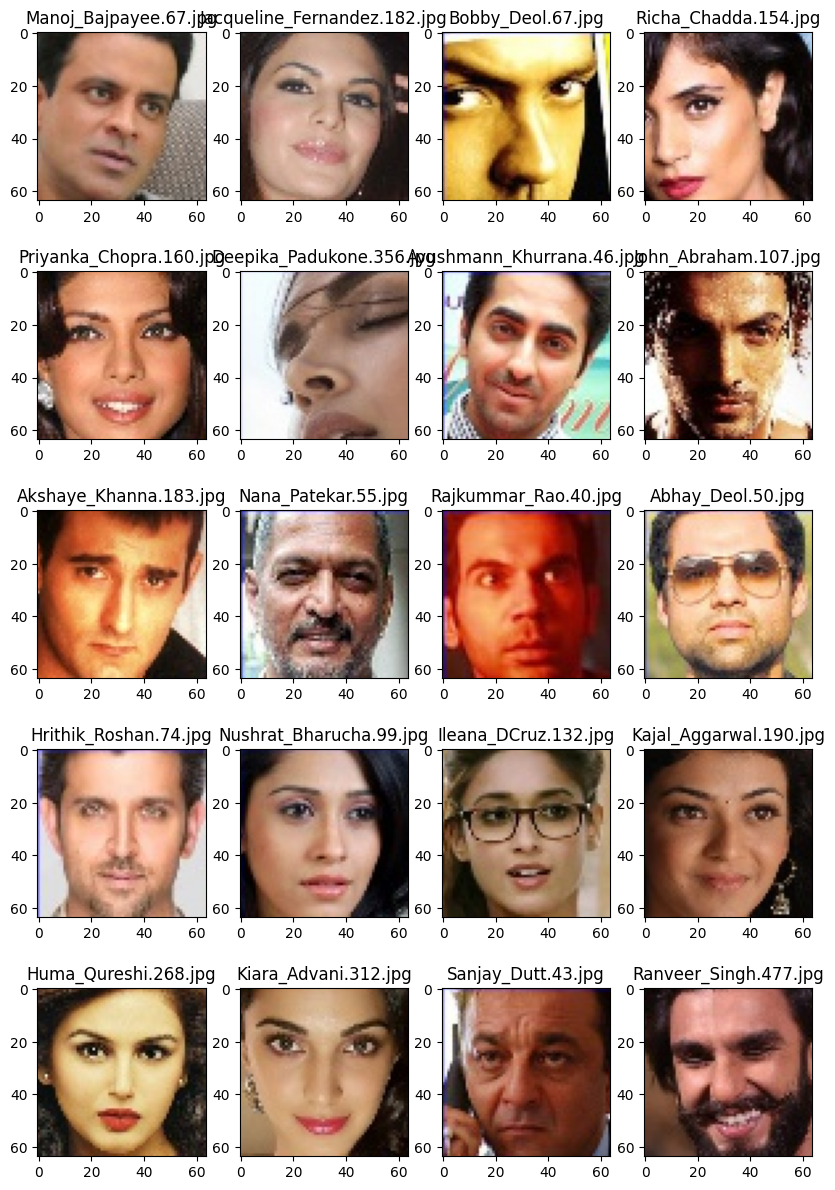

In [69]:
import numpy as np
import matplotlib.pyplot as plt
fig,ax=plt.subplots(5,4,figsize=(10,15))
ax=ax.flatten()
idx=np.random.randint(0,len(filenames),20)
for i in range(20):
    img=plt.imread(filenames[idx[i]])
    ax[i].imshow(img)
    ax[i].set_title(filenames[idx[i]].split('\\')[-1])
plt.show()
    

In [70]:
# import pickle
pickle.dump(filenames, open("filenames.pkl","wb"))

In [71]:
filenames

['train\\Aamir_Khan\\Aamir.100.jpg',
 'train\\Aamir_Khan\\Aamir.101.jpg',
 'train\\Aamir_Khan\\Aamir.103.jpg',
 'train\\Aamir_Khan\\Aamir.105.jpg',
 'train\\Aamir_Khan\\Aamir.106.jpg',
 'train\\Aamir_Khan\\Aamir.111.jpg',
 'train\\Aamir_Khan\\Aamir.112.jpg',
 'train\\Aamir_Khan\\Aamir.113.jpg',
 'train\\Aamir_Khan\\Aamir.115.jpg',
 'train\\Aamir_Khan\\Aamir.116.jpg',
 'train\\Aamir_Khan\\Aamir.118.jpg',
 'train\\Aamir_Khan\\Aamir.120.jpg',
 'train\\Aamir_Khan\\Aamir.121.jpg',
 'train\\Aamir_Khan\\Aamir.123.jpg',
 'train\\Aamir_Khan\\Aamir.125.jpg',
 'train\\Aamir_Khan\\Aamir.128.jpg',
 'train\\Aamir_Khan\\Aamir.129.jpg',
 'train\\Aamir_Khan\\Aamir.130.jpg',
 'train\\Aamir_Khan\\Aamir.132.jpg',
 'train\\Aamir_Khan\\Aamir.134.jpg',
 'train\\Aamir_Khan\\Aamir.142.jpg',
 'train\\Aamir_Khan\\Aamir.144.jpg',
 'train\\Aamir_Khan\\Aamir.151.jpg',
 'train\\Aamir_Khan\\Aamir.153.jpg',
 'train\\Aamir_Khan\\Aamir.158.jpg',
 'train\\Aamir_Khan\\Aamir.161.jpg',
 'train\\Aamir_Khan\\Aamir.163.jpg',
 

In [72]:
# import random

# # Assuming image_list contains the file paths
# random.shuffle(filenames)
# num_test_images = 500
# test_set = filenames[:num_test_images]
# train_set = filenames[num_test_images:]


In [73]:
#  import os
# import shutil

# train_dir = r'C:\Users\Debasish Das\Documents\01_ML Project\Deep learning Projects\Bollywood Celebratity\data'
# test_dir = r'C:\Users\Debasish Das\Documents\01_ML Project\Deep learning Projects\Bollywood Celebratity\Test_data'

# for image_path in test_set:
#     image_name = os.path.basename(image_path)
#     destination = os.path.join(test_dir, image_name)
#     shutil.move(image_path, destination)

# # Similarly, move the remaining images to the train directory
# for image_path in train_set:
#     image_name = os.path.basename(image_path)
#     destination = os.path.join(train_dir, image_name)
#     shutil.move(image_path, destination)


In [74]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt



In [75]:
import pickle
filenames = pickle.load(open('filenames.pkl','rb'))

In [102]:
pip install --upgrade tensorflow


  Using cached keras-3.4.1-py3-none-any.whl.metadata (5.8 kB)
Using cached keras-3.4.1-py3-none-any.whl (1.1 MB)
  Attempting uninstall: keras
    Found existing installation: Keras 2.3.1
    Uninstalling Keras-2.3.1:
      Successfully uninstalled Keras-2.3.1
Note: you may need to restart the kernel to use updated packages.


In [1]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
import numpy as np
import pickle
from tqdm import tqdm

# Load filenames
filenames = pickle.load(open('filenames.pkl', 'rb'))

# Initialize VGG16 model from keras.applications
model = VGG16(include_top=False, input_shape=(224,224,3), pooling='avg')

def feature_extractor(img_path, model):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    expanded_img = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(expanded_img)

    result = model.predict(preprocessed_img).flatten()

    return result

# Extract features for each image in the filenames list
features = []

for file in tqdm(filenames):
    features.append(feature_extractor(file, model))

# Save the extracted features to a pickle file
pickle.dump(features, open('embedding_vgg16.pkl', 'wb'))


  0%|          | 0/8663 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  0%|          | 1/8663 [00:01<3:33:01,  1.48s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


  0%|          | 2/8663 [00:01<2:08:37,  1.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


  0%|          | 3/8663 [00:02<1:44:16,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


  0%|          | 4/8663 [00:03<1:34:05,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


  0%|          | 5/8663 [00:03<1:28:20,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step


  0%|          | 6/8663 [00:04<1:19:44,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


  0%|          | 7/8663 [00:04<1:18:58,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


  0%|          | 8/8663 [00:04<1:14:28,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


  0%|          | 9/8663 [00:05<1:11:24,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


  0%|          | 10/8663 [00:05<1:08:54,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


  0%|          | 11/8663 [00:06<1:10:08,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


  0%|          | 12/8663 [00:06<1:07:38,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


  0%|          | 13/8663 [00:07<1:06:56,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


  0%|          | 14/8663 [00:07<1:09:19,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


  0%|          | 15/8663 [00:08<1:07:13,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


  0%|          | 16/8663 [00:08<1:06:35,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


  0%|          | 17/8663 [00:09<1:07:19,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


  0%|          | 18/8663 [00:09<1:08:01,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


  0%|          | 19/8663 [00:10<1:13:07,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


  0%|          | 20/8663 [00:10<1:11:00,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


  0%|          | 21/8663 [00:11<1:08:44,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


  0%|          | 22/8663 [00:11<1:03:53,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


  0%|          | 23/8663 [00:11<1:05:21,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


  0%|          | 24/8663 [00:12<1:10:03,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


  0%|          | 25/8663 [00:13<1:13:16,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


  0%|          | 26/8663 [00:13<1:10:48,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


  0%|          | 27/8663 [00:13<1:08:13,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


  0%|          | 28/8663 [00:14<1:10:01,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


  0%|          | 29/8663 [00:15<1:11:41,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


  0%|          | 30/8663 [00:15<1:12:58,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


  0%|          | 31/8663 [00:16<1:13:30,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


  0%|          | 32/8663 [00:16<1:14:09,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


  0%|          | 33/8663 [00:17<1:14:54,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step


  0%|          | 34/8663 [00:17<1:10:40,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


  0%|          | 35/8663 [00:18<1:09:46,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


  0%|          | 36/8663 [00:18<1:11:16,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


  0%|          | 37/8663 [00:19<1:13:50,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


  0%|          | 38/8663 [00:19<1:12:42,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


  0%|          | 39/8663 [00:20<1:11:43,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


  0%|          | 40/8663 [00:20<1:07:30,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


  0%|          | 41/8663 [00:20<1:07:50,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


  0%|          | 42/8663 [00:21<1:08:08,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


  0%|          | 43/8663 [00:21<1:04:22,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step


  1%|          | 44/8663 [00:22<1:02:15,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


  1%|          | 45/8663 [00:22<1:00:43,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


  1%|          | 46/8663 [00:23<1:03:08,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


  1%|          | 47/8663 [00:23<1:00:31,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


  1%|          | 48/8663 [00:23<1:00:35,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


  1%|          | 49/8663 [00:24<1:00:20,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


  1%|          | 50/8663 [00:24<1:01:38,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


  1%|          | 51/8663 [00:25<1:00:21,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step


  1%|          | 52/8663 [00:25<59:44,  2.40it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


  1%|          | 53/8663 [00:26<1:03:53,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


  1%|          | 54/8663 [00:26<1:01:10,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


  1%|          | 55/8663 [00:26<1:02:58,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


  1%|          | 56/8663 [00:27<1:14:07,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


  1%|          | 57/8663 [00:27<1:07:46,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


  1%|          | 58/8663 [00:28<1:07:50,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


  1%|          | 59/8663 [00:28<1:08:59,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


  1%|          | 60/8663 [00:29<1:13:49,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


  1%|          | 61/8663 [00:30<1:13:29,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


  1%|          | 62/8663 [00:30<1:07:16,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


  1%|          | 63/8663 [00:30<1:03:16,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


  1%|          | 64/8663 [00:31<1:03:03,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


  1%|          | 65/8663 [00:31<59:56,  2.39it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


  1%|          | 66/8663 [00:32<1:01:25,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


  1%|          | 67/8663 [00:32<1:00:43,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


  1%|          | 68/8663 [00:32<1:02:10,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


  1%|          | 69/8663 [00:33<1:05:08,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


  1%|          | 70/8663 [00:33<1:06:00,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step


  1%|          | 71/8663 [00:34<1:13:57,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


  1%|          | 72/8663 [00:35<1:15:21,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


  1%|          | 73/8663 [00:35<1:13:31,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


  1%|          | 74/8663 [00:36<1:11:29,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


  1%|          | 75/8663 [00:36<1:09:49,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


  1%|          | 76/8663 [00:37<1:09:56,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


  1%|          | 77/8663 [00:37<1:10:16,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


  1%|          | 78/8663 [00:38<1:10:35,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


  1%|          | 79/8663 [00:38<1:10:27,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


  1%|          | 80/8663 [00:38<1:10:03,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


  1%|          | 81/8663 [00:39<1:10:27,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


  1%|          | 82/8663 [00:40<1:13:23,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


  1%|          | 83/8663 [00:40<1:11:33,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


  1%|          | 84/8663 [00:40<1:09:11,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


  1%|          | 85/8663 [00:41<1:05:32,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


  1%|          | 86/8663 [00:41<1:06:58,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


  1%|          | 87/8663 [00:42<1:11:18,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


  1%|          | 88/8663 [00:42<1:07:19,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


  1%|          | 89/8663 [00:43<1:08:42,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


  1%|          | 90/8663 [00:43<1:09:07,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


  1%|          | 91/8663 [00:44<1:15:36,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


  1%|          | 92/8663 [00:45<1:16:52,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


  1%|          | 93/8663 [00:45<1:19:57,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


  1%|          | 94/8663 [00:46<1:20:55,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


  1%|          | 95/8663 [00:46<1:15:40,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


  1%|          | 96/8663 [00:47<1:12:35,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


  1%|          | 97/8663 [00:47<1:10:33,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


  1%|          | 98/8663 [00:48<1:09:50,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


  1%|          | 99/8663 [00:48<1:08:31,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


  1%|          | 100/8663 [00:48<1:08:04,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


  1%|          | 101/8663 [00:49<1:08:07,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


  1%|          | 102/8663 [00:50<1:13:16,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


  1%|          | 103/8663 [00:50<1:16:32,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


  1%|          | 104/8663 [00:51<1:17:31,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step


  1%|          | 105/8663 [00:51<1:21:13,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step


  1%|          | 106/8663 [00:52<1:16:51,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


  1%|          | 107/8663 [00:52<1:19:02,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


  1%|          | 108/8663 [00:53<1:15:26,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


  1%|▏         | 109/8663 [00:53<1:12:28,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


  1%|▏         | 110/8663 [00:54<1:08:07,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


  1%|▏         | 111/8663 [00:54<1:07:44,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


  1%|▏         | 112/8663 [00:55<1:06:38,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step


  1%|▏         | 113/8663 [00:55<1:13:29,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


  1%|▏         | 114/8663 [00:56<1:11:34,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 676ms/step


  1%|▏         | 115/8663 [00:57<1:23:55,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step


  1%|▏         | 116/8663 [00:57<1:25:47,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


  1%|▏         | 117/8663 [00:58<1:23:16,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 683ms/step


  1%|▏         | 118/8663 [00:59<1:33:12,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step


  1%|▏         | 119/8663 [00:59<1:33:19,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


  1%|▏         | 120/8663 [01:00<1:28:18,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 622ms/step


  1%|▏         | 121/8663 [01:00<1:34:11,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step


  1%|▏         | 122/8663 [01:01<1:33:32,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


  1%|▏         | 123/8663 [01:02<1:31:44,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


  1%|▏         | 124/8663 [01:02<1:24:57,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


  1%|▏         | 125/8663 [01:03<1:21:45,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 692ms/step


  1%|▏         | 126/8663 [01:04<1:33:16,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step


  1%|▏         | 127/8663 [01:04<1:33:03,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


  1%|▏         | 128/8663 [01:05<1:30:05,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


  1%|▏         | 129/8663 [01:05<1:25:43,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


  2%|▏         | 130/8663 [01:06<1:21:34,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


  2%|▏         | 131/8663 [01:06<1:17:53,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


  2%|▏         | 132/8663 [01:07<1:17:55,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


  2%|▏         | 133/8663 [01:07<1:18:15,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


  2%|▏         | 134/8663 [01:08<1:19:20,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step


  2%|▏         | 135/8663 [01:09<1:28:02,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


  2%|▏         | 136/8663 [01:09<1:25:59,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


  2%|▏         | 137/8663 [01:10<1:21:22,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


  2%|▏         | 138/8663 [01:10<1:17:40,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


  2%|▏         | 139/8663 [01:11<1:13:27,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


  2%|▏         | 140/8663 [01:11<1:12:31,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


  2%|▏         | 141/8663 [01:12<1:15:35,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step


  2%|▏         | 142/8663 [01:13<1:20:10,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


  2%|▏         | 143/8663 [01:13<1:21:32,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step


  2%|▏         | 144/8663 [01:14<1:28:32,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


  2%|▏         | 145/8663 [01:14<1:28:58,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


  2%|▏         | 146/8663 [01:15<1:28:31,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step


  2%|▏         | 147/8663 [01:16<1:30:18,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


  2%|▏         | 148/8663 [01:16<1:29:26,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


  2%|▏         | 149/8663 [01:17<1:28:48,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step


  2%|▏         | 150/8663 [01:18<1:30:18,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


  2%|▏         | 151/8663 [01:18<1:28:20,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


  2%|▏         | 152/8663 [01:19<1:28:20,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step


  2%|▏         | 153/8663 [01:20<1:32:20,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step


  2%|▏         | 154/8663 [01:20<1:35:07,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


  2%|▏         | 155/8663 [01:21<1:31:30,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step


  2%|▏         | 156/8663 [01:22<1:33:57,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 707ms/step


  2%|▏         | 157/8663 [01:22<1:42:54,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step


  2%|▏         | 158/8663 [01:23<1:44:19,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step


  2%|▏         | 159/8663 [01:24<1:44:36,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step


  2%|▏         | 160/8663 [01:25<1:41:02,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


  2%|▏         | 161/8663 [01:25<1:33:45,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


  2%|▏         | 162/8663 [01:26<1:28:36,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


  2%|▏         | 163/8663 [01:26<1:29:21,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


  2%|▏         | 164/8663 [01:27<1:26:17,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


  2%|▏         | 165/8663 [01:27<1:19:54,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


  2%|▏         | 166/8663 [01:28<1:16:54,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


  2%|▏         | 167/8663 [01:28<1:13:48,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


  2%|▏         | 168/8663 [01:29<1:12:31,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


  2%|▏         | 169/8663 [01:29<1:12:24,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


  2%|▏         | 170/8663 [01:30<1:10:48,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


  2%|▏         | 171/8663 [01:30<1:13:35,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


  2%|▏         | 172/8663 [01:31<1:13:40,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


  2%|▏         | 173/8663 [01:31<1:12:34,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


  2%|▏         | 174/8663 [01:32<1:11:52,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


  2%|▏         | 175/8663 [01:32<1:12:10,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step


  2%|▏         | 176/8663 [01:33<1:16:21,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


  2%|▏         | 177/8663 [01:34<1:19:28,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


  2%|▏         | 178/8663 [01:34<1:20:32,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


  2%|▏         | 179/8663 [01:35<1:21:54,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


  2%|▏         | 180/8663 [01:35<1:20:55,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


  2%|▏         | 181/8663 [01:36<1:20:38,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 657ms/step


  2%|▏         | 182/8663 [01:37<1:31:06,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step


  2%|▏         | 183/8663 [01:38<1:36:51,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step


  2%|▏         | 184/8663 [01:38<1:38:25,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 619ms/step


  2%|▏         | 185/8663 [01:39<1:44:46,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 675ms/step


  2%|▏         | 186/8663 [01:40<1:47:52,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step


  2%|▏         | 187/8663 [01:41<1:46:35,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


  2%|▏         | 188/8663 [01:41<1:35:39,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 820ms/step


  2%|▏         | 189/8663 [01:42<1:50:53,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 676ms/step


  2%|▏         | 190/8663 [01:43<1:54:30,  1.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step


  2%|▏         | 191/8663 [01:44<1:50:40,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  2%|▏         | 192/8663 [01:45<2:09:46,  1.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 691ms/step


  2%|▏         | 193/8663 [01:46<2:08:27,  1.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  2%|▏         | 194/8663 [01:48<2:47:49,  1.19s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 661ms/step


  2%|▏         | 195/8663 [01:49<2:34:19,  1.09s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


  2%|▏         | 196/8663 [01:49<2:13:57,  1.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


  2%|▏         | 197/8663 [01:50<1:58:40,  1.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


  2%|▏         | 198/8663 [01:50<1:45:59,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


  2%|▏         | 199/8663 [01:51<1:38:22,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


  2%|▏         | 200/8663 [01:51<1:31:24,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


  2%|▏         | 201/8663 [01:52<1:25:56,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


  2%|▏         | 202/8663 [01:53<1:23:26,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step


  2%|▏         | 203/8663 [01:53<1:28:28,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


  2%|▏         | 204/8663 [01:54<1:26:24,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


  2%|▏         | 205/8663 [01:54<1:27:43,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


  2%|▏         | 206/8663 [01:55<1:27:13,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


  2%|▏         | 207/8663 [01:56<1:25:27,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


  2%|▏         | 208/8663 [01:56<1:21:52,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


  2%|▏         | 209/8663 [01:57<1:18:23,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


  2%|▏         | 210/8663 [01:57<1:15:59,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


  2%|▏         | 211/8663 [01:58<1:16:46,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


  2%|▏         | 212/8663 [01:58<1:12:56,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


  2%|▏         | 213/8663 [01:59<1:11:54,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


  2%|▏         | 214/8663 [01:59<1:08:20,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


  2%|▏         | 215/8663 [02:00<1:07:51,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


  2%|▏         | 216/8663 [02:00<1:03:43,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


  3%|▎         | 217/8663 [02:00<1:02:27,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


  3%|▎         | 218/8663 [02:01<1:00:09,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


  3%|▎         | 219/8663 [02:01<1:01:02,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


  3%|▎         | 220/8663 [02:02<1:01:08,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


  3%|▎         | 221/8663 [02:02<1:01:19,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


  3%|▎         | 222/8663 [02:03<59:39,  2.36it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


  3%|▎         | 223/8663 [02:03<58:17,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


  3%|▎         | 224/8663 [02:03<1:03:41,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


  3%|▎         | 225/8663 [02:04<1:07:27,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step


  3%|▎         | 226/8663 [02:04<1:05:26,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


  3%|▎         | 227/8663 [02:05<1:06:18,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


  3%|▎         | 228/8663 [02:05<1:06:19,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


  3%|▎         | 229/8663 [02:06<1:11:47,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


  3%|▎         | 230/8663 [02:06<1:07:11,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


  3%|▎         | 231/8663 [02:07<1:10:10,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


  3%|▎         | 232/8663 [02:07<1:13:01,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


  3%|▎         | 233/8663 [02:08<1:14:15,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


  3%|▎         | 234/8663 [02:08<1:10:43,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


  3%|▎         | 235/8663 [02:09<1:12:33,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


  3%|▎         | 236/8663 [02:10<1:18:56,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


  3%|▎         | 237/8663 [02:10<1:17:01,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


  3%|▎         | 238/8663 [02:11<1:17:55,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step


  3%|▎         | 239/8663 [02:11<1:19:53,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


  3%|▎         | 240/8663 [02:12<1:12:40,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


  3%|▎         | 241/8663 [02:12<1:12:22,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


  3%|▎         | 242/8663 [02:13<1:11:31,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


  3%|▎         | 243/8663 [02:13<1:10:16,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


  3%|▎         | 244/8663 [02:14<1:11:15,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


  3%|▎         | 245/8663 [02:14<1:10:35,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


  3%|▎         | 246/8663 [02:15<1:08:55,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


  3%|▎         | 247/8663 [02:15<1:09:00,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


  3%|▎         | 248/8663 [02:16<1:09:11,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


  3%|▎         | 249/8663 [02:16<1:07:28,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


  3%|▎         | 250/8663 [02:17<1:07:56,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


  3%|▎         | 251/8663 [02:17<1:10:03,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


  3%|▎         | 252/8663 [02:18<1:11:38,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


  3%|▎         | 253/8663 [02:18<1:11:08,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


  3%|▎         | 254/8663 [02:19<1:12:26,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


  3%|▎         | 255/8663 [02:19<1:13:47,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


  3%|▎         | 256/8663 [02:20<1:14:28,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


  3%|▎         | 257/8663 [02:20<1:16:04,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


  3%|▎         | 258/8663 [02:21<1:14:53,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


  3%|▎         | 259/8663 [02:21<1:12:03,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


  3%|▎         | 260/8663 [02:22<1:11:13,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


  3%|▎         | 261/8663 [02:22<1:09:53,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


  3%|▎         | 262/8663 [02:23<1:09:03,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


  3%|▎         | 263/8663 [02:23<1:11:29,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step


  3%|▎         | 264/8663 [02:24<1:16:30,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


  3%|▎         | 265/8663 [02:25<1:20:37,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


  3%|▎         | 266/8663 [02:25<1:24:53,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step


  3%|▎         | 267/8663 [02:26<1:28:19,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


  3%|▎         | 268/8663 [02:27<1:27:43,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


  3%|▎         | 269/8663 [02:27<1:22:31,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


  3%|▎         | 270/8663 [02:28<1:19:48,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


  3%|▎         | 271/8663 [02:28<1:18:54,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


  3%|▎         | 272/8663 [02:29<1:18:23,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


  3%|▎         | 273/8663 [02:29<1:14:02,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


  3%|▎         | 274/8663 [02:30<1:11:30,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


  3%|▎         | 275/8663 [02:30<1:10:05,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


  3%|▎         | 276/8663 [02:31<1:08:14,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


  3%|▎         | 277/8663 [02:31<1:07:34,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


  3%|▎         | 278/8663 [02:32<1:05:53,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


  3%|▎         | 279/8663 [02:32<1:04:43,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


  3%|▎         | 280/8663 [02:33<1:05:04,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


  3%|▎         | 281/8663 [02:33<1:03:23,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


  3%|▎         | 282/8663 [02:33<1:04:41,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


  3%|▎         | 283/8663 [02:34<1:04:53,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


  3%|▎         | 284/8663 [02:34<1:03:40,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


  3%|▎         | 285/8663 [02:35<1:05:42,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


  3%|▎         | 286/8663 [02:35<1:05:30,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


  3%|▎         | 287/8663 [02:36<1:04:30,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


  3%|▎         | 288/8663 [02:36<1:08:26,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


  3%|▎         | 289/8663 [02:37<1:14:02,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


  3%|▎         | 290/8663 [02:37<1:15:05,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


  3%|▎         | 291/8663 [02:38<1:15:06,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


  3%|▎         | 292/8663 [02:39<1:18:19,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


  3%|▎         | 293/8663 [02:39<1:15:26,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


  3%|▎         | 294/8663 [02:40<1:11:23,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


  3%|▎         | 295/8663 [02:40<1:12:18,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


  3%|▎         | 296/8663 [02:41<1:11:53,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


  3%|▎         | 297/8663 [02:41<1:15:12,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


  3%|▎         | 298/8663 [02:42<1:13:46,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


  3%|▎         | 299/8663 [02:42<1:14:58,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


  3%|▎         | 300/8663 [02:43<1:14:01,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


  3%|▎         | 301/8663 [02:43<1:11:10,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


  3%|▎         | 302/8663 [02:44<1:11:28,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


  3%|▎         | 303/8663 [02:44<1:11:25,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


  4%|▎         | 304/8663 [02:45<1:11:39,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


  4%|▎         | 305/8663 [02:45<1:07:08,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


  4%|▎         | 306/8663 [02:46<1:05:48,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


  4%|▎         | 307/8663 [02:46<1:04:21,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


  4%|▎         | 308/8663 [02:47<1:05:04,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


  4%|▎         | 309/8663 [02:47<1:04:20,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


  4%|▎         | 310/8663 [02:47<1:03:23,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


  4%|▎         | 311/8663 [02:48<1:02:04,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


  4%|▎         | 312/8663 [02:48<59:11,  2.35it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


  4%|▎         | 313/8663 [02:49<1:01:26,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


  4%|▎         | 314/8663 [02:49<58:41,  2.37it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


  4%|▎         | 315/8663 [02:50<1:01:16,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


  4%|▎         | 316/8663 [02:50<1:00:14,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


  4%|▎         | 317/8663 [02:51<1:05:43,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


  4%|▎         | 318/8663 [02:51<1:03:24,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


  4%|▎         | 319/8663 [02:52<1:05:10,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


  4%|▎         | 320/8663 [02:52<1:07:27,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


  4%|▎         | 321/8663 [02:53<1:06:57,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step


  4%|▎         | 322/8663 [02:53<1:04:25,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


  4%|▎         | 323/8663 [02:53<1:07:54,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


  4%|▎         | 324/8663 [02:54<1:04:23,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


  4%|▍         | 325/8663 [02:54<1:04:00,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


  4%|▍         | 326/8663 [02:55<59:44,  2.33it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


  4%|▍         | 327/8663 [02:55<59:44,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


  4%|▍         | 328/8663 [02:55<57:16,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


  4%|▍         | 329/8663 [02:56<1:02:26,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


  4%|▍         | 330/8663 [02:57<1:04:41,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


  4%|▍         | 331/8663 [02:57<1:05:03,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


  4%|▍         | 332/8663 [02:58<1:06:21,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


  4%|▍         | 333/8663 [02:58<1:09:13,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step


  4%|▍         | 334/8663 [02:59<1:07:28,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


  4%|▍         | 335/8663 [02:59<1:07:45,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


  4%|▍         | 336/8663 [03:00<1:09:05,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


  4%|▍         | 337/8663 [03:00<1:06:48,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


  4%|▍         | 338/8663 [03:00<1:05:42,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


  4%|▍         | 339/8663 [03:01<1:07:21,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


  4%|▍         | 340/8663 [03:01<1:06:52,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


  4%|▍         | 341/8663 [03:02<1:09:18,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


  4%|▍         | 342/8663 [03:02<1:09:57,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


  4%|▍         | 343/8663 [03:03<1:10:50,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


  4%|▍         | 344/8663 [03:03<1:10:14,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


  4%|▍         | 345/8663 [03:04<1:14:22,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


  4%|▍         | 346/8663 [03:05<1:14:12,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


  4%|▍         | 347/8663 [03:05<1:12:42,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


  4%|▍         | 348/8663 [03:06<1:12:16,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


  4%|▍         | 349/8663 [03:06<1:11:41,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


  4%|▍         | 350/8663 [03:07<1:08:16,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


  4%|▍         | 351/8663 [03:07<1:03:11,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


  4%|▍         | 352/8663 [03:07<1:06:25,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


  4%|▍         | 353/8663 [03:08<1:06:39,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


  4%|▍         | 354/8663 [03:08<1:05:37,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


  4%|▍         | 355/8663 [03:09<1:04:21,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


  4%|▍         | 356/8663 [03:09<1:08:16,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


  4%|▍         | 357/8663 [03:10<1:06:43,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


  4%|▍         | 358/8663 [03:10<1:07:08,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


  4%|▍         | 359/8663 [03:11<1:06:50,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


  4%|▍         | 360/8663 [03:11<1:09:45,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


  4%|▍         | 361/8663 [03:12<1:04:04,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


  4%|▍         | 362/8663 [03:12<1:05:34,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


  4%|▍         | 363/8663 [03:13<1:02:24,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


  4%|▍         | 364/8663 [03:13<1:01:10,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


  4%|▍         | 365/8663 [03:14<59:08,  2.34it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


  4%|▍         | 366/8663 [03:14<1:00:58,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


  4%|▍         | 367/8663 [03:14<58:37,  2.36it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


  4%|▍         | 368/8663 [03:15<1:00:19,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


  4%|▍         | 369/8663 [03:15<1:01:05,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


  4%|▍         | 370/8663 [03:16<1:04:03,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


  4%|▍         | 371/8663 [03:16<1:08:40,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


  4%|▍         | 372/8663 [03:17<1:05:42,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


  4%|▍         | 373/8663 [03:17<1:06:10,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


  4%|▍         | 374/8663 [03:18<1:04:49,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


  4%|▍         | 375/8663 [03:18<1:06:35,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


  4%|▍         | 376/8663 [03:19<1:03:10,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


  4%|▍         | 377/8663 [03:19<1:03:41,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


  4%|▍         | 378/8663 [03:20<1:04:25,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step


  4%|▍         | 379/8663 [03:20<1:03:33,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


  4%|▍         | 380/8663 [03:21<1:06:02,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step


  4%|▍         | 381/8663 [03:21<1:12:55,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


  4%|▍         | 382/8663 [03:22<1:13:20,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


  4%|▍         | 383/8663 [03:22<1:13:11,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


  4%|▍         | 384/8663 [03:23<1:10:17,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


  4%|▍         | 385/8663 [03:23<1:08:19,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


  4%|▍         | 386/8663 [03:24<1:11:24,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step


  4%|▍         | 387/8663 [03:24<1:15:58,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


  4%|▍         | 388/8663 [03:25<1:19:48,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


  4%|▍         | 389/8663 [03:26<1:16:54,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step


  5%|▍         | 390/8663 [03:26<1:19:12,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step


  5%|▍         | 391/8663 [03:27<1:23:06,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


  5%|▍         | 392/8663 [03:27<1:23:34,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


  5%|▍         | 393/8663 [03:28<1:20:34,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


  5%|▍         | 394/8663 [03:29<1:21:19,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step


  5%|▍         | 395/8663 [03:29<1:24:25,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


  5%|▍         | 396/8663 [03:30<1:22:40,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step


  5%|▍         | 397/8663 [03:30<1:25:42,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


  5%|▍         | 398/8663 [03:31<1:23:17,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


  5%|▍         | 399/8663 [03:32<1:24:20,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


  5%|▍         | 400/8663 [03:32<1:22:46,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


  5%|▍         | 401/8663 [03:33<1:24:35,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step


  5%|▍         | 402/8663 [03:34<1:32:42,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 645ms/step


  5%|▍         | 403/8663 [03:35<1:39:10,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


  5%|▍         | 404/8663 [03:35<1:33:04,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


  5%|▍         | 405/8663 [03:36<1:29:05,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step


  5%|▍         | 406/8663 [03:36<1:29:50,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step


  5%|▍         | 407/8663 [03:37<1:30:55,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step


  5%|▍         | 408/8663 [03:38<1:35:33,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


  5%|▍         | 409/8663 [03:38<1:32:21,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


  5%|▍         | 410/8663 [03:39<1:29:28,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


  5%|▍         | 411/8663 [03:40<1:26:45,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step


  5%|▍         | 412/8663 [03:40<1:28:44,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


  5%|▍         | 413/8663 [03:41<1:24:23,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


  5%|▍         | 414/8663 [03:41<1:23:15,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


  5%|▍         | 415/8663 [03:42<1:20:05,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step


  5%|▍         | 416/8663 [03:43<1:24:40,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


  5%|▍         | 417/8663 [03:43<1:22:51,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


  5%|▍         | 418/8663 [03:44<1:19:33,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


  5%|▍         | 419/8663 [03:44<1:16:44,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


  5%|▍         | 420/8663 [03:45<1:16:09,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


  5%|▍         | 421/8663 [03:45<1:12:32,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


  5%|▍         | 422/8663 [03:46<1:13:01,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


  5%|▍         | 423/8663 [03:46<1:12:07,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


  5%|▍         | 424/8663 [03:47<1:11:34,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step


  5%|▍         | 425/8663 [03:47<1:13:52,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


  5%|▍         | 426/8663 [03:48<1:10:00,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


  5%|▍         | 427/8663 [03:48<1:07:48,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


  5%|▍         | 428/8663 [03:49<1:03:54,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step


  5%|▍         | 429/8663 [03:49<1:02:41,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


  5%|▍         | 430/8663 [03:50<1:04:07,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


  5%|▍         | 431/8663 [03:50<1:04:21,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step


  5%|▍         | 432/8663 [03:51<1:10:57,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


  5%|▍         | 433/8663 [03:51<1:15:41,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step


  5%|▌         | 434/8663 [03:52<1:19:55,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


  5%|▌         | 435/8663 [03:53<1:17:00,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


  5%|▌         | 436/8663 [03:53<1:19:00,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


  5%|▌         | 437/8663 [03:54<1:18:30,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


  5%|▌         | 438/8663 [03:54<1:15:10,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


  5%|▌         | 439/8663 [03:55<1:11:40,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


  5%|▌         | 440/8663 [03:55<1:09:05,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step


  5%|▌         | 441/8663 [03:56<1:05:55,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


  5%|▌         | 442/8663 [03:56<1:05:14,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


  5%|▌         | 443/8663 [03:57<1:06:35,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


  5%|▌         | 444/8663 [03:57<1:11:43,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


  5%|▌         | 445/8663 [03:58<1:14:51,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


  5%|▌         | 446/8663 [03:58<1:14:13,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


  5%|▌         | 447/8663 [03:59<1:14:55,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


  5%|▌         | 448/8663 [03:59<1:12:46,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


  5%|▌         | 449/8663 [04:00<1:08:53,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


  5%|▌         | 450/8663 [04:00<1:09:29,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


  5%|▌         | 451/8663 [04:01<1:09:22,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


  5%|▌         | 452/8663 [04:01<1:07:00,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


  5%|▌         | 453/8663 [04:02<1:10:55,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


  5%|▌         | 454/8663 [04:02<1:10:44,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


  5%|▌         | 455/8663 [04:03<1:06:35,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step


  5%|▌         | 456/8663 [04:03<1:05:01,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


  5%|▌         | 457/8663 [04:04<1:01:44,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


  5%|▌         | 458/8663 [04:04<1:00:48,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step


  5%|▌         | 459/8663 [04:04<59:59,  2.28it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 500ms/step


  5%|▌         | 460/8663 [04:05<1:06:49,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step


  5%|▌         | 461/8663 [04:06<1:13:33,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


  5%|▌         | 462/8663 [04:06<1:15:12,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


  5%|▌         | 463/8663 [04:07<1:19:53,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step


  5%|▌         | 464/8663 [04:08<1:21:15,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


  5%|▌         | 465/8663 [04:08<1:20:06,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


  5%|▌         | 466/8663 [04:09<1:15:43,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


  5%|▌         | 467/8663 [04:09<1:14:11,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


  5%|▌         | 468/8663 [04:10<1:11:10,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


  5%|▌         | 469/8663 [04:10<1:08:04,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


  5%|▌         | 470/8663 [04:11<1:09:21,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


  5%|▌         | 471/8663 [04:11<1:06:54,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


  5%|▌         | 472/8663 [04:11<1:06:02,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


  5%|▌         | 473/8663 [04:12<1:05:36,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


  5%|▌         | 474/8663 [04:12<1:06:02,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


  5%|▌         | 475/8663 [04:13<1:05:51,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


  5%|▌         | 476/8663 [04:13<1:08:31,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step


  6%|▌         | 477/8663 [04:14<1:15:35,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step


  6%|▌         | 478/8663 [04:15<1:20:06,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


  6%|▌         | 479/8663 [04:15<1:23:39,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


  6%|▌         | 480/8663 [04:16<1:19:20,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


  6%|▌         | 481/8663 [04:16<1:15:19,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


  6%|▌         | 482/8663 [04:17<1:09:11,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


  6%|▌         | 483/8663 [04:17<1:09:12,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


  6%|▌         | 484/8663 [04:18<1:11:34,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


  6%|▌         | 485/8663 [04:19<1:14:28,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


  6%|▌         | 486/8663 [04:19<1:15:57,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


  6%|▌         | 487/8663 [04:20<1:17:33,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


  6%|▌         | 488/8663 [04:20<1:14:28,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


  6%|▌         | 489/8663 [04:21<1:13:44,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


  6%|▌         | 490/8663 [04:21<1:12:15,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


  6%|▌         | 491/8663 [04:22<1:12:21,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


  6%|▌         | 492/8663 [04:22<1:10:47,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


  6%|▌         | 493/8663 [04:23<1:09:55,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


  6%|▌         | 494/8663 [04:23<1:11:23,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


  6%|▌         | 495/8663 [04:24<1:11:41,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


  6%|▌         | 496/8663 [04:24<1:11:25,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


  6%|▌         | 497/8663 [04:25<1:06:53,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


  6%|▌         | 498/8663 [04:25<1:03:40,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


  6%|▌         | 499/8663 [04:26<1:03:56,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


  6%|▌         | 500/8663 [04:26<59:45,  2.28it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


  6%|▌         | 501/8663 [04:27<1:03:49,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


  6%|▌         | 502/8663 [04:27<1:07:05,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


  6%|▌         | 503/8663 [04:28<1:09:26,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


  6%|▌         | 504/8663 [04:28<1:11:22,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


  6%|▌         | 505/8663 [04:29<1:09:01,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


  6%|▌         | 506/8663 [04:29<1:06:31,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step


  6%|▌         | 507/8663 [04:30<1:03:55,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


  6%|▌         | 508/8663 [04:30<1:05:00,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


  6%|▌         | 509/8663 [04:30<1:01:49,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


  6%|▌         | 510/8663 [04:31<1:00:20,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


  6%|▌         | 511/8663 [04:31<57:41,  2.35it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


  6%|▌         | 512/8663 [04:32<55:58,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


  6%|▌         | 513/8663 [04:32<1:00:00,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


  6%|▌         | 514/8663 [04:33<1:04:59,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


  6%|▌         | 515/8663 [04:33<1:01:46,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


  6%|▌         | 516/8663 [04:34<1:03:08,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


  6%|▌         | 517/8663 [04:34<59:50,  2.27it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


  6%|▌         | 518/8663 [04:34<59:34,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


  6%|▌         | 519/8663 [04:35<57:06,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


  6%|▌         | 520/8663 [04:35<1:00:19,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


  6%|▌         | 521/8663 [04:36<57:01,  2.38it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


  6%|▌         | 522/8663 [04:36<59:22,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


  6%|▌         | 523/8663 [04:37<57:00,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


  6%|▌         | 524/8663 [04:37<59:20,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


  6%|▌         | 525/8663 [04:37<56:41,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


  6%|▌         | 526/8663 [04:38<1:02:42,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


  6%|▌         | 527/8663 [04:38<1:01:39,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


  6%|▌         | 528/8663 [04:39<1:03:00,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


  6%|▌         | 529/8663 [04:39<59:42,  2.27it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


  6%|▌         | 530/8663 [04:40<1:01:42,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


  6%|▌         | 531/8663 [04:40<1:03:22,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


  6%|▌         | 532/8663 [04:41<1:01:06,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


  6%|▌         | 533/8663 [04:41<1:02:00,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


  6%|▌         | 534/8663 [04:42<59:23,  2.28it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


  6%|▌         | 535/8663 [04:42<1:00:44,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


  6%|▌         | 536/8663 [04:43<1:02:23,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


  6%|▌         | 537/8663 [04:43<1:03:34,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


  6%|▌         | 538/8663 [04:44<1:06:17,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


  6%|▌         | 539/8663 [04:44<1:04:15,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step


  6%|▌         | 540/8663 [04:44<1:02:00,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


  6%|▌         | 541/8663 [04:45<1:00:37,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


  6%|▋         | 542/8663 [04:45<58:12,  2.33it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


  6%|▋         | 543/8663 [04:46<1:00:35,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


  6%|▋         | 544/8663 [04:46<1:00:03,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


  6%|▋         | 545/8663 [04:47<1:02:40,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


  6%|▋         | 546/8663 [04:47<1:00:52,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


  6%|▋         | 547/8663 [04:48<1:01:31,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


  6%|▋         | 548/8663 [04:48<1:00:20,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


  6%|▋         | 549/8663 [04:48<57:16,  2.36it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


  6%|▋         | 550/8663 [04:49<57:15,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


  6%|▋         | 551/8663 [04:49<56:37,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


  6%|▋         | 552/8663 [04:50<1:00:03,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


  6%|▋         | 553/8663 [04:50<57:01,  2.37it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


  6%|▋         | 554/8663 [04:51<59:45,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


  6%|▋         | 555/8663 [04:51<56:52,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


  6%|▋         | 556/8663 [04:51<57:24,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


  6%|▋         | 557/8663 [04:52<58:28,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


  6%|▋         | 558/8663 [04:52<1:00:12,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


  6%|▋         | 559/8663 [04:53<1:03:22,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


  6%|▋         | 560/8663 [04:53<1:05:09,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


  6%|▋         | 561/8663 [04:54<1:06:01,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


  6%|▋         | 562/8663 [04:54<1:10:32,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


  6%|▋         | 563/8663 [04:55<1:09:11,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


  7%|▋         | 564/8663 [04:55<1:05:48,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


  7%|▋         | 565/8663 [04:56<1:03:21,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step


  7%|▋         | 566/8663 [04:56<1:01:26,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


  7%|▋         | 567/8663 [04:57<59:23,  2.27it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


  7%|▋         | 568/8663 [04:57<1:00:22,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


  7%|▋         | 569/8663 [04:57<57:19,  2.35it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


  7%|▋         | 570/8663 [04:58<56:35,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


  7%|▋         | 571/8663 [04:58<1:00:30,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


  7%|▋         | 572/8663 [04:59<57:23,  2.35it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


  7%|▋         | 573/8663 [04:59<55:44,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


  7%|▋         | 574/8663 [05:00<57:21,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


  7%|▋         | 575/8663 [05:00<56:36,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


  7%|▋         | 576/8663 [05:00<59:30,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


  7%|▋         | 577/8663 [05:01<56:55,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


  7%|▋         | 578/8663 [05:01<59:17,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


  7%|▋         | 579/8663 [05:02<57:13,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


  7%|▋         | 580/8663 [05:02<55:15,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step


  7%|▋         | 581/8663 [05:02<55:07,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


  7%|▋         | 582/8663 [05:03<57:15,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


  7%|▋         | 583/8663 [05:03<56:35,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


  7%|▋         | 584/8663 [05:04<57:28,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


  7%|▋         | 585/8663 [05:04<54:55,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


  7%|▋         | 586/8663 [05:05<57:11,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


  7%|▋         | 587/8663 [05:05<55:46,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


  7%|▋         | 588/8663 [05:05<56:59,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


  7%|▋         | 589/8663 [05:06<57:42,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


  7%|▋         | 590/8663 [05:06<55:46,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


  7%|▋         | 591/8663 [05:07<55:53,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


  7%|▋         | 592/8663 [05:07<57:10,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


  7%|▋         | 593/8663 [05:08<57:38,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step


  7%|▋         | 594/8663 [05:08<57:23,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


  7%|▋         | 595/8663 [05:08<59:04,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


  7%|▋         | 596/8663 [05:09<1:00:34,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


  7%|▋         | 597/8663 [05:09<59:39,  2.25it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step


  7%|▋         | 598/8663 [05:10<59:14,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


  7%|▋         | 599/8663 [05:10<57:11,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


  7%|▋         | 600/8663 [05:11<57:07,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


  7%|▋         | 601/8663 [05:11<56:34,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


  7%|▋         | 602/8663 [05:11<58:06,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


  7%|▋         | 603/8663 [05:12<56:03,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


  7%|▋         | 604/8663 [05:12<58:04,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


  7%|▋         | 605/8663 [05:13<55:16,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


  7%|▋         | 606/8663 [05:13<57:55,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


  7%|▋         | 607/8663 [05:14<55:53,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


  7%|▋         | 608/8663 [05:14<56:50,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


  7%|▋         | 609/8663 [05:14<57:28,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


  7%|▋         | 610/8663 [05:15<59:38,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


  7%|▋         | 611/8663 [05:15<56:21,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


  7%|▋         | 612/8663 [05:16<57:19,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


  7%|▋         | 613/8663 [05:16<55:26,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


  7%|▋         | 614/8663 [05:17<58:43,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


  7%|▋         | 615/8663 [05:17<57:37,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


  7%|▋         | 616/8663 [05:17<1:00:13,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


  7%|▋         | 617/8663 [05:18<1:02:50,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


  7%|▋         | 618/8663 [05:19<1:07:08,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


  7%|▋         | 619/8663 [05:19<1:11:07,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


  7%|▋         | 620/8663 [05:20<1:14:39,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


  7%|▋         | 621/8663 [05:20<1:17:00,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


  7%|▋         | 622/8663 [05:21<1:16:44,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


  7%|▋         | 623/8663 [05:22<1:17:02,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


  7%|▋         | 624/8663 [05:22<1:17:36,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


  7%|▋         | 625/8663 [05:23<1:17:54,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


  7%|▋         | 626/8663 [05:23<1:11:29,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


  7%|▋         | 627/8663 [05:24<1:09:50,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


  7%|▋         | 628/8663 [05:24<1:07:01,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


  7%|▋         | 629/8663 [05:25<1:06:56,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


  7%|▋         | 630/8663 [05:25<1:06:27,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


  7%|▋         | 631/8663 [05:26<1:08:33,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


  7%|▋         | 632/8663 [05:26<1:08:02,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


  7%|▋         | 633/8663 [05:27<1:10:17,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


  7%|▋         | 634/8663 [05:27<1:09:50,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


  7%|▋         | 635/8663 [05:28<1:11:49,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


  7%|▋         | 636/8663 [05:28<1:09:42,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


  7%|▋         | 637/8663 [05:29<1:07:42,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


  7%|▋         | 638/8663 [05:29<1:02:17,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


  7%|▋         | 639/8663 [05:30<1:02:50,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


  7%|▋         | 640/8663 [05:30<58:51,  2.27it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


  7%|▋         | 641/8663 [05:30<56:53,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


  7%|▋         | 642/8663 [05:31<56:02,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


  7%|▋         | 643/8663 [05:31<58:00,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


  7%|▋         | 644/8663 [05:32<1:04:02,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


  7%|▋         | 645/8663 [05:32<1:04:49,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


  7%|▋         | 646/8663 [05:33<1:07:15,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


  7%|▋         | 647/8663 [05:33<1:03:26,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


  7%|▋         | 648/8663 [05:34<1:02:58,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


  7%|▋         | 649/8663 [05:34<59:29,  2.25it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


  8%|▊         | 650/8663 [05:35<1:04:00,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


  8%|▊         | 651/8663 [05:35<1:05:51,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


  8%|▊         | 652/8663 [05:36<1:06:20,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


  8%|▊         | 653/8663 [05:36<1:04:47,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


  8%|▊         | 654/8663 [05:37<1:06:45,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


  8%|▊         | 655/8663 [05:37<1:07:45,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


  8%|▊         | 656/8663 [05:38<1:09:04,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step


  8%|▊         | 657/8663 [05:38<1:05:30,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


  8%|▊         | 658/8663 [05:39<1:05:27,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


  8%|▊         | 659/8663 [05:39<1:07:58,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


  8%|▊         | 660/8663 [05:40<1:05:56,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


  8%|▊         | 661/8663 [05:40<1:07:38,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


  8%|▊         | 662/8663 [05:41<1:06:11,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


  8%|▊         | 663/8663 [05:41<1:05:08,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


  8%|▊         | 664/8663 [05:42<1:05:40,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


  8%|▊         | 665/8663 [05:42<1:01:43,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


  8%|▊         | 666/8663 [05:43<1:02:10,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


  8%|▊         | 667/8663 [05:43<1:05:07,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step


  8%|▊         | 668/8663 [05:44<1:02:55,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


  8%|▊         | 669/8663 [05:44<1:00:41,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


  8%|▊         | 670/8663 [05:44<58:41,  2.27it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


  8%|▊         | 671/8663 [05:45<57:48,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


  8%|▊         | 672/8663 [05:45<1:00:06,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


  8%|▊         | 673/8663 [05:46<1:01:35,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


  8%|▊         | 674/8663 [05:46<1:02:03,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


  8%|▊         | 675/8663 [05:47<58:55,  2.26it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


  8%|▊         | 676/8663 [05:47<1:00:14,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


  8%|▊         | 677/8663 [05:47<57:26,  2.32it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


  8%|▊         | 678/8663 [05:48<1:00:52,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


  8%|▊         | 679/8663 [05:49<1:03:31,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


  8%|▊         | 680/8663 [05:49<1:00:08,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


  8%|▊         | 681/8663 [05:49<1:00:12,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


  8%|▊         | 682/8663 [05:50<58:52,  2.26it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


  8%|▊         | 683/8663 [05:50<1:01:15,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


  8%|▊         | 684/8663 [05:51<1:05:25,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


  8%|▊         | 685/8663 [05:51<1:07:12,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


  8%|▊         | 686/8663 [05:52<1:07:42,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


  8%|▊         | 687/8663 [05:52<1:09:40,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


  8%|▊         | 688/8663 [05:53<1:09:40,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step


  8%|▊         | 689/8663 [05:53<1:07:06,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


  8%|▊         | 690/8663 [05:54<1:05:44,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


  8%|▊         | 691/8663 [05:54<1:03:08,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


  8%|▊         | 692/8663 [05:55<1:00:50,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


  8%|▊         | 693/8663 [05:55<58:17,  2.28it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


  8%|▊         | 694/8663 [05:56<1:00:02,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


  8%|▊         | 695/8663 [05:56<58:58,  2.25it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


  8%|▊         | 696/8663 [05:57<1:01:08,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


  8%|▊         | 697/8663 [05:57<1:01:02,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


  8%|▊         | 698/8663 [05:58<1:02:49,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


  8%|▊         | 699/8663 [05:58<1:04:44,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


  8%|▊         | 700/8663 [05:59<1:04:07,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


  8%|▊         | 701/8663 [05:59<1:04:26,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


  8%|▊         | 702/8663 [05:59<1:04:01,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


  8%|▊         | 703/8663 [06:00<1:03:08,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


  8%|▊         | 704/8663 [06:00<1:00:31,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


  8%|▊         | 705/8663 [06:01<1:02:59,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


  8%|▊         | 706/8663 [06:01<59:46,  2.22it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


  8%|▊         | 707/8663 [06:02<58:30,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


  8%|▊         | 708/8663 [06:02<1:00:17,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


  8%|▊         | 709/8663 [06:03<58:22,  2.27it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step


  8%|▊         | 710/8663 [06:03<59:23,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


  8%|▊         | 711/8663 [06:04<59:53,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


  8%|▊         | 712/8663 [06:04<59:37,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


  8%|▊         | 713/8663 [06:04<58:40,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


  8%|▊         | 714/8663 [06:05<1:02:28,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


  8%|▊         | 715/8663 [06:05<59:56,  2.21it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


  8%|▊         | 716/8663 [06:06<1:01:21,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


  8%|▊         | 717/8663 [06:06<58:51,  2.25it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


  8%|▊         | 718/8663 [06:07<59:38,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


  8%|▊         | 719/8663 [06:07<58:58,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step


  8%|▊         | 720/8663 [06:08<58:54,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


  8%|▊         | 721/8663 [06:08<59:52,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step


  8%|▊         | 722/8663 [06:08<59:57,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


  8%|▊         | 723/8663 [06:09<1:01:01,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


  8%|▊         | 724/8663 [06:09<1:01:43,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


  8%|▊         | 725/8663 [06:10<58:13,  2.27it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


  8%|▊         | 726/8663 [06:10<1:00:37,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


  8%|▊         | 727/8663 [06:11<1:06:07,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


  8%|▊         | 728/8663 [06:11<1:09:02,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


  8%|▊         | 729/8663 [06:12<1:09:14,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


  8%|▊         | 730/8663 [06:13<1:09:00,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


  8%|▊         | 731/8663 [06:13<1:07:45,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


  8%|▊         | 732/8663 [06:14<1:08:56,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


  8%|▊         | 733/8663 [06:14<1:09:36,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


  8%|▊         | 734/8663 [06:15<1:05:39,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


  8%|▊         | 735/8663 [06:15<1:00:34,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


  8%|▊         | 736/8663 [06:15<1:00:13,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


  9%|▊         | 737/8663 [06:16<57:47,  2.29it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


  9%|▊         | 738/8663 [06:16<59:11,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step


  9%|▊         | 739/8663 [06:17<58:18,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


  9%|▊         | 740/8663 [06:17<59:34,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


  9%|▊         | 741/8663 [06:18<59:21,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


  9%|▊         | 742/8663 [06:18<1:00:07,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step


  9%|▊         | 743/8663 [06:19<1:00:32,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


  9%|▊         | 744/8663 [06:19<59:33,  2.22it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


  9%|▊         | 745/8663 [06:19<1:00:01,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


  9%|▊         | 746/8663 [06:20<57:56,  2.28it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


  9%|▊         | 747/8663 [06:20<59:08,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


  9%|▊         | 748/8663 [06:21<59:33,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


  9%|▊         | 749/8663 [06:21<1:00:59,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


  9%|▊         | 750/8663 [06:22<1:00:07,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


  9%|▊         | 751/8663 [06:22<1:03:35,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


  9%|▊         | 752/8663 [06:23<1:03:43,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


  9%|▊         | 753/8663 [06:23<1:01:31,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


  9%|▊         | 754/8663 [06:24<1:00:25,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


  9%|▊         | 755/8663 [06:24<1:00:49,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


  9%|▊         | 756/8663 [06:24<59:21,  2.22it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


  9%|▊         | 757/8663 [06:25<59:57,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


  9%|▊         | 758/8663 [06:25<1:00:20,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


  9%|▉         | 759/8663 [06:26<59:20,  2.22it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


  9%|▉         | 760/8663 [06:26<1:02:33,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


  9%|▉         | 761/8663 [06:27<1:01:28,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


  9%|▉         | 762/8663 [06:27<59:49,  2.20it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


  9%|▉         | 763/8663 [06:28<1:03:54,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


  9%|▉         | 764/8663 [06:28<1:06:47,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


  9%|▉         | 765/8663 [06:29<1:07:36,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


  9%|▉         | 766/8663 [06:29<1:08:58,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


  9%|▉         | 767/8663 [06:30<1:09:00,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


  9%|▉         | 768/8663 [06:30<1:06:54,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


  9%|▉         | 769/8663 [06:31<1:07:22,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


  9%|▉         | 770/8663 [06:31<1:02:41,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


  9%|▉         | 771/8663 [06:32<1:01:22,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


  9%|▉         | 772/8663 [06:32<1:01:54,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


  9%|▉         | 773/8663 [06:33<58:36,  2.24it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


  9%|▉         | 774/8663 [06:33<58:15,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step


  9%|▉         | 775/8663 [06:33<57:31,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


  9%|▉         | 776/8663 [06:34<59:08,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


  9%|▉         | 777/8663 [06:34<1:01:30,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


  9%|▉         | 778/8663 [06:35<1:02:09,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


  9%|▉         | 779/8663 [06:35<1:03:47,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


  9%|▉         | 780/8663 [06:36<1:04:42,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


  9%|▉         | 781/8663 [06:36<1:04:34,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


  9%|▉         | 782/8663 [06:37<1:02:57,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


  9%|▉         | 783/8663 [06:37<59:25,  2.21it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


  9%|▉         | 784/8663 [06:38<1:03:39,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


  9%|▉         | 785/8663 [06:38<1:07:46,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


  9%|▉         | 786/8663 [06:39<1:06:12,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


  9%|▉         | 787/8663 [06:39<1:05:01,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


  9%|▉         | 788/8663 [06:40<1:03:43,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


  9%|▉         | 789/8663 [06:40<1:08:13,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


  9%|▉         | 790/8663 [06:41<1:09:43,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


  9%|▉         | 791/8663 [06:42<1:12:10,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


  9%|▉         | 792/8663 [06:42<1:14:42,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


  9%|▉         | 793/8663 [06:43<1:13:39,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


  9%|▉         | 794/8663 [06:43<1:15:19,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


  9%|▉         | 795/8663 [06:44<1:14:33,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


  9%|▉         | 796/8663 [06:44<1:11:33,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


  9%|▉         | 797/8663 [06:45<1:14:10,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


  9%|▉         | 798/8663 [06:46<1:13:45,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


  9%|▉         | 799/8663 [06:46<1:11:52,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


  9%|▉         | 800/8663 [06:47<1:07:27,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


  9%|▉         | 801/8663 [06:47<1:02:45,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


  9%|▉         | 802/8663 [06:47<1:02:53,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


  9%|▉         | 803/8663 [06:48<58:30,  2.24it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


  9%|▉         | 804/8663 [06:49<1:15:34,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


  9%|▉         | 805/8663 [06:49<1:09:20,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


  9%|▉         | 806/8663 [06:50<1:08:39,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


  9%|▉         | 807/8663 [06:50<1:08:28,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


  9%|▉         | 808/8663 [06:51<1:08:02,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


  9%|▉         | 809/8663 [06:51<1:06:37,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


  9%|▉         | 810/8663 [06:52<1:04:54,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


  9%|▉         | 811/8663 [06:52<1:04:49,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


  9%|▉         | 812/8663 [06:53<1:04:36,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step


  9%|▉         | 813/8663 [06:53<1:04:09,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


  9%|▉         | 814/8663 [06:54<1:04:51,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


  9%|▉         | 815/8663 [06:54<1:04:41,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


  9%|▉         | 816/8663 [06:55<1:05:53,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


  9%|▉         | 817/8663 [06:55<1:07:18,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


  9%|▉         | 818/8663 [06:56<1:06:46,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


  9%|▉         | 819/8663 [06:56<1:07:10,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step


  9%|▉         | 820/8663 [06:57<1:05:03,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


  9%|▉         | 821/8663 [06:57<1:04:40,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


  9%|▉         | 822/8663 [06:58<1:02:44,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step


 10%|▉         | 823/8663 [06:58<1:02:04,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


 10%|▉         | 824/8663 [06:58<1:01:24,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


 10%|▉         | 825/8663 [06:59<58:32,  2.23it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 10%|▉         | 826/8663 [06:59<59:26,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


 10%|▉         | 827/8663 [07:00<56:55,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 10%|▉         | 828/8663 [07:00<58:52,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


 10%|▉         | 829/8663 [07:01<56:12,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


 10%|▉         | 830/8663 [07:01<57:30,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


 10%|▉         | 831/8663 [07:02<1:02:24,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


 10%|▉         | 832/8663 [07:02<1:02:17,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


 10%|▉         | 833/8663 [07:03<1:00:52,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step


 10%|▉         | 834/8663 [07:03<59:50,  2.18it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 10%|▉         | 835/8663 [07:03<1:00:37,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


 10%|▉         | 836/8663 [07:04<57:47,  2.26it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 10%|▉         | 837/8663 [07:04<58:46,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


 10%|▉         | 838/8663 [07:05<56:37,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 10%|▉         | 839/8663 [07:05<58:30,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


 10%|▉         | 840/8663 [07:06<57:53,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 10%|▉         | 841/8663 [07:06<59:30,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


 10%|▉         | 842/8663 [07:07<57:42,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


 10%|▉         | 843/8663 [07:07<56:27,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


 10%|▉         | 844/8663 [07:07<56:41,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


 10%|▉         | 845/8663 [07:08<56:27,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


 10%|▉         | 846/8663 [07:08<58:46,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 10%|▉         | 847/8663 [07:09<1:00:08,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


 10%|▉         | 848/8663 [07:09<57:57,  2.25it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


 10%|▉         | 849/8663 [07:10<57:03,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


 10%|▉         | 850/8663 [07:10<54:45,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


 10%|▉         | 851/8663 [07:10<56:20,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


 10%|▉         | 852/8663 [07:11<54:34,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 10%|▉         | 853/8663 [07:11<57:03,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


 10%|▉         | 854/8663 [07:12<56:18,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step


 10%|▉         | 855/8663 [07:12<55:54,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


 10%|▉         | 856/8663 [07:13<53:19,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 10%|▉         | 857/8663 [07:13<57:11,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


 10%|▉         | 858/8663 [07:13<55:19,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


 10%|▉         | 859/8663 [07:14<57:29,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


 10%|▉         | 860/8663 [07:14<56:02,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 10%|▉         | 861/8663 [07:15<57:48,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


 10%|▉         | 862/8663 [07:15<55:40,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 10%|▉         | 863/8663 [07:16<58:28,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


 10%|▉         | 864/8663 [07:16<56:18,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


 10%|▉         | 865/8663 [07:17<57:15,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


 10%|▉         | 866/8663 [07:17<54:51,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


 10%|█         | 867/8663 [07:17<56:43,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


 10%|█         | 868/8663 [07:18<55:59,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


 10%|█         | 869/8663 [07:18<56:51,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


 10%|█         | 870/8663 [07:19<55:45,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 10%|█         | 871/8663 [07:19<58:16,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step


 10%|█         | 872/8663 [07:20<57:04,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


 10%|█         | 873/8663 [07:20<58:04,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 10%|█         | 874/8663 [07:21<1:01:58,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


 10%|█         | 875/8663 [07:21<1:03:42,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 10%|█         | 876/8663 [07:22<1:05:10,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 10%|█         | 877/8663 [07:22<1:06:39,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 10%|█         | 878/8663 [07:23<1:06:54,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


 10%|█         | 879/8663 [07:23<1:04:54,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


 10%|█         | 880/8663 [07:24<1:04:09,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


 10%|█         | 881/8663 [07:24<59:03,  2.20it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 10%|█         | 882/8663 [07:25<1:00:25,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


 10%|█         | 883/8663 [07:25<57:01,  2.27it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


 10%|█         | 884/8663 [07:25<58:31,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


 10%|█         | 885/8663 [07:26<56:54,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


 10%|█         | 886/8663 [07:26<56:52,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


 10%|█         | 887/8663 [07:27<55:12,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 10%|█         | 888/8663 [07:27<57:42,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


 10%|█         | 889/8663 [07:28<55:37,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


 10%|█         | 890/8663 [07:28<57:27,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


 10%|█         | 891/8663 [07:28<56:34,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


 10%|█         | 892/8663 [07:29<57:13,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


 10%|█         | 893/8663 [07:29<55:48,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


 10%|█         | 894/8663 [07:30<56:04,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 10%|█         | 895/8663 [07:30<58:20,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


 10%|█         | 896/8663 [07:31<56:44,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


 10%|█         | 897/8663 [07:31<58:37,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


 10%|█         | 898/8663 [07:32<58:55,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step


 10%|█         | 899/8663 [07:32<59:45,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 10%|█         | 900/8663 [07:33<1:02:24,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 10%|█         | 901/8663 [07:33<1:04:32,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 10%|█         | 902/8663 [07:34<1:05:52,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


 10%|█         | 903/8663 [07:34<1:05:27,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


 10%|█         | 904/8663 [07:35<1:02:51,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


 10%|█         | 905/8663 [07:35<58:34,  2.21it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 10%|█         | 906/8663 [07:35<59:32,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


 10%|█         | 907/8663 [07:36<56:15,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 10%|█         | 908/8663 [07:36<58:00,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step


 10%|█         | 909/8663 [07:37<56:44,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 11%|█         | 910/8663 [07:37<58:48,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


 11%|█         | 911/8663 [07:38<56:12,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


 11%|█         | 912/8663 [07:38<56:52,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


 11%|█         | 913/8663 [07:38<57:58,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


 11%|█         | 914/8663 [07:39<59:38,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


 11%|█         | 915/8663 [07:39<58:33,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


 11%|█         | 916/8663 [07:40<59:11,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


 11%|█         | 917/8663 [07:40<57:49,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


 11%|█         | 918/8663 [07:41<58:18,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


 11%|█         | 919/8663 [07:41<55:38,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


 11%|█         | 920/8663 [07:42<56:24,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


 11%|█         | 921/8663 [07:42<54:25,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 11%|█         | 922/8663 [07:42<56:40,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step


 11%|█         | 923/8663 [07:43<56:29,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


 11%|█         | 924/8663 [07:43<57:53,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 11%|█         | 925/8663 [07:44<59:19,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 11%|█         | 926/8663 [07:44<1:01:22,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


 11%|█         | 927/8663 [07:45<59:31,  2.17it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


 11%|█         | 928/8663 [07:45<59:46,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


 11%|█         | 929/8663 [07:46<58:37,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


 11%|█         | 930/8663 [07:46<1:01:54,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


 11%|█         | 931/8663 [07:47<1:01:47,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


 11%|█         | 932/8663 [07:47<1:03:29,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


 11%|█         | 933/8663 [07:48<1:04:05,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 11%|█         | 934/8663 [07:48<1:04:22,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


 11%|█         | 935/8663 [07:49<1:03:00,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


 11%|█         | 936/8663 [07:49<1:02:09,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


 11%|█         | 937/8663 [07:50<59:49,  2.15it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


 11%|█         | 938/8663 [07:50<59:37,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


 11%|█         | 939/8663 [07:50<57:17,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


 11%|█         | 940/8663 [07:51<58:42,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


 11%|█         | 941/8663 [07:51<57:29,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


 11%|█         | 942/8663 [07:52<1:02:58,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


 11%|█         | 943/8663 [07:52<1:01:15,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 11%|█         | 944/8663 [07:53<1:01:45,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 11%|█         | 945/8663 [07:53<1:01:53,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


 11%|█         | 946/8663 [07:54<58:12,  2.21it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 11%|█         | 947/8663 [07:54<59:56,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


 11%|█         | 948/8663 [07:55<1:00:38,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 11%|█         | 949/8663 [07:55<1:02:10,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 11%|█         | 950/8663 [07:56<1:02:20,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


 11%|█         | 951/8663 [07:56<1:01:15,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 11%|█         | 952/8663 [07:57<1:02:34,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 11%|█         | 953/8663 [07:57<1:02:29,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 11%|█         | 954/8663 [07:58<1:01:56,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


 11%|█         | 955/8663 [07:58<1:04:42,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


 11%|█         | 956/8663 [07:59<1:06:33,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 11%|█         | 957/8663 [07:59<1:05:44,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 11%|█         | 958/8663 [08:00<1:06:09,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


 11%|█         | 959/8663 [08:00<1:08:27,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 11%|█         | 960/8663 [08:01<1:09:26,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 11%|█         | 961/8663 [08:02<1:09:56,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


 11%|█         | 962/8663 [08:02<1:07:37,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


 11%|█         | 963/8663 [08:03<1:09:30,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


 11%|█         | 964/8663 [08:03<1:06:19,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 11%|█         | 965/8663 [08:04<1:06:03,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 11%|█         | 966/8663 [08:04<1:07:50,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


 11%|█         | 967/8663 [08:05<1:11:24,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step


 11%|█         | 968/8663 [08:05<1:08:13,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 11%|█         | 969/8663 [08:06<1:06:37,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


 11%|█         | 970/8663 [08:06<1:01:21,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 11%|█         | 971/8663 [08:07<1:01:20,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


 11%|█         | 972/8663 [08:07<58:17,  2.20it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


 11%|█         | 973/8663 [08:07<58:45,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


 11%|█         | 974/8663 [08:08<56:47,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step


 11%|█▏        | 975/8663 [08:08<1:02:12,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


 11%|█▏        | 976/8663 [08:09<1:05:29,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


 11%|█▏        | 977/8663 [08:09<1:02:56,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


 11%|█▏        | 978/8663 [08:10<1:00:13,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


 11%|█▏        | 979/8663 [08:10<59:00,  2.17it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


 11%|█▏        | 980/8663 [08:11<58:07,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 11%|█▏        | 981/8663 [08:11<58:15,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


 11%|█▏        | 982/8663 [08:12<59:12,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step


 11%|█▏        | 983/8663 [08:12<58:26,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


 11%|█▏        | 984/8663 [08:13<58:26,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


 11%|█▏        | 985/8663 [08:13<58:29,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


 11%|█▏        | 986/8663 [08:13<56:11,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


 11%|█▏        | 987/8663 [08:14<59:24,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


 11%|█▏        | 988/8663 [08:14<56:22,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


 11%|█▏        | 989/8663 [08:15<56:24,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


 11%|█▏        | 990/8663 [08:15<57:20,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


 11%|█▏        | 991/8663 [08:16<58:58,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 11%|█▏        | 992/8663 [08:16<1:03:01,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


 11%|█▏        | 993/8663 [08:17<1:05:13,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step


 11%|█▏        | 994/8663 [08:18<1:12:42,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


 11%|█▏        | 995/8663 [08:18<1:14:41,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 11%|█▏        | 996/8663 [08:19<1:12:41,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


 12%|█▏        | 997/8663 [08:19<1:12:35,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


 12%|█▏        | 998/8663 [08:20<1:12:07,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


 12%|█▏        | 999/8663 [08:20<1:09:29,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


 12%|█▏        | 1000/8663 [08:21<1:09:58,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


 12%|█▏        | 1001/8663 [08:21<1:09:56,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 12%|█▏        | 1002/8663 [08:22<1:06:45,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 12%|█▏        | 1003/8663 [08:22<1:05:37,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 12%|█▏        | 1004/8663 [08:23<1:05:14,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 12%|█▏        | 1005/8663 [08:23<1:03:44,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 12%|█▏        | 1006/8663 [08:24<1:04:08,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


 12%|█▏        | 1007/8663 [08:24<1:02:38,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


 12%|█▏        | 1008/8663 [08:25<1:03:46,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 12%|█▏        | 1009/8663 [08:25<1:04:52,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


 12%|█▏        | 1010/8663 [08:26<1:07:39,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


 12%|█▏        | 1011/8663 [08:26<1:04:51,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step


 12%|█▏        | 1012/8663 [08:27<1:10:50,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


 12%|█▏        | 1013/8663 [08:28<1:13:35,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


 12%|█▏        | 1014/8663 [08:28<1:13:08,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


 12%|█▏        | 1015/8663 [08:29<1:11:48,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 12%|█▏        | 1016/8663 [08:29<1:08:13,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


 12%|█▏        | 1017/8663 [08:30<1:05:58,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 12%|█▏        | 1018/8663 [08:30<1:04:56,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 12%|█▏        | 1019/8663 [08:31<1:03:36,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


 12%|█▏        | 1020/8663 [08:31<1:05:16,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 12%|█▏        | 1021/8663 [08:32<1:03:50,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 12%|█▏        | 1022/8663 [08:32<1:04:00,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 12%|█▏        | 1023/8663 [08:33<1:03:30,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 12%|█▏        | 1024/8663 [08:33<1:04:22,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


 12%|█▏        | 1025/8663 [08:34<1:07:20,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


 12%|█▏        | 1026/8663 [08:34<1:08:14,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


 12%|█▏        | 1027/8663 [08:35<1:08:30,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step


 12%|█▏        | 1028/8663 [08:35<1:04:10,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 12%|█▏        | 1029/8663 [08:36<1:03:57,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


 12%|█▏        | 1030/8663 [08:36<1:07:02,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 12%|█▏        | 1031/8663 [08:37<1:09:14,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


 12%|█▏        | 1032/8663 [08:38<1:08:11,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


 12%|█▏        | 1033/8663 [08:38<1:10:08,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


 12%|█▏        | 1034/8663 [08:39<1:11:09,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 12%|█▏        | 1035/8663 [08:39<1:10:17,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


 12%|█▏        | 1036/8663 [08:40<1:10:48,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


 12%|█▏        | 1037/8663 [08:40<1:11:50,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 12%|█▏        | 1038/8663 [08:41<1:10:07,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


 12%|█▏        | 1039/8663 [08:41<1:07:39,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 12%|█▏        | 1040/8663 [08:42<1:07:18,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 12%|█▏        | 1041/8663 [08:42<1:07:50,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 12%|█▏        | 1042/8663 [08:43<1:06:31,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


 12%|█▏        | 1043/8663 [08:43<1:05:12,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


 12%|█▏        | 1044/8663 [08:44<1:06:45,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


 12%|█▏        | 1045/8663 [08:44<1:02:48,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


 12%|█▏        | 1046/8663 [08:45<59:24,  2.14it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


 12%|█▏        | 1047/8663 [08:45<1:02:40,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


 12%|█▏        | 1048/8663 [08:46<1:01:43,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


 12%|█▏        | 1049/8663 [08:46<58:04,  2.18it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


 12%|█▏        | 1050/8663 [08:47<58:03,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


 12%|█▏        | 1051/8663 [08:47<57:50,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 12%|█▏        | 1052/8663 [08:48<59:20,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


 12%|█▏        | 1053/8663 [08:48<1:03:32,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step


 12%|█▏        | 1054/8663 [08:49<1:08:22,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


 12%|█▏        | 1055/8663 [08:50<1:13:11,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


 12%|█▏        | 1056/8663 [08:50<1:09:46,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


 12%|█▏        | 1057/8663 [08:50<1:04:45,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


 12%|█▏        | 1058/8663 [08:51<1:05:50,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 12%|█▏        | 1059/8663 [08:51<1:03:53,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


 12%|█▏        | 1060/8663 [08:52<1:00:42,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 12%|█▏        | 1061/8663 [08:52<1:01:56,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


 12%|█▏        | 1062/8663 [08:53<1:03:38,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 12%|█▏        | 1063/8663 [08:53<1:03:19,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 12%|█▏        | 1064/8663 [08:54<1:02:35,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


 12%|█▏        | 1065/8663 [08:54<1:01:43,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


 12%|█▏        | 1066/8663 [08:55<1:02:36,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


 12%|█▏        | 1067/8663 [08:55<1:02:23,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


 12%|█▏        | 1068/8663 [08:56<1:02:47,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 12%|█▏        | 1069/8663 [08:56<1:01:11,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


 12%|█▏        | 1070/8663 [08:57<1:02:07,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 12%|█▏        | 1071/8663 [08:57<1:03:00,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


 12%|█▏        | 1072/8663 [08:58<1:00:43,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 12%|█▏        | 1073/8663 [08:58<1:02:01,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 12%|█▏        | 1074/8663 [08:59<1:02:34,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 12%|█▏        | 1075/8663 [08:59<1:02:27,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 12%|█▏        | 1076/8663 [09:00<1:03:28,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 12%|█▏        | 1077/8663 [09:00<1:03:43,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 12%|█▏        | 1078/8663 [09:01<1:03:06,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


 12%|█▏        | 1079/8663 [09:01<1:05:12,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


 12%|█▏        | 1080/8663 [09:02<1:03:38,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


 12%|█▏        | 1081/8663 [09:02<1:01:55,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 12%|█▏        | 1082/8663 [09:03<1:02:03,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


 13%|█▎        | 1083/8663 [09:03<1:00:16,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


 13%|█▎        | 1084/8663 [09:04<1:03:28,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


 13%|█▎        | 1085/8663 [09:04<1:02:05,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


 13%|█▎        | 1086/8663 [09:05<1:00:46,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 13%|█▎        | 1087/8663 [09:05<1:02:10,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


 13%|█▎        | 1088/8663 [09:06<1:03:45,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


 13%|█▎        | 1089/8663 [09:06<1:05:06,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


 13%|█▎        | 1090/8663 [09:07<1:06:21,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 13%|█▎        | 1091/8663 [09:07<1:07:35,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 13%|█▎        | 1092/8663 [09:08<1:08:14,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 13%|█▎        | 1093/8663 [09:08<1:07:21,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


 13%|█▎        | 1094/8663 [09:09<1:11:23,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


 13%|█▎        | 1095/8663 [09:10<1:12:08,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


 13%|█▎        | 1096/8663 [09:10<1:13:14,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 13%|█▎        | 1097/8663 [09:11<1:09:53,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 13%|█▎        | 1098/8663 [09:11<1:07:18,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 13%|█▎        | 1099/8663 [09:12<1:05:20,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


 13%|█▎        | 1100/8663 [09:12<1:04:17,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


 13%|█▎        | 1101/8663 [09:13<1:06:16,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step


 13%|█▎        | 1102/8663 [09:13<1:09:09,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step


 13%|█▎        | 1103/8663 [09:14<1:13:15,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


 13%|█▎        | 1104/8663 [09:15<1:12:55,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


 13%|█▎        | 1105/8663 [09:15<1:11:37,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


 13%|█▎        | 1106/8663 [09:16<1:13:35,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


 13%|█▎        | 1107/8663 [09:16<1:09:26,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 13%|█▎        | 1108/8663 [09:17<1:06:00,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


 13%|█▎        | 1109/8663 [09:17<1:06:21,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


 13%|█▎        | 1110/8663 [09:18<1:03:40,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 13%|█▎        | 1111/8663 [09:18<1:03:27,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


 13%|█▎        | 1112/8663 [09:19<1:00:41,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 13%|█▎        | 1113/8663 [09:19<1:02:22,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


 13%|█▎        | 1114/8663 [09:20<1:05:56,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


 13%|█▎        | 1115/8663 [09:20<1:06:31,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


 13%|█▎        | 1116/8663 [09:21<1:07:23,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 13%|█▎        | 1117/8663 [09:21<1:06:19,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 13%|█▎        | 1118/8663 [09:22<1:04:29,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


 13%|█▎        | 1119/8663 [09:22<1:01:52,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step


 13%|█▎        | 1120/8663 [09:23<1:07:21,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


 13%|█▎        | 1121/8663 [09:23<1:05:03,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 13%|█▎        | 1122/8663 [09:24<1:04:29,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 13%|█▎        | 1123/8663 [09:24<1:05:41,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


 13%|█▎        | 1124/8663 [09:25<1:06:29,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 13%|█▎        | 1125/8663 [09:26<1:06:57,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


 13%|█▎        | 1126/8663 [09:26<1:08:12,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 13%|█▎        | 1127/8663 [09:27<1:07:36,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 13%|█▎        | 1128/8663 [09:27<1:06:46,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


 13%|█▎        | 1129/8663 [09:28<1:05:22,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


 13%|█▎        | 1130/8663 [09:28<1:06:19,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 13%|█▎        | 1131/8663 [09:29<1:05:43,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step


 13%|█▎        | 1132/8663 [09:29<1:09:48,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


 13%|█▎        | 1133/8663 [09:30<1:10:10,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


 13%|█▎        | 1134/8663 [09:31<1:10:04,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


 13%|█▎        | 1135/8663 [09:31<1:12:49,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


 13%|█▎        | 1136/8663 [09:32<1:12:20,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


 13%|█▎        | 1137/8663 [09:32<1:12:17,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


 13%|█▎        | 1138/8663 [09:33<1:14:54,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


 13%|█▎        | 1139/8663 [09:33<1:08:09,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


 13%|█▎        | 1140/8663 [09:34<1:07:37,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


 13%|█▎        | 1141/8663 [09:34<1:08:04,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 13%|█▎        | 1142/8663 [09:35<1:06:57,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 13%|█▎        | 1143/8663 [09:35<1:04:57,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 13%|█▎        | 1144/8663 [09:36<1:05:25,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


 13%|█▎        | 1145/8663 [09:36<1:02:24,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


 13%|█▎        | 1146/8663 [09:37<1:03:50,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


 13%|█▎        | 1147/8663 [09:37<58:53,  2.13it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 13%|█▎        | 1148/8663 [09:38<59:29,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 13%|█▎        | 1149/8663 [09:38<1:01:27,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


 13%|█▎        | 1150/8663 [09:39<1:04:43,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


 13%|█▎        | 1151/8663 [09:39<1:07:17,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 13%|█▎        | 1152/8663 [09:40<1:07:46,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 13%|█▎        | 1153/8663 [09:41<1:07:25,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


 13%|█▎        | 1154/8663 [09:41<1:08:10,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 13%|█▎        | 1155/8663 [09:42<1:07:59,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 13%|█▎        | 1156/8663 [09:42<1:06:28,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 13%|█▎        | 1157/8663 [09:43<1:06:00,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


 13%|█▎        | 1158/8663 [09:43<1:07:07,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 13%|█▎        | 1159/8663 [09:44<1:06:05,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


 13%|█▎        | 1160/8663 [09:44<1:04:03,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


 13%|█▎        | 1161/8663 [09:45<1:05:55,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


 13%|█▎        | 1162/8663 [09:45<1:07:23,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 13%|█▎        | 1163/8663 [09:46<1:08:24,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step


 13%|█▎        | 1164/8663 [09:46<1:04:20,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 13%|█▎        | 1165/8663 [09:47<1:03:33,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 13%|█▎        | 1166/8663 [09:47<1:04:57,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


 13%|█▎        | 1167/8663 [09:48<1:03:58,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


 13%|█▎        | 1168/8663 [09:48<1:01:42,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


 13%|█▎        | 1169/8663 [09:49<58:51,  2.12it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 14%|█▎        | 1170/8663 [09:49<1:00:35,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


 14%|█▎        | 1171/8663 [09:50<57:26,  2.17it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 14%|█▎        | 1172/8663 [09:50<57:56,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


 14%|█▎        | 1173/8663 [09:51<54:58,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 14%|█▎        | 1174/8663 [09:51<57:04,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 14%|█▎        | 1175/8663 [09:52<57:48,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 14%|█▎        | 1176/8663 [09:52<1:00:08,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 14%|█▎        | 1177/8663 [09:53<1:02:19,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


 14%|█▎        | 1178/8663 [09:53<1:03:00,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


 14%|█▎        | 1179/8663 [09:54<59:09,  2.11it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


 14%|█▎        | 1180/8663 [09:54<55:41,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


 14%|█▎        | 1181/8663 [09:54<54:03,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


 14%|█▎        | 1182/8663 [09:55<55:51,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


 14%|█▎        | 1183/8663 [09:55<53:54,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 14%|█▎        | 1184/8663 [09:56<55:47,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


 14%|█▎        | 1185/8663 [09:56<53:36,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


 14%|█▎        | 1186/8663 [09:57<57:53,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


 14%|█▎        | 1187/8663 [09:57<55:55,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


 14%|█▎        | 1188/8663 [09:57<56:55,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


 14%|█▎        | 1189/8663 [09:58<55:54,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


 14%|█▎        | 1190/8663 [09:58<54:19,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 14%|█▎        | 1191/8663 [09:59<55:34,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


 14%|█▍        | 1192/8663 [09:59<55:21,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


 14%|█▍        | 1193/8663 [10:00<54:42,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 14%|█▍        | 1194/8663 [10:00<55:57,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


 14%|█▍        | 1195/8663 [10:01<53:52,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 14%|█▍        | 1196/8663 [10:01<56:01,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


 14%|█▍        | 1197/8663 [10:01<55:56,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


 14%|█▍        | 1198/8663 [10:02<58:55,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


 14%|█▍        | 1199/8663 [10:03<1:02:58,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


 14%|█▍        | 1200/8663 [10:03<1:03:53,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 14%|█▍        | 1201/8663 [10:04<1:03:15,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


 14%|█▍        | 1202/8663 [10:04<59:56,  2.07it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 14%|█▍        | 1203/8663 [10:05<1:00:22,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


 14%|█▍        | 1204/8663 [10:05<56:57,  2.18it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


 14%|█▍        | 1205/8663 [10:05<54:15,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


 14%|█▍        | 1206/8663 [10:06<55:00,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


 14%|█▍        | 1207/8663 [10:06<53:37,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 14%|█▍        | 1208/8663 [10:07<55:40,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step


 14%|█▍        | 1209/8663 [10:07<54:05,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 14%|█▍        | 1210/8663 [10:08<56:16,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


 14%|█▍        | 1211/8663 [10:08<53:49,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


 14%|█▍        | 1212/8663 [10:08<54:23,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


 14%|█▍        | 1213/8663 [10:09<52:48,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 14%|█▍        | 1214/8663 [10:09<55:28,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


 14%|█▍        | 1215/8663 [10:10<52:38,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 14%|█▍        | 1216/8663 [10:10<55:35,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step


 14%|█▍        | 1217/8663 [10:11<53:52,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


 14%|█▍        | 1218/8663 [10:11<52:54,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


 14%|█▍        | 1219/8663 [10:11<53:29,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


 14%|█▍        | 1220/8663 [10:12<52:31,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 14%|█▍        | 1221/8663 [10:12<55:04,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


 14%|█▍        | 1222/8663 [10:13<53:29,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 14%|█▍        | 1223/8663 [10:13<55:57,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


 14%|█▍        | 1224/8663 [10:14<54:08,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


 14%|█▍        | 1225/8663 [10:14<53:30,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


 14%|█▍        | 1226/8663 [10:14<53:43,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 14%|█▍        | 1227/8663 [10:15<55:36,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


 14%|█▍        | 1228/8663 [10:15<53:35,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 14%|█▍        | 1229/8663 [10:16<55:27,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


 14%|█▍        | 1230/8663 [10:16<54:00,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


 14%|█▍        | 1231/8663 [10:17<54:16,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


 14%|█▍        | 1232/8663 [10:17<51:29,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 14%|█▍        | 1233/8663 [10:18<54:10,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


 14%|█▍        | 1234/8663 [10:18<52:32,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


 14%|█▍        | 1235/8663 [10:18<56:06,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step


 14%|█▍        | 1236/8663 [10:19<55:22,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 14%|█▍        | 1237/8663 [10:19<56:50,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


 14%|█▍        | 1238/8663 [10:20<54:15,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 14%|█▍        | 1239/8663 [10:20<57:01,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


 14%|█▍        | 1240/8663 [10:21<54:59,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


 14%|█▍        | 1241/8663 [10:21<55:23,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


 14%|█▍        | 1242/8663 [10:22<56:46,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step


 14%|█▍        | 1243/8663 [10:22<55:49,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


 14%|█▍        | 1244/8663 [10:22<55:44,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 14%|█▍        | 1245/8663 [10:23<57:55,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


 14%|█▍        | 1246/8663 [10:23<57:23,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


 14%|█▍        | 1247/8663 [10:24<55:28,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 14%|█▍        | 1248/8663 [10:24<56:18,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


 14%|█▍        | 1249/8663 [10:25<54:08,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 14%|█▍        | 1250/8663 [10:25<55:17,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


 14%|█▍        | 1251/8663 [10:26<53:32,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 14%|█▍        | 1252/8663 [10:26<54:28,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


 14%|█▍        | 1253/8663 [10:26<52:35,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


 14%|█▍        | 1254/8663 [10:27<54:20,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


 14%|█▍        | 1255/8663 [10:27<53:14,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 14%|█▍        | 1256/8663 [10:28<55:23,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


 15%|█▍        | 1257/8663 [10:28<52:57,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


 15%|█▍        | 1258/8663 [10:29<54:15,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


 15%|█▍        | 1259/8663 [10:29<52:43,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


 15%|█▍        | 1260/8663 [10:30<54:45,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


 15%|█▍        | 1261/8663 [10:30<52:29,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 15%|█▍        | 1262/8663 [10:30<54:30,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


 15%|█▍        | 1263/8663 [10:31<53:15,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 15%|█▍        | 1264/8663 [10:31<55:17,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step


 15%|█▍        | 1265/8663 [10:32<53:40,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 15%|█▍        | 1266/8663 [10:32<55:18,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


 15%|█▍        | 1267/8663 [10:33<52:42,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


 15%|█▍        | 1268/8663 [10:33<54:30,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


 15%|█▍        | 1269/8663 [10:33<52:40,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 15%|█▍        | 1270/8663 [10:34<54:45,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


 15%|█▍        | 1271/8663 [10:34<53:28,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


 15%|█▍        | 1272/8663 [10:35<54:22,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


 15%|█▍        | 1273/8663 [10:35<52:15,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 15%|█▍        | 1274/8663 [10:36<53:50,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


 15%|█▍        | 1275/8663 [10:36<53:16,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 15%|█▍        | 1276/8663 [10:37<54:38,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


 15%|█▍        | 1277/8663 [10:37<54:41,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 15%|█▍        | 1278/8663 [10:37<55:55,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


 15%|█▍        | 1279/8663 [10:38<57:24,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


 15%|█▍        | 1280/8663 [10:38<57:18,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 15%|█▍        | 1281/8663 [10:39<59:12,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


 15%|█▍        | 1282/8663 [10:39<58:37,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


 15%|█▍        | 1283/8663 [10:40<56:01,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


 15%|█▍        | 1284/8663 [10:40<57:01,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


 15%|█▍        | 1285/8663 [10:41<54:03,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 15%|█▍        | 1286/8663 [10:41<55:21,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


 15%|█▍        | 1287/8663 [10:42<53:29,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


 15%|█▍        | 1288/8663 [10:42<54:59,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step


 15%|█▍        | 1289/8663 [10:42<54:14,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


 15%|█▍        | 1290/8663 [10:43<54:56,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


 15%|█▍        | 1291/8663 [10:43<54:32,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 15%|█▍        | 1292/8663 [10:44<57:32,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


 15%|█▍        | 1293/8663 [10:44<1:01:22,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 15%|█▍        | 1294/8663 [10:45<1:01:16,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step


 15%|█▍        | 1295/8663 [10:45<59:05,  2.08it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


 15%|█▍        | 1296/8663 [10:46<55:19,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


 15%|█▍        | 1297/8663 [10:46<54:58,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


 15%|█▍        | 1298/8663 [10:47<53:52,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 15%|█▍        | 1299/8663 [10:47<55:34,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 15%|█▌        | 1300/8663 [10:48<56:17,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


 15%|█▌        | 1301/8663 [10:48<53:56,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


 15%|█▌        | 1302/8663 [10:48<55:29,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


 15%|█▌        | 1303/8663 [10:49<54:50,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


 15%|█▌        | 1304/8663 [10:49<55:03,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


 15%|█▌        | 1305/8663 [10:50<54:13,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 15%|█▌        | 1306/8663 [10:50<55:27,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


 15%|█▌        | 1307/8663 [10:51<52:38,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 15%|█▌        | 1308/8663 [10:51<54:16,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 15%|█▌        | 1309/8663 [10:52<55:57,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


 15%|█▌        | 1310/8663 [10:52<1:00:02,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 15%|█▌        | 1311/8663 [10:53<1:01:29,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


 15%|█▌        | 1312/8663 [10:53<1:00:21,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 15%|█▌        | 1313/8663 [10:54<1:02:03,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


 15%|█▌        | 1314/8663 [10:54<1:03:29,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step


 15%|█▌        | 1315/8663 [10:55<1:00:41,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


 15%|█▌        | 1316/8663 [10:55<57:49,  2.12it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


 15%|█▌        | 1317/8663 [10:56<55:19,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


 15%|█▌        | 1318/8663 [10:56<57:48,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


 15%|█▌        | 1319/8663 [10:56<56:06,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


 15%|█▌        | 1320/8663 [10:57<56:19,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 15%|█▌        | 1321/8663 [10:57<57:02,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step


 15%|█▌        | 1322/8663 [10:58<54:58,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 15%|█▌        | 1323/8663 [10:58<56:39,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


 15%|█▌        | 1324/8663 [10:59<55:17,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step


 15%|█▌        | 1325/8663 [10:59<56:03,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


 15%|█▌        | 1326/8663 [11:00<53:50,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


 15%|█▌        | 1327/8663 [11:00<54:56,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


 15%|█▌        | 1328/8663 [11:01<54:27,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


 15%|█▌        | 1329/8663 [11:01<53:58,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


 15%|█▌        | 1330/8663 [11:01<55:45,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 15%|█▌        | 1331/8663 [11:02<56:06,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


 15%|█▌        | 1332/8663 [11:02<56:04,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


 15%|█▌        | 1333/8663 [11:03<55:43,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


 15%|█▌        | 1334/8663 [11:03<54:48,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


 15%|█▌        | 1335/8663 [11:04<54:55,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


 15%|█▌        | 1336/8663 [11:04<55:29,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


 15%|█▌        | 1337/8663 [11:05<55:36,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


 15%|█▌        | 1338/8663 [11:05<54:56,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 15%|█▌        | 1339/8663 [11:06<56:24,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


 15%|█▌        | 1340/8663 [11:06<54:36,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


 15%|█▌        | 1341/8663 [11:06<54:36,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


 15%|█▌        | 1342/8663 [11:07<53:23,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


 16%|█▌        | 1343/8663 [11:07<55:53,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


 16%|█▌        | 1344/8663 [11:08<54:18,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


 16%|█▌        | 1345/8663 [11:08<55:02,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


 16%|█▌        | 1346/8663 [11:09<53:00,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 16%|█▌        | 1347/8663 [11:09<54:54,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


 16%|█▌        | 1348/8663 [11:09<53:28,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


 16%|█▌        | 1349/8663 [11:10<53:53,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


 16%|█▌        | 1350/8663 [11:10<52:36,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 16%|█▌        | 1351/8663 [11:11<54:30,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


 16%|█▌        | 1352/8663 [11:11<52:40,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


 16%|█▌        | 1353/8663 [11:12<54:05,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


 16%|█▌        | 1354/8663 [11:12<53:56,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 16%|█▌        | 1355/8663 [11:13<55:05,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


 16%|█▌        | 1356/8663 [11:13<54:31,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 16%|█▌        | 1357/8663 [11:14<56:21,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


 16%|█▌        | 1358/8663 [11:14<54:27,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 16%|█▌        | 1359/8663 [11:14<56:17,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


 16%|█▌        | 1360/8663 [11:15<54:14,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 16%|█▌        | 1361/8663 [11:15<55:06,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


 16%|█▌        | 1362/8663 [11:16<53:37,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


 16%|█▌        | 1363/8663 [11:16<53:58,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


 16%|█▌        | 1364/8663 [11:17<52:24,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 16%|█▌        | 1365/8663 [11:17<53:57,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


 16%|█▌        | 1366/8663 [11:17<53:10,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


 16%|█▌        | 1367/8663 [11:18<52:50,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


 16%|█▌        | 1368/8663 [11:18<52:21,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 16%|█▌        | 1369/8663 [11:19<55:27,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


 16%|█▌        | 1370/8663 [11:19<52:59,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


 16%|█▌        | 1371/8663 [11:20<53:05,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


 16%|█▌        | 1372/8663 [11:20<51:36,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 16%|█▌        | 1373/8663 [11:21<53:20,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


 16%|█▌        | 1374/8663 [11:21<52:11,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


 16%|█▌        | 1375/8663 [11:21<53:46,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


 16%|█▌        | 1376/8663 [11:22<52:18,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 16%|█▌        | 1377/8663 [11:22<54:08,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


 16%|█▌        | 1378/8663 [11:23<54:14,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


 16%|█▌        | 1379/8663 [11:23<54:23,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


 16%|█▌        | 1380/8663 [11:24<52:26,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 16%|█▌        | 1381/8663 [11:24<53:52,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


 16%|█▌        | 1382/8663 [11:24<51:59,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


 16%|█▌        | 1383/8663 [11:25<54:17,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


 16%|█▌        | 1384/8663 [11:25<52:22,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


 16%|█▌        | 1385/8663 [11:26<54:26,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


 16%|█▌        | 1386/8663 [11:26<52:25,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 16%|█▌        | 1387/8663 [11:27<53:41,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


 16%|█▌        | 1388/8663 [11:27<52:25,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 16%|█▌        | 1389/8663 [11:28<54:59,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step


 16%|█▌        | 1390/8663 [11:28<53:10,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 16%|█▌        | 1391/8663 [11:29<55:44,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step


 16%|█▌        | 1392/8663 [11:29<53:58,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


 16%|█▌        | 1393/8663 [11:29<55:24,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


 16%|█▌        | 1394/8663 [11:30<52:54,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 16%|█▌        | 1395/8663 [11:30<54:49,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


 16%|█▌        | 1396/8663 [11:31<52:37,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 16%|█▌        | 1397/8663 [11:31<54:44,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


 16%|█▌        | 1398/8663 [11:32<52:43,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 16%|█▌        | 1399/8663 [11:32<54:15,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


 16%|█▌        | 1400/8663 [11:32<52:03,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 16%|█▌        | 1401/8663 [11:33<54:35,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


 16%|█▌        | 1402/8663 [11:33<52:29,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


 16%|█▌        | 1403/8663 [11:34<51:46,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


 16%|█▌        | 1404/8663 [11:34<52:26,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


 16%|█▌        | 1405/8663 [11:35<55:13,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


 16%|█▌        | 1406/8663 [11:35<53:03,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 16%|█▌        | 1407/8663 [11:36<54:14,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


 16%|█▋        | 1408/8663 [11:36<53:06,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 16%|█▋        | 1409/8663 [11:37<55:21,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step


 16%|█▋        | 1410/8663 [11:37<54:03,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 16%|█▋        | 1411/8663 [11:37<55:44,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


 16%|█▋        | 1412/8663 [11:38<53:15,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


 16%|█▋        | 1413/8663 [11:38<53:06,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


 16%|█▋        | 1414/8663 [11:39<51:46,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


 16%|█▋        | 1415/8663 [11:39<54:10,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


 16%|█▋        | 1416/8663 [11:40<53:55,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 16%|█▋        | 1417/8663 [11:40<55:03,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step


 16%|█▋        | 1418/8663 [11:40<53:12,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 16%|█▋        | 1419/8663 [11:41<54:29,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


 16%|█▋        | 1420/8663 [11:41<52:39,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


 16%|█▋        | 1421/8663 [11:42<54:21,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


 16%|█▋        | 1422/8663 [11:42<55:21,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


 16%|█▋        | 1423/8663 [11:43<54:18,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


 16%|█▋        | 1424/8663 [11:43<53:14,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 16%|█▋        | 1425/8663 [11:44<55:08,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step


 16%|█▋        | 1426/8663 [11:44<52:38,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 16%|█▋        | 1427/8663 [11:45<54:14,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


 16%|█▋        | 1428/8663 [11:45<54:48,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


 16%|█▋        | 1429/8663 [11:45<54:47,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


 17%|█▋        | 1430/8663 [11:46<53:18,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 17%|█▋        | 1431/8663 [11:46<54:49,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


 17%|█▋        | 1432/8663 [11:47<52:39,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 17%|█▋        | 1433/8663 [11:47<54:43,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


 17%|█▋        | 1434/8663 [11:48<53:16,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 17%|█▋        | 1435/8663 [11:48<54:48,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


 17%|█▋        | 1436/8663 [11:49<53:39,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 17%|█▋        | 1437/8663 [11:49<55:06,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


 17%|█▋        | 1438/8663 [11:49<52:56,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


 17%|█▋        | 1439/8663 [11:50<55:39,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 17%|█▋        | 1440/8663 [11:50<57:29,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


 17%|█▋        | 1441/8663 [11:51<57:45,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


 17%|█▋        | 1442/8663 [11:51<55:03,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 17%|█▋        | 1443/8663 [11:52<56:47,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


 17%|█▋        | 1444/8663 [11:52<54:19,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 17%|█▋        | 1445/8663 [11:53<54:53,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step


 17%|█▋        | 1446/8663 [11:53<53:06,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


 17%|█▋        | 1447/8663 [11:54<54:15,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


 17%|█▋        | 1448/8663 [11:54<52:40,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


 17%|█▋        | 1449/8663 [11:55<55:12,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step


 17%|█▋        | 1450/8663 [11:55<54:03,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


 17%|█▋        | 1451/8663 [11:55<55:22,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


 17%|█▋        | 1452/8663 [11:56<53:52,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 17%|█▋        | 1453/8663 [11:56<55:19,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


 17%|█▋        | 1454/8663 [11:57<52:36,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 17%|█▋        | 1455/8663 [11:57<55:01,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


 17%|█▋        | 1456/8663 [11:58<53:18,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


 17%|█▋        | 1457/8663 [11:58<51:43,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


 17%|█▋        | 1458/8663 [11:58<51:40,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


 17%|█▋        | 1459/8663 [11:59<51:13,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


 17%|█▋        | 1460/8663 [11:59<53:41,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


 17%|█▋        | 1461/8663 [12:00<52:12,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


 17%|█▋        | 1462/8663 [12:00<51:54,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


 17%|█▋        | 1463/8663 [12:01<50:25,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 17%|█▋        | 1464/8663 [12:01<52:41,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


 17%|█▋        | 1465/8663 [12:02<51:16,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step


 17%|█▋        | 1466/8663 [12:02<51:34,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


 17%|█▋        | 1467/8663 [12:02<53:19,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


 17%|█▋        | 1468/8663 [12:03<51:30,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 17%|█▋        | 1469/8663 [12:03<53:03,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


 17%|█▋        | 1470/8663 [12:04<52:05,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


 17%|█▋        | 1471/8663 [12:04<54:32,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


 17%|█▋        | 1472/8663 [12:05<52:50,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 17%|█▋        | 1473/8663 [12:05<55:06,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


 17%|█▋        | 1474/8663 [12:06<52:10,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 17%|█▋        | 1475/8663 [12:06<54:52,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


 17%|█▋        | 1476/8663 [12:06<54:11,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 17%|█▋        | 1477/8663 [12:07<56:25,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 17%|█▋        | 1478/8663 [12:07<56:33,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


 17%|█▋        | 1479/8663 [12:08<53:41,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


 17%|█▋        | 1480/8663 [12:08<54:48,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


 17%|█▋        | 1481/8663 [12:09<54:09,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 17%|█▋        | 1482/8663 [12:09<55:08,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


 17%|█▋        | 1483/8663 [12:10<52:56,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 17%|█▋        | 1484/8663 [12:10<54:26,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


 17%|█▋        | 1485/8663 [12:11<52:12,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


 17%|█▋        | 1486/8663 [12:11<53:54,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


 17%|█▋        | 1487/8663 [12:11<52:34,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 17%|█▋        | 1488/8663 [12:12<54:45,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


 17%|█▋        | 1489/8663 [12:12<52:29,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


 17%|█▋        | 1490/8663 [12:13<52:03,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 17%|█▋        | 1491/8663 [12:13<53:58,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


 17%|█▋        | 1492/8663 [12:14<53:52,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 17%|█▋        | 1493/8663 [12:14<54:56,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


 17%|█▋        | 1494/8663 [12:15<53:22,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


 17%|█▋        | 1495/8663 [12:15<55:15,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


 17%|█▋        | 1496/8663 [12:15<53:36,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


 17%|█▋        | 1497/8663 [12:16<56:25,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


 17%|█▋        | 1498/8663 [12:16<53:36,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


 17%|█▋        | 1499/8663 [12:17<53:26,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


 17%|█▋        | 1500/8663 [12:17<53:07,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


 17%|█▋        | 1501/8663 [12:18<55:46,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


 17%|█▋        | 1502/8663 [12:18<53:48,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


 17%|█▋        | 1503/8663 [12:19<56:05,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


 17%|█▋        | 1504/8663 [12:19<55:27,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 17%|█▋        | 1505/8663 [12:20<56:31,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 17%|█▋        | 1506/8663 [12:20<56:26,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


 17%|█▋        | 1507/8663 [12:21<53:13,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 17%|█▋        | 1508/8663 [12:21<54:29,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step


 17%|█▋        | 1509/8663 [12:21<52:47,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


 17%|█▋        | 1510/8663 [12:22<51:37,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 17%|█▋        | 1511/8663 [12:22<53:49,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


 17%|█▋        | 1512/8663 [12:23<51:34,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 17%|█▋        | 1513/8663 [12:23<53:47,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


 17%|█▋        | 1514/8663 [12:24<52:18,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 17%|█▋        | 1515/8663 [12:24<54:34,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


 17%|█▋        | 1516/8663 [12:25<52:28,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 18%|█▊        | 1517/8663 [12:25<53:48,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


 18%|█▊        | 1518/8663 [12:25<52:27,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 18%|█▊        | 1519/8663 [12:26<53:08,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


 18%|█▊        | 1520/8663 [12:26<52:44,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 18%|█▊        | 1521/8663 [12:27<54:34,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


 18%|█▊        | 1522/8663 [12:27<53:10,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 18%|█▊        | 1523/8663 [12:28<55:06,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


 18%|█▊        | 1524/8663 [12:28<53:22,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


 18%|█▊        | 1525/8663 [12:29<53:15,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 18%|█▊        | 1526/8663 [12:29<55:06,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


 18%|█▊        | 1527/8663 [12:29<52:48,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 18%|█▊        | 1528/8663 [12:30<54:45,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


 18%|█▊        | 1529/8663 [12:30<54:05,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 18%|█▊        | 1530/8663 [12:31<55:14,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step


 18%|█▊        | 1531/8663 [12:31<53:21,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


 18%|█▊        | 1532/8663 [12:32<53:14,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


 18%|█▊        | 1533/8663 [12:32<51:51,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


 18%|█▊        | 1534/8663 [12:33<50:57,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 18%|█▊        | 1535/8663 [12:33<52:54,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step


 18%|█▊        | 1536/8663 [12:33<51:15,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 18%|█▊        | 1537/8663 [12:34<53:38,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


 18%|█▊        | 1538/8663 [12:34<52:10,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 18%|█▊        | 1539/8663 [12:35<53:57,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


 18%|█▊        | 1540/8663 [12:35<53:27,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


 18%|█▊        | 1541/8663 [12:36<53:16,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step


 18%|█▊        | 1542/8663 [12:36<52:30,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 18%|█▊        | 1543/8663 [12:37<53:59,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


 18%|█▊        | 1544/8663 [12:37<52:37,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 18%|█▊        | 1545/8663 [12:38<54:26,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


 18%|█▊        | 1546/8663 [12:38<54:06,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


 18%|█▊        | 1547/8663 [12:39<54:35,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


 18%|█▊        | 1548/8663 [12:39<53:10,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


 18%|█▊        | 1549/8663 [12:39<52:28,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


 18%|█▊        | 1550/8663 [12:40<52:50,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


 18%|█▊        | 1551/8663 [12:40<55:27,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


 18%|█▊        | 1552/8663 [12:41<53:38,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


 18%|█▊        | 1553/8663 [12:41<55:31,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


 18%|█▊        | 1554/8663 [12:42<55:37,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


 18%|█▊        | 1555/8663 [12:42<54:25,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


 18%|█▊        | 1556/8663 [12:43<53:46,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


 18%|█▊        | 1557/8663 [12:43<52:39,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 18%|█▊        | 1558/8663 [12:44<53:59,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


 18%|█▊        | 1559/8663 [12:44<52:44,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


 18%|█▊        | 1560/8663 [12:44<53:18,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


 18%|█▊        | 1561/8663 [12:45<54:02,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


 18%|█▊        | 1562/8663 [12:45<52:11,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step


 18%|█▊        | 1563/8663 [12:46<53:03,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


 18%|█▊        | 1564/8663 [12:46<52:49,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step


 18%|█▊        | 1565/8663 [12:47<52:29,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


 18%|█▊        | 1566/8663 [12:47<53:06,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


 18%|█▊        | 1567/8663 [12:48<52:21,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


 18%|█▊        | 1568/8663 [12:48<56:01,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


 18%|█▊        | 1569/8663 [12:49<59:56,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


 18%|█▊        | 1570/8663 [12:49<1:02:09,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step


 18%|█▊        | 1571/8663 [12:50<1:07:35,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


 18%|█▊        | 1572/8663 [12:50<1:04:45,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 18%|█▊        | 1573/8663 [12:51<1:02:55,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 18%|█▊        | 1574/8663 [12:51<1:02:17,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


 18%|█▊        | 1575/8663 [12:52<1:04:00,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


 18%|█▊        | 1576/8663 [12:53<1:05:57,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step


 18%|█▊        | 1577/8663 [12:53<1:10:14,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 18%|█▊        | 1578/8663 [12:54<1:06:48,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 18%|█▊        | 1579/8663 [12:54<1:05:05,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


 18%|█▊        | 1580/8663 [12:55<1:01:42,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


 18%|█▊        | 1581/8663 [12:55<1:00:01,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 18%|█▊        | 1582/8663 [12:56<59:44,  1.98it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 18%|█▊        | 1583/8663 [12:56<59:14,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


 18%|█▊        | 1584/8663 [12:57<58:13,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 18%|█▊        | 1585/8663 [12:57<57:15,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


 18%|█▊        | 1586/8663 [12:58<56:35,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 18%|█▊        | 1587/8663 [12:58<57:33,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


 18%|█▊        | 1588/8663 [12:59<56:20,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


 18%|█▊        | 1589/8663 [12:59<55:01,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


 18%|█▊        | 1590/8663 [12:59<54:45,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 18%|█▊        | 1591/8663 [13:00<55:48,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


 18%|█▊        | 1592/8663 [13:01<1:00:18,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 631ms/step


 18%|█▊        | 1593/8663 [13:01<1:10:14,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


 18%|█▊        | 1594/8663 [13:02<1:10:06,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 18%|█▊        | 1595/8663 [14:55<67:09:52, 34.21s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 678ms/step


 18%|█▊        | 1596/8663 [14:56<47:40:21, 24.28s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


 18%|█▊        | 1597/8663 [14:56<33:44:47, 17.19s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


 18%|█▊        | 1598/8663 [14:57<23:56:38, 12.20s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step


 18%|█▊        | 1599/8663 [14:58<17:09:42,  8.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


 18%|█▊        | 1600/8663 [14:58<12:20:26,  6.29s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


 18%|█▊        | 1601/8663 [14:59<8:58:36,  4.58s/it] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 18%|█▊        | 1602/8663 [14:59<6:36:03,  3.37s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


 19%|█▊        | 1603/8663 [15:00<4:55:55,  2.51s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 19%|█▊        | 1604/8663 [15:00<3:44:43,  1.91s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


 19%|█▊        | 1605/8663 [15:01<2:55:59,  1.50s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step


 19%|█▊        | 1606/8663 [15:02<2:27:57,  1.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 922ms/step


 19%|█▊        | 1607/8663 [15:03<2:26:43,  1.25s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step


 19%|█▊        | 1608/8663 [15:04<2:09:16,  1.10s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 19%|█▊        | 1609/8663 [15:04<1:50:06,  1.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


 19%|█▊        | 1610/8663 [15:05<1:36:34,  1.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step


 19%|█▊        | 1611/8663 [15:05<1:30:35,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 19%|█▊        | 1612/8663 [15:06<1:22:21,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 19%|█▊        | 1613/8663 [15:06<1:15:22,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 19%|█▊        | 1614/8663 [15:07<1:11:25,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 19%|█▊        | 1615/8663 [15:07<1:07:54,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 19%|█▊        | 1616/8663 [15:08<1:04:59,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


 19%|█▊        | 1617/8663 [15:08<1:06:05,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


 19%|█▊        | 1618/8663 [15:09<1:05:25,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 19%|█▊        | 1619/8663 [15:09<1:03:37,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 19%|█▊        | 1620/8663 [15:10<1:02:42,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


 19%|█▊        | 1621/8663 [15:11<1:02:45,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


 19%|█▊        | 1622/8663 [15:11<1:01:13,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 19%|█▊        | 1623/8663 [15:12<1:00:13,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 19%|█▊        | 1624/8663 [15:12<1:00:39,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


 19%|█▉        | 1625/8663 [15:13<58:56,  1.99it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 19%|█▉        | 1626/8663 [15:13<59:02,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 19%|█▉        | 1627/8663 [15:14<1:00:09,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


 19%|█▉        | 1628/8663 [15:14<1:01:24,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


 19%|█▉        | 1629/8663 [15:15<1:02:20,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


 19%|█▉        | 1630/8663 [15:15<1:05:10,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 19%|█▉        | 1631/8663 [15:16<1:04:02,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


 19%|█▉        | 1632/8663 [15:16<59:48,  1.96it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 19%|█▉        | 1633/8663 [15:17<59:23,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


 19%|█▉        | 1634/8663 [15:17<1:00:48,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 19%|█▉        | 1635/8663 [15:18<1:01:28,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 19%|█▉        | 1636/8663 [15:18<1:00:33,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


 19%|█▉        | 1637/8663 [15:19<1:00:13,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


 19%|█▉        | 1638/8663 [15:19<1:01:03,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


 19%|█▉        | 1639/8663 [15:20<1:00:39,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


 19%|█▉        | 1640/8663 [15:20<58:28,  2.00it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


 19%|█▉        | 1641/8663 [15:21<57:14,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


 19%|█▉        | 1642/8663 [15:21<57:20,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


 19%|█▉        | 1643/8663 [15:22<56:32,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


 19%|█▉        | 1644/8663 [15:22<56:20,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


 19%|█▉        | 1645/8663 [15:23<55:27,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


 19%|█▉        | 1646/8663 [15:23<54:03,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 19%|█▉        | 1647/8663 [15:24<56:14,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


 19%|█▉        | 1648/8663 [15:24<1:00:02,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


 19%|█▉        | 1649/8663 [15:25<1:00:19,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


 19%|█▉        | 1650/8663 [15:25<58:28,  2.00it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


 19%|█▉        | 1651/8663 [15:26<56:36,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


 19%|█▉        | 1652/8663 [15:26<55:09,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 19%|█▉        | 1653/8663 [15:27<56:13,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


 19%|█▉        | 1654/8663 [15:27<54:59,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 19%|█▉        | 1655/8663 [15:28<56:17,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step


 19%|█▉        | 1656/8663 [15:28<54:44,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


 19%|█▉        | 1657/8663 [15:28<54:38,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


 19%|█▉        | 1658/8663 [15:29<53:41,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


 19%|█▉        | 1659/8663 [15:29<57:39,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


 19%|█▉        | 1660/8663 [15:30<1:01:26,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


 19%|█▉        | 1661/8663 [15:31<1:04:28,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


 19%|█▉        | 1662/8663 [15:31<1:04:56,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


 19%|█▉        | 1663/8663 [15:32<1:06:18,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


 19%|█▉        | 1664/8663 [15:32<1:02:16,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


 19%|█▉        | 1665/8663 [15:33<1:01:53,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


 19%|█▉        | 1666/8663 [15:33<1:04:52,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


 19%|█▉        | 1667/8663 [15:34<1:06:29,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


 19%|█▉        | 1668/8663 [15:35<1:06:56,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


 19%|█▉        | 1669/8663 [15:35<1:07:56,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step


 19%|█▉        | 1670/8663 [15:36<1:10:03,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


 19%|█▉        | 1671/8663 [15:36<1:08:40,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


 19%|█▉        | 1672/8663 [15:37<1:07:52,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


 19%|█▉        | 1673/8663 [15:37<1:04:21,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 19%|█▉        | 1674/8663 [15:38<1:01:59,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


 19%|█▉        | 1675/8663 [15:38<59:25,  1.96it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


 19%|█▉        | 1676/8663 [15:39<58:08,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


 19%|█▉        | 1677/8663 [15:39<57:11,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 19%|█▉        | 1678/8663 [15:40<58:11,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


 19%|█▉        | 1679/8663 [15:40<55:33,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


 19%|█▉        | 1680/8663 [15:41<55:55,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


 19%|█▉        | 1681/8663 [15:41<55:06,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 19%|█▉        | 1682/8663 [15:42<57:49,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 19%|█▉        | 1683/8663 [15:42<58:15,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


 19%|█▉        | 1684/8663 [15:43<1:00:10,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


 19%|█▉        | 1685/8663 [15:43<58:04,  2.00it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


 19%|█▉        | 1686/8663 [15:44<59:13,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 19%|█▉        | 1687/8663 [15:44<58:28,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


 19%|█▉        | 1688/8663 [15:45<56:41,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


 19%|█▉        | 1689/8663 [15:45<54:42,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


 20%|█▉        | 1690/8663 [15:46<56:39,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


 20%|█▉        | 1691/8663 [15:46<1:00:33,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


 20%|█▉        | 1692/8663 [15:47<58:23,  1.99it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 20%|█▉        | 1693/8663 [15:47<58:45,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


 20%|█▉        | 1694/8663 [15:48<1:00:13,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


 20%|█▉        | 1695/8663 [15:48<1:01:36,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


 20%|█▉        | 1696/8663 [15:49<59:52,  1.94it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 20%|█▉        | 1697/8663 [15:49<58:11,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 20%|█▉        | 1698/8663 [15:50<57:17,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step


 20%|█▉        | 1699/8663 [15:51<1:04:44,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


 20%|█▉        | 1700/8663 [15:51<1:04:42,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


 20%|█▉        | 1701/8663 [15:52<1:05:06,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


 20%|█▉        | 1702/8663 [15:52<1:02:53,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 20%|█▉        | 1703/8663 [15:53<1:01:46,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 20%|█▉        | 1704/8663 [15:53<1:01:20,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


 20%|█▉        | 1705/8663 [15:54<1:01:31,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 20%|█▉        | 1706/8663 [15:54<1:00:44,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 20%|█▉        | 1707/8663 [15:55<1:00:25,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 20%|█▉        | 1708/8663 [15:55<1:00:23,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


 20%|█▉        | 1709/8663 [15:56<1:01:24,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 20%|█▉        | 1710/8663 [15:56<1:00:45,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


 20%|█▉        | 1711/8663 [15:57<1:01:41,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


 20%|█▉        | 1712/8663 [15:57<1:00:13,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 20%|█▉        | 1713/8663 [15:58<1:00:20,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


 20%|█▉        | 1714/8663 [15:58<58:35,  1.98it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


 20%|█▉        | 1715/8663 [15:59<1:00:56,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 20%|█▉        | 1716/8663 [16:00<1:01:36,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


 20%|█▉        | 1717/8663 [16:00<1:00:03,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


 20%|█▉        | 1718/8663 [16:00<57:31,  2.01it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 20%|█▉        | 1719/8663 [16:01<57:25,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


 20%|█▉        | 1720/8663 [16:01<55:40,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 20%|█▉        | 1721/8663 [16:02<55:56,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


 20%|█▉        | 1722/8663 [16:02<54:20,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


 20%|█▉        | 1723/8663 [16:03<54:30,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 20%|█▉        | 1724/8663 [16:03<55:06,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 20%|█▉        | 1725/8663 [16:04<56:05,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


 20%|█▉        | 1726/8663 [16:04<58:35,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


 20%|█▉        | 1727/8663 [16:05<1:01:47,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


 20%|█▉        | 1728/8663 [16:05<1:00:11,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 20%|█▉        | 1729/8663 [16:06<1:01:00,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


 20%|█▉        | 1730/8663 [16:07<1:03:34,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


 20%|█▉        | 1731/8663 [16:07<1:03:14,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 20%|█▉        | 1732/8663 [16:08<1:00:35,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


 20%|██        | 1733/8663 [16:08<58:32,  1.97it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 20%|██        | 1734/8663 [16:09<58:12,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


 20%|██        | 1735/8663 [16:09<56:06,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


 20%|██        | 1736/8663 [16:09<55:45,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


 20%|██        | 1737/8663 [16:10<54:15,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


 20%|██        | 1738/8663 [16:10<53:56,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 20%|██        | 1739/8663 [16:11<55:06,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


 20%|██        | 1740/8663 [16:12<59:59,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


 20%|██        | 1741/8663 [16:12<1:03:13,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 20%|██        | 1742/8663 [16:13<1:02:16,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


 20%|██        | 1743/8663 [16:13<1:03:07,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


 20%|██        | 1744/8663 [16:14<58:42,  1.96it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step


 20%|██        | 1745/8663 [16:14<56:30,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


 20%|██        | 1746/8663 [16:14<53:41,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 20%|██        | 1747/8663 [16:15<55:33,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


 20%|██        | 1748/8663 [16:15<54:25,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


 20%|██        | 1749/8663 [16:16<53:15,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 20%|██        | 1750/8663 [16:16<53:15,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 20%|██        | 1751/8663 [16:17<53:47,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 20%|██        | 1752/8663 [16:17<54:58,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


 20%|██        | 1753/8663 [16:18<55:04,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


 20%|██        | 1754/8663 [16:18<55:23,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


 20%|██        | 1755/8663 [16:19<59:09,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 20%|██        | 1756/8663 [16:19<58:36,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


 20%|██        | 1757/8663 [16:20<56:57,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 20%|██        | 1758/8663 [16:20<56:41,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


 20%|██        | 1759/8663 [16:21<56:40,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


 20%|██        | 1760/8663 [16:21<56:00,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 20%|██        | 1761/8663 [16:22<55:48,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


 20%|██        | 1762/8663 [16:22<56:34,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


 20%|██        | 1763/8663 [16:23<58:27,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


 20%|██        | 1764/8663 [16:23<1:01:29,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 20%|██        | 1765/8663 [16:24<1:02:02,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 20%|██        | 1766/8663 [16:24<1:01:09,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


 20%|██        | 1767/8663 [16:25<1:04:46,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


 20%|██        | 1768/8663 [16:26<1:07:10,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


 20%|██        | 1769/8663 [16:26<1:07:12,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step


 20%|██        | 1770/8663 [16:27<1:12:06,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 776ms/step


 20%|██        | 1771/8663 [16:28<1:22:43,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step


 20%|██        | 1772/8663 [16:29<1:19:24,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


 20%|██        | 1773/8663 [16:29<1:15:31,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


 20%|██        | 1774/8663 [16:30<1:12:29,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


 20%|██        | 1775/8663 [16:30<1:11:17,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


 21%|██        | 1776/8663 [16:31<1:10:35,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


 21%|██        | 1777/8663 [16:31<1:06:35,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 21%|██        | 1778/8663 [16:32<1:04:10,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 21%|██        | 1779/8663 [16:33<1:02:49,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 21%|██        | 1780/8663 [16:33<1:01:39,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 21%|██        | 1781/8663 [16:34<1:00:40,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


 21%|██        | 1782/8663 [16:34<1:00:24,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


 21%|██        | 1783/8663 [16:35<58:27,  1.96it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step


 21%|██        | 1784/8663 [16:35<56:45,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 21%|██        | 1785/8663 [16:35<56:19,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


 21%|██        | 1786/8663 [16:36<55:17,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


 21%|██        | 1787/8663 [16:36<57:56,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


 21%|██        | 1788/8663 [16:37<56:26,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 21%|██        | 1789/8663 [16:37<57:13,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


 21%|██        | 1790/8663 [16:38<55:47,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step


 21%|██        | 1791/8663 [16:38<54:11,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


 21%|██        | 1792/8663 [16:39<54:36,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 21%|██        | 1793/8663 [16:39<56:32,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


 21%|██        | 1794/8663 [16:40<55:34,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


 21%|██        | 1795/8663 [16:40<54:36,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


 21%|██        | 1796/8663 [16:41<56:43,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


 21%|██        | 1797/8663 [16:41<55:23,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 21%|██        | 1798/8663 [16:42<55:14,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


 21%|██        | 1799/8663 [16:42<52:43,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


 21%|██        | 1800/8663 [16:43<55:24,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


 21%|██        | 1801/8663 [16:43<57:32,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


 21%|██        | 1802/8663 [16:44<1:00:26,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


 21%|██        | 1803/8663 [16:44<1:01:48,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


 21%|██        | 1804/8663 [16:45<1:01:05,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


 21%|██        | 1805/8663 [16:46<1:01:34,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 21%|██        | 1806/8663 [16:46<1:00:49,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 21%|██        | 1807/8663 [16:47<59:26,  1.92it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


 21%|██        | 1808/8663 [16:47<59:59,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


 21%|██        | 1809/8663 [16:48<59:14,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


 21%|██        | 1810/8663 [16:48<57:00,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


 21%|██        | 1811/8663 [16:48<53:39,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


 21%|██        | 1812/8663 [16:49<53:17,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


 21%|██        | 1813/8663 [16:49<52:57,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 21%|██        | 1814/8663 [16:50<54:45,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


 21%|██        | 1815/8663 [16:50<54:11,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


 21%|██        | 1816/8663 [16:51<56:33,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 21%|██        | 1817/8663 [16:51<57:54,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


 21%|██        | 1818/8663 [16:52<57:59,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


 21%|██        | 1819/8663 [16:52<59:33,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


 21%|██        | 1820/8663 [16:53<1:00:28,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 21%|██        | 1821/8663 [16:54<1:00:31,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 21%|██        | 1822/8663 [16:54<59:28,  1.92it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


 21%|██        | 1823/8663 [16:55<1:01:50,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 21%|██        | 1824/8663 [16:55<1:01:05,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


 21%|██        | 1825/8663 [16:56<1:01:15,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 21%|██        | 1826/8663 [16:56<1:00:43,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


 21%|██        | 1827/8663 [16:57<1:00:48,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


 21%|██        | 1828/8663 [16:57<1:02:04,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


 21%|██        | 1829/8663 [16:58<1:02:27,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


 21%|██        | 1830/8663 [16:58<1:02:17,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 21%|██        | 1831/8663 [16:59<1:01:26,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


 21%|██        | 1832/8663 [16:59<59:45,  1.91it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 21%|██        | 1833/8663 [17:00<58:19,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


 21%|██        | 1834/8663 [17:00<56:06,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 21%|██        | 1835/8663 [17:01<56:15,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


 21%|██        | 1836/8663 [17:01<55:13,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 21%|██        | 1837/8663 [17:02<55:08,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


 21%|██        | 1838/8663 [17:02<53:57,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


 21%|██        | 1839/8663 [17:03<53:42,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


 21%|██        | 1840/8663 [17:03<53:30,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


 21%|██▏       | 1841/8663 [17:04<54:28,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step


 21%|██▏       | 1842/8663 [17:04<1:02:29,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 803ms/step


 21%|██▏       | 1843/8663 [17:05<1:17:34,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 760ms/step


 21%|██▏       | 1844/8663 [17:06<1:26:24,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 630ms/step


 21%|██▏       | 1845/8663 [17:07<1:28:28,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 700ms/step


 21%|██▏       | 1846/8663 [17:08<1:32:30,  1.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 656ms/step


 21%|██▏       | 1847/8663 [17:09<1:32:57,  1.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step


 21%|██▏       | 1848/8663 [17:10<1:28:17,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step


 21%|██▏       | 1849/8663 [17:10<1:23:16,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


 21%|██▏       | 1850/8663 [17:11<1:18:57,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step


 21%|██▏       | 1851/8663 [17:12<1:19:09,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 740ms/step


 21%|██▏       | 1852/8663 [17:12<1:26:25,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step


 21%|██▏       | 1853/8663 [17:13<1:25:18,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


 21%|██▏       | 1854/8663 [17:14<1:21:05,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step


 21%|██▏       | 1855/8663 [17:14<1:18:48,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step


 21%|██▏       | 1856/8663 [17:15<1:17:31,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


 21%|██▏       | 1857/8663 [17:16<1:14:01,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 21%|██▏       | 1858/8663 [17:16<1:08:45,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


 21%|██▏       | 1859/8663 [17:17<1:08:46,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 21%|██▏       | 1860/8663 [17:17<1:07:19,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 21%|██▏       | 1861/8663 [17:18<1:03:31,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


 21%|██▏       | 1862/8663 [17:18<1:00:06,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


 22%|██▏       | 1863/8663 [17:19<58:24,  1.94it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


 22%|██▏       | 1864/8663 [17:19<1:01:55,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 22%|██▏       | 1865/8663 [17:20<1:00:27,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


 22%|██▏       | 1866/8663 [17:20<58:18,  1.94it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 22%|██▏       | 1867/8663 [17:21<58:05,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


 22%|██▏       | 1868/8663 [17:21<59:26,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


 22%|██▏       | 1869/8663 [17:22<1:00:59,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


 22%|██▏       | 1870/8663 [17:23<1:01:37,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


 22%|██▏       | 1871/8663 [17:23<1:03:23,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


 22%|██▏       | 1872/8663 [17:24<1:05:04,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step


 22%|██▏       | 1873/8663 [17:24<1:07:30,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


 22%|██▏       | 1874/8663 [17:25<1:04:24,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 22%|██▏       | 1875/8663 [17:25<1:01:56,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


 22%|██▏       | 1876/8663 [17:26<59:55,  1.89it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


 22%|██▏       | 1877/8663 [17:26<57:58,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


 22%|██▏       | 1878/8663 [17:27<56:21,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


 22%|██▏       | 1879/8663 [17:27<59:53,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


 22%|██▏       | 1880/8663 [17:28<1:03:16,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


 22%|██▏       | 1881/8663 [17:29<1:06:38,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


 22%|██▏       | 1882/8663 [17:29<1:05:43,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


 22%|██▏       | 1883/8663 [17:30<1:05:02,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step


 22%|██▏       | 1884/8663 [17:31<1:10:12,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


 22%|██▏       | 1885/8663 [17:31<1:09:14,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


 22%|██▏       | 1886/8663 [17:32<1:09:20,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


 22%|██▏       | 1887/8663 [17:32<1:08:45,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


 22%|██▏       | 1888/8663 [17:33<1:04:15,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


 22%|██▏       | 1889/8663 [17:33<1:00:26,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


 22%|██▏       | 1890/8663 [17:34<58:00,  1.95it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


 22%|██▏       | 1891/8663 [17:34<1:03:21,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


 22%|██▏       | 1892/8663 [17:35<1:03:58,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


 22%|██▏       | 1893/8663 [17:36<1:05:48,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


 22%|██▏       | 1894/8663 [17:36<1:04:59,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


 22%|██▏       | 1895/8663 [17:37<1:03:57,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


 22%|██▏       | 1896/8663 [17:37<1:01:29,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


 22%|██▏       | 1897/8663 [17:38<1:01:48,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


 22%|██▏       | 1898/8663 [17:38<1:01:35,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


 22%|██▏       | 1899/8663 [17:39<1:04:26,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 22%|██▏       | 1900/8663 [17:40<1:03:42,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


 22%|██▏       | 1901/8663 [17:40<1:03:47,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 22%|██▏       | 1902/8663 [17:41<1:01:48,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


 22%|██▏       | 1903/8663 [17:41<1:02:51,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 22%|██▏       | 1904/8663 [17:42<1:01:35,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 22%|██▏       | 1905/8663 [17:42<1:00:18,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 22%|██▏       | 1906/8663 [17:43<58:43,  1.92it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 22%|██▏       | 1907/8663 [17:43<58:54,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


 22%|██▏       | 1908/8663 [17:44<55:52,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 22%|██▏       | 1909/8663 [17:44<55:58,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 22%|██▏       | 1910/8663 [17:45<56:25,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 22%|██▏       | 1911/8663 [17:45<56:31,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


 22%|██▏       | 1912/8663 [17:46<52:59,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


 22%|██▏       | 1913/8663 [17:46<53:22,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 22%|██▏       | 1914/8663 [17:47<54:25,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 22%|██▏       | 1915/8663 [17:47<54:35,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 22%|██▏       | 1916/8663 [17:48<54:47,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


 22%|██▏       | 1917/8663 [17:48<52:52,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step


 22%|██▏       | 1918/8663 [17:48<51:55,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 22%|██▏       | 1919/8663 [17:49<53:11,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


 22%|██▏       | 1920/8663 [17:49<52:27,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 22%|██▏       | 1921/8663 [17:50<52:50,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


 22%|██▏       | 1922/8663 [17:50<52:37,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 22%|██▏       | 1923/8663 [17:51<53:21,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 22%|██▏       | 1924/8663 [17:51<54:02,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 22%|██▏       | 1925/8663 [17:52<53:35,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 22%|██▏       | 1926/8663 [17:52<53:53,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


 22%|██▏       | 1927/8663 [17:53<53:44,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


 22%|██▏       | 1928/8663 [17:53<53:01,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


 22%|██▏       | 1929/8663 [17:54<53:25,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


 22%|██▏       | 1930/8663 [17:54<51:46,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


 22%|██▏       | 1931/8663 [17:55<52:39,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


 22%|██▏       | 1932/8663 [17:55<51:52,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 22%|██▏       | 1933/8663 [17:56<55:05,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 22%|██▏       | 1934/8663 [17:56<55:21,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


 22%|██▏       | 1935/8663 [17:57<55:03,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


 22%|██▏       | 1936/8663 [17:57<53:52,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 22%|██▏       | 1937/8663 [17:57<53:53,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


 22%|██▏       | 1938/8663 [17:58<51:17,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


 22%|██▏       | 1939/8663 [17:58<51:02,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


 22%|██▏       | 1940/8663 [17:59<52:01,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 22%|██▏       | 1941/8663 [17:59<53:18,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


 22%|██▏       | 1942/8663 [18:00<51:43,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


 22%|██▏       | 1943/8663 [18:00<52:23,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


 22%|██▏       | 1944/8663 [18:01<52:39,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


 22%|██▏       | 1945/8663 [18:01<52:20,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


 22%|██▏       | 1946/8663 [18:02<50:13,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


 22%|██▏       | 1947/8663 [18:02<51:01,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


 22%|██▏       | 1948/8663 [18:03<52:27,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


 22%|██▏       | 1949/8663 [18:03<52:21,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


 23%|██▎       | 1950/8663 [18:03<51:01,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 23%|██▎       | 1951/8663 [18:04<51:58,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


 23%|██▎       | 1952/8663 [18:04<54:02,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


 23%|██▎       | 1953/8663 [18:05<52:32,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 23%|██▎       | 1954/8663 [18:05<53:32,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


 23%|██▎       | 1955/8663 [18:06<53:02,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


 23%|██▎       | 1956/8663 [18:06<53:08,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


 23%|██▎       | 1957/8663 [18:07<55:13,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 23%|██▎       | 1958/8663 [18:07<56:15,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


 23%|██▎       | 1959/8663 [18:08<56:24,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step


 23%|██▎       | 1960/8663 [18:09<59:11,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


 23%|██▎       | 1961/8663 [18:09<1:00:30,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


 23%|██▎       | 1962/8663 [18:10<58:01,  1.92it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


 23%|██▎       | 1963/8663 [18:10<55:33,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 23%|██▎       | 1964/8663 [18:11<56:03,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


 23%|██▎       | 1965/8663 [18:11<53:38,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 23%|██▎       | 1966/8663 [18:11<54:41,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


 23%|██▎       | 1967/8663 [18:12<55:48,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


 23%|██▎       | 1968/8663 [18:12<54:04,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 23%|██▎       | 1969/8663 [18:13<53:46,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


 23%|██▎       | 1970/8663 [18:13<52:33,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


 23%|██▎       | 1971/8663 [18:14<53:13,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


 23%|██▎       | 1972/8663 [18:14<55:48,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


 23%|██▎       | 1973/8663 [18:15<57:32,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


 23%|██▎       | 1974/8663 [18:15<58:45,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


 23%|██▎       | 1975/8663 [18:16<1:00:33,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 23%|██▎       | 1976/8663 [18:17<58:32,  1.90it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


 23%|██▎       | 1977/8663 [18:17<55:57,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 23%|██▎       | 1978/8663 [18:17<54:41,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


 23%|██▎       | 1979/8663 [18:18<53:48,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


 23%|██▎       | 1980/8663 [18:18<53:34,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


 23%|██▎       | 1981/8663 [18:19<51:08,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 23%|██▎       | 1982/8663 [18:19<52:53,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


 23%|██▎       | 1983/8663 [18:20<53:15,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 23%|██▎       | 1984/8663 [18:20<54:01,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


 23%|██▎       | 1985/8663 [18:21<52:54,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 23%|██▎       | 1986/8663 [18:21<53:48,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


 23%|██▎       | 1987/8663 [18:22<51:23,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 23%|██▎       | 1988/8663 [18:22<53:02,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step


 23%|██▎       | 1989/8663 [18:23<51:04,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 23%|██▎       | 1990/8663 [18:23<52:10,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step


 23%|██▎       | 1991/8663 [18:24<50:28,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


 23%|██▎       | 1992/8663 [18:24<50:34,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 23%|██▎       | 1993/8663 [18:24<52:08,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


 23%|██▎       | 1994/8663 [18:25<51:05,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 23%|██▎       | 1995/8663 [18:25<52:05,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


 23%|██▎       | 1996/8663 [18:26<52:01,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 23%|██▎       | 1997/8663 [18:26<52:24,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


 23%|██▎       | 1998/8663 [18:27<51:49,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


 23%|██▎       | 1999/8663 [18:27<52:41,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 23%|██▎       | 2000/8663 [18:28<52:30,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


 23%|██▎       | 2001/8663 [18:28<51:44,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step


 23%|██▎       | 2002/8663 [18:29<50:16,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 23%|██▎       | 2003/8663 [18:29<51:30,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


 23%|██▎       | 2004/8663 [18:30<50:15,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 23%|██▎       | 2005/8663 [18:30<52:03,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step


 23%|██▎       | 2006/8663 [18:30<50:12,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 23%|██▎       | 2007/8663 [18:31<51:34,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


 23%|██▎       | 2008/8663 [18:31<51:03,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


 23%|██▎       | 2009/8663 [18:32<51:40,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


 23%|██▎       | 2010/8663 [18:32<50:35,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 23%|██▎       | 2011/8663 [18:33<51:41,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


 23%|██▎       | 2012/8663 [18:33<50:35,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


 23%|██▎       | 2013/8663 [18:34<51:14,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


 23%|██▎       | 2014/8663 [18:34<50:14,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 23%|██▎       | 2015/8663 [18:35<51:25,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


 23%|██▎       | 2016/8663 [18:35<50:57,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 23%|██▎       | 2017/8663 [18:36<51:39,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


 23%|██▎       | 2018/8663 [18:36<50:10,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 23%|██▎       | 2019/8663 [18:36<50:52,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 23%|██▎       | 2020/8663 [18:37<52:18,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


 23%|██▎       | 2021/8663 [18:37<50:05,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 23%|██▎       | 2022/8663 [18:38<52:02,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


 23%|██▎       | 2023/8663 [18:38<50:40,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 23%|██▎       | 2024/8663 [18:39<51:19,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


 23%|██▎       | 2025/8663 [18:39<50:03,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 23%|██▎       | 2026/8663 [18:40<51:26,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


 23%|██▎       | 2027/8663 [18:40<50:19,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


 23%|██▎       | 2028/8663 [18:41<51:56,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


 23%|██▎       | 2029/8663 [18:41<51:35,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


 23%|██▎       | 2030/8663 [18:42<51:42,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 23%|██▎       | 2031/8663 [18:42<52:15,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


 23%|██▎       | 2032/8663 [18:43<52:01,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


 23%|██▎       | 2033/8663 [18:43<50:36,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


 23%|██▎       | 2034/8663 [18:43<50:19,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 23%|██▎       | 2035/8663 [18:44<50:54,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 24%|██▎       | 2036/8663 [18:44<51:06,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


 24%|██▎       | 2037/8663 [18:45<51:56,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 24%|██▎       | 2038/8663 [18:45<52:14,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


 24%|██▎       | 2039/8663 [18:46<51:23,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


 24%|██▎       | 2040/8663 [18:46<51:06,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


 24%|██▎       | 2041/8663 [18:47<52:57,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 24%|██▎       | 2042/8663 [18:47<53:59,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


 24%|██▎       | 2043/8663 [18:48<57:24,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


 24%|██▎       | 2044/8663 [18:48<58:42,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


 24%|██▎       | 2045/8663 [18:49<1:00:59,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


 24%|██▎       | 2046/8663 [18:50<1:03:25,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


 24%|██▎       | 2047/8663 [18:50<1:06:07,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


 24%|██▎       | 2048/8663 [18:51<1:05:55,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


 24%|██▎       | 2049/8663 [18:51<1:01:44,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


 24%|██▎       | 2050/8663 [18:52<1:01:10,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


 24%|██▎       | 2051/8663 [18:52<57:39,  1.91it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


 24%|██▎       | 2052/8663 [18:53<57:02,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


 24%|██▎       | 2053/8663 [18:54<1:09:52,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


 24%|██▎       | 2054/8663 [18:54<1:06:55,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


 24%|██▎       | 2055/8663 [18:55<1:05:48,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


 24%|██▎       | 2056/8663 [18:55<1:04:33,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


 24%|██▎       | 2057/8663 [18:56<1:04:27,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


 24%|██▍       | 2058/8663 [18:57<1:00:26,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 24%|██▍       | 2059/8663 [18:57<58:47,  1.87it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 24%|██▍       | 2060/8663 [18:58<57:49,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


 24%|██▍       | 2061/8663 [18:58<58:45,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


 24%|██▍       | 2062/8663 [18:59<1:00:39,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


 24%|██▍       | 2063/8663 [18:59<1:00:41,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 24%|██▍       | 2064/8663 [19:00<57:56,  1.90it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


 24%|██▍       | 2065/8663 [19:00<55:52,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 24%|██▍       | 2066/8663 [19:01<55:28,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


 24%|██▍       | 2067/8663 [19:01<54:17,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 24%|██▍       | 2068/8663 [19:02<54:30,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


 24%|██▍       | 2069/8663 [19:02<54:15,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 24%|██▍       | 2070/8663 [19:03<54:09,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


 24%|██▍       | 2071/8663 [19:03<54:16,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 24%|██▍       | 2072/8663 [19:04<53:51,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


 24%|██▍       | 2073/8663 [19:04<55:36,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step


 24%|██▍       | 2074/8663 [19:05<59:40,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


 24%|██▍       | 2075/8663 [19:05<59:50,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


 24%|██▍       | 2076/8663 [19:06<59:49,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 24%|██▍       | 2077/8663 [19:06<59:58,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


 24%|██▍       | 2078/8663 [19:07<1:00:01,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


 24%|██▍       | 2079/8663 [19:07<57:02,  1.92it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


 24%|██▍       | 2080/8663 [19:08<55:29,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


 24%|██▍       | 2081/8663 [19:08<54:31,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


 24%|██▍       | 2082/8663 [19:09<56:02,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 24%|██▍       | 2083/8663 [19:09<54:39,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


 24%|██▍       | 2084/8663 [19:10<54:59,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


 24%|██▍       | 2085/8663 [19:10<53:13,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


 24%|██▍       | 2086/8663 [19:11<56:44,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


 24%|██▍       | 2087/8663 [19:11<58:51,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


 24%|██▍       | 2088/8663 [19:12<1:00:15,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


 24%|██▍       | 2089/8663 [19:13<59:03,  1.86it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


 24%|██▍       | 2090/8663 [19:13<56:59,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 24%|██▍       | 2091/8663 [19:14<55:43,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


 24%|██▍       | 2092/8663 [19:14<54:19,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 24%|██▍       | 2093/8663 [19:15<54:45,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


 24%|██▍       | 2094/8663 [19:15<55:55,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


 24%|██▍       | 2095/8663 [19:16<56:08,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


 24%|██▍       | 2096/8663 [19:16<57:08,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


 24%|██▍       | 2097/8663 [19:17<59:48,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


 24%|██▍       | 2098/8663 [19:17<1:03:38,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


 24%|██▍       | 2099/8663 [19:18<1:04:03,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 24%|██▍       | 2100/8663 [19:19<1:02:16,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


 24%|██▍       | 2101/8663 [19:19<1:01:49,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


 24%|██▍       | 2102/8663 [19:20<1:02:20,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 24%|██▍       | 2103/8663 [19:20<1:01:52,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


 24%|██▍       | 2104/8663 [19:21<1:02:57,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


 24%|██▍       | 2105/8663 [19:21<1:03:04,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


 24%|██▍       | 2106/8663 [19:22<1:04:39,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step


 24%|██▍       | 2107/8663 [19:23<1:05:52,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


 24%|██▍       | 2108/8663 [19:23<1:05:08,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


 24%|██▍       | 2109/8663 [19:24<1:06:00,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


 24%|██▍       | 2110/8663 [19:24<1:07:20,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


 24%|██▍       | 2111/8663 [19:25<1:06:52,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


 24%|██▍       | 2112/8663 [19:26<1:01:56,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


 24%|██▍       | 2113/8663 [19:26<59:20,  1.84it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


 24%|██▍       | 2114/8663 [19:27<1:00:04,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


 24%|██▍       | 2115/8663 [19:27<1:00:43,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


 24%|██▍       | 2116/8663 [19:28<1:01:26,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


 24%|██▍       | 2117/8663 [19:28<1:00:26,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


 24%|██▍       | 2118/8663 [19:29<58:10,  1.88it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


 24%|██▍       | 2119/8663 [19:29<59:33,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


 24%|██▍       | 2120/8663 [19:30<1:01:33,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 24%|██▍       | 2121/8663 [19:30<1:00:58,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


 24%|██▍       | 2122/8663 [19:31<1:01:24,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step


 25%|██▍       | 2123/8663 [19:32<1:03:44,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step


 25%|██▍       | 2124/8663 [19:32<1:04:24,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


 25%|██▍       | 2125/8663 [19:33<1:03:32,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


 25%|██▍       | 2126/8663 [19:33<1:03:17,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


 25%|██▍       | 2127/8663 [19:34<1:03:39,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


 25%|██▍       | 2128/8663 [19:35<1:02:38,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


 25%|██▍       | 2129/8663 [19:35<1:02:59,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


 25%|██▍       | 2130/8663 [19:36<59:40,  1.82it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


 25%|██▍       | 2131/8663 [19:36<57:57,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


 25%|██▍       | 2132/8663 [19:37<54:01,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 25%|██▍       | 2133/8663 [19:37<54:11,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


 25%|██▍       | 2134/8663 [19:38<52:22,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


 25%|██▍       | 2135/8663 [19:38<55:11,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


 25%|██▍       | 2136/8663 [19:39<55:05,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 25%|██▍       | 2137/8663 [19:39<54:51,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


 25%|██▍       | 2138/8663 [19:40<52:56,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 25%|██▍       | 2139/8663 [19:40<53:27,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


 25%|██▍       | 2140/8663 [19:40<51:10,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step


 25%|██▍       | 2141/8663 [19:41<55:26,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


 25%|██▍       | 2142/8663 [19:42<56:56,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 25%|██▍       | 2143/8663 [19:42<57:04,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


 25%|██▍       | 2144/8663 [19:43<55:51,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


 25%|██▍       | 2145/8663 [19:43<52:45,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


 25%|██▍       | 2146/8663 [19:44<52:05,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 25%|██▍       | 2147/8663 [19:44<53:10,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


 25%|██▍       | 2148/8663 [19:44<52:21,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 25%|██▍       | 2149/8663 [19:45<53:46,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


 25%|██▍       | 2150/8663 [19:45<52:38,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 25%|██▍       | 2151/8663 [19:46<53:09,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


 25%|██▍       | 2152/8663 [19:46<52:03,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step


 25%|██▍       | 2153/8663 [19:47<55:22,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


 25%|██▍       | 2154/8663 [19:48<54:49,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


 25%|██▍       | 2155/8663 [19:48<52:57,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


 25%|██▍       | 2156/8663 [19:48<53:50,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


 25%|██▍       | 2157/8663 [19:49<54:52,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


 25%|██▍       | 2158/8663 [19:50<55:23,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


 25%|██▍       | 2159/8663 [19:50<53:44,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


 25%|██▍       | 2160/8663 [19:50<52:10,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


 25%|██▍       | 2161/8663 [19:51<51:05,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


 25%|██▍       | 2162/8663 [19:51<53:18,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


 25%|██▍       | 2163/8663 [19:52<55:56,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


 25%|██▍       | 2164/8663 [19:52<53:52,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 25%|██▍       | 2165/8663 [19:53<54:24,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


 25%|██▌       | 2166/8663 [19:54<55:44,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


 25%|██▌       | 2167/8663 [19:54<55:09,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


 25%|██▌       | 2168/8663 [19:54<53:16,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 25%|██▌       | 2169/8663 [19:55<53:30,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 25%|██▌       | 2170/8663 [19:55<53:46,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 25%|██▌       | 2171/8663 [19:56<54:41,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step


 25%|██▌       | 2172/8663 [19:56<52:41,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


 25%|██▌       | 2173/8663 [19:57<54:46,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step


 25%|██▌       | 2174/8663 [19:57<51:51,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 25%|██▌       | 2175/8663 [19:58<53:21,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


 25%|██▌       | 2176/8663 [19:58<52:08,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


 25%|██▌       | 2177/8663 [19:59<53:55,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


 25%|██▌       | 2178/8663 [19:59<53:05,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 25%|██▌       | 2179/8663 [20:00<53:26,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


 25%|██▌       | 2180/8663 [20:00<52:40,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


 25%|██▌       | 2181/8663 [20:01<52:46,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 25%|██▌       | 2182/8663 [20:01<53:14,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 25%|██▌       | 2183/8663 [20:02<53:03,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


 25%|██▌       | 2184/8663 [20:02<54:50,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


 25%|██▌       | 2185/8663 [20:03<56:59,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 25%|██▌       | 2186/8663 [20:03<56:03,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 25%|██▌       | 2187/8663 [20:04<55:44,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 25%|██▌       | 2188/8663 [20:04<54:55,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 25%|██▌       | 2189/8663 [20:05<54:23,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 25%|██▌       | 2190/8663 [20:05<53:40,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


 25%|██▌       | 2191/8663 [20:06<54:30,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 25%|██▌       | 2192/8663 [20:06<53:50,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


 25%|██▌       | 2193/8663 [20:07<54:27,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step


 25%|██▌       | 2194/8663 [20:08<1:00:01,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 623ms/step


 25%|██▌       | 2195/8663 [20:08<1:06:58,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step


 25%|██▌       | 2196/8663 [20:09<1:10:19,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 25%|██▌       | 2197/8663 [20:10<1:08:13,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


 25%|██▌       | 2198/8663 [20:10<1:08:02,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


 25%|██▌       | 2199/8663 [20:11<1:08:41,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


 25%|██▌       | 2200/8663 [20:12<1:07:26,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


 25%|██▌       | 2201/8663 [20:12<1:05:14,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 25%|██▌       | 2202/8663 [20:13<1:03:09,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


 25%|██▌       | 2203/8663 [20:13<1:00:26,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 25%|██▌       | 2204/8663 [20:14<59:04,  1.82it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 25%|██▌       | 2205/8663 [20:14<56:21,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step


 25%|██▌       | 2206/8663 [20:15<1:00:45,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 25%|██▌       | 2207/8663 [20:15<59:42,  1.80it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


 25%|██▌       | 2208/8663 [20:16<1:02:46,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


 25%|██▌       | 2209/8663 [20:17<59:41,  1.80it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 26%|██▌       | 2210/8663 [20:17<58:01,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step


 26%|██▌       | 2211/8663 [20:18<1:02:53,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step


 26%|██▌       | 2212/8663 [20:18<1:05:48,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step


 26%|██▌       | 2213/8663 [20:19<1:06:54,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


 26%|██▌       | 2214/8663 [20:20<1:04:31,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


 26%|██▌       | 2215/8663 [20:20<1:03:18,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


 26%|██▌       | 2216/8663 [20:21<1:01:58,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


 26%|██▌       | 2217/8663 [20:21<1:01:14,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


 26%|██▌       | 2218/8663 [20:22<1:01:20,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


 26%|██▌       | 2219/8663 [20:22<1:03:01,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


 26%|██▌       | 2220/8663 [20:23<1:04:02,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


 26%|██▌       | 2221/8663 [20:24<1:03:34,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


 26%|██▌       | 2222/8663 [20:24<1:04:27,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


 26%|██▌       | 2223/8663 [20:25<1:02:11,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 26%|██▌       | 2224/8663 [20:25<1:00:26,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 26%|██▌       | 2225/8663 [20:26<58:34,  1.83it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 26%|██▌       | 2226/8663 [20:26<56:12,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


 26%|██▌       | 2227/8663 [20:27<55:20,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


 26%|██▌       | 2228/8663 [20:27<56:42,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


 26%|██▌       | 2229/8663 [20:28<57:31,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 26%|██▌       | 2230/8663 [20:28<57:00,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 26%|██▌       | 2231/8663 [20:29<57:02,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


 26%|██▌       | 2232/8663 [20:29<55:25,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


 26%|██▌       | 2233/8663 [20:30<56:51,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 26%|██▌       | 2234/8663 [20:30<55:16,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


 26%|██▌       | 2235/8663 [20:31<56:57,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


 26%|██▌       | 2236/8663 [20:32<56:09,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 26%|██▌       | 2237/8663 [20:32<55:48,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


 26%|██▌       | 2238/8663 [20:33<57:22,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


 26%|██▌       | 2239/8663 [20:33<57:56,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 26%|██▌       | 2240/8663 [20:34<57:06,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 26%|██▌       | 2241/8663 [20:34<55:30,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 26%|██▌       | 2242/8663 [20:35<55:02,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


 26%|██▌       | 2243/8663 [20:35<56:22,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


 26%|██▌       | 2244/8663 [20:36<57:58,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step


 26%|██▌       | 2245/8663 [20:37<1:02:43,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 26%|██▌       | 2246/8663 [20:37<1:00:39,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 26%|██▌       | 2247/8663 [20:38<58:34,  1.83it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 26%|██▌       | 2248/8663 [20:38<56:37,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 26%|██▌       | 2249/8663 [20:39<55:40,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


 26%|██▌       | 2250/8663 [20:39<56:32,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 26%|██▌       | 2251/8663 [20:40<56:06,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 26%|██▌       | 2252/8663 [20:40<54:25,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 26%|██▌       | 2253/8663 [20:41<54:38,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step


 26%|██▌       | 2254/8663 [20:41<1:00:15,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step


 26%|██▌       | 2255/8663 [20:42<1:04:05,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


 26%|██▌       | 2256/8663 [20:43<1:04:18,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


 26%|██▌       | 2257/8663 [20:43<1:04:38,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


 26%|██▌       | 2258/8663 [20:44<1:00:45,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 26%|██▌       | 2259/8663 [20:44<57:41,  1.85it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


 26%|██▌       | 2260/8663 [20:45<58:36,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


 26%|██▌       | 2261/8663 [20:45<1:00:18,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step


 26%|██▌       | 2262/8663 [20:46<1:03:20,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


 26%|██▌       | 2263/8663 [20:47<1:04:55,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


 26%|██▌       | 2264/8663 [20:47<1:03:55,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


 26%|██▌       | 2265/8663 [20:48<1:04:23,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step


 26%|██▌       | 2266/8663 [20:48<1:05:08,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


 26%|██▌       | 2267/8663 [20:49<1:00:59,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 26%|██▌       | 2268/8663 [20:49<58:09,  1.83it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


 26%|██▌       | 2269/8663 [20:50<54:57,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


 26%|██▌       | 2270/8663 [20:50<55:44,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 26%|██▌       | 2271/8663 [20:51<55:50,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 26%|██▌       | 2272/8663 [20:51<54:51,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


 26%|██▌       | 2273/8663 [20:52<55:15,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


 26%|██▌       | 2274/8663 [20:52<55:27,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 26%|██▋       | 2275/8663 [20:53<54:58,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 26%|██▋       | 2276/8663 [20:53<53:57,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 26%|██▋       | 2277/8663 [20:54<55:10,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 26%|██▋       | 2278/8663 [20:54<53:41,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 26%|██▋       | 2279/8663 [20:55<53:36,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 26%|██▋       | 2280/8663 [20:56<54:18,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


 26%|██▋       | 2281/8663 [20:56<54:16,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 26%|██▋       | 2282/8663 [20:57<55:03,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


 26%|██▋       | 2283/8663 [20:57<54:21,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


 26%|██▋       | 2284/8663 [20:58<53:20,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


 26%|██▋       | 2285/8663 [20:58<55:46,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


 26%|██▋       | 2286/8663 [20:59<55:44,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 26%|██▋       | 2287/8663 [20:59<54:25,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 26%|██▋       | 2288/8663 [21:00<54:39,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 26%|██▋       | 2289/8663 [21:00<54:30,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step


 26%|██▋       | 2290/8663 [21:01<1:00:21,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step


 26%|██▋       | 2291/8663 [21:02<1:03:59,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


 26%|██▋       | 2292/8663 [21:02<1:02:48,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 26%|██▋       | 2293/8663 [21:03<1:00:44,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


 26%|██▋       | 2294/8663 [21:03<59:01,  1.80it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 26%|██▋       | 2295/8663 [21:04<57:29,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


 27%|██▋       | 2296/8663 [21:04<57:18,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


 27%|██▋       | 2297/8663 [21:05<56:55,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


 27%|██▋       | 2298/8663 [21:05<56:59,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 27%|██▋       | 2299/8663 [21:06<56:43,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 27%|██▋       | 2300/8663 [21:06<55:30,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 27%|██▋       | 2301/8663 [21:07<55:06,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


 27%|██▋       | 2302/8663 [21:07<56:01,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 27%|██▋       | 2303/8663 [21:08<55:39,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 27%|██▋       | 2304/8663 [21:08<54:32,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


 27%|██▋       | 2305/8663 [21:09<54:50,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


 27%|██▋       | 2306/8663 [21:09<57:11,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step


 27%|██▋       | 2307/8663 [21:10<1:01:02,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


 27%|██▋       | 2308/8663 [21:11<1:02:29,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


 27%|██▋       | 2309/8663 [21:11<1:01:34,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


 27%|██▋       | 2310/8663 [21:12<1:01:30,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


 27%|██▋       | 2311/8663 [21:12<1:00:57,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


 27%|██▋       | 2312/8663 [21:13<1:00:42,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


 27%|██▋       | 2313/8663 [21:14<1:01:42,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


 27%|██▋       | 2314/8663 [21:14<58:51,  1.80it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 27%|██▋       | 2315/8663 [21:15<57:15,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


 27%|██▋       | 2316/8663 [21:15<58:43,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


 27%|██▋       | 2317/8663 [21:16<1:00:56,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 27%|██▋       | 2318/8663 [21:16<1:00:26,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


 27%|██▋       | 2319/8663 [21:17<56:57,  1.86it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


 27%|██▋       | 2320/8663 [21:17<56:55,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


 27%|██▋       | 2321/8663 [21:18<57:47,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


 27%|██▋       | 2322/8663 [21:18<57:23,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


 27%|██▋       | 2323/8663 [21:19<57:59,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


 27%|██▋       | 2324/8663 [21:20<57:02,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


 27%|██▋       | 2325/8663 [21:20<59:17,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


 27%|██▋       | 2326/8663 [21:21<1:00:33,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step


 27%|██▋       | 2327/8663 [21:21<1:02:24,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


 27%|██▋       | 2328/8663 [21:22<1:02:00,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step


 27%|██▋       | 2329/8663 [21:23<1:05:42,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


 27%|██▋       | 2330/8663 [21:23<1:04:16,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 27%|██▋       | 2331/8663 [21:24<1:02:02,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step


 27%|██▋       | 2332/8663 [21:24<1:03:43,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


 27%|██▋       | 2333/8663 [21:25<1:04:46,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


 27%|██▋       | 2334/8663 [21:26<1:03:47,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


 27%|██▋       | 2335/8663 [21:26<1:02:19,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


 27%|██▋       | 2336/8663 [21:27<1:03:34,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


 27%|██▋       | 2337/8663 [21:27<1:02:34,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 27%|██▋       | 2338/8663 [21:28<59:52,  1.76it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 27%|██▋       | 2339/8663 [21:28<58:03,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 27%|██▋       | 2340/8663 [21:29<56:07,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 27%|██▋       | 2341/8663 [21:29<55:16,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


 27%|██▋       | 2342/8663 [21:30<56:03,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


 27%|██▋       | 2343/8663 [21:31<56:44,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step


 27%|██▋       | 2344/8663 [21:31<58:16,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 27%|██▋       | 2345/8663 [21:32<56:23,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 27%|██▋       | 2346/8663 [21:32<55:50,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


 27%|██▋       | 2347/8663 [21:33<57:14,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


 27%|██▋       | 2348/8663 [21:33<57:00,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


 27%|██▋       | 2349/8663 [21:34<57:50,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


 27%|██▋       | 2350/8663 [21:34<58:59,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


 27%|██▋       | 2351/8663 [21:35<56:29,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


 27%|██▋       | 2352/8663 [21:35<56:18,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


 27%|██▋       | 2353/8663 [21:36<57:23,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


 27%|██▋       | 2354/8663 [21:37<57:07,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


 27%|██▋       | 2355/8663 [21:37<58:03,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


 27%|██▋       | 2356/8663 [21:38<56:22,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


 27%|██▋       | 2357/8663 [21:38<57:46,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


 27%|██▋       | 2358/8663 [21:39<56:03,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


 27%|██▋       | 2359/8663 [21:39<56:05,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


 27%|██▋       | 2360/8663 [21:40<56:33,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


 27%|██▋       | 2361/8663 [21:40<57:24,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


 27%|██▋       | 2362/8663 [21:41<57:43,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 27%|██▋       | 2363/8663 [21:41<57:04,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


 27%|██▋       | 2364/8663 [21:42<56:39,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 27%|██▋       | 2365/8663 [21:42<55:42,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 27%|██▋       | 2366/8663 [21:43<55:00,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


 27%|██▋       | 2367/8663 [21:44<55:19,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 27%|██▋       | 2368/8663 [21:44<54:36,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 27%|██▋       | 2369/8663 [21:45<54:51,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 27%|██▋       | 2370/8663 [21:45<54:14,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


 27%|██▋       | 2371/8663 [21:46<55:52,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step


 27%|██▋       | 2372/8663 [21:46<1:00:32,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


 27%|██▋       | 2373/8663 [21:47<1:01:46,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 27%|██▋       | 2374/8663 [21:47<1:00:02,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


 27%|██▋       | 2375/8663 [21:48<58:54,  1.78it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step


 27%|██▋       | 2376/8663 [21:49<1:02:37,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


 27%|██▋       | 2377/8663 [21:49<1:02:09,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


 27%|██▋       | 2378/8663 [21:50<1:00:38,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


 27%|██▋       | 2379/8663 [21:50<59:08,  1.77it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


 27%|██▋       | 2380/8663 [21:51<56:37,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


 27%|██▋       | 2381/8663 [21:51<56:10,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


 27%|██▋       | 2382/8663 [21:52<53:40,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 28%|██▊       | 2383/8663 [21:52<53:04,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


 28%|██▊       | 2384/8663 [21:53<51:07,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 28%|██▊       | 2385/8663 [21:53<51:07,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step


 28%|██▊       | 2386/8663 [21:54<55:11,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step


 28%|██▊       | 2387/8663 [21:54<57:50,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step


 28%|██▊       | 2388/8663 [21:55<59:56,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step


 28%|██▊       | 2389/8663 [21:56<1:02:12,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step


 28%|██▊       | 2390/8663 [21:56<1:04:43,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


 28%|██▊       | 2391/8663 [21:57<1:02:14,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


 28%|██▊       | 2392/8663 [21:58<1:01:21,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


 28%|██▊       | 2393/8663 [21:58<1:01:10,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


 28%|██▊       | 2394/8663 [21:59<1:02:42,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


 28%|██▊       | 2395/8663 [21:59<1:04:01,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


 28%|██▊       | 2396/8663 [22:00<1:04:03,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


 28%|██▊       | 2397/8663 [22:01<1:01:35,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


 28%|██▊       | 2398/8663 [22:01<59:54,  1.74it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


 28%|██▊       | 2399/8663 [22:02<59:10,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


 28%|██▊       | 2400/8663 [22:02<58:36,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


 28%|██▊       | 2401/8663 [22:03<57:14,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


 28%|██▊       | 2402/8663 [22:03<56:53,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 28%|██▊       | 2403/8663 [22:04<56:07,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


 28%|██▊       | 2404/8663 [22:04<56:11,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


 28%|██▊       | 2405/8663 [22:05<55:18,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


 28%|██▊       | 2406/8663 [22:05<54:25,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


 28%|██▊       | 2407/8663 [22:06<54:51,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


 28%|██▊       | 2408/8663 [22:06<55:09,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 28%|██▊       | 2409/8663 [22:07<53:41,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


 28%|██▊       | 2410/8663 [22:07<53:42,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 28%|██▊       | 2411/8663 [22:08<53:33,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 28%|██▊       | 2412/8663 [22:08<53:42,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


 28%|██▊       | 2413/8663 [22:09<54:38,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 28%|██▊       | 2414/8663 [22:09<53:44,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


 28%|██▊       | 2415/8663 [22:10<54:08,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


 28%|██▊       | 2416/8663 [22:11<55:48,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


 28%|██▊       | 2417/8663 [22:11<54:47,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 28%|██▊       | 2418/8663 [22:12<53:50,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


 28%|██▊       | 2419/8663 [22:12<53:56,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


 28%|██▊       | 2420/8663 [22:13<57:17,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


 28%|██▊       | 2421/8663 [22:13<57:00,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


 28%|██▊       | 2422/8663 [22:14<58:27,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step


 28%|██▊       | 2423/8663 [22:14<1:00:27,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 28%|██▊       | 2424/8663 [22:15<58:33,  1.78it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 28%|██▊       | 2425/8663 [22:15<57:25,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


 28%|██▊       | 2426/8663 [22:16<56:23,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 28%|██▊       | 2427/8663 [22:16<54:25,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


 28%|██▊       | 2428/8663 [22:17<53:53,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 28%|██▊       | 2429/8663 [22:17<53:18,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


 28%|██▊       | 2430/8663 [22:18<53:05,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 28%|██▊       | 2431/8663 [22:18<52:43,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


 28%|██▊       | 2432/8663 [22:19<54:18,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


 28%|██▊       | 2433/8663 [22:19<51:10,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


 28%|██▊       | 2434/8663 [22:20<53:10,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


 28%|██▊       | 2435/8663 [22:21<52:54,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step


 28%|██▊       | 2436/8663 [22:21<55:05,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


 28%|██▊       | 2437/8663 [22:22<56:35,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step


 28%|██▊       | 2438/8663 [22:22<1:00:03,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 28%|██▊       | 2439/8663 [22:23<58:10,  1.78it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step


 28%|██▊       | 2440/8663 [22:24<1:00:26,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step


 28%|██▊       | 2441/8663 [22:24<1:01:31,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 28%|██▊       | 2442/8663 [22:25<59:55,  1.73it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step


 28%|██▊       | 2443/8663 [22:25<1:00:17,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


 28%|██▊       | 2444/8663 [22:26<56:17,  1.84it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


 28%|██▊       | 2445/8663 [22:26<56:41,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


 28%|██▊       | 2446/8663 [22:27<57:44,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


 28%|██▊       | 2447/8663 [22:27<59:05,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 28%|██▊       | 2448/8663 [22:28<57:49,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 28%|██▊       | 2449/8663 [22:28<55:52,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 28%|██▊       | 2450/8663 [22:29<54:34,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


 28%|██▊       | 2451/8663 [22:30<54:47,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 28%|██▊       | 2452/8663 [22:30<53:37,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


 28%|██▊       | 2453/8663 [22:31<54:17,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 28%|██▊       | 2454/8663 [22:31<52:51,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


 28%|██▊       | 2455/8663 [22:32<53:20,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


 28%|██▊       | 2456/8663 [22:32<53:24,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


 28%|██▊       | 2457/8663 [22:33<54:22,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


 28%|██▊       | 2458/8663 [22:33<55:56,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step


 28%|██▊       | 2459/8663 [22:34<59:42,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


 28%|██▊       | 2460/8663 [22:34<1:01:45,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step


 28%|██▊       | 2461/8663 [22:35<1:01:56,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 28%|██▊       | 2462/8663 [22:36<59:01,  1.75it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


 28%|██▊       | 2463/8663 [22:36<58:39,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 28%|██▊       | 2464/8663 [22:37<55:41,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


 28%|██▊       | 2465/8663 [22:37<54:49,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 28%|██▊       | 2466/8663 [22:38<53:04,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


 28%|██▊       | 2467/8663 [22:38<54:02,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


 28%|██▊       | 2468/8663 [22:39<53:37,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


 29%|██▊       | 2469/8663 [22:39<53:00,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


 29%|██▊       | 2470/8663 [22:40<53:52,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 29%|██▊       | 2471/8663 [22:40<53:14,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


 29%|██▊       | 2472/8663 [22:41<53:45,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


 29%|██▊       | 2473/8663 [22:41<54:04,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 29%|██▊       | 2474/8663 [22:42<53:16,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


 29%|██▊       | 2475/8663 [22:42<53:45,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 29%|██▊       | 2476/8663 [22:43<54:47,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


 29%|██▊       | 2477/8663 [22:43<56:10,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


 29%|██▊       | 2478/8663 [22:44<57:02,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


 29%|██▊       | 2479/8663 [22:45<57:47,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


 29%|██▊       | 2480/8663 [22:45<57:52,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step


 29%|██▊       | 2481/8663 [22:46<1:00:16,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step


 29%|██▊       | 2482/8663 [22:46<1:00:35,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


 29%|██▊       | 2483/8663 [22:47<58:52,  1.75it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 29%|██▊       | 2484/8663 [22:47<56:23,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


 29%|██▊       | 2485/8663 [22:48<56:54,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 29%|██▊       | 2486/8663 [22:48<54:47,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


 29%|██▊       | 2487/8663 [22:49<54:27,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


 29%|██▊       | 2488/8663 [22:50<54:16,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step


 29%|██▊       | 2489/8663 [22:50<58:27,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


 29%|██▊       | 2490/8663 [22:51<58:58,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


 29%|██▉       | 2491/8663 [22:51<58:15,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


 29%|██▉       | 2492/8663 [22:52<57:25,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step


 29%|██▉       | 2493/8663 [22:53<1:00:22,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


 29%|██▉       | 2494/8663 [22:53<1:00:57,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step


 29%|██▉       | 2495/8663 [22:54<1:03:54,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


 29%|██▉       | 2496/8663 [22:54<1:01:08,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


 29%|██▉       | 2497/8663 [22:55<59:16,  1.73it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


 29%|██▉       | 2498/8663 [22:55<57:13,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


 29%|██▉       | 2499/8663 [22:56<54:32,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


 29%|██▉       | 2500/8663 [22:56<52:51,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


 29%|██▉       | 2501/8663 [22:57<49:41,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


 29%|██▉       | 2502/8663 [22:57<51:56,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


 29%|██▉       | 2503/8663 [22:58<55:04,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


 29%|██▉       | 2504/8663 [22:58<56:35,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


 29%|██▉       | 2505/8663 [22:59<59:25,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


 29%|██▉       | 2506/8663 [23:00<59:04,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


 29%|██▉       | 2507/8663 [23:00<59:58,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


 29%|██▉       | 2508/8663 [23:01<1:00:31,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step


 29%|██▉       | 2509/8663 [23:02<1:03:16,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


 29%|██▉       | 2510/8663 [23:02<1:03:27,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


 29%|██▉       | 2511/8663 [23:03<1:01:54,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


 29%|██▉       | 2512/8663 [23:03<1:01:18,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


 29%|██▉       | 2513/8663 [23:04<1:01:13,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


 29%|██▉       | 2514/8663 [23:05<59:42,  1.72it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 29%|██▉       | 2515/8663 [23:05<58:57,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


 29%|██▉       | 2516/8663 [23:06<1:00:01,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


 29%|██▉       | 2517/8663 [23:06<59:38,  1.72it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


 29%|██▉       | 2518/8663 [23:07<58:13,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


 29%|██▉       | 2519/8663 [23:07<57:20,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


 29%|██▉       | 2520/8663 [23:08<57:57,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 29%|██▉       | 2521/8663 [23:08<57:36,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


 29%|██▉       | 2522/8663 [23:09<58:56,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


 29%|██▉       | 2523/8663 [23:10<58:55,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


 29%|██▉       | 2524/8663 [23:10<57:50,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


 29%|██▉       | 2525/8663 [23:11<56:46,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


 29%|██▉       | 2526/8663 [23:11<56:52,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step


 29%|██▉       | 2527/8663 [23:12<58:39,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


 29%|██▉       | 2528/8663 [23:12<59:10,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step


 29%|██▉       | 2529/8663 [23:13<1:01:01,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


 29%|██▉       | 2530/8663 [23:14<59:05,  1.73it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


 29%|██▉       | 2531/8663 [23:14<58:18,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


 29%|██▉       | 2532/8663 [23:15<58:31,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step


 29%|██▉       | 2533/8663 [23:15<1:00:39,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step


 29%|██▉       | 2534/8663 [23:16<1:02:10,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step


 29%|██▉       | 2535/8663 [23:17<1:02:26,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 29%|██▉       | 2536/8663 [23:17<59:53,  1.71it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


 29%|██▉       | 2537/8663 [23:18<59:48,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


 29%|██▉       | 2538/8663 [23:18<58:34,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


 29%|██▉       | 2539/8663 [23:19<58:00,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


 29%|██▉       | 2540/8663 [23:20<58:57,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


 29%|██▉       | 2541/8663 [23:20<59:06,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 29%|██▉       | 2542/8663 [23:21<56:58,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 29%|██▉       | 2543/8663 [23:21<56:07,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


 29%|██▉       | 2544/8663 [23:22<55:43,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 29%|██▉       | 2545/8663 [23:22<55:14,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 29%|██▉       | 2546/8663 [23:23<53:51,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


 29%|██▉       | 2547/8663 [23:23<55:21,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step


 29%|██▉       | 2548/8663 [23:24<57:21,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


 29%|██▉       | 2549/8663 [23:24<58:27,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step


 29%|██▉       | 2550/8663 [23:25<59:58,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


 29%|██▉       | 2551/8663 [23:26<56:24,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 29%|██▉       | 2552/8663 [23:26<53:51,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


 29%|██▉       | 2553/8663 [23:27<51:42,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


 29%|██▉       | 2554/8663 [23:27<52:40,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


 29%|██▉       | 2555/8663 [23:28<51:36,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 30%|██▉       | 2556/8663 [23:28<52:24,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 30%|██▉       | 2557/8663 [23:29<51:52,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


 30%|██▉       | 2558/8663 [23:29<53:32,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


 30%|██▉       | 2559/8663 [23:30<54:59,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


 30%|██▉       | 2560/8663 [23:30<55:48,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


 30%|██▉       | 2561/8663 [23:31<56:01,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 30%|██▉       | 2562/8663 [23:31<55:02,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


 30%|██▉       | 2563/8663 [23:32<55:12,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


 30%|██▉       | 2564/8663 [23:32<54:45,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 30%|██▉       | 2565/8663 [23:33<53:43,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


 30%|██▉       | 2566/8663 [23:33<55:16,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


 30%|██▉       | 2567/8663 [23:34<56:47,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


 30%|██▉       | 2568/8663 [23:35<57:02,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


 30%|██▉       | 2569/8663 [23:35<57:33,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


 30%|██▉       | 2570/8663 [23:36<57:35,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


 30%|██▉       | 2571/8663 [23:36<57:23,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


 30%|██▉       | 2572/8663 [23:37<56:53,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


 30%|██▉       | 2573/8663 [23:37<56:02,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


 30%|██▉       | 2574/8663 [23:38<55:06,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 30%|██▉       | 2575/8663 [23:39<54:49,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


 30%|██▉       | 2576/8663 [23:39<54:20,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step


 30%|██▉       | 2577/8663 [23:40<57:25,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


 30%|██▉       | 2578/8663 [23:40<58:53,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


 30%|██▉       | 2579/8663 [23:41<57:35,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


 30%|██▉       | 2580/8663 [23:41<57:46,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


 30%|██▉       | 2581/8663 [23:42<57:22,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 30%|██▉       | 2582/8663 [23:42<56:22,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


 30%|██▉       | 2583/8663 [23:43<57:20,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


 30%|██▉       | 2584/8663 [23:44<57:39,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


 30%|██▉       | 2585/8663 [23:44<57:40,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


 30%|██▉       | 2586/8663 [23:45<57:04,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 30%|██▉       | 2587/8663 [23:45<55:26,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


 30%|██▉       | 2588/8663 [23:46<54:53,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


 30%|██▉       | 2589/8663 [23:46<55:47,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


 30%|██▉       | 2590/8663 [23:47<57:39,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step


 30%|██▉       | 2591/8663 [23:48<1:00:45,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step


 30%|██▉       | 2592/8663 [23:48<1:01:22,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step


 30%|██▉       | 2593/8663 [23:49<1:03:11,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


 30%|██▉       | 2594/8663 [23:50<1:02:04,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


 30%|██▉       | 2595/8663 [23:50<59:51,  1.69it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


 30%|██▉       | 2596/8663 [23:51<58:54,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step


 30%|██▉       | 2597/8663 [23:51<1:02:11,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step


 30%|██▉       | 2598/8663 [23:52<1:06:41,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step


 30%|███       | 2599/8663 [23:53<1:06:41,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 30%|███       | 2600/8663 [23:53<1:02:25,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step


 30%|███       | 2601/8663 [23:54<1:02:02,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 30%|███       | 2602/8663 [23:54<59:00,  1.71it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


 30%|███       | 2603/8663 [23:55<59:46,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 30%|███       | 2604/8663 [23:56<57:14,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step


 30%|███       | 2605/8663 [23:56<59:12,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step


 30%|███       | 2606/8663 [23:57<1:00:54,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


 30%|███       | 2607/8663 [23:57<59:21,  1.70it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


 30%|███       | 2608/8663 [23:58<56:48,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


 30%|███       | 2609/8663 [23:58<58:13,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 30%|███       | 2610/8663 [23:59<55:48,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


 30%|███       | 2611/8663 [24:00<56:11,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 30%|███       | 2612/8663 [24:00<54:04,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


 30%|███       | 2613/8663 [24:01<54:24,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 30%|███       | 2614/8663 [24:01<53:07,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


 30%|███       | 2615/8663 [24:02<53:44,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 30%|███       | 2616/8663 [24:02<52:49,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


 30%|███       | 2617/8663 [24:03<53:51,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


 30%|███       | 2618/8663 [24:03<53:05,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


 30%|███       | 2619/8663 [24:04<53:50,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 30%|███       | 2620/8663 [24:04<52:34,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


 30%|███       | 2621/8663 [24:05<53:55,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


 30%|███       | 2622/8663 [24:05<53:19,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


 30%|███       | 2623/8663 [24:06<55:27,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 30%|███       | 2624/8663 [24:06<53:41,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


 30%|███       | 2625/8663 [24:07<54:01,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 30%|███       | 2626/8663 [24:07<52:58,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


 30%|███       | 2627/8663 [24:08<53:31,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 30%|███       | 2628/8663 [24:09<53:05,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


 30%|███       | 2629/8663 [24:09<53:26,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


 30%|███       | 2630/8663 [24:10<52:48,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


 30%|███       | 2631/8663 [24:10<53:47,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


 30%|███       | 2632/8663 [24:11<53:04,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


 30%|███       | 2633/8663 [24:11<53:00,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


 30%|███       | 2634/8663 [24:12<54:08,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


 30%|███       | 2635/8663 [24:12<53:41,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


 30%|███       | 2636/8663 [24:13<52:59,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


 30%|███       | 2637/8663 [24:13<52:31,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


 30%|███       | 2638/8663 [24:14<52:49,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


 30%|███       | 2639/8663 [24:14<53:55,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 30%|███       | 2640/8663 [24:15<52:41,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


 30%|███       | 2641/8663 [24:15<53:56,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


 30%|███       | 2642/8663 [24:16<53:45,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


 31%|███       | 2643/8663 [24:17<54:02,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


 31%|███       | 2644/8663 [24:17<53:40,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


 31%|███       | 2645/8663 [24:18<52:39,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


 31%|███       | 2646/8663 [24:18<53:39,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


 31%|███       | 2647/8663 [24:19<54:48,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


 31%|███       | 2648/8663 [24:19<54:23,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


 31%|███       | 2649/8663 [24:20<54:41,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 31%|███       | 2650/8663 [24:20<53:07,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


 31%|███       | 2651/8663 [24:21<52:55,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


 31%|███       | 2652/8663 [24:21<52:30,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


 31%|███       | 2653/8663 [24:22<52:30,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


 31%|███       | 2654/8663 [24:22<52:21,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


 31%|███       | 2655/8663 [24:23<52:13,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


 31%|███       | 2656/8663 [24:23<53:01,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 31%|███       | 2657/8663 [24:24<52:30,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


 31%|███       | 2658/8663 [24:24<52:56,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


 31%|███       | 2659/8663 [24:25<54:20,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step


 31%|███       | 2660/8663 [24:26<56:14,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


 31%|███       | 2661/8663 [24:26<55:41,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 721ms/step


 31%|███       | 2662/8663 [24:27<1:03:19,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step


 31%|███       | 2663/8663 [24:28<1:03:02,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step


 31%|███       | 2664/8663 [24:28<1:06:26,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step


 31%|███       | 2665/8663 [24:29<1:06:14,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 602ms/step


 31%|███       | 2666/8663 [24:30<1:08:09,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step


 31%|███       | 2667/8663 [24:30<1:08:43,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step


 31%|███       | 2668/8663 [24:31<1:08:48,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


 31%|███       | 2669/8663 [24:32<1:05:44,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step


 31%|███       | 2670/8663 [24:32<1:05:17,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step


 31%|███       | 2671/8663 [24:33<1:04:56,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step


 31%|███       | 2672/8663 [24:34<1:05:49,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step


 31%|███       | 2673/8663 [24:34<1:05:46,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step


 31%|███       | 2674/8663 [24:35<1:04:30,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step


 31%|███       | 2675/8663 [24:36<1:05:07,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step


 31%|███       | 2676/8663 [24:36<1:06:35,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


 31%|███       | 2677/8663 [24:37<1:04:33,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


 31%|███       | 2678/8663 [24:38<1:02:37,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


 31%|███       | 2679/8663 [24:38<1:01:49,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step


 31%|███       | 2680/8663 [24:39<1:03:38,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


 31%|███       | 2681/8663 [24:39<1:00:42,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


 31%|███       | 2682/8663 [24:40<59:29,  1.68it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


 31%|███       | 2683/8663 [24:40<58:40,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


 31%|███       | 2684/8663 [24:41<58:21,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step


 31%|███       | 2685/8663 [24:42<59:25,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step


 31%|███       | 2686/8663 [24:42<1:01:27,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


 31%|███       | 2687/8663 [24:43<1:01:07,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 619ms/step


 31%|███       | 2688/8663 [24:44<1:04:33,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step


 31%|███       | 2689/8663 [24:44<1:05:46,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


 31%|███       | 2690/8663 [24:45<1:03:26,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 31%|███       | 2691/8663 [24:45<59:43,  1.67it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


 31%|███       | 2692/8663 [24:46<58:34,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


 31%|███       | 2693/8663 [24:47<57:54,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


 31%|███       | 2694/8663 [24:47<58:16,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 31%|███       | 2695/8663 [24:48<55:51,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


 31%|███       | 2696/8663 [24:48<56:04,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


 31%|███       | 2697/8663 [24:49<55:22,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


 31%|███       | 2698/8663 [24:49<55:51,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 31%|███       | 2699/8663 [24:50<55:05,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


 31%|███       | 2700/8663 [24:50<55:40,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 31%|███       | 2701/8663 [24:51<53:52,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


 31%|███       | 2702/8663 [24:51<53:21,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 31%|███       | 2703/8663 [24:52<52:59,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


 31%|███       | 2704/8663 [24:53<53:47,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


 31%|███       | 2705/8663 [24:53<53:17,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


 31%|███       | 2706/8663 [24:54<54:03,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


 31%|███       | 2707/8663 [24:54<54:58,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


 31%|███▏      | 2708/8663 [24:55<55:49,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


 31%|███▏      | 2709/8663 [24:55<54:36,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


 31%|███▏      | 2710/8663 [24:56<54:59,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


 31%|███▏      | 2711/8663 [24:56<54:30,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


 31%|███▏      | 2712/8663 [24:57<54:34,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


 31%|███▏      | 2713/8663 [24:58<53:50,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step


 31%|███▏      | 2714/8663 [24:58<55:34,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 31%|███▏      | 2715/8663 [24:59<54:16,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step


 31%|███▏      | 2716/8663 [24:59<55:45,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


 31%|███▏      | 2717/8663 [25:00<55:38,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step


 31%|███▏      | 2718/8663 [25:00<57:02,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


 31%|███▏      | 2719/8663 [25:01<58:16,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step


 31%|███▏      | 2720/8663 [25:02<59:59,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


 31%|███▏      | 2721/8663 [25:02<58:49,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step


 31%|███▏      | 2722/8663 [25:03<1:00:33,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step


 31%|███▏      | 2723/8663 [25:04<1:01:32,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step


 31%|███▏      | 2724/8663 [25:04<1:02:48,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


 31%|███▏      | 2725/8663 [25:05<1:00:54,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 605ms/step


 31%|███▏      | 2726/8663 [25:05<1:03:27,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


 31%|███▏      | 2727/8663 [25:06<1:01:39,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step


 31%|███▏      | 2728/8663 [25:07<1:04:26,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


 32%|███▏      | 2729/8663 [25:07<1:02:00,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


 32%|███▏      | 2730/8663 [25:08<1:00:29,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step


 32%|███▏      | 2731/8663 [25:09<1:00:30,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step


 32%|███▏      | 2732/8663 [25:09<1:02:26,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step


 32%|███▏      | 2733/8663 [25:10<1:03:45,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


 32%|███▏      | 2734/8663 [25:10<1:01:22,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 32%|███▏      | 2735/8663 [25:11<58:27,  1.69it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


 32%|███▏      | 2736/8663 [25:12<57:45,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 32%|███▏      | 2737/8663 [25:12<55:39,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


 32%|███▏      | 2738/8663 [25:13<55:29,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


 32%|███▏      | 2739/8663 [25:13<54:59,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


 32%|███▏      | 2740/8663 [25:14<55:32,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


 32%|███▏      | 2741/8663 [25:14<54:49,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


 32%|███▏      | 2742/8663 [25:15<55:06,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 32%|███▏      | 2743/8663 [25:15<53:42,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


 32%|███▏      | 2744/8663 [25:16<54:10,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 32%|███▏      | 2745/8663 [25:16<53:07,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


 32%|███▏      | 2746/8663 [25:17<53:59,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 32%|███▏      | 2747/8663 [25:18<52:59,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


 32%|███▏      | 2748/8663 [25:18<53:36,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


 32%|███▏      | 2749/8663 [25:19<54:31,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step


 32%|███▏      | 2750/8663 [25:19<55:39,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 32%|███▏      | 2751/8663 [25:20<53:53,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


 32%|███▏      | 2752/8663 [25:20<54:33,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


 32%|███▏      | 2753/8663 [25:21<54:02,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


 32%|███▏      | 2754/8663 [25:21<54:01,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


 32%|███▏      | 2755/8663 [25:22<54:23,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


 32%|███▏      | 2756/8663 [25:23<54:52,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


 32%|███▏      | 2757/8663 [25:23<53:57,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


 32%|███▏      | 2758/8663 [25:24<53:49,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


 32%|███▏      | 2759/8663 [25:24<53:25,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


 32%|███▏      | 2760/8663 [25:25<54:28,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step


 32%|███▏      | 2761/8663 [25:25<57:05,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step


 32%|███▏      | 2762/8663 [25:26<58:41,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


 32%|███▏      | 2763/8663 [25:27<56:59,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step


 32%|███▏      | 2764/8663 [25:27<57:31,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


 32%|███▏      | 2765/8663 [25:28<56:59,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step


 32%|███▏      | 2766/8663 [25:28<58:45,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


 32%|███▏      | 2767/8663 [25:29<58:08,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


 32%|███▏      | 2768/8663 [25:29<57:21,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


 32%|███▏      | 2769/8663 [25:30<57:06,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


 32%|███▏      | 2770/8663 [25:31<56:32,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


 32%|███▏      | 2771/8663 [25:31<56:35,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 685ms/step


 32%|███▏      | 2772/8663 [25:32<1:02:58,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


 32%|███▏      | 2773/8663 [25:33<1:01:25,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


 32%|███▏      | 2774/8663 [25:33<59:14,  1.66it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


 32%|███▏      | 2775/8663 [25:34<58:38,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step


 32%|███▏      | 2776/8663 [25:34<1:00:55,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step


 32%|███▏      | 2777/8663 [25:35<1:01:45,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


 32%|███▏      | 2778/8663 [25:36<1:01:41,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 32%|███▏      | 2779/8663 [25:36<57:52,  1.69it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


 32%|███▏      | 2780/8663 [25:37<57:06,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


 32%|███▏      | 2781/8663 [25:37<58:10,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step


 32%|███▏      | 2782/8663 [25:38<59:23,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step


 32%|███▏      | 2783/8663 [25:39<59:57,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step


 32%|███▏      | 2784/8663 [25:39<1:04:42,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


 32%|███▏      | 2785/8663 [25:40<1:01:42,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


 32%|███▏      | 2786/8663 [25:41<1:00:18,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


 32%|███▏      | 2787/8663 [25:41<59:45,  1.64it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


 32%|███▏      | 2788/8663 [25:42<58:46,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


 32%|███▏      | 2789/8663 [25:42<56:05,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


 32%|███▏      | 2790/8663 [25:43<57:05,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 32%|███▏      | 2791/8663 [25:43<55:36,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


 32%|███▏      | 2792/8663 [25:44<56:10,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 32%|███▏      | 2793/8663 [25:44<54:36,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


 32%|███▏      | 2794/8663 [25:45<55:26,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


 32%|███▏      | 2795/8663 [25:46<55:05,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


 32%|███▏      | 2796/8663 [25:46<55:27,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 32%|███▏      | 2797/8663 [25:47<54:17,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step


 32%|███▏      | 2798/8663 [25:47<56:04,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


 32%|███▏      | 2799/8663 [25:48<55:17,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step


 32%|███▏      | 2800/8663 [25:48<56:45,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


 32%|███▏      | 2801/8663 [25:49<56:26,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


 32%|███▏      | 2802/8663 [25:50<57:06,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


 32%|███▏      | 2803/8663 [25:50<57:22,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step


 32%|███▏      | 2804/8663 [25:51<58:07,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 32%|███▏      | 2805/8663 [25:51<55:56,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


 32%|███▏      | 2806/8663 [25:52<56:00,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


 32%|███▏      | 2807/8663 [25:53<55:58,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step


 32%|███▏      | 2808/8663 [25:53<57:56,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


 32%|███▏      | 2809/8663 [25:54<56:10,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


 32%|███▏      | 2810/8663 [25:54<55:54,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step


 32%|███▏      | 2811/8663 [25:55<58:01,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step


 32%|███▏      | 2812/8663 [25:56<59:01,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step


 32%|███▏      | 2813/8663 [25:56<59:48,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step


 32%|███▏      | 2814/8663 [25:57<1:01:36,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


 32%|███▏      | 2815/8663 [25:57<1:00:25,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


 33%|███▎      | 2816/8663 [25:58<59:49,  1.63it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


 33%|███▎      | 2817/8663 [25:59<58:37,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step


 33%|███▎      | 2818/8663 [25:59<58:50,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


 33%|███▎      | 2819/8663 [26:00<56:03,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step


 33%|███▎      | 2820/8663 [26:00<58:18,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step


 33%|███▎      | 2821/8663 [26:01<1:00:01,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step


 33%|███▎      | 2822/8663 [26:02<1:01:41,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


 33%|███▎      | 2823/8663 [26:02<1:00:52,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step


 33%|███▎      | 2824/8663 [26:03<1:02:12,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


 33%|███▎      | 2825/8663 [26:04<1:00:29,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


 33%|███▎      | 2826/8663 [26:04<58:36,  1.66it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


 33%|███▎      | 2827/8663 [26:05<56:18,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


 33%|███▎      | 2828/8663 [26:05<55:48,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 33%|███▎      | 2829/8663 [26:06<54:14,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


 33%|███▎      | 2830/8663 [26:06<55:30,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


 33%|███▎      | 2831/8663 [26:07<54:22,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


 33%|███▎      | 2832/8663 [26:07<55:08,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


 33%|███▎      | 2833/8663 [26:08<54:50,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


 33%|███▎      | 2834/8663 [26:09<54:18,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


 33%|███▎      | 2835/8663 [26:09<53:25,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step


 33%|███▎      | 2836/8663 [26:10<54:47,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


 33%|███▎      | 2837/8663 [26:10<54:01,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


 33%|███▎      | 2838/8663 [26:11<54:36,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


 33%|███▎      | 2839/8663 [26:11<54:48,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


 33%|███▎      | 2840/8663 [26:12<55:13,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


 33%|███▎      | 2841/8663 [26:13<54:29,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step


 33%|███▎      | 2842/8663 [26:13<55:43,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 33%|███▎      | 2843/8663 [26:14<53:23,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step


 33%|███▎      | 2844/8663 [26:14<55:37,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step


 33%|███▎      | 2845/8663 [26:15<56:59,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step


 33%|███▎      | 2846/8663 [26:16<58:55,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


 33%|███▎      | 2847/8663 [26:16<59:14,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


 33%|███▎      | 2848/8663 [26:17<58:42,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step


 33%|███▎      | 2849/8663 [26:17<1:00:59,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step


 33%|███▎      | 2850/8663 [26:18<1:03:08,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step


 33%|███▎      | 2851/8663 [26:19<1:01:58,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step


 33%|███▎      | 2852/8663 [26:19<1:02:45,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step


 33%|███▎      | 2853/8663 [26:20<1:01:56,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


 33%|███▎      | 2854/8663 [26:21<59:04,  1.64it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 33%|███▎      | 2855/8663 [26:21<55:52,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step


 33%|███▎      | 2856/8663 [26:22<58:38,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


 33%|███▎      | 2857/8663 [26:22<57:56,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


 33%|███▎      | 2858/8663 [26:23<58:03,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


 33%|███▎      | 2859/8663 [26:24<58:03,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


 33%|███▎      | 2860/8663 [26:24<57:49,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step


 33%|███▎      | 2861/8663 [26:25<58:18,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step


 33%|███▎      | 2862/8663 [26:25<1:00:33,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


 33%|███▎      | 2863/8663 [26:26<59:45,  1.62it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step


 33%|███▎      | 2864/8663 [26:27<1:01:41,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step


 33%|███▎      | 2865/8663 [26:27<1:01:31,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step


 33%|███▎      | 2866/8663 [26:28<1:00:59,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step


 33%|███▎      | 2867/8663 [26:29<1:00:07,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


 33%|███▎      | 2868/8663 [26:29<58:18,  1.66it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


 33%|███▎      | 2869/8663 [26:30<57:38,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step


 33%|███▎      | 2870/8663 [26:30<1:00:53,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


 33%|███▎      | 2871/8663 [26:31<58:35,  1.65it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


 33%|███▎      | 2872/8663 [26:31<56:46,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


 33%|███▎      | 2873/8663 [26:32<57:13,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


 33%|███▎      | 2874/8663 [26:33<55:18,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


 33%|███▎      | 2875/8663 [26:33<54:27,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


 33%|███▎      | 2876/8663 [26:34<54:20,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


 33%|███▎      | 2877/8663 [26:34<52:58,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


 33%|███▎      | 2878/8663 [26:35<53:55,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 33%|███▎      | 2879/8663 [26:35<52:35,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


 33%|███▎      | 2880/8663 [26:36<52:32,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step


 33%|███▎      | 2881/8663 [26:36<54:41,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


 33%|███▎      | 2882/8663 [26:37<54:48,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


 33%|███▎      | 2883/8663 [26:38<54:10,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


 33%|███▎      | 2884/8663 [26:38<53:22,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 33%|███▎      | 2885/8663 [26:39<51:41,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


 33%|███▎      | 2886/8663 [26:39<52:07,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


 33%|███▎      | 2887/8663 [26:40<53:04,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


 33%|███▎      | 2888/8663 [26:40<52:51,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 33%|███▎      | 2889/8663 [26:41<52:37,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


 33%|███▎      | 2890/8663 [26:41<53:22,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


 33%|███▎      | 2891/8663 [26:42<53:37,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


 33%|███▎      | 2892/8663 [26:43<54:23,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step


 33%|███▎      | 2893/8663 [26:43<57:27,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


 33%|███▎      | 2894/8663 [26:44<55:11,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


 33%|███▎      | 2895/8663 [26:44<55:56,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step


 33%|███▎      | 2896/8663 [26:45<57:28,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step


 33%|███▎      | 2897/8663 [26:46<58:08,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 33%|███▎      | 2898/8663 [26:46<55:59,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step


 33%|███▎      | 2899/8663 [26:47<57:38,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step


 33%|███▎      | 2900/8663 [26:47<58:38,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step


 33%|███▎      | 2901/8663 [26:48<1:00:12,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


 33%|███▎      | 2902/8663 [26:49<59:56,  1.60it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


 34%|███▎      | 2903/8663 [26:49<58:52,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step


 34%|███▎      | 2904/8663 [26:50<59:28,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step


 34%|███▎      | 2905/8663 [26:51<1:00:05,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step


 34%|███▎      | 2906/8663 [26:51<1:02:26,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step


 34%|███▎      | 2907/8663 [26:52<1:04:02,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 646ms/step


 34%|███▎      | 2908/8663 [26:53<1:07:43,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step


 34%|███▎      | 2909/8663 [26:53<1:05:07,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


 34%|███▎      | 2910/8663 [26:54<1:01:14,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


 34%|███▎      | 2911/8663 [26:55<59:11,  1.62it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 730ms/step


 34%|███▎      | 2912/8663 [26:55<1:06:03,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step


 34%|███▎      | 2913/8663 [26:56<1:05:37,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step


 34%|███▎      | 2914/8663 [26:57<1:05:48,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step


 34%|███▎      | 2915/8663 [26:57<1:06:53,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step


 34%|███▎      | 2916/8663 [26:58<1:06:34,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


 34%|███▎      | 2917/8663 [26:59<1:03:59,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step


 34%|███▎      | 2918/8663 [26:59<1:03:13,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


 34%|███▎      | 2919/8663 [27:00<1:02:25,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step


 34%|███▎      | 2920/8663 [27:01<1:01:46,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step


 34%|███▎      | 2921/8663 [27:01<1:02:04,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step


 34%|███▎      | 2922/8663 [27:02<1:02:35,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 679ms/step


 34%|███▎      | 2923/8663 [27:03<1:06:38,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


 34%|███▍      | 2924/8663 [27:03<1:03:38,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


 34%|███▍      | 2925/8663 [27:04<1:01:33,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


 34%|███▍      | 2926/8663 [27:05<59:04,  1.62it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


 34%|███▍      | 2927/8663 [27:05<56:51,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step


 34%|███▍      | 2928/8663 [27:06<58:09,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step


 34%|███▍      | 2929/8663 [27:06<58:41,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step


 34%|███▍      | 2930/8663 [27:07<58:20,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step


 34%|███▍      | 2931/8663 [27:08<58:21,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step


 34%|███▍      | 2932/8663 [27:08<58:54,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


 34%|███▍      | 2933/8663 [27:09<58:26,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


 34%|███▍      | 2934/8663 [27:09<57:21,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 623ms/step


 34%|███▍      | 2935/8663 [27:10<1:01:38,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 669ms/step


 34%|███▍      | 2936/8663 [27:11<1:07:03,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step


 34%|███▍      | 2937/8663 [27:12<1:06:07,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


 34%|███▍      | 2938/8663 [27:12<1:03:21,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


 34%|███▍      | 2939/8663 [27:13<1:00:58,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


 34%|███▍      | 2940/8663 [27:13<57:55,  1.65it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step


 34%|███▍      | 2941/8663 [27:14<57:42,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


 34%|███▍      | 2942/8663 [27:14<56:39,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


 34%|███▍      | 2943/8663 [27:15<56:29,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 34%|███▍      | 2944/8663 [27:16<54:18,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


 34%|███▍      | 2945/8663 [27:16<53:47,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


 34%|███▍      | 2946/8663 [27:17<53:48,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


 34%|███▍      | 2947/8663 [27:17<54:34,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


 34%|███▍      | 2948/8663 [27:18<53:53,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


 34%|███▍      | 2949/8663 [27:18<53:32,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 34%|███▍      | 2950/8663 [27:19<52:46,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


 34%|███▍      | 2951/8663 [27:20<53:11,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


 34%|███▍      | 2952/8663 [27:20<52:29,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


 34%|███▍      | 2953/8663 [27:21<52:45,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


 34%|███▍      | 2954/8663 [27:21<52:05,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


 34%|███▍      | 2955/8663 [27:22<51:47,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


 34%|███▍      | 2956/8663 [27:22<52:39,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step


 34%|███▍      | 2957/8663 [27:23<54:31,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


 34%|███▍      | 2958/8663 [27:23<53:54,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


 34%|███▍      | 2959/8663 [27:24<54:58,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


 34%|███▍      | 2960/8663 [27:25<55:46,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step


 34%|███▍      | 2961/8663 [27:25<56:18,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


 34%|███▍      | 2962/8663 [27:26<56:33,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


 34%|███▍      | 2963/8663 [27:26<56:29,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


 34%|███▍      | 2964/8663 [27:27<56:15,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step


 34%|███▍      | 2965/8663 [27:28<58:12,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


 34%|███▍      | 2966/8663 [27:28<57:00,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


 34%|███▍      | 2967/8663 [27:29<56:53,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


 34%|███▍      | 2968/8663 [27:29<55:26,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step


 34%|███▍      | 2969/8663 [27:30<56:55,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step


 34%|███▍      | 2970/8663 [27:31<58:17,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step


 34%|███▍      | 2971/8663 [27:31<58:42,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


 34%|███▍      | 2972/8663 [27:32<57:27,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


 34%|███▍      | 2973/8663 [27:32<56:45,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


 34%|███▍      | 2974/8663 [27:33<56:00,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 587ms/step


 34%|███▍      | 2975/8663 [27:34<1:00:23,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 34%|███▍      | 2976/8663 [27:34<57:05,  1.66it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


 34%|███▍      | 2977/8663 [27:35<57:23,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


 34%|███▍      | 2978/8663 [27:36<57:36,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step


 34%|███▍      | 2979/8663 [27:36<59:12,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


 34%|███▍      | 2980/8663 [27:37<57:08,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step


 34%|███▍      | 2981/8663 [27:37<58:24,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


 34%|███▍      | 2982/8663 [27:38<57:12,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


 34%|███▍      | 2983/8663 [27:39<55:46,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step


 34%|███▍      | 2984/8663 [27:39<56:02,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step


 34%|███▍      | 2985/8663 [27:40<56:53,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 611ms/step


 34%|███▍      | 2986/8663 [27:41<1:02:28,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 691ms/step


 34%|███▍      | 2987/8663 [27:41<1:07:06,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


 34%|███▍      | 2988/8663 [27:42<1:03:39,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


 35%|███▍      | 2989/8663 [27:43<1:01:31,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step


 35%|███▍      | 2990/8663 [27:43<1:01:51,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step


 35%|███▍      | 2991/8663 [27:44<1:02:49,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step


 35%|███▍      | 2992/8663 [27:45<1:04:46,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step


 35%|███▍      | 2993/8663 [27:45<1:02:56,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step


 35%|███▍      | 2994/8663 [27:46<1:03:32,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step


 35%|███▍      | 2995/8663 [27:47<1:02:32,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step


 35%|███▍      | 2996/8663 [27:47<1:01:29,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


 35%|███▍      | 2997/8663 [27:48<58:53,  1.60it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


 35%|███▍      | 2998/8663 [27:48<58:42,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step


 35%|███▍      | 2999/8663 [27:49<59:07,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step


 35%|███▍      | 3000/8663 [27:50<1:00:26,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


 35%|███▍      | 3001/8663 [27:50<58:53,  1.60it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 35%|███▍      | 3002/8663 [27:51<55:41,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


 35%|███▍      | 3003/8663 [27:51<54:15,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 35%|███▍      | 3004/8663 [27:52<52:17,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


 35%|███▍      | 3005/8663 [27:52<52:03,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 35%|███▍      | 3006/8663 [27:53<51:09,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step


 35%|███▍      | 3007/8663 [27:54<52:29,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


 35%|███▍      | 3008/8663 [27:54<52:55,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step


 35%|███▍      | 3009/8663 [27:55<56:01,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step


 35%|███▍      | 3010/8663 [27:55<57:40,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


 35%|███▍      | 3011/8663 [27:56<57:51,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 675ms/step


 35%|███▍      | 3012/8663 [27:57<1:03:13,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 626ms/step


 35%|███▍      | 3013/8663 [27:58<1:06:03,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 622ms/step


 35%|███▍      | 3014/8663 [27:58<1:07:22,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 864ms/step


 35%|███▍      | 3015/8663 [27:59<1:16:59,  1.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step


 35%|███▍      | 3016/8663 [28:00<1:15:36,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 661ms/step


 35%|███▍      | 3017/8663 [28:01<1:16:41,  1.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step


 35%|███▍      | 3018/8663 [28:02<1:12:42,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step


 35%|███▍      | 3019/8663 [28:02<1:09:30,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step


 35%|███▍      | 3020/8663 [28:03<1:05:54,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step


 35%|███▍      | 3021/8663 [28:04<1:03:26,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


 35%|███▍      | 3022/8663 [28:04<1:00:18,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step


 35%|███▍      | 3023/8663 [28:05<1:01:38,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


 35%|███▍      | 3024/8663 [28:05<1:01:48,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 868ms/step


 35%|███▍      | 3025/8663 [28:06<1:11:16,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


 35%|███▍      | 3026/8663 [28:07<1:07:11,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 753ms/step


 35%|███▍      | 3027/8663 [28:08<1:11:37,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 629ms/step


 35%|███▍      | 3028/8663 [28:09<1:12:47,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 612ms/step


 35%|███▍      | 3029/8663 [28:10<1:12:55,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step


 35%|███▍      | 3030/8663 [28:10<1:09:44,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 617ms/step


 35%|███▍      | 3031/8663 [28:11<1:09:40,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step


 35%|███▍      | 3032/8663 [28:12<1:06:37,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step


 35%|███▌      | 3033/8663 [28:12<1:05:33,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step


 35%|███▌      | 3034/8663 [28:13<1:06:49,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step


 35%|███▌      | 3035/8663 [28:14<1:05:41,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step


 35%|███▌      | 3036/8663 [28:14<1:02:43,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step


 35%|███▌      | 3037/8663 [28:15<1:03:14,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 589ms/step


 35%|███▌      | 3038/8663 [28:16<1:04:05,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 708ms/step


 35%|███▌      | 3039/8663 [28:17<1:09:04,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 751ms/step


 35%|███▌      | 3040/8663 [28:17<1:13:52,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 625ms/step


 35%|███▌      | 3041/8663 [28:18<1:14:22,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 605ms/step


 35%|███▌      | 3042/8663 [28:19<1:14:01,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 685ms/step


 35%|███▌      | 3043/8663 [28:20<1:16:27,  1.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 618ms/step


 35%|███▌      | 3044/8663 [28:21<1:15:21,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 748ms/step


 35%|███▌      | 3045/8663 [28:22<1:17:59,  1.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 771ms/step


 35%|███▌      | 3046/8663 [28:23<1:21:31,  1.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step


 35%|███▌      | 3047/8663 [28:23<1:16:49,  1.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step


 35%|███▌      | 3048/8663 [28:24<1:11:02,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step


 35%|███▌      | 3049/8663 [28:24<1:07:09,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step


 35%|███▌      | 3050/8663 [28:25<1:08:24,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step


 35%|███▌      | 3051/8663 [28:26<1:05:54,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


 35%|███▌      | 3052/8663 [28:26<1:01:49,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step


 35%|███▌      | 3053/8663 [28:27<1:00:45,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step


 35%|███▌      | 3054/8663 [28:28<1:00:56,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


 35%|███▌      | 3055/8663 [28:28<58:18,  1.60it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


 35%|███▌      | 3056/8663 [28:29<57:02,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


 35%|███▌      | 3057/8663 [28:29<56:08,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step


 35%|███▌      | 3058/8663 [28:30<56:00,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step


 35%|███▌      | 3059/8663 [28:31<56:44,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


 35%|███▌      | 3060/8663 [28:31<55:45,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


 35%|███▌      | 3061/8663 [28:32<55:11,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


 35%|███▌      | 3062/8663 [28:32<55:40,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step


 35%|███▌      | 3063/8663 [28:33<57:24,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


 35%|███▌      | 3064/8663 [28:34<57:43,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


 35%|███▌      | 3065/8663 [28:34<56:32,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step


 35%|███▌      | 3066/8663 [28:35<57:41,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step


 35%|███▌      | 3067/8663 [28:36<59:06,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step


 35%|███▌      | 3068/8663 [28:36<58:47,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step


 35%|███▌      | 3069/8663 [28:37<58:15,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


 35%|███▌      | 3070/8663 [28:37<56:32,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step


 35%|███▌      | 3071/8663 [28:38<56:18,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


 35%|███▌      | 3072/8663 [28:39<56:22,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


 35%|███▌      | 3073/8663 [28:39<55:48,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step


 35%|███▌      | 3074/8663 [28:40<58:01,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


 35%|███▌      | 3075/8663 [28:40<57:27,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


 36%|███▌      | 3076/8663 [28:41<56:31,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


 36%|███▌      | 3077/8663 [28:42<55:14,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 655ms/step


 36%|███▌      | 3078/8663 [28:43<1:05:48,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 620ms/step


 36%|███▌      | 3079/8663 [28:43<1:06:31,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


 36%|███▌      | 3080/8663 [28:44<1:03:14,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


 36%|███▌      | 3081/8663 [28:45<1:00:31,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


 36%|███▌      | 3082/8663 [28:45<58:16,  1.60it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step


 36%|███▌      | 3083/8663 [28:46<1:00:59,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


 36%|███▌      | 3084/8663 [28:46<58:12,  1.60it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step


 36%|███▌      | 3085/8663 [28:47<58:58,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


 36%|███▌      | 3086/8663 [28:48<57:20,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


 36%|███▌      | 3087/8663 [28:48<56:39,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


 36%|███▌      | 3088/8663 [28:49<55:18,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


 36%|███▌      | 3089/8663 [28:49<55:18,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


 36%|███▌      | 3090/8663 [28:50<54:31,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 36%|███▌      | 3091/8663 [28:50<52:39,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


 36%|███▌      | 3092/8663 [28:51<53:06,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


 36%|███▌      | 3093/8663 [28:52<51:53,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


 36%|███▌      | 3094/8663 [28:52<52:39,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step


 36%|███▌      | 3095/8663 [28:53<54:40,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


 36%|███▌      | 3096/8663 [28:53<54:53,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step


 36%|███▌      | 3097/8663 [28:54<56:13,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 36%|███▌      | 3098/8663 [28:54<52:43,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


 36%|███▌      | 3099/8663 [28:55<51:38,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 36%|███▌      | 3100/8663 [28:56<51:54,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


 36%|███▌      | 3101/8663 [28:56<51:04,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


 36%|███▌      | 3102/8663 [28:57<51:44,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


 36%|███▌      | 3103/8663 [28:57<50:46,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


 36%|███▌      | 3104/8663 [28:58<51:12,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


 36%|███▌      | 3105/8663 [28:58<52:15,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step


 36%|███▌      | 3106/8663 [28:59<53:02,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


 36%|███▌      | 3107/8663 [29:00<52:42,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step


 36%|███▌      | 3108/8663 [29:00<55:43,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


 36%|███▌      | 3109/8663 [29:01<54:43,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


 36%|███▌      | 3110/8663 [29:01<54:50,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 36%|███▌      | 3111/8663 [29:02<52:36,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


 36%|███▌      | 3112/8663 [29:02<52:26,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 36%|███▌      | 3113/8663 [29:03<51:30,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 36%|███▌      | 3114/8663 [29:04<51:38,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 36%|███▌      | 3115/8663 [29:04<51:05,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


 36%|███▌      | 3116/8663 [29:05<52:16,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 36%|███▌      | 3117/8663 [29:05<50:59,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


 36%|███▌      | 3118/8663 [29:06<51:18,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 36%|███▌      | 3119/8663 [29:06<49:49,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


 36%|███▌      | 3120/8663 [29:07<50:09,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 36%|███▌      | 3121/8663 [29:07<49:42,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


 36%|███▌      | 3122/8663 [29:08<50:17,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


 36%|███▌      | 3123/8663 [29:08<50:24,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


 36%|███▌      | 3124/8663 [29:09<50:06,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


 36%|███▌      | 3125/8663 [29:10<51:00,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


 36%|███▌      | 3126/8663 [29:10<51:33,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


 36%|███▌      | 3127/8663 [29:11<51:44,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


 36%|███▌      | 3128/8663 [29:11<51:01,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


 36%|███▌      | 3129/8663 [29:12<51:13,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


 36%|███▌      | 3130/8663 [29:12<51:58,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step


 36%|███▌      | 3131/8663 [29:13<55:44,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 36%|███▌      | 3132/8663 [29:14<53:36,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


 36%|███▌      | 3133/8663 [29:14<54:12,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


 36%|███▌      | 3134/8663 [29:15<53:29,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


 36%|███▌      | 3135/8663 [29:15<52:42,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


 36%|███▌      | 3136/8663 [29:16<52:39,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


 36%|███▌      | 3137/8663 [29:16<53:25,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


 36%|███▌      | 3138/8663 [29:17<52:37,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


 36%|███▌      | 3139/8663 [29:18<52:06,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


 36%|███▌      | 3140/8663 [29:18<51:33,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


 36%|███▋      | 3141/8663 [29:19<51:32,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 36%|███▋      | 3142/8663 [29:19<50:43,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


 36%|███▋      | 3143/8663 [29:20<50:33,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


 36%|███▋      | 3144/8663 [29:20<50:42,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


 36%|███▋      | 3145/8663 [29:21<50:13,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


 36%|███▋      | 3146/8663 [29:21<51:28,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


 36%|███▋      | 3147/8663 [29:22<50:52,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


 36%|███▋      | 3148/8663 [29:23<51:24,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


 36%|███▋      | 3149/8663 [29:23<50:42,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


 36%|███▋      | 3150/8663 [29:24<50:29,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


 36%|███▋      | 3151/8663 [29:24<51:38,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


 36%|███▋      | 3152/8663 [29:25<52:22,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 36%|███▋      | 3153/8663 [29:25<50:54,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


 36%|███▋      | 3154/8663 [29:26<52:36,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 36%|███▋      | 3155/8663 [29:26<50:56,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 36%|███▋      | 3156/8663 [29:27<50:17,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


 36%|███▋      | 3157/8663 [29:28<50:18,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


 36%|███▋      | 3158/8663 [29:28<51:25,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


 36%|███▋      | 3159/8663 [29:29<50:25,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


 36%|███▋      | 3160/8663 [29:29<51:31,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


 36%|███▋      | 3161/8663 [29:30<50:39,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


 37%|███▋      | 3162/8663 [29:30<51:52,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


 37%|███▋      | 3163/8663 [29:31<50:43,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 37%|███▋      | 3164/8663 [29:31<49:11,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


 37%|███▋      | 3165/8663 [29:32<50:03,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 37%|███▋      | 3166/8663 [29:32<48:34,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


 37%|███▋      | 3167/8663 [29:33<49:49,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


 37%|███▋      | 3168/8663 [29:34<50:09,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step


 37%|███▋      | 3169/8663 [29:34<51:40,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


 37%|███▋      | 3170/8663 [29:35<50:03,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


 37%|███▋      | 3171/8663 [29:35<50:09,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


 37%|███▋      | 3172/8663 [29:36<50:04,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


 37%|███▋      | 3173/8663 [29:36<50:04,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 37%|███▋      | 3174/8663 [29:37<49:43,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 37%|███▋      | 3175/8663 [29:37<48:52,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


 37%|███▋      | 3176/8663 [29:38<50:41,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 37%|███▋      | 3177/8663 [29:38<49:09,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


 37%|███▋      | 3178/8663 [29:39<50:22,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


 37%|███▋      | 3179/8663 [29:40<50:24,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


 37%|███▋      | 3180/8663 [29:40<51:11,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


 37%|███▋      | 3181/8663 [29:41<50:59,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


 37%|███▋      | 3182/8663 [29:41<51:55,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step


 37%|███▋      | 3183/8663 [29:42<56:10,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step


 37%|███▋      | 3184/8663 [29:43<58:05,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 608ms/step


 37%|███▋      | 3185/8663 [29:44<1:02:45,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step


 37%|███▋      | 3186/8663 [29:44<1:01:33,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step


 37%|███▋      | 3187/8663 [29:45<1:00:17,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step


 37%|███▋      | 3188/8663 [29:45<59:04,  1.54it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step


 37%|███▋      | 3189/8663 [29:46<57:52,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


 37%|███▋      | 3190/8663 [29:47<54:57,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


 37%|███▋      | 3191/8663 [29:47<52:58,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


 37%|███▋      | 3192/8663 [29:48<52:20,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


 37%|███▋      | 3193/8663 [29:48<51:43,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


 37%|███▋      | 3194/8663 [29:49<51:20,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 37%|███▋      | 3195/8663 [29:49<49:54,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


 37%|███▋      | 3196/8663 [29:50<49:25,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 37%|███▋      | 3197/8663 [29:50<48:55,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


 37%|███▋      | 3198/8663 [29:51<49:31,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


 37%|███▋      | 3199/8663 [29:52<50:49,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


 37%|███▋      | 3200/8663 [29:52<52:19,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


 37%|███▋      | 3201/8663 [29:53<51:22,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


 37%|███▋      | 3202/8663 [29:53<53:44,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


 37%|███▋      | 3203/8663 [29:54<53:52,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


 37%|███▋      | 3204/8663 [29:55<54:54,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


 37%|███▋      | 3205/8663 [29:55<53:53,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


 37%|███▋      | 3206/8663 [29:56<53:08,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 37%|███▋      | 3207/8663 [29:56<51:08,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


 37%|███▋      | 3208/8663 [29:57<50:24,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


 37%|███▋      | 3209/8663 [29:57<50:16,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


 37%|███▋      | 3210/8663 [29:58<50:59,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


 37%|███▋      | 3211/8663 [29:58<51:42,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


 37%|███▋      | 3212/8663 [29:59<52:14,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


 37%|███▋      | 3213/8663 [30:00<52:40,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


 37%|███▋      | 3214/8663 [30:00<51:39,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


 37%|███▋      | 3215/8663 [30:01<51:47,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 37%|███▋      | 3216/8663 [30:01<51:29,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


 37%|███▋      | 3217/8663 [30:02<50:49,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


 37%|███▋      | 3218/8663 [30:02<50:44,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 37%|███▋      | 3219/8663 [30:03<49:34,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 37%|███▋      | 3220/8663 [30:03<49:21,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 37%|███▋      | 3221/8663 [30:04<48:44,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


 37%|███▋      | 3222/8663 [30:05<49:08,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 37%|███▋      | 3223/8663 [30:05<47:50,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 37%|███▋      | 3224/8663 [30:06<48:41,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 37%|███▋      | 3225/8663 [30:06<48:10,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


 37%|███▋      | 3226/8663 [30:07<48:49,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 37%|███▋      | 3227/8663 [30:07<48:15,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 37%|███▋      | 3228/8663 [30:08<48:28,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


 37%|███▋      | 3229/8663 [30:08<49:59,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 37%|███▋      | 3230/8663 [30:09<49:00,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 37%|███▋      | 3231/8663 [30:09<48:36,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


 37%|███▋      | 3232/8663 [30:10<49:09,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


 37%|███▋      | 3233/8663 [30:10<48:57,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


 37%|███▋      | 3234/8663 [30:11<49:37,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


 37%|███▋      | 3235/8663 [30:12<48:55,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 37%|███▋      | 3236/8663 [30:12<48:53,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 37%|███▋      | 3237/8663 [30:13<48:29,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


 37%|███▋      | 3238/8663 [30:13<48:50,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


 37%|███▋      | 3239/8663 [30:14<50:35,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 37%|███▋      | 3240/8663 [30:14<48:35,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 37%|███▋      | 3241/8663 [30:15<48:15,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 37%|███▋      | 3242/8663 [30:15<48:05,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


 37%|███▋      | 3243/8663 [30:16<48:33,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 37%|███▋      | 3244/8663 [30:16<48:20,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 37%|███▋      | 3245/8663 [30:17<47:57,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


 37%|███▋      | 3246/8663 [30:17<48:51,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 37%|███▋      | 3247/8663 [30:18<48:30,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


 37%|███▋      | 3248/8663 [30:19<48:42,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


 38%|███▊      | 3249/8663 [30:19<49:41,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 38%|███▊      | 3250/8663 [30:20<47:54,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 38%|███▊      | 3251/8663 [30:20<47:32,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


 38%|███▊      | 3252/8663 [30:21<48:29,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 38%|███▊      | 3253/8663 [30:21<47:56,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


 38%|███▊      | 3254/8663 [30:22<47:42,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


 38%|███▊      | 3255/8663 [30:22<48:50,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 38%|███▊      | 3256/8663 [30:23<48:18,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


 38%|███▊      | 3257/8663 [30:23<49:09,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 38%|███▊      | 3258/8663 [30:24<47:48,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 38%|███▊      | 3259/8663 [30:24<47:31,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


 38%|███▊      | 3260/8663 [30:25<47:37,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


 38%|███▊      | 3261/8663 [30:25<48:42,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 38%|███▊      | 3262/8663 [30:26<47:16,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 38%|███▊      | 3263/8663 [30:26<46:30,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


 38%|███▊      | 3264/8663 [30:27<48:52,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


 38%|███▊      | 3265/8663 [30:28<48:44,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


 38%|███▊      | 3266/8663 [30:28<48:11,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


 38%|███▊      | 3267/8663 [30:29<48:56,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


 38%|███▊      | 3268/8663 [30:29<48:21,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


 38%|███▊      | 3269/8663 [30:30<49:47,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 38%|███▊      | 3270/8663 [30:30<48:29,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 38%|███▊      | 3271/8663 [30:31<47:14,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 38%|███▊      | 3272/8663 [30:31<47:11,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


 38%|███▊      | 3273/8663 [30:32<47:37,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 38%|███▊      | 3274/8663 [30:32<47:25,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 38%|███▊      | 3275/8663 [30:33<47:04,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


 38%|███▊      | 3276/8663 [30:34<48:57,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


 38%|███▊      | 3277/8663 [30:34<49:15,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


 38%|███▊      | 3278/8663 [30:35<48:56,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


 38%|███▊      | 3279/8663 [30:35<49:00,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


 38%|███▊      | 3280/8663 [30:36<49:45,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step


 38%|███▊      | 3281/8663 [30:36<53:03,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step


 38%|███▊      | 3282/8663 [30:37<55:19,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step


 38%|███▊      | 3283/8663 [30:38<55:30,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step


 38%|███▊      | 3284/8663 [30:38<58:19,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


 38%|███▊      | 3285/8663 [30:39<57:01,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


 38%|███▊      | 3286/8663 [30:40<55:07,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step


 38%|███▊      | 3287/8663 [30:40<56:00,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


 38%|███▊      | 3288/8663 [30:41<54:24,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


 38%|███▊      | 3289/8663 [30:41<53:46,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


 38%|███▊      | 3290/8663 [30:42<51:50,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


 38%|███▊      | 3291/8663 [30:42<51:24,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 38%|███▊      | 3292/8663 [30:43<49:54,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 38%|███▊      | 3293/8663 [30:44<48:54,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


 38%|███▊      | 3294/8663 [30:44<48:59,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


 38%|███▊      | 3295/8663 [30:45<48:48,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


 38%|███▊      | 3296/8663 [30:45<50:47,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


 38%|███▊      | 3297/8663 [30:46<50:51,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 38%|███▊      | 3298/8663 [30:46<48:45,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 38%|███▊      | 3299/8663 [30:47<48:26,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


 38%|███▊      | 3300/8663 [30:47<48:37,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


 38%|███▊      | 3301/8663 [30:48<49:55,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 38%|███▊      | 3302/8663 [30:49<1:05:45,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


 38%|███▊      | 3303/8663 [30:50<1:00:37,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


 38%|███▊      | 3304/8663 [30:50<57:44,  1.55it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


 38%|███▊      | 3305/8663 [30:51<56:06,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


 38%|███▊      | 3306/8663 [30:51<53:31,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


 38%|███▊      | 3307/8663 [30:52<52:05,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


 38%|███▊      | 3308/8663 [30:52<51:50,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


 38%|███▊      | 3309/8663 [30:53<51:19,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


 38%|███▊      | 3310/8663 [30:54<51:42,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


 38%|███▊      | 3311/8663 [30:54<51:34,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


 38%|███▊      | 3312/8663 [30:55<52:17,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


 38%|███▊      | 3313/8663 [30:55<50:52,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step


 38%|███▊      | 3314/8663 [30:56<53:38,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


 38%|███▊      | 3315/8663 [30:57<53:26,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


 38%|███▊      | 3316/8663 [30:57<53:15,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


 38%|███▊      | 3317/8663 [30:58<52:08,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 38%|███▊      | 3318/8663 [30:58<50:25,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


 38%|███▊      | 3319/8663 [30:59<51:59,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


 38%|███▊      | 3320/8663 [31:00<52:21,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 38%|███▊      | 3321/8663 [31:00<50:44,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 38%|███▊      | 3322/8663 [31:01<49:16,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


 38%|███▊      | 3323/8663 [31:01<49:13,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


 38%|███▊      | 3324/8663 [31:02<49:06,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


 38%|███▊      | 3325/8663 [31:02<50:03,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


 38%|███▊      | 3326/8663 [31:03<49:55,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


 38%|███▊      | 3327/8663 [31:03<50:08,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step


 38%|███▊      | 3328/8663 [31:04<52:01,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


 38%|███▊      | 3329/8663 [31:05<52:07,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


 38%|███▊      | 3330/8663 [31:05<50:59,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 38%|███▊      | 3331/8663 [31:06<50:31,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


 38%|███▊      | 3332/8663 [31:06<50:12,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step


 38%|███▊      | 3333/8663 [31:07<52:07,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 38%|███▊      | 3334/8663 [31:07<49:16,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 578ms/step


 38%|███▊      | 3335/8663 [31:08<53:26,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 39%|███▊      | 3336/8663 [31:09<51:39,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


 39%|███▊      | 3337/8663 [31:09<50:50,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 39%|███▊      | 3338/8663 [31:10<50:36,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


 39%|███▊      | 3339/8663 [31:10<50:01,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step


 39%|███▊      | 3340/8663 [31:11<52:01,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


 39%|███▊      | 3341/8663 [31:11<51:18,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


 39%|███▊      | 3342/8663 [31:12<51:28,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


 39%|███▊      | 3343/8663 [31:13<51:15,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


 39%|███▊      | 3344/8663 [31:13<51:48,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 39%|███▊      | 3345/8663 [31:14<50:01,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 39%|███▊      | 3346/8663 [31:14<48:54,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step


 39%|███▊      | 3347/8663 [31:15<50:58,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 39%|███▊      | 3348/8663 [31:15<49:17,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step


 39%|███▊      | 3349/8663 [31:16<50:45,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 39%|███▊      | 3350/8663 [31:17<48:32,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


 39%|███▊      | 3351/8663 [31:17<49:34,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 39%|███▊      | 3352/8663 [31:18<47:59,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


 39%|███▊      | 3353/8663 [31:18<48:27,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 39%|███▊      | 3354/8663 [31:19<49:28,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


 39%|███▊      | 3355/8663 [31:19<48:56,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 39%|███▊      | 3356/8663 [31:20<48:34,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


 39%|███▉      | 3357/8663 [31:20<48:57,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


 39%|███▉      | 3358/8663 [31:21<48:33,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 39%|███▉      | 3359/8663 [31:21<48:09,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step


 39%|███▉      | 3360/8663 [31:22<49:59,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 39%|███▉      | 3361/8663 [31:23<48:27,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


 39%|███▉      | 3362/8663 [31:23<48:03,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


 39%|███▉      | 3363/8663 [31:24<49:38,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


 39%|███▉      | 3364/8663 [31:24<49:54,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


 39%|███▉      | 3365/8663 [31:25<49:22,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 39%|███▉      | 3366/8663 [31:25<48:09,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step


 39%|███▉      | 3367/8663 [31:26<50:15,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 39%|███▉      | 3368/8663 [31:26<48:25,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 39%|███▉      | 3369/8663 [31:27<47:52,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 39%|███▉      | 3370/8663 [31:28<47:13,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 39%|███▉      | 3371/8663 [31:28<46:27,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 39%|███▉      | 3372/8663 [31:29<46:47,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


 39%|███▉      | 3373/8663 [31:29<48:45,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 39%|███▉      | 3374/8663 [31:30<48:05,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


 39%|███▉      | 3375/8663 [31:30<49:28,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 39%|███▉      | 3376/8663 [31:31<47:51,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 39%|███▉      | 3377/8663 [31:31<47:13,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


 39%|███▉      | 3378/8663 [31:32<47:57,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


 39%|███▉      | 3379/8663 [31:32<48:40,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


 39%|███▉      | 3380/8663 [31:33<46:51,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step


 39%|███▉      | 3381/8663 [31:34<48:47,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


 39%|███▉      | 3382/8663 [31:34<49:36,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step


 39%|███▉      | 3383/8663 [31:35<50:28,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 39%|███▉      | 3384/8663 [31:35<48:59,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


 39%|███▉      | 3385/8663 [31:36<49:24,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


 39%|███▉      | 3386/8663 [31:36<50:13,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 39%|███▉      | 3387/8663 [31:37<48:37,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 39%|███▉      | 3388/8663 [31:37<48:00,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 39%|███▉      | 3389/8663 [31:38<47:12,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step


 39%|███▉      | 3390/8663 [31:39<49:51,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


 39%|███▉      | 3391/8663 [31:39<51:11,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 39%|███▉      | 3392/8663 [31:40<50:02,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 39%|███▉      | 3393/8663 [31:40<48:32,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


 39%|███▉      | 3394/8663 [31:41<48:44,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


 39%|███▉      | 3395/8663 [31:41<48:57,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


 39%|███▉      | 3396/8663 [31:42<49:17,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


 39%|███▉      | 3397/8663 [31:43<48:47,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


 39%|███▉      | 3398/8663 [31:43<48:37,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 39%|███▉      | 3399/8663 [31:44<47:40,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


 39%|███▉      | 3400/8663 [31:44<48:21,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


 39%|███▉      | 3401/8663 [31:45<49:14,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 39%|███▉      | 3402/8663 [31:45<48:13,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


 39%|███▉      | 3403/8663 [31:46<48:30,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


 39%|███▉      | 3404/8663 [31:46<48:49,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


 39%|███▉      | 3405/8663 [31:47<50:24,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


 39%|███▉      | 3406/8663 [31:48<49:34,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 39%|███▉      | 3407/8663 [31:48<49:11,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


 39%|███▉      | 3408/8663 [31:49<48:43,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step


 39%|███▉      | 3409/8663 [31:49<50:16,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


 39%|███▉      | 3410/8663 [31:50<50:24,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


 39%|███▉      | 3411/8663 [31:50<49:46,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


 39%|███▉      | 3412/8663 [31:51<51:02,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step


 39%|███▉      | 3413/8663 [31:52<51:50,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


 39%|███▉      | 3414/8663 [31:52<50:38,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 39%|███▉      | 3415/8663 [31:53<48:47,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


 39%|███▉      | 3416/8663 [31:53<49:03,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


 39%|███▉      | 3417/8663 [31:54<50:01,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 39%|███▉      | 3418/8663 [31:54<48:36,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 39%|███▉      | 3419/8663 [31:55<47:31,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


 39%|███▉      | 3420/8663 [31:56<49:42,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


 39%|███▉      | 3421/8663 [31:56<50:02,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


 40%|███▉      | 3422/8663 [31:57<51:05,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


 40%|███▉      | 3423/8663 [31:57<48:25,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


 40%|███▉      | 3424/8663 [31:58<49:25,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


 40%|███▉      | 3425/8663 [31:58<49:00,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


 40%|███▉      | 3426/8663 [31:59<49:04,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


 40%|███▉      | 3427/8663 [31:59<49:30,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


 40%|███▉      | 3428/8663 [32:00<49:39,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


 40%|███▉      | 3429/8663 [32:01<49:37,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


 40%|███▉      | 3430/8663 [32:01<50:35,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


 40%|███▉      | 3431/8663 [32:02<49:28,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


 40%|███▉      | 3432/8663 [32:02<48:57,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 40%|███▉      | 3433/8663 [32:03<47:51,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


 40%|███▉      | 3434/8663 [32:03<49:07,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


 40%|███▉      | 3435/8663 [32:04<48:02,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


 40%|███▉      | 3436/8663 [32:05<48:05,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


 40%|███▉      | 3437/8663 [32:05<48:51,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step


 40%|███▉      | 3438/8663 [32:06<50:14,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 40%|███▉      | 3439/8663 [32:06<48:39,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


 40%|███▉      | 3440/8663 [32:07<48:03,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


 40%|███▉      | 3441/8663 [32:07<49:12,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 40%|███▉      | 3442/8663 [32:08<47:37,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


 40%|███▉      | 3443/8663 [32:08<48:51,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 40%|███▉      | 3444/8663 [32:09<47:03,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


 40%|███▉      | 3445/8663 [32:10<47:20,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


 40%|███▉      | 3446/8663 [32:10<47:52,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


 40%|███▉      | 3447/8663 [32:11<47:55,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


 40%|███▉      | 3448/8663 [32:11<47:49,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


 40%|███▉      | 3449/8663 [32:12<48:41,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 40%|███▉      | 3450/8663 [32:12<48:44,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


 40%|███▉      | 3451/8663 [32:13<49:09,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 40%|███▉      | 3452/8663 [32:13<48:52,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 40%|███▉      | 3453/8663 [32:14<47:46,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


 40%|███▉      | 3454/8663 [32:15<48:41,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


 40%|███▉      | 3455/8663 [32:15<48:55,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 40%|███▉      | 3456/8663 [32:16<47:32,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


 40%|███▉      | 3457/8663 [32:16<48:02,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 40%|███▉      | 3458/8663 [32:17<47:28,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


 40%|███▉      | 3459/8663 [32:17<48:07,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 40%|███▉      | 3460/8663 [32:18<47:06,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 40%|███▉      | 3461/8663 [32:18<46:41,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 40%|███▉      | 3462/8663 [32:19<45:56,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


 40%|███▉      | 3463/8663 [32:19<46:56,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


 40%|███▉      | 3464/8663 [32:20<47:03,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


 40%|███▉      | 3465/8663 [32:21<48:17,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 40%|████      | 3466/8663 [32:21<47:37,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


 40%|████      | 3467/8663 [32:22<48:10,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 500ms/step


 40%|████      | 3468/8663 [32:22<51:14,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


 40%|████      | 3469/8663 [32:23<51:28,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


 40%|████      | 3470/8663 [32:24<50:35,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


 40%|████      | 3471/8663 [32:24<50:43,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step


 40%|████      | 3472/8663 [32:25<51:40,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


 40%|████      | 3473/8663 [32:25<51:57,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


 40%|████      | 3474/8663 [32:26<50:48,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


 40%|████      | 3475/8663 [32:26<50:48,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


 40%|████      | 3476/8663 [32:27<49:58,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 40%|████      | 3477/8663 [32:28<48:02,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


 40%|████      | 3478/8663 [32:28<47:46,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 40%|████      | 3479/8663 [32:29<46:36,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


 40%|████      | 3480/8663 [32:29<46:13,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


 40%|████      | 3481/8663 [32:30<46:03,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 40%|████      | 3482/8663 [32:30<45:07,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


 40%|████      | 3483/8663 [32:31<45:35,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


 40%|████      | 3484/8663 [32:31<47:04,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


 40%|████      | 3485/8663 [32:32<46:19,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 40%|████      | 3486/8663 [32:32<45:03,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


 40%|████      | 3487/8663 [32:33<46:57,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


 40%|████      | 3488/8663 [32:33<47:33,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


 40%|████      | 3489/8663 [32:34<50:15,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 40%|████      | 3490/8663 [32:35<47:58,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


 40%|████      | 3491/8663 [32:35<46:28,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 40%|████      | 3492/8663 [32:36<44:56,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 40%|████      | 3493/8663 [32:36<43:57,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


 40%|████      | 3494/8663 [32:37<42:45,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


 40%|████      | 3495/8663 [32:37<42:07,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


 40%|████      | 3496/8663 [32:37<42:04,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


 40%|████      | 3497/8663 [32:38<41:12,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 40%|████      | 3498/8663 [32:38<41:51,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 40%|████      | 3499/8663 [32:39<42:18,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 40%|████      | 3500/8663 [32:39<42:13,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 40%|████      | 3501/8663 [32:40<42:21,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 40%|████      | 3502/8663 [32:40<42:05,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


 40%|████      | 3503/8663 [32:41<43:16,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


 40%|████      | 3504/8663 [32:41<44:03,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 40%|████      | 3505/8663 [32:42<43:06,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


 40%|████      | 3506/8663 [32:43<44:30,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 40%|████      | 3507/8663 [32:43<44:30,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 40%|████      | 3508/8663 [32:44<43:51,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 41%|████      | 3509/8663 [32:44<43:59,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 41%|████      | 3510/8663 [32:45<44:10,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 41%|████      | 3511/8663 [32:45<44:11,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 41%|████      | 3512/8663 [32:46<43:54,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 41%|████      | 3513/8663 [32:46<43:49,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 41%|████      | 3514/8663 [32:47<43:13,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


 41%|████      | 3515/8663 [32:47<44:37,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


 41%|████      | 3516/8663 [32:48<45:32,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


 41%|████      | 3517/8663 [32:48<45:34,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


 41%|████      | 3518/8663 [32:49<45:01,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 41%|████      | 3519/8663 [32:49<44:55,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


 41%|████      | 3520/8663 [32:50<44:24,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 41%|████      | 3521/8663 [32:50<44:40,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 41%|████      | 3522/8663 [32:51<44:23,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 41%|████      | 3523/8663 [32:51<44:19,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 41%|████      | 3524/8663 [32:52<44:31,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


 41%|████      | 3525/8663 [32:52<44:55,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


 41%|████      | 3526/8663 [32:53<46:24,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 41%|████      | 3527/8663 [32:53<45:16,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 41%|████      | 3528/8663 [32:54<45:11,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 41%|████      | 3529/8663 [32:55<45:16,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 41%|████      | 3530/8663 [32:55<45:37,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 41%|████      | 3531/8663 [32:56<45:38,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 41%|████      | 3532/8663 [32:56<45:58,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 41%|████      | 3533/8663 [32:57<44:42,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


 41%|████      | 3534/8663 [32:57<43:25,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


 41%|████      | 3535/8663 [32:58<45:30,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 41%|████      | 3536/8663 [32:58<44:28,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 41%|████      | 3537/8663 [32:59<44:40,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


 41%|████      | 3538/8663 [32:59<43:41,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 41%|████      | 3539/8663 [33:00<43:45,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


 41%|████      | 3540/8663 [33:00<44:58,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


 41%|████      | 3541/8663 [33:01<45:53,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


 41%|████      | 3542/8663 [33:01<45:23,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 41%|████      | 3543/8663 [33:02<44:56,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 41%|████      | 3544/8663 [33:02<44:59,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 41%|████      | 3545/8663 [33:03<44:30,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


 41%|████      | 3546/8663 [33:03<45:53,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


 41%|████      | 3547/8663 [33:04<46:15,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


 41%|████      | 3548/8663 [33:05<47:40,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 41%|████      | 3549/8663 [33:05<47:00,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 41%|████      | 3550/8663 [33:06<45:52,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 41%|████      | 3551/8663 [33:06<45:11,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


 41%|████      | 3552/8663 [33:07<45:11,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


 41%|████      | 3553/8663 [33:07<45:36,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


 41%|████      | 3554/8663 [33:08<45:12,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 41%|████      | 3555/8663 [33:08<44:26,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 41%|████      | 3556/8663 [33:09<44:27,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 41%|████      | 3557/8663 [33:09<43:38,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


 41%|████      | 3558/8663 [33:10<43:50,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 41%|████      | 3559/8663 [33:10<43:43,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


 41%|████      | 3560/8663 [33:11<44:58,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 41%|████      | 3561/8663 [33:11<44:42,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


 41%|████      | 3562/8663 [33:12<43:55,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step


 41%|████      | 3563/8663 [33:13<48:27,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


 41%|████      | 3564/8663 [33:13<49:37,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step


 41%|████      | 3565/8663 [33:14<50:24,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


 41%|████      | 3566/8663 [33:14<51:07,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


 41%|████      | 3567/8663 [33:15<50:40,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


 41%|████      | 3568/8663 [33:16<48:57,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


 41%|████      | 3569/8663 [33:16<48:32,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


 41%|████      | 3570/8663 [33:17<49:15,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


 41%|████      | 3571/8663 [33:17<49:14,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


 41%|████      | 3572/8663 [33:18<49:38,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


 41%|████      | 3573/8663 [33:18<48:24,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


 41%|████▏     | 3574/8663 [33:19<48:24,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


 41%|████▏     | 3575/8663 [33:20<48:33,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


 41%|████▏     | 3576/8663 [33:20<49:01,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


 41%|████▏     | 3577/8663 [33:21<48:39,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


 41%|████▏     | 3578/8663 [33:21<50:14,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step


 41%|████▏     | 3579/8663 [33:22<51:58,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


 41%|████▏     | 3580/8663 [33:23<52:36,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


 41%|████▏     | 3581/8663 [33:23<52:01,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


 41%|████▏     | 3582/8663 [33:24<50:40,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


 41%|████▏     | 3583/8663 [33:24<49:57,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


 41%|████▏     | 3584/8663 [33:25<48:54,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


 41%|████▏     | 3585/8663 [33:25<48:04,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


 41%|████▏     | 3586/8663 [33:26<47:40,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


 41%|████▏     | 3587/8663 [33:27<47:31,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 41%|████▏     | 3588/8663 [33:27<46:32,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step


 41%|████▏     | 3589/8663 [33:28<48:53,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


 41%|████▏     | 3590/8663 [33:28<48:29,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


 41%|████▏     | 3591/8663 [33:29<48:11,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


 41%|████▏     | 3592/8663 [33:30<49:00,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


 41%|████▏     | 3593/8663 [33:30<49:51,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


 41%|████▏     | 3594/8663 [33:31<49:37,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 41%|████▏     | 3595/8663 [33:31<47:51,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


 42%|████▏     | 3596/8663 [33:32<47:35,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


 42%|████▏     | 3597/8663 [33:32<47:16,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


 42%|████▏     | 3598/8663 [33:33<46:44,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 42%|████▏     | 3599/8663 [33:33<46:12,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 42%|████▏     | 3600/8663 [33:34<45:52,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


 42%|████▏     | 3601/8663 [33:34<45:49,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 42%|████▏     | 3602/8663 [33:35<45:18,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 42%|████▏     | 3603/8663 [33:36<44:42,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


 42%|████▏     | 3604/8663 [33:36<44:35,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 42%|████▏     | 3605/8663 [33:37<44:17,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 42%|████▏     | 3606/8663 [33:37<44:03,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


 42%|████▏     | 3607/8663 [33:38<44:23,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 42%|████▏     | 3608/8663 [33:38<44:19,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


 42%|████▏     | 3609/8663 [33:39<43:12,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 42%|████▏     | 3610/8663 [33:39<43:34,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 42%|████▏     | 3611/8663 [33:40<43:00,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


 42%|████▏     | 3612/8663 [33:40<44:10,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 42%|████▏     | 3613/8663 [33:41<43:34,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


 42%|████▏     | 3614/8663 [33:41<44:53,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 42%|████▏     | 3615/8663 [33:42<43:46,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 42%|████▏     | 3616/8663 [33:42<43:46,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 42%|████▏     | 3617/8663 [33:43<42:57,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 42%|████▏     | 3618/8663 [33:43<43:46,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


 42%|████▏     | 3619/8663 [33:44<43:40,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 42%|████▏     | 3620/8663 [33:44<43:52,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 42%|████▏     | 3621/8663 [33:45<44:13,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 42%|████▏     | 3622/8663 [33:45<43:35,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 42%|████▏     | 3623/8663 [33:46<43:08,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 42%|████▏     | 3624/8663 [33:46<42:42,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 42%|████▏     | 3625/8663 [33:47<42:46,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 42%|████▏     | 3626/8663 [33:47<43:06,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 42%|████▏     | 3627/8663 [33:48<42:48,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 42%|████▏     | 3628/8663 [33:48<42:38,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 42%|████▏     | 3629/8663 [33:49<42:47,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 42%|████▏     | 3630/8663 [33:49<43:12,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


 42%|████▏     | 3631/8663 [33:50<44:45,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 42%|████▏     | 3632/8663 [33:51<44:19,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


 42%|████▏     | 3633/8663 [33:51<44:49,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 42%|████▏     | 3634/8663 [33:52<44:21,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 42%|████▏     | 3635/8663 [33:52<44:18,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 42%|████▏     | 3636/8663 [33:53<44:17,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 42%|████▏     | 3637/8663 [33:53<43:45,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 42%|████▏     | 3638/8663 [33:54<42:53,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


 42%|████▏     | 3639/8663 [33:54<43:47,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 42%|████▏     | 3640/8663 [33:55<43:23,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 42%|████▏     | 3641/8663 [33:55<43:52,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


 42%|████▏     | 3642/8663 [33:56<44:35,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 42%|████▏     | 3643/8663 [33:56<45:01,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 42%|████▏     | 3644/8663 [33:57<44:30,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 42%|████▏     | 3645/8663 [33:57<44:06,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 42%|████▏     | 3646/8663 [33:58<44:02,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 42%|████▏     | 3647/8663 [33:58<43:38,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


 42%|████▏     | 3648/8663 [33:59<44:04,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 42%|████▏     | 3649/8663 [33:59<43:38,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


 42%|████▏     | 3650/8663 [34:00<43:55,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 42%|████▏     | 3651/8663 [34:01<43:22,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 42%|████▏     | 3652/8663 [34:01<43:25,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


 42%|████▏     | 3653/8663 [34:02<43:09,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


 42%|████▏     | 3654/8663 [34:02<43:57,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 42%|████▏     | 3655/8663 [34:03<44:12,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 42%|████▏     | 3656/8663 [34:03<43:25,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


 42%|████▏     | 3657/8663 [34:04<43:46,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 42%|████▏     | 3658/8663 [34:04<43:49,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 42%|████▏     | 3659/8663 [34:05<43:55,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


 42%|████▏     | 3660/8663 [34:05<44:14,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


 42%|████▏     | 3661/8663 [34:06<44:24,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 42%|████▏     | 3662/8663 [34:06<44:00,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 42%|████▏     | 3663/8663 [34:07<44:07,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 42%|████▏     | 3664/8663 [34:07<44:04,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 42%|████▏     | 3665/8663 [34:08<44:11,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 42%|████▏     | 3666/8663 [34:08<43:53,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


 42%|████▏     | 3667/8663 [34:09<43:57,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 42%|████▏     | 3668/8663 [34:10<43:51,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


 42%|████▏     | 3669/8663 [34:10<44:48,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


 42%|████▏     | 3670/8663 [34:11<44:38,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 42%|████▏     | 3671/8663 [34:11<44:02,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


 42%|████▏     | 3672/8663 [34:12<43:08,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


 42%|████▏     | 3673/8663 [34:12<42:33,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 42%|████▏     | 3674/8663 [34:13<43:18,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


 42%|████▏     | 3675/8663 [34:13<44:30,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 42%|████▏     | 3676/8663 [34:14<45:01,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 42%|████▏     | 3677/8663 [34:14<44:46,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


 42%|████▏     | 3678/8663 [34:15<45:50,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


 42%|████▏     | 3679/8663 [34:15<46:09,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 42%|████▏     | 3680/8663 [34:16<44:31,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 42%|████▏     | 3681/8663 [34:16<43:52,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 43%|████▎     | 3682/8663 [34:17<43:28,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 43%|████▎     | 3683/8663 [34:17<42:40,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 43%|████▎     | 3684/8663 [34:18<41:53,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 43%|████▎     | 3685/8663 [34:18<42:15,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 43%|████▎     | 3686/8663 [34:19<42:15,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 43%|████▎     | 3687/8663 [34:19<42:29,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 43%|████▎     | 3688/8663 [34:20<42:43,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 43%|████▎     | 3689/8663 [34:21<42:51,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


 43%|████▎     | 3690/8663 [34:21<41:59,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


 43%|████▎     | 3691/8663 [34:22<42:21,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 43%|████▎     | 3692/8663 [34:22<42:09,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 43%|████▎     | 3693/8663 [34:23<43:09,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 43%|████▎     | 3694/8663 [34:23<42:38,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 43%|████▎     | 3695/8663 [34:24<42:41,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 43%|████▎     | 3696/8663 [34:24<42:34,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 43%|████▎     | 3697/8663 [34:25<42:44,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 43%|████▎     | 3698/8663 [34:25<43:08,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


 43%|████▎     | 3699/8663 [34:26<43:04,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 43%|████▎     | 3700/8663 [34:26<42:25,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 43%|████▎     | 3701/8663 [34:27<42:13,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 43%|████▎     | 3702/8663 [34:27<42:11,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


 43%|████▎     | 3703/8663 [34:28<42:49,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 43%|████▎     | 3704/8663 [34:28<42:38,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 43%|████▎     | 3705/8663 [34:29<42:29,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


 43%|████▎     | 3706/8663 [34:29<43:21,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 43%|████▎     | 3707/8663 [34:30<43:20,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 43%|████▎     | 3708/8663 [34:30<42:46,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 43%|████▎     | 3709/8663 [34:31<42:43,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


 43%|████▎     | 3710/8663 [34:31<41:32,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 43%|████▎     | 3711/8663 [34:32<41:32,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


 43%|████▎     | 3712/8663 [34:32<40:26,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


 43%|████▎     | 3713/8663 [34:33<43:05,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 43%|████▎     | 3714/8663 [34:33<43:48,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 43%|████▎     | 3715/8663 [34:34<43:12,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 43%|████▎     | 3716/8663 [34:34<43:07,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


 43%|████▎     | 3717/8663 [34:35<43:16,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 43%|████▎     | 3718/8663 [34:36<42:59,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


 43%|████▎     | 3719/8663 [34:36<43:27,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


 43%|████▎     | 3720/8663 [34:37<43:22,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


 43%|████▎     | 3721/8663 [34:37<44:23,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 43%|████▎     | 3722/8663 [34:38<44:30,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 43%|████▎     | 3723/8663 [34:38<43:58,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 43%|████▎     | 3724/8663 [34:39<43:10,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


 43%|████▎     | 3725/8663 [34:39<42:10,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 43%|████▎     | 3726/8663 [34:40<42:08,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 43%|████▎     | 3727/8663 [34:40<41:49,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 43%|████▎     | 3728/8663 [34:41<41:54,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


 43%|████▎     | 3729/8663 [34:41<41:17,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


 43%|████▎     | 3730/8663 [34:42<42:17,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


 43%|████▎     | 3731/8663 [34:42<43:01,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 43%|████▎     | 3732/8663 [34:43<42:50,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


 43%|████▎     | 3733/8663 [34:43<41:58,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 43%|████▎     | 3734/8663 [34:44<42:13,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 43%|████▎     | 3735/8663 [34:44<42:02,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 43%|████▎     | 3736/8663 [34:45<41:38,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 43%|████▎     | 3737/8663 [34:45<41:56,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


 43%|████▎     | 3738/8663 [34:46<41:49,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 43%|████▎     | 3739/8663 [34:46<42:03,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 43%|████▎     | 3740/8663 [34:47<41:53,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


 43%|████▎     | 3741/8663 [34:47<42:34,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 43%|████▎     | 3742/8663 [34:48<42:12,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 43%|████▎     | 3743/8663 [34:48<42:51,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 43%|████▎     | 3744/8663 [34:49<42:30,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


 43%|████▎     | 3745/8663 [34:49<41:56,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 43%|████▎     | 3746/8663 [34:50<42:36,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 43%|████▎     | 3747/8663 [34:50<42:03,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 43%|████▎     | 3748/8663 [34:51<42:15,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 43%|████▎     | 3749/8663 [34:52<42:05,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 43%|████▎     | 3750/8663 [34:52<41:55,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


 43%|████▎     | 3751/8663 [34:53<41:29,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 43%|████▎     | 3752/8663 [34:53<41:30,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 43%|████▎     | 3753/8663 [34:54<41:01,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 43%|████▎     | 3754/8663 [34:54<41:02,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 43%|████▎     | 3755/8663 [34:55<41:07,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 43%|████▎     | 3756/8663 [34:55<41:26,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 43%|████▎     | 3757/8663 [34:56<41:38,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 43%|████▎     | 3758/8663 [34:56<42:32,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 43%|████▎     | 3759/8663 [34:57<42:36,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 43%|████▎     | 3760/8663 [34:57<42:18,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 43%|████▎     | 3761/8663 [34:58<42:34,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 43%|████▎     | 3762/8663 [34:58<42:47,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 43%|████▎     | 3763/8663 [34:59<42:15,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


 43%|████▎     | 3764/8663 [34:59<42:39,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 43%|████▎     | 3765/8663 [35:00<42:44,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


 43%|████▎     | 3766/8663 [35:00<43:10,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


 43%|████▎     | 3767/8663 [35:01<43:44,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


 43%|████▎     | 3768/8663 [35:01<44:52,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 44%|████▎     | 3769/8663 [35:02<45:04,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


 44%|████▎     | 3770/8663 [35:03<45:23,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


 44%|████▎     | 3771/8663 [35:03<45:20,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 44%|████▎     | 3772/8663 [35:04<44:49,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 44%|████▎     | 3773/8663 [35:04<44:44,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 44%|████▎     | 3774/8663 [35:05<44:22,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


 44%|████▎     | 3775/8663 [35:05<44:19,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 44%|████▎     | 3776/8663 [35:06<44:00,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 44%|████▎     | 3777/8663 [35:06<43:56,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 44%|████▎     | 3778/8663 [35:07<43:26,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


 44%|████▎     | 3779/8663 [35:07<44:09,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


 44%|████▎     | 3780/8663 [35:08<44:43,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 44%|████▎     | 3781/8663 [35:09<44:24,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


 44%|████▎     | 3782/8663 [35:09<44:29,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


 44%|████▎     | 3783/8663 [35:10<44:22,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 44%|████▎     | 3784/8663 [35:10<43:54,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


 44%|████▎     | 3785/8663 [35:11<43:45,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


 44%|████▎     | 3786/8663 [35:11<44:08,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


 44%|████▎     | 3787/8663 [35:12<45:33,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


 44%|████▎     | 3788/8663 [35:12<45:29,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step


 44%|████▎     | 3789/8663 [35:13<46:49,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step


 44%|████▎     | 3790/8663 [35:14<48:26,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step


 44%|████▍     | 3791/8663 [35:14<50:39,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step


 44%|████▍     | 3792/8663 [35:15<50:50,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step


 44%|████▍     | 3793/8663 [35:16<53:54,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 617ms/step


 44%|████▍     | 3794/8663 [35:17<57:17,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step


 44%|████▍     | 3795/8663 [35:17<56:40,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


 44%|████▍     | 3796/8663 [35:18<53:32,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


 44%|████▍     | 3797/8663 [35:18<52:01,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


 44%|████▍     | 3798/8663 [35:19<50:11,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


 44%|████▍     | 3799/8663 [35:20<49:52,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


 44%|████▍     | 3800/8663 [35:20<48:47,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


 44%|████▍     | 3801/8663 [35:21<48:15,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


 44%|████▍     | 3802/8663 [35:21<49:11,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


 44%|████▍     | 3803/8663 [35:22<49:04,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


 44%|████▍     | 3804/8663 [35:23<48:04,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


 44%|████▍     | 3805/8663 [35:23<48:37,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step


 44%|████▍     | 3806/8663 [35:24<49:39,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


 44%|████▍     | 3807/8663 [35:24<48:53,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step


 44%|████▍     | 3808/8663 [35:25<50:13,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


 44%|████▍     | 3809/8663 [35:26<50:04,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


 44%|████▍     | 3810/8663 [35:26<49:51,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


 44%|████▍     | 3811/8663 [35:27<48:36,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


 44%|████▍     | 3812/8663 [35:27<49:11,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


 44%|████▍     | 3813/8663 [35:28<50:45,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


 44%|████▍     | 3814/8663 [35:29<50:40,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


 44%|████▍     | 3815/8663 [35:29<50:19,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


 44%|████▍     | 3816/8663 [35:30<49:08,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 44%|████▍     | 3817/8663 [35:30<46:32,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


 44%|████▍     | 3818/8663 [35:31<45:31,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


 44%|████▍     | 3819/8663 [35:31<43:42,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


 44%|████▍     | 3820/8663 [35:32<43:46,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


 44%|████▍     | 3821/8663 [35:32<42:35,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 44%|████▍     | 3822/8663 [35:33<41:59,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 44%|████▍     | 3823/8663 [35:34<42:17,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 44%|████▍     | 3824/8663 [35:34<42:33,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 44%|████▍     | 3825/8663 [35:35<42:30,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 44%|████▍     | 3826/8663 [35:35<42:39,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 44%|████▍     | 3827/8663 [35:36<42:32,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


 44%|████▍     | 3828/8663 [35:36<42:52,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


 44%|████▍     | 3829/8663 [35:37<43:50,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


 44%|████▍     | 3830/8663 [35:37<44:20,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


 44%|████▍     | 3831/8663 [35:38<45:42,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 44%|████▍     | 3832/8663 [35:38<44:56,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


 44%|████▍     | 3833/8663 [35:39<45:36,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 44%|████▍     | 3834/8663 [35:40<44:27,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 44%|████▍     | 3835/8663 [35:40<44:04,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


 44%|████▍     | 3836/8663 [35:41<43:56,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 44%|████▍     | 3837/8663 [35:41<43:51,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 44%|████▍     | 3838/8663 [35:42<43:28,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 44%|████▍     | 3839/8663 [35:42<43:07,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 44%|████▍     | 3840/8663 [35:43<44:01,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 44%|████▍     | 3841/8663 [35:43<42:55,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 44%|████▍     | 3842/8663 [35:44<43:01,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


 44%|████▍     | 3843/8663 [35:44<43:51,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 44%|████▍     | 3844/8663 [35:45<44:08,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 44%|████▍     | 3845/8663 [35:45<43:10,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 44%|████▍     | 3846/8663 [35:46<42:40,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 44%|████▍     | 3847/8663 [35:47<42:28,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


 44%|████▍     | 3848/8663 [35:47<43:18,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


 44%|████▍     | 3849/8663 [35:48<44:42,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 44%|████▍     | 3850/8663 [35:48<44:06,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 44%|████▍     | 3851/8663 [35:49<43:12,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 44%|████▍     | 3852/8663 [35:49<43:11,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 44%|████▍     | 3853/8663 [35:50<42:37,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 44%|████▍     | 3854/8663 [35:50<42:51,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


 44%|████▍     | 3855/8663 [35:51<44:51,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


 45%|████▍     | 3856/8663 [35:52<45:30,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


 45%|████▍     | 3857/8663 [35:52<46:15,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


 45%|████▍     | 3858/8663 [35:53<46:26,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 45%|████▍     | 3859/8663 [35:53<45:10,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


 45%|████▍     | 3860/8663 [35:54<45:02,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


 45%|████▍     | 3861/8663 [35:54<44:48,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 45%|████▍     | 3862/8663 [35:55<44:22,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


 45%|████▍     | 3863/8663 [35:55<44:47,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


 45%|████▍     | 3864/8663 [35:56<45:36,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


 45%|████▍     | 3865/8663 [35:57<47:09,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 45%|████▍     | 3866/8663 [35:57<47:39,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 45%|████▍     | 3867/8663 [35:58<45:48,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 45%|████▍     | 3868/8663 [35:58<44:29,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 45%|████▍     | 3869/8663 [35:59<43:39,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 45%|████▍     | 3870/8663 [35:59<42:53,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 45%|████▍     | 3871/8663 [36:00<42:13,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 45%|████▍     | 3872/8663 [36:00<41:35,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 45%|████▍     | 3873/8663 [36:01<41:32,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 45%|████▍     | 3874/8663 [36:01<40:59,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 45%|████▍     | 3875/8663 [36:02<41:17,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 45%|████▍     | 3876/8663 [36:03<42:08,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 45%|████▍     | 3877/8663 [36:03<41:27,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


 45%|████▍     | 3878/8663 [36:04<42:55,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


 45%|████▍     | 3879/8663 [36:04<43:41,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


 45%|████▍     | 3880/8663 [36:05<44:07,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 45%|████▍     | 3881/8663 [36:05<43:19,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 45%|████▍     | 3882/8663 [36:06<42:38,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 45%|████▍     | 3883/8663 [36:06<43:14,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


 45%|████▍     | 3884/8663 [36:07<43:09,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


 45%|████▍     | 3885/8663 [36:07<43:19,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


 45%|████▍     | 3886/8663 [36:08<43:44,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 45%|████▍     | 3887/8663 [36:09<43:25,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 45%|████▍     | 3888/8663 [36:09<43:06,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


 45%|████▍     | 3889/8663 [36:10<43:11,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


 45%|████▍     | 3890/8663 [36:10<43:32,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 45%|████▍     | 3891/8663 [36:11<43:13,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


 45%|████▍     | 3892/8663 [36:11<42:39,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


 45%|████▍     | 3893/8663 [36:12<43:05,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 45%|████▍     | 3894/8663 [36:12<42:16,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


 45%|████▍     | 3895/8663 [36:13<41:55,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 45%|████▍     | 3896/8663 [36:13<41:38,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 45%|████▍     | 3897/8663 [36:14<41:17,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 45%|████▍     | 3898/8663 [36:14<41:55,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 45%|████▌     | 3899/8663 [36:15<42:00,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 45%|████▌     | 3900/8663 [36:15<41:18,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 45%|████▌     | 3901/8663 [36:16<42:02,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


 45%|████▌     | 3902/8663 [36:16<42:18,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 45%|████▌     | 3903/8663 [36:17<42:05,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 45%|████▌     | 3904/8663 [36:18<42:12,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


 45%|████▌     | 3905/8663 [36:18<42:32,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


 45%|████▌     | 3906/8663 [36:19<42:33,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 45%|████▌     | 3907/8663 [36:19<42:33,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 45%|████▌     | 3908/8663 [36:20<41:27,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


 45%|████▌     | 3909/8663 [36:20<41:53,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 45%|████▌     | 3910/8663 [36:21<41:30,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 45%|████▌     | 3911/8663 [36:21<41:43,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


 45%|████▌     | 3912/8663 [36:22<41:47,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 45%|████▌     | 3913/8663 [36:22<41:29,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 45%|████▌     | 3914/8663 [36:23<41:25,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 45%|████▌     | 3915/8663 [36:23<41:45,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


 45%|████▌     | 3916/8663 [36:24<42:03,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 45%|████▌     | 3917/8663 [36:24<41:00,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 45%|████▌     | 3918/8663 [36:25<40:55,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 45%|████▌     | 3919/8663 [36:25<40:16,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


 45%|████▌     | 3920/8663 [36:26<41:37,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


 45%|████▌     | 3921/8663 [36:26<40:50,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


 45%|████▌     | 3922/8663 [36:27<41:40,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 45%|████▌     | 3923/8663 [36:28<41:46,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


 45%|████▌     | 3924/8663 [36:28<42:14,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 45%|████▌     | 3925/8663 [36:29<42:16,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 45%|████▌     | 3926/8663 [36:29<42:29,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 45%|████▌     | 3927/8663 [36:30<41:37,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 45%|████▌     | 3928/8663 [36:30<41:23,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 45%|████▌     | 3929/8663 [36:31<41:37,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 45%|████▌     | 3930/8663 [36:31<41:35,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 45%|████▌     | 3931/8663 [36:32<41:26,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 45%|████▌     | 3932/8663 [36:32<41:55,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 45%|████▌     | 3933/8663 [36:33<41:43,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 45%|████▌     | 3934/8663 [36:33<41:12,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


 45%|████▌     | 3935/8663 [36:34<41:47,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


 45%|████▌     | 3936/8663 [36:34<42:17,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


 45%|████▌     | 3937/8663 [36:35<42:40,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 45%|████▌     | 3938/8663 [36:36<42:31,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


 45%|████▌     | 3939/8663 [36:36<42:32,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


 45%|████▌     | 3940/8663 [36:37<42:54,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 45%|████▌     | 3941/8663 [36:37<42:26,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 46%|████▌     | 3942/8663 [36:38<41:44,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 46%|████▌     | 3943/8663 [36:38<42:00,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 46%|████▌     | 3944/8663 [36:39<41:21,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 46%|████▌     | 3945/8663 [36:39<41:30,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 46%|████▌     | 3946/8663 [36:40<41:33,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


 46%|████▌     | 3947/8663 [36:40<40:15,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 46%|████▌     | 3948/8663 [36:41<39:58,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 46%|████▌     | 3949/8663 [36:41<40:16,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 46%|████▌     | 3950/8663 [36:42<40:15,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


 46%|████▌     | 3951/8663 [36:42<39:39,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


 46%|████▌     | 3952/8663 [36:43<40:21,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


 46%|████▌     | 3953/8663 [36:43<41:10,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


 46%|████▌     | 3954/8663 [36:44<41:22,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


 46%|████▌     | 3955/8663 [36:44<42:05,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


 46%|████▌     | 3956/8663 [36:45<42:41,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 46%|████▌     | 3957/8663 [36:45<41:31,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


 46%|████▌     | 3958/8663 [36:46<42:12,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


 46%|████▌     | 3959/8663 [36:47<41:46,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


 46%|████▌     | 3960/8663 [36:47<41:48,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 46%|████▌     | 3961/8663 [36:48<41:24,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


 46%|████▌     | 3962/8663 [36:48<42:04,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step


 46%|████▌     | 3963/8663 [36:49<44:25,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


 46%|████▌     | 3964/8663 [36:49<45:11,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step


 46%|████▌     | 3965/8663 [36:50<47:05,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


 46%|████▌     | 3966/8663 [36:51<45:58,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step


 46%|████▌     | 3967/8663 [36:51<47:46,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step


 46%|████▌     | 3968/8663 [36:52<49:26,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step


 46%|████▌     | 3969/8663 [36:53<50:32,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step


 46%|████▌     | 3970/8663 [36:53<52:18,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


 46%|████▌     | 3971/8663 [36:54<49:54,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step


 46%|████▌     | 3972/8663 [36:55<51:40,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


 46%|████▌     | 3973/8663 [36:55<50:46,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step


 46%|████▌     | 3974/8663 [36:56<51:05,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step


 46%|████▌     | 3975/8663 [36:57<51:14,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step


 46%|████▌     | 3976/8663 [36:57<51:11,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step


 46%|████▌     | 3977/8663 [36:58<51:48,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step


 46%|████▌     | 3978/8663 [36:59<52:40,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step


 46%|████▌     | 3979/8663 [36:59<52:16,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step


 46%|████▌     | 3980/8663 [37:00<52:23,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step


 46%|████▌     | 3981/8663 [37:01<52:07,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step


 46%|████▌     | 3982/8663 [37:01<52:19,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step


 46%|████▌     | 3983/8663 [37:02<51:57,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step


 46%|████▌     | 3984/8663 [37:03<52:58,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 500ms/step


 46%|████▌     | 3985/8663 [37:03<52:41,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


 46%|████▌     | 3986/8663 [37:04<52:52,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step


 46%|████▌     | 3987/8663 [37:05<52:21,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


 46%|████▌     | 3988/8663 [37:05<51:03,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step


 46%|████▌     | 3989/8663 [37:06<50:32,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step


 46%|████▌     | 3990/8663 [37:07<50:17,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


 46%|████▌     | 3991/8663 [37:07<50:24,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step


 46%|████▌     | 3992/8663 [37:08<51:50,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step


 46%|████▌     | 3993/8663 [37:09<51:19,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step


 46%|████▌     | 3994/8663 [37:09<51:41,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step


 46%|████▌     | 3995/8663 [37:10<51:22,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step


 46%|████▌     | 3996/8663 [37:11<51:46,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step


 46%|████▌     | 3997/8663 [37:11<52:29,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


 46%|████▌     | 3998/8663 [37:12<53:19,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


 46%|████▌     | 3999/8663 [37:13<52:32,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


 46%|████▌     | 4000/8663 [37:13<50:03,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 46%|████▌     | 4001/8663 [37:14<47:22,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


 46%|████▌     | 4002/8663 [37:14<47:26,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


 46%|████▌     | 4003/8663 [37:15<46:09,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


 46%|████▌     | 4004/8663 [37:15<45:31,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 46%|████▌     | 4005/8663 [37:16<44:04,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 46%|████▌     | 4006/8663 [37:17<42:48,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 46%|████▋     | 4007/8663 [37:17<42:37,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


 46%|████▋     | 4008/8663 [37:18<42:48,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 46%|████▋     | 4009/8663 [37:18<42:21,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


 46%|████▋     | 4010/8663 [37:19<42:41,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 46%|████▋     | 4011/8663 [37:19<41:51,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


 46%|████▋     | 4012/8663 [37:20<42:14,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


 46%|████▋     | 4013/8663 [37:20<42:33,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


 46%|████▋     | 4014/8663 [37:21<42:30,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


 46%|████▋     | 4015/8663 [37:21<40:46,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 46%|████▋     | 4016/8663 [37:22<40:30,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


 46%|████▋     | 4017/8663 [37:22<40:47,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


 46%|████▋     | 4018/8663 [37:23<41:21,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 46%|████▋     | 4019/8663 [37:23<40:45,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 46%|████▋     | 4020/8663 [37:24<40:04,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


 46%|████▋     | 4021/8663 [37:25<41:00,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


 46%|████▋     | 4022/8663 [37:25<41:37,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 46%|████▋     | 4023/8663 [37:26<41:12,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


 46%|████▋     | 4024/8663 [37:26<42:30,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


 46%|████▋     | 4025/8663 [37:27<43:26,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


 46%|████▋     | 4026/8663 [37:27<43:52,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


 46%|████▋     | 4027/8663 [37:28<44:18,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step


 46%|████▋     | 4028/8663 [37:29<45:33,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


 47%|████▋     | 4029/8663 [37:29<46:22,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step


 47%|████▋     | 4030/8663 [37:30<47:35,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step


 47%|████▋     | 4031/8663 [37:31<48:15,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


 47%|████▋     | 4032/8663 [37:31<48:14,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step


 47%|████▋     | 4033/8663 [37:32<49:13,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step


 47%|████▋     | 4034/8663 [37:32<50:23,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


 47%|████▋     | 4035/8663 [37:33<49:14,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


 47%|████▋     | 4036/8663 [37:34<49:05,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step


 47%|████▋     | 4037/8663 [37:34<49:39,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


 47%|████▋     | 4038/8663 [37:35<48:46,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step


 47%|████▋     | 4039/8663 [37:36<50:49,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step


 47%|████▋     | 4040/8663 [37:36<50:18,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


 47%|████▋     | 4041/8663 [37:37<49:56,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


 47%|████▋     | 4042/8663 [37:38<48:08,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


 47%|████▋     | 4043/8663 [37:38<46:30,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


 47%|████▋     | 4044/8663 [37:39<44:58,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


 47%|████▋     | 4045/8663 [37:39<44:38,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


 47%|████▋     | 4046/8663 [37:40<45:11,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


 47%|████▋     | 4047/8663 [37:40<45:14,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


 47%|████▋     | 4048/8663 [37:41<44:30,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 47%|████▋     | 4049/8663 [37:41<42:57,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


 47%|████▋     | 4050/8663 [37:42<42:58,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


 47%|████▋     | 4051/8663 [37:43<43:54,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 47%|████▋     | 4052/8663 [37:43<42:34,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


 47%|████▋     | 4053/8663 [37:44<42:17,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


 47%|████▋     | 4054/8663 [37:44<43:00,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


 47%|████▋     | 4055/8663 [37:45<42:35,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step


 47%|████▋     | 4056/8663 [37:45<44:34,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 47%|████▋     | 4057/8663 [37:46<43:40,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


 47%|████▋     | 4058/8663 [37:47<45:06,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


 47%|████▋     | 4059/8663 [37:47<45:18,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


 47%|████▋     | 4060/8663 [37:48<45:12,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 47%|████▋     | 4061/8663 [37:48<44:55,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


 47%|████▋     | 4062/8663 [37:49<43:57,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 47%|████▋     | 4063/8663 [37:49<43:03,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 47%|████▋     | 4064/8663 [37:50<42:39,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 47%|████▋     | 4065/8663 [37:51<41:58,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 47%|████▋     | 4066/8663 [37:51<41:25,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


 47%|████▋     | 4067/8663 [37:52<42:29,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


 47%|████▋     | 4068/8663 [37:52<42:19,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


 47%|████▋     | 4069/8663 [37:53<42:05,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


 47%|████▋     | 4070/8663 [37:53<42:46,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


 47%|████▋     | 4071/8663 [37:54<42:58,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


 47%|████▋     | 4072/8663 [37:54<42:24,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


 47%|████▋     | 4073/8663 [37:55<42:22,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 47%|████▋     | 4074/8663 [37:56<41:21,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


 47%|████▋     | 4075/8663 [37:56<41:23,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


 47%|████▋     | 4076/8663 [37:57<41:36,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 47%|████▋     | 4077/8663 [37:57<41:00,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


 47%|████▋     | 4078/8663 [37:58<41:00,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


 47%|████▋     | 4079/8663 [37:58<41:54,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


 47%|████▋     | 4080/8663 [37:59<42:18,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 47%|████▋     | 4081/8663 [37:59<41:40,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


 47%|████▋     | 4082/8663 [38:00<41:12,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 47%|████▋     | 4083/8663 [38:00<40:34,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


 47%|████▋     | 4084/8663 [38:01<39:20,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 47%|████▋     | 4085/8663 [38:01<39:33,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


 47%|████▋     | 4086/8663 [38:02<40:04,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 47%|████▋     | 4087/8663 [38:02<40:03,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 47%|████▋     | 4088/8663 [38:03<39:39,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 47%|████▋     | 4089/8663 [38:03<38:54,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


 47%|████▋     | 4090/8663 [38:04<38:42,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 47%|████▋     | 4091/8663 [38:04<38:56,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 47%|████▋     | 4092/8663 [38:05<39:13,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 47%|████▋     | 4093/8663 [38:06<39:28,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


 47%|████▋     | 4094/8663 [38:06<40:34,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 47%|████▋     | 4095/8663 [38:07<40:21,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


 47%|████▋     | 4096/8663 [38:07<40:48,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


 47%|████▋     | 4097/8663 [38:08<40:59,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


 47%|████▋     | 4098/8663 [38:08<41:21,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


 47%|████▋     | 4099/8663 [38:09<41:40,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 47%|████▋     | 4100/8663 [38:09<41:24,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 47%|████▋     | 4101/8663 [38:10<41:08,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 47%|████▋     | 4102/8663 [38:10<40:41,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


 47%|████▋     | 4103/8663 [38:11<40:33,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


 47%|████▋     | 4104/8663 [38:11<40:22,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


 47%|████▋     | 4105/8663 [38:12<40:29,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 47%|████▋     | 4106/8663 [38:13<40:19,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 47%|████▋     | 4107/8663 [38:13<39:34,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


 47%|████▋     | 4108/8663 [38:14<40:15,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 47%|████▋     | 4109/8663 [38:14<39:54,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 47%|████▋     | 4110/8663 [38:15<38:52,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


 47%|████▋     | 4111/8663 [38:15<39:32,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


 47%|████▋     | 4112/8663 [38:16<39:51,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 47%|████▋     | 4113/8663 [38:16<40:21,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 47%|████▋     | 4114/8663 [38:17<39:54,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 48%|████▊     | 4115/8663 [38:17<40:07,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


 48%|████▊     | 4116/8663 [38:18<40:50,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 48%|████▊     | 4117/8663 [38:18<41:00,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 48%|████▊     | 4118/8663 [38:19<40:41,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 48%|████▊     | 4119/8663 [38:19<39:49,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 48%|████▊     | 4120/8663 [38:20<39:38,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 48%|████▊     | 4121/8663 [38:20<39:44,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 48%|████▊     | 4122/8663 [38:21<40:03,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 48%|████▊     | 4123/8663 [38:21<39:59,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


 48%|████▊     | 4124/8663 [38:22<40:06,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 48%|████▊     | 4125/8663 [38:23<41:08,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


 48%|████▊     | 4126/8663 [38:23<42:08,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


 48%|████▊     | 4127/8663 [38:24<41:28,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


 48%|████▊     | 4128/8663 [38:24<41:13,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 48%|████▊     | 4129/8663 [38:25<40:46,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 48%|████▊     | 4130/8663 [38:25<40:38,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


 48%|████▊     | 4131/8663 [38:26<41:03,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 48%|████▊     | 4132/8663 [38:26<40:02,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 48%|████▊     | 4133/8663 [38:27<40:00,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 48%|████▊     | 4134/8663 [38:27<40:14,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 48%|████▊     | 4135/8663 [38:28<39:27,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 48%|████▊     | 4136/8663 [38:28<39:26,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 48%|████▊     | 4137/8663 [38:29<39:18,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 48%|████▊     | 4138/8663 [38:29<38:57,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


 48%|████▊     | 4139/8663 [38:30<39:38,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 48%|████▊     | 4140/8663 [38:31<39:49,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 48%|████▊     | 4141/8663 [38:31<39:02,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


 48%|████▊     | 4142/8663 [38:32<39:54,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 48%|████▊     | 4143/8663 [38:32<39:31,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 48%|████▊     | 4144/8663 [38:33<39:14,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 48%|████▊     | 4145/8663 [38:33<39:07,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 48%|████▊     | 4146/8663 [38:34<38:53,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


 48%|████▊     | 4147/8663 [38:34<39:11,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


 48%|████▊     | 4148/8663 [38:35<39:50,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


 48%|████▊     | 4149/8663 [38:35<40:07,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 48%|████▊     | 4150/8663 [38:36<39:43,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 48%|████▊     | 4151/8663 [38:36<40:16,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 48%|████▊     | 4152/8663 [38:37<39:51,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 48%|████▊     | 4153/8663 [38:37<39:36,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 48%|████▊     | 4154/8663 [38:38<39:36,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


 48%|████▊     | 4155/8663 [38:38<40:19,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 48%|████▊     | 4156/8663 [38:39<39:29,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


 48%|████▊     | 4157/8663 [38:39<38:26,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


 48%|████▊     | 4158/8663 [38:40<39:19,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 48%|████▊     | 4159/8663 [38:41<39:18,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


 48%|████▊     | 4160/8663 [38:41<40:24,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


 48%|████▊     | 4161/8663 [38:42<40:52,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


 48%|████▊     | 4162/8663 [38:42<41:46,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


 48%|████▊     | 4163/8663 [38:43<41:48,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


 48%|████▊     | 4164/8663 [38:43<41:41,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


 48%|████▊     | 4165/8663 [38:44<41:46,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 48%|████▊     | 4166/8663 [38:44<41:02,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 48%|████▊     | 4167/8663 [38:45<40:01,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 48%|████▊     | 4168/8663 [38:45<39:42,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


 48%|████▊     | 4169/8663 [38:46<39:21,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 48%|████▊     | 4170/8663 [38:46<38:39,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 48%|████▊     | 4171/8663 [38:47<38:32,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


 48%|████▊     | 4172/8663 [38:47<37:55,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


 48%|████▊     | 4173/8663 [38:48<38:09,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 48%|████▊     | 4174/8663 [38:48<37:42,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 48%|████▊     | 4175/8663 [38:49<37:49,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 48%|████▊     | 4176/8663 [38:49<37:08,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


 48%|████▊     | 4177/8663 [38:50<37:05,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 48%|████▊     | 4178/8663 [38:50<36:37,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 48%|████▊     | 4179/8663 [38:51<36:29,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 48%|████▊     | 4180/8663 [38:51<37:08,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 48%|████▊     | 4181/8663 [38:52<37:37,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 48%|████▊     | 4182/8663 [38:52<38:00,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 48%|████▊     | 4183/8663 [38:53<38:11,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


 48%|████▊     | 4184/8663 [38:53<37:43,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 48%|████▊     | 4185/8663 [38:54<37:55,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 48%|████▊     | 4186/8663 [38:55<37:43,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 48%|████▊     | 4187/8663 [38:55<38:19,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 48%|████▊     | 4188/8663 [38:56<38:14,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


 48%|████▊     | 4189/8663 [38:56<38:55,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 48%|████▊     | 4190/8663 [38:57<38:48,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 48%|████▊     | 4191/8663 [38:57<38:44,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 48%|████▊     | 4192/8663 [38:58<38:39,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 48%|████▊     | 4193/8663 [38:58<38:32,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 48%|████▊     | 4194/8663 [38:59<37:53,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


 48%|████▊     | 4195/8663 [38:59<38:45,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 48%|████▊     | 4196/8663 [39:00<38:56,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 48%|████▊     | 4197/8663 [39:00<38:51,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


 48%|████▊     | 4198/8663 [39:01<39:18,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


 48%|████▊     | 4199/8663 [39:01<38:09,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 48%|████▊     | 4200/8663 [39:02<38:18,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 48%|████▊     | 4201/8663 [39:02<38:09,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 49%|████▊     | 4202/8663 [39:03<38:36,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 49%|████▊     | 4203/8663 [39:03<38:10,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


 49%|████▊     | 4204/8663 [39:04<37:16,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 49%|████▊     | 4205/8663 [39:04<37:19,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 49%|████▊     | 4206/8663 [39:05<37:38,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 49%|████▊     | 4207/8663 [39:05<37:55,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 49%|████▊     | 4208/8663 [39:06<37:46,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


 49%|████▊     | 4209/8663 [39:06<36:47,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 49%|████▊     | 4210/8663 [39:07<37:26,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


 49%|████▊     | 4211/8663 [39:07<37:16,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 49%|████▊     | 4212/8663 [39:08<37:16,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


 49%|████▊     | 4213/8663 [39:08<36:35,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


 49%|████▊     | 4214/8663 [39:09<37:49,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


 49%|████▊     | 4215/8663 [39:09<38:52,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 49%|████▊     | 4216/8663 [39:10<38:48,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 49%|████▊     | 4217/8663 [39:10<38:50,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 49%|████▊     | 4218/8663 [39:11<38:50,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 49%|████▊     | 4219/8663 [39:12<39:11,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 49%|████▊     | 4220/8663 [39:12<38:16,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 49%|████▊     | 4221/8663 [39:13<38:21,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 49%|████▊     | 4222/8663 [39:13<38:12,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 49%|████▊     | 4223/8663 [39:14<38:11,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 49%|████▉     | 4224/8663 [39:14<38:08,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


 49%|████▉     | 4225/8663 [39:15<38:32,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 49%|████▉     | 4226/8663 [39:15<38:07,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 49%|████▉     | 4227/8663 [39:16<38:01,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


 49%|████▉     | 4228/8663 [39:16<38:38,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 49%|████▉     | 4229/8663 [39:17<38:22,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 49%|████▉     | 4230/8663 [39:17<38:05,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 49%|████▉     | 4231/8663 [39:18<37:51,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


 49%|████▉     | 4232/8663 [39:18<37:19,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


 49%|████▉     | 4233/8663 [39:19<37:36,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 49%|████▉     | 4234/8663 [39:19<37:05,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


 49%|████▉     | 4235/8663 [39:20<36:44,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 49%|████▉     | 4236/8663 [39:20<37:26,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 49%|████▉     | 4237/8663 [39:21<38:07,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 49%|████▉     | 4238/8663 [39:21<37:58,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


 49%|████▉     | 4239/8663 [39:22<38:23,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 49%|████▉     | 4240/8663 [39:22<38:09,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 49%|████▉     | 4241/8663 [39:23<37:59,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 49%|████▉     | 4242/8663 [39:23<37:47,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 49%|████▉     | 4243/8663 [39:24<37:59,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 49%|████▉     | 4244/8663 [39:24<37:22,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


 49%|████▉     | 4245/8663 [39:25<37:01,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 49%|████▉     | 4246/8663 [39:25<37:03,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 49%|████▉     | 4247/8663 [39:26<37:41,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 49%|████▉     | 4248/8663 [39:26<38:01,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


 49%|████▉     | 4249/8663 [39:27<37:30,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 49%|████▉     | 4250/8663 [39:27<37:19,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


 49%|████▉     | 4251/8663 [39:28<37:54,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 49%|████▉     | 4252/8663 [39:28<37:56,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 49%|████▉     | 4253/8663 [39:29<37:40,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


 49%|████▉     | 4254/8663 [39:29<37:52,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 49%|████▉     | 4255/8663 [39:30<38:09,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 49%|████▉     | 4256/8663 [39:31<38:11,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 49%|████▉     | 4257/8663 [39:31<37:57,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 49%|████▉     | 4258/8663 [39:32<37:38,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


 49%|████▉     | 4259/8663 [39:32<38:36,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 49%|████▉     | 4260/8663 [39:33<38:29,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 49%|████▉     | 4261/8663 [39:33<38:36,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 49%|████▉     | 4262/8663 [39:34<38:27,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 49%|████▉     | 4263/8663 [39:34<37:58,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 49%|████▉     | 4264/8663 [39:35<38:13,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 49%|████▉     | 4265/8663 [39:35<38:10,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


 49%|████▉     | 4266/8663 [39:36<38:53,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 49%|████▉     | 4267/8663 [39:36<38:30,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 49%|████▉     | 4268/8663 [39:37<38:33,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


 49%|████▉     | 4269/8663 [39:37<37:44,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


 49%|████▉     | 4270/8663 [39:38<38:06,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


 49%|████▉     | 4271/8663 [39:38<37:29,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 49%|████▉     | 4272/8663 [39:39<37:10,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


 49%|████▉     | 4273/8663 [39:39<36:38,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 49%|████▉     | 4274/8663 [39:40<36:30,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


 49%|████▉     | 4275/8663 [39:40<37:35,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


 49%|████▉     | 4276/8663 [39:41<38:15,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 49%|████▉     | 4277/8663 [39:41<38:00,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 49%|████▉     | 4278/8663 [39:42<37:36,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 49%|████▉     | 4279/8663 [39:42<37:12,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 49%|████▉     | 4280/8663 [39:43<37:03,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


 49%|████▉     | 4281/8663 [39:43<36:17,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 49%|████▉     | 4282/8663 [39:44<36:27,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 49%|████▉     | 4283/8663 [39:44<36:10,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 49%|████▉     | 4284/8663 [39:45<36:43,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 49%|████▉     | 4285/8663 [39:45<37:08,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 49%|████▉     | 4286/8663 [39:46<37:02,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 49%|████▉     | 4287/8663 [39:46<36:42,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


 49%|████▉     | 4288/8663 [39:47<37:18,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 50%|████▉     | 4289/8663 [39:47<36:53,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 50%|████▉     | 4290/8663 [39:48<36:50,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 50%|████▉     | 4291/8663 [39:48<36:43,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 50%|████▉     | 4292/8663 [39:49<36:43,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 50%|████▉     | 4293/8663 [39:49<36:50,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


 50%|████▉     | 4294/8663 [39:50<37:25,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


 50%|████▉     | 4295/8663 [39:50<36:26,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 50%|████▉     | 4296/8663 [39:51<37:02,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


 50%|████▉     | 4297/8663 [39:51<37:26,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 50%|████▉     | 4298/8663 [39:52<37:04,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 50%|████▉     | 4299/8663 [39:52<36:46,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


 50%|████▉     | 4300/8663 [39:53<37:15,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 50%|████▉     | 4301/8663 [39:54<37:36,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


 50%|████▉     | 4302/8663 [39:54<38:30,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 50%|████▉     | 4303/8663 [39:55<37:42,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 50%|████▉     | 4304/8663 [39:55<36:59,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 50%|████▉     | 4305/8663 [39:56<37:08,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 50%|████▉     | 4306/8663 [39:56<37:39,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


 50%|████▉     | 4307/8663 [39:57<38:45,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


 50%|████▉     | 4308/8663 [39:57<37:58,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 50%|████▉     | 4309/8663 [39:58<37:16,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


 50%|████▉     | 4310/8663 [39:58<37:50,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


 50%|████▉     | 4311/8663 [39:59<38:17,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 50%|████▉     | 4312/8663 [39:59<38:07,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 50%|████▉     | 4313/8663 [40:00<37:51,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 50%|████▉     | 4314/8663 [40:00<37:29,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 50%|████▉     | 4315/8663 [40:01<37:47,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 50%|████▉     | 4316/8663 [40:01<38:07,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


 50%|████▉     | 4317/8663 [40:02<38:12,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 50%|████▉     | 4318/8663 [40:02<37:31,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


 50%|████▉     | 4319/8663 [40:03<37:57,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 50%|████▉     | 4320/8663 [40:03<37:43,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 50%|████▉     | 4321/8663 [40:04<36:52,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 50%|████▉     | 4322/8663 [40:04<36:36,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 50%|████▉     | 4323/8663 [40:05<37:11,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


 50%|████▉     | 4324/8663 [40:06<37:43,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 50%|████▉     | 4325/8663 [40:06<37:37,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 50%|████▉     | 4326/8663 [40:07<37:33,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 50%|████▉     | 4327/8663 [40:07<37:21,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 50%|████▉     | 4328/8663 [40:08<37:21,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 50%|████▉     | 4329/8663 [40:08<37:20,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 50%|████▉     | 4330/8663 [40:09<37:13,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


 50%|████▉     | 4331/8663 [40:09<38:00,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


 50%|█████     | 4332/8663 [40:10<38:34,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 50%|█████     | 4333/8663 [40:10<37:59,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 50%|█████     | 4334/8663 [40:11<37:25,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


 50%|█████     | 4335/8663 [40:11<38:04,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 50%|█████     | 4336/8663 [40:12<37:43,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 50%|█████     | 4337/8663 [40:12<37:43,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 50%|█████     | 4338/8663 [40:13<37:36,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


 50%|█████     | 4339/8663 [40:13<36:47,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 50%|█████     | 4340/8663 [40:14<37:54,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 50%|█████     | 4341/8663 [40:14<37:38,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


 50%|█████     | 4342/8663 [40:15<37:41,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 50%|█████     | 4343/8663 [40:15<37:26,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 50%|█████     | 4344/8663 [40:16<37:05,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 50%|█████     | 4345/8663 [40:16<36:39,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 50%|█████     | 4346/8663 [40:17<36:29,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 50%|█████     | 4347/8663 [40:17<37:03,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 50%|█████     | 4348/8663 [40:18<37:23,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 50%|█████     | 4349/8663 [40:19<37:27,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


 50%|█████     | 4350/8663 [40:19<36:27,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 50%|█████     | 4351/8663 [40:20<36:33,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 50%|█████     | 4352/8663 [40:20<36:33,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 50%|█████     | 4353/8663 [40:21<36:51,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 50%|█████     | 4354/8663 [40:21<37:17,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


 50%|█████     | 4355/8663 [40:22<37:23,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 50%|█████     | 4356/8663 [40:22<37:35,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


 50%|█████     | 4357/8663 [40:23<37:53,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 50%|█████     | 4358/8663 [40:23<38:00,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 50%|█████     | 4359/8663 [40:24<37:42,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 50%|█████     | 4360/8663 [40:24<37:16,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 50%|█████     | 4361/8663 [40:25<37:34,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 50%|█████     | 4362/8663 [40:25<37:44,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 50%|█████     | 4363/8663 [40:26<38:03,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 50%|█████     | 4364/8663 [40:26<37:51,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 50%|█████     | 4365/8663 [40:27<37:27,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 50%|█████     | 4366/8663 [40:27<37:17,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 50%|█████     | 4367/8663 [40:28<36:49,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 50%|█████     | 4368/8663 [40:28<36:25,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


 50%|█████     | 4369/8663 [40:29<35:48,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 50%|█████     | 4370/8663 [40:29<36:19,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


 50%|█████     | 4371/8663 [40:30<37:02,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 50%|█████     | 4372/8663 [40:30<36:47,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


 50%|█████     | 4373/8663 [40:31<36:19,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 50%|█████     | 4374/8663 [40:31<35:57,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 51%|█████     | 4375/8663 [40:32<35:32,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


 51%|█████     | 4376/8663 [40:32<36:17,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 51%|█████     | 4377/8663 [40:33<36:45,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


 51%|█████     | 4378/8663 [40:33<37:14,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 51%|█████     | 4379/8663 [40:34<36:45,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 51%|█████     | 4380/8663 [40:35<36:53,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 51%|█████     | 4381/8663 [40:35<36:42,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


 51%|█████     | 4382/8663 [40:36<37:01,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 51%|█████     | 4383/8663 [40:36<36:47,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 51%|█████     | 4384/8663 [40:37<36:51,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 51%|█████     | 4385/8663 [40:37<36:40,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 51%|█████     | 4386/8663 [40:38<36:58,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 51%|█████     | 4387/8663 [40:38<36:25,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 51%|█████     | 4388/8663 [40:39<36:34,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 51%|█████     | 4389/8663 [40:39<36:14,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 51%|█████     | 4390/8663 [40:40<36:06,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


 51%|█████     | 4391/8663 [40:40<35:29,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


 51%|█████     | 4392/8663 [40:41<36:45,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 51%|█████     | 4393/8663 [40:41<36:07,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 51%|█████     | 4394/8663 [40:42<36:52,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


 51%|█████     | 4395/8663 [40:42<37:56,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 51%|█████     | 4396/8663 [40:43<37:14,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


 51%|█████     | 4397/8663 [40:43<36:10,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 51%|█████     | 4398/8663 [40:44<36:16,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


 51%|█████     | 4399/8663 [40:44<36:49,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 51%|█████     | 4400/8663 [40:45<36:28,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 51%|█████     | 4401/8663 [40:45<35:56,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


 51%|█████     | 4402/8663 [40:46<35:29,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 51%|█████     | 4403/8663 [40:46<35:50,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 51%|█████     | 4404/8663 [40:47<36:29,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 51%|█████     | 4405/8663 [40:47<36:43,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


 51%|█████     | 4406/8663 [40:48<37:03,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


 51%|█████     | 4407/8663 [40:48<37:18,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 51%|█████     | 4408/8663 [40:49<36:32,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 51%|█████     | 4409/8663 [40:49<36:23,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 51%|█████     | 4410/8663 [40:50<36:28,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 51%|█████     | 4411/8663 [40:50<36:17,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 51%|█████     | 4412/8663 [40:51<36:16,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 51%|█████     | 4413/8663 [40:51<36:21,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 51%|█████     | 4414/8663 [40:52<36:20,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 51%|█████     | 4415/8663 [40:52<36:05,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 51%|█████     | 4416/8663 [40:53<35:58,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 51%|█████     | 4417/8663 [40:53<35:16,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 51%|█████     | 4418/8663 [40:54<35:34,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


 51%|█████     | 4419/8663 [40:55<36:06,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 51%|█████     | 4420/8663 [40:55<36:19,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 51%|█████     | 4421/8663 [40:56<36:12,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 51%|█████     | 4422/8663 [40:56<36:31,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 51%|█████     | 4423/8663 [40:57<36:21,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 51%|█████     | 4424/8663 [40:57<36:47,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 51%|█████     | 4425/8663 [40:58<37:11,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 51%|█████     | 4426/8663 [40:58<36:43,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


 51%|█████     | 4427/8663 [40:59<37:31,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 51%|█████     | 4428/8663 [40:59<37:32,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 51%|█████     | 4429/8663 [41:00<37:22,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 51%|█████     | 4430/8663 [41:00<36:38,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 51%|█████     | 4431/8663 [41:01<36:23,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 51%|█████     | 4432/8663 [41:01<36:20,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 51%|█████     | 4433/8663 [41:02<36:39,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 51%|█████     | 4434/8663 [41:02<36:23,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


 51%|█████     | 4435/8663 [41:03<37:07,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 51%|█████     | 4436/8663 [41:03<36:25,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 51%|█████     | 4437/8663 [41:04<35:57,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


 51%|█████     | 4438/8663 [41:04<36:48,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 51%|█████     | 4439/8663 [41:05<36:13,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 51%|█████▏    | 4440/8663 [41:05<36:06,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 51%|█████▏    | 4441/8663 [41:06<35:48,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


 51%|█████▏    | 4442/8663 [41:06<35:39,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


 51%|█████▏    | 4443/8663 [41:07<36:47,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 51%|█████▏    | 4444/8663 [41:08<37:13,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 51%|█████▏    | 4445/8663 [41:08<37:15,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 51%|█████▏    | 4446/8663 [41:09<37:07,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 51%|█████▏    | 4447/8663 [41:09<36:56,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


 51%|█████▏    | 4448/8663 [41:10<37:54,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 51%|█████▏    | 4449/8663 [41:10<37:38,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 51%|█████▏    | 4450/8663 [41:11<37:10,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 51%|█████▏    | 4451/8663 [41:11<37:02,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 51%|█████▏    | 4452/8663 [41:12<37:01,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 51%|█████▏    | 4453/8663 [41:12<37:01,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 51%|█████▏    | 4454/8663 [41:13<37:17,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 51%|█████▏    | 4455/8663 [41:13<36:49,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 51%|█████▏    | 4456/8663 [41:14<36:37,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 51%|█████▏    | 4457/8663 [41:14<36:34,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 51%|█████▏    | 4458/8663 [41:15<36:26,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 51%|█████▏    | 4459/8663 [41:15<36:23,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 51%|█████▏    | 4460/8663 [41:16<36:09,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


 51%|█████▏    | 4461/8663 [41:16<36:19,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 52%|█████▏    | 4462/8663 [41:17<35:49,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 52%|█████▏    | 4463/8663 [41:17<35:44,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 52%|█████▏    | 4464/8663 [41:18<35:52,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 52%|█████▏    | 4465/8663 [41:18<35:44,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 52%|█████▏    | 4466/8663 [41:19<35:52,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 52%|█████▏    | 4467/8663 [41:20<36:14,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 52%|█████▏    | 4468/8663 [41:20<36:12,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


 52%|█████▏    | 4469/8663 [41:21<36:42,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 52%|█████▏    | 4470/8663 [41:21<36:43,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 52%|█████▏    | 4471/8663 [41:22<36:45,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


 52%|█████▏    | 4472/8663 [41:22<37:28,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 52%|█████▏    | 4473/8663 [41:23<37:26,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 52%|█████▏    | 4474/8663 [41:23<36:47,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 52%|█████▏    | 4475/8663 [41:24<36:36,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


 52%|█████▏    | 4476/8663 [41:24<37:03,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


 52%|█████▏    | 4477/8663 [41:25<37:22,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 52%|█████▏    | 4478/8663 [41:25<36:54,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


 52%|█████▏    | 4479/8663 [41:26<37:43,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


 52%|█████▏    | 4480/8663 [41:26<38:19,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


 52%|█████▏    | 4481/8663 [41:27<38:15,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


 52%|█████▏    | 4482/8663 [41:28<38:39,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 52%|█████▏    | 4483/8663 [41:28<37:36,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


 52%|█████▏    | 4484/8663 [41:29<38:21,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


 52%|█████▏    | 4485/8663 [41:29<38:38,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 52%|█████▏    | 4486/8663 [41:30<37:38,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


 52%|█████▏    | 4487/8663 [41:30<38:20,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 52%|█████▏    | 4488/8663 [41:31<37:25,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


 52%|█████▏    | 4489/8663 [41:31<37:20,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 52%|█████▏    | 4490/8663 [41:32<36:50,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


 52%|█████▏    | 4491/8663 [41:32<36:13,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


 52%|█████▏    | 4492/8663 [41:33<37:03,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 52%|█████▏    | 4493/8663 [41:33<37:01,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 52%|█████▏    | 4494/8663 [41:34<36:29,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


 52%|█████▏    | 4495/8663 [41:35<36:57,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 52%|█████▏    | 4496/8663 [41:35<36:46,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 52%|█████▏    | 4497/8663 [41:36<36:26,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 52%|█████▏    | 4498/8663 [41:36<36:39,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 52%|█████▏    | 4499/8663 [41:37<36:37,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 52%|█████▏    | 4500/8663 [41:37<35:56,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 52%|█████▏    | 4501/8663 [41:38<35:48,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 52%|█████▏    | 4502/8663 [41:38<35:58,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 52%|█████▏    | 4503/8663 [41:39<36:00,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 52%|█████▏    | 4504/8663 [41:39<35:36,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


 52%|█████▏    | 4505/8663 [41:40<34:53,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 52%|█████▏    | 4506/8663 [41:40<34:50,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


 52%|█████▏    | 4507/8663 [41:41<34:14,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


 52%|█████▏    | 4508/8663 [41:41<35:48,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 52%|█████▏    | 4509/8663 [41:42<35:54,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 52%|█████▏    | 4510/8663 [41:42<35:45,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 52%|█████▏    | 4511/8663 [41:43<35:39,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 52%|█████▏    | 4512/8663 [41:43<35:44,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 52%|█████▏    | 4513/8663 [41:44<35:40,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 52%|█████▏    | 4514/8663 [41:44<36:01,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


 52%|█████▏    | 4515/8663 [41:45<35:35,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 52%|█████▏    | 4516/8663 [41:45<35:37,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


 52%|█████▏    | 4517/8663 [41:46<35:07,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


 52%|█████▏    | 4518/8663 [41:46<34:43,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 52%|█████▏    | 4519/8663 [41:47<34:45,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 52%|█████▏    | 4520/8663 [41:47<35:22,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


 52%|█████▏    | 4521/8663 [41:48<35:47,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 52%|█████▏    | 4522/8663 [41:48<35:34,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 52%|█████▏    | 4523/8663 [41:49<35:52,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


 52%|█████▏    | 4524/8663 [41:49<36:21,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 52%|█████▏    | 4525/8663 [41:50<35:48,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 52%|█████▏    | 4526/8663 [41:51<35:41,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 52%|█████▏    | 4527/8663 [41:51<35:37,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 52%|█████▏    | 4528/8663 [41:52<35:29,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


 52%|█████▏    | 4529/8663 [41:52<36:47,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 52%|█████▏    | 4530/8663 [41:53<37:03,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 52%|█████▏    | 4531/8663 [41:53<36:39,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


 52%|█████▏    | 4532/8663 [41:54<37:10,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 52%|█████▏    | 4533/8663 [41:54<37:15,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 52%|█████▏    | 4534/8663 [41:55<36:59,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 52%|█████▏    | 4535/8663 [41:55<36:25,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 52%|█████▏    | 4536/8663 [41:56<35:56,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step


 52%|█████▏    | 4537/8663 [41:56<37:38,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


 52%|█████▏    | 4538/8663 [41:57<37:48,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 52%|█████▏    | 4539/8663 [41:57<36:55,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 52%|█████▏    | 4540/8663 [41:58<36:34,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 52%|█████▏    | 4541/8663 [41:59<36:30,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


 52%|█████▏    | 4542/8663 [41:59<36:45,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


 52%|█████▏    | 4543/8663 [42:00<35:44,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 52%|█████▏    | 4544/8663 [42:00<35:32,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 52%|█████▏    | 4545/8663 [42:01<35:37,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


 52%|█████▏    | 4546/8663 [42:01<35:08,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 52%|█████▏    | 4547/8663 [42:02<35:22,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 52%|█████▏    | 4548/8663 [42:02<35:43,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 53%|█████▎    | 4549/8663 [42:03<34:43,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


 53%|█████▎    | 4550/8663 [42:03<34:25,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


 53%|█████▎    | 4551/8663 [42:04<40:48,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 53%|█████▎    | 4552/8663 [42:04<39:06,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 53%|█████▎    | 4553/8663 [42:05<37:36,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 53%|█████▎    | 4554/8663 [42:05<36:24,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


 53%|█████▎    | 4555/8663 [42:06<36:27,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 53%|█████▎    | 4556/8663 [42:06<35:56,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 53%|█████▎    | 4557/8663 [42:07<36:00,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


 53%|█████▎    | 4558/8663 [42:08<36:22,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 53%|█████▎    | 4559/8663 [42:08<35:55,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


 53%|█████▎    | 4560/8663 [42:09<36:10,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


 53%|█████▎    | 4561/8663 [42:09<36:18,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 53%|█████▎    | 4562/8663 [42:10<35:25,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


 53%|█████▎    | 4563/8663 [42:10<35:57,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


 53%|█████▎    | 4564/8663 [42:11<36:29,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 53%|█████▎    | 4565/8663 [42:11<36:01,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 53%|█████▎    | 4566/8663 [42:12<35:50,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 53%|█████▎    | 4567/8663 [42:12<36:00,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 53%|█████▎    | 4568/8663 [42:13<36:02,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 53%|█████▎    | 4569/8663 [42:13<35:38,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


 53%|█████▎    | 4570/8663 [42:14<36:36,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 53%|█████▎    | 4571/8663 [42:14<36:29,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 53%|█████▎    | 4572/8663 [42:15<36:40,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 53%|█████▎    | 4573/8663 [42:15<36:01,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


 53%|█████▎    | 4574/8663 [42:16<35:16,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 53%|█████▎    | 4575/8663 [42:16<35:23,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 53%|█████▎    | 4576/8663 [42:17<34:56,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


 53%|█████▎    | 4577/8663 [42:17<34:27,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


 53%|█████▎    | 4578/8663 [42:18<34:44,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 53%|█████▎    | 4579/8663 [42:19<34:53,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 53%|█████▎    | 4580/8663 [42:19<34:41,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 53%|█████▎    | 4581/8663 [42:20<35:06,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 53%|█████▎    | 4582/8663 [42:20<35:18,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


 53%|█████▎    | 4583/8663 [42:21<33:54,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 53%|█████▎    | 4584/8663 [42:21<34:15,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


 53%|█████▎    | 4585/8663 [42:22<35:16,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 53%|█████▎    | 4586/8663 [42:22<35:02,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 53%|█████▎    | 4587/8663 [42:23<35:32,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


 53%|█████▎    | 4588/8663 [42:23<36:11,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 53%|█████▎    | 4589/8663 [42:24<35:52,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 53%|█████▎    | 4590/8663 [42:24<35:59,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


 53%|█████▎    | 4591/8663 [42:25<34:53,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 53%|█████▎    | 4592/8663 [42:25<34:28,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 53%|█████▎    | 4593/8663 [42:26<34:22,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 53%|█████▎    | 4594/8663 [42:26<34:05,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 53%|█████▎    | 4595/8663 [42:27<34:06,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


 53%|█████▎    | 4596/8663 [42:27<34:44,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


 53%|█████▎    | 4597/8663 [42:28<35:31,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 53%|█████▎    | 4598/8663 [42:28<34:40,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 53%|█████▎    | 4599/8663 [42:29<34:42,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


 53%|█████▎    | 4600/8663 [42:29<33:40,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 53%|█████▎    | 4601/8663 [42:30<33:48,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


 53%|█████▎    | 4602/8663 [42:30<33:34,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 53%|█████▎    | 4603/8663 [42:31<33:45,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 53%|█████▎    | 4604/8663 [42:31<34:22,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


 53%|█████▎    | 4605/8663 [42:32<34:29,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 53%|█████▎    | 4606/8663 [42:32<34:11,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 53%|█████▎    | 4607/8663 [42:33<34:19,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 53%|█████▎    | 4608/8663 [42:33<34:16,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


 53%|█████▎    | 4609/8663 [42:34<34:56,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


 53%|█████▎    | 4610/8663 [42:34<35:02,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


 53%|█████▎    | 4611/8663 [42:35<36:04,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 53%|█████▎    | 4612/8663 [42:35<35:28,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 53%|█████▎    | 4613/8663 [42:36<35:03,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 53%|█████▎    | 4614/8663 [42:37<35:11,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


 53%|█████▎    | 4615/8663 [42:37<34:34,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 53%|█████▎    | 4616/8663 [42:38<34:23,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


 53%|█████▎    | 4617/8663 [42:38<34:55,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 53%|█████▎    | 4618/8663 [42:39<34:13,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 53%|█████▎    | 4619/8663 [42:39<34:07,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


 53%|█████▎    | 4620/8663 [42:40<33:42,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


 53%|█████▎    | 4621/8663 [42:40<33:33,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 53%|█████▎    | 4622/8663 [42:41<33:49,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 53%|█████▎    | 4623/8663 [42:41<34:03,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 53%|█████▎    | 4624/8663 [42:42<34:15,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


 53%|█████▎    | 4625/8663 [42:42<33:37,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 53%|█████▎    | 4626/8663 [42:43<33:55,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 53%|█████▎    | 4627/8663 [42:43<34:23,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 53%|█████▎    | 4628/8663 [42:44<34:32,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 53%|█████▎    | 4629/8663 [42:44<33:31,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 53%|█████▎    | 4630/8663 [42:45<33:34,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 53%|█████▎    | 4631/8663 [42:45<33:39,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 53%|█████▎    | 4632/8663 [42:46<33:35,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 53%|█████▎    | 4633/8663 [42:46<33:34,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 53%|█████▎    | 4634/8663 [42:47<33:48,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 54%|█████▎    | 4635/8663 [42:47<34:08,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


 54%|█████▎    | 4636/8663 [42:48<33:25,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


 54%|█████▎    | 4637/8663 [42:48<34:06,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


 54%|█████▎    | 4638/8663 [42:49<33:32,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


 54%|█████▎    | 4639/8663 [42:49<34:05,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 54%|█████▎    | 4640/8663 [42:50<33:31,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 54%|█████▎    | 4641/8663 [42:50<33:51,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 54%|█████▎    | 4642/8663 [42:51<33:41,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 54%|█████▎    | 4643/8663 [42:51<33:29,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 54%|█████▎    | 4644/8663 [42:52<33:41,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


 54%|█████▎    | 4645/8663 [42:52<33:03,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 54%|█████▎    | 4646/8663 [42:53<33:13,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 54%|█████▎    | 4647/8663 [42:53<33:48,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


 54%|█████▎    | 4648/8663 [42:54<33:54,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


 54%|█████▎    | 4649/8663 [42:54<33:38,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 54%|█████▎    | 4650/8663 [42:55<33:57,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 54%|█████▎    | 4651/8663 [42:55<33:46,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


 54%|█████▎    | 4652/8663 [42:56<34:50,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


 54%|█████▎    | 4653/8663 [42:56<35:12,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


 54%|█████▎    | 4654/8663 [42:57<35:24,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 54%|█████▎    | 4655/8663 [42:57<35:02,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


 54%|█████▎    | 4656/8663 [42:58<35:54,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 54%|█████▍    | 4657/8663 [42:58<35:38,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 54%|█████▍    | 4658/8663 [42:59<35:20,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 54%|█████▍    | 4659/8663 [42:59<35:35,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


 54%|█████▍    | 4660/8663 [43:00<36:28,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 54%|█████▍    | 4661/8663 [43:00<35:30,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


 54%|█████▍    | 4662/8663 [43:01<34:38,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 54%|█████▍    | 4663/8663 [43:01<34:29,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


 54%|█████▍    | 4664/8663 [43:02<35:12,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 54%|█████▍    | 4665/8663 [43:03<34:30,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


 54%|█████▍    | 4666/8663 [43:03<33:43,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


 54%|█████▍    | 4667/8663 [43:04<33:16,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


 54%|█████▍    | 4668/8663 [43:04<34:00,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


 54%|█████▍    | 4669/8663 [43:05<34:40,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 54%|█████▍    | 4670/8663 [43:05<34:32,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 54%|█████▍    | 4671/8663 [43:06<34:10,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


 54%|█████▍    | 4672/8663 [43:06<34:45,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 54%|█████▍    | 4673/8663 [43:07<34:49,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


 54%|█████▍    | 4674/8663 [43:07<34:52,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 54%|█████▍    | 4675/8663 [43:08<34:23,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 54%|█████▍    | 4676/8663 [43:08<34:22,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 54%|█████▍    | 4677/8663 [43:09<33:59,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 54%|█████▍    | 4678/8663 [43:09<34:06,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 54%|█████▍    | 4679/8663 [43:10<34:12,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 54%|█████▍    | 4680/8663 [43:10<34:41,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 54%|█████▍    | 4681/8663 [43:11<34:27,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 54%|█████▍    | 4682/8663 [43:11<34:58,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 54%|█████▍    | 4683/8663 [43:12<34:39,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 54%|█████▍    | 4684/8663 [43:12<34:39,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


 54%|█████▍    | 4685/8663 [43:13<34:17,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


 54%|█████▍    | 4686/8663 [43:13<34:22,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 54%|█████▍    | 4687/8663 [43:14<34:14,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


 54%|█████▍    | 4688/8663 [43:14<34:43,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 54%|█████▍    | 4689/8663 [43:15<34:30,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 54%|█████▍    | 4690/8663 [43:16<34:55,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 54%|█████▍    | 4691/8663 [43:16<34:55,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


 54%|█████▍    | 4692/8663 [43:17<35:06,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 54%|█████▍    | 4693/8663 [43:17<35:00,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 54%|█████▍    | 4694/8663 [43:18<34:13,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


 54%|█████▍    | 4695/8663 [43:18<35:15,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 54%|█████▍    | 4696/8663 [43:19<34:53,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 54%|█████▍    | 4697/8663 [43:19<34:24,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 54%|█████▍    | 4698/8663 [43:20<34:13,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 54%|█████▍    | 4699/8663 [43:20<34:48,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


 54%|█████▍    | 4700/8663 [43:21<35:12,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


 54%|█████▍    | 4701/8663 [43:21<35:40,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


 54%|█████▍    | 4702/8663 [43:22<35:57,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 54%|█████▍    | 4703/8663 [43:22<35:46,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


 54%|█████▍    | 4704/8663 [43:23<36:22,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step


 54%|█████▍    | 4705/8663 [43:24<39:33,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step


 54%|█████▍    | 4706/8663 [43:24<42:15,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step


 54%|█████▍    | 4707/8663 [43:25<43:06,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step


 54%|█████▍    | 4708/8663 [43:26<42:08,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step


 54%|█████▍    | 4709/8663 [43:26<43:00,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step


 54%|█████▍    | 4710/8663 [43:27<44:56,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 625ms/step


 54%|█████▍    | 4711/8663 [43:28<47:17,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 655ms/step


 54%|█████▍    | 4712/8663 [43:29<49:43,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


 54%|█████▍    | 4713/8663 [43:29<47:23,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 54%|█████▍    | 4714/8663 [43:30<43:38,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step


 54%|█████▍    | 4715/8663 [43:31<43:19,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step


 54%|█████▍    | 4716/8663 [43:31<44:19,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 748ms/step


 54%|█████▍    | 4717/8663 [43:32<50:13,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


 54%|█████▍    | 4718/8663 [43:33<47:15,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step


 54%|█████▍    | 4719/8663 [43:34<48:27,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


 54%|█████▍    | 4720/8663 [43:34<45:50,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


 54%|█████▍    | 4721/8663 [43:35<43:35,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


 55%|█████▍    | 4722/8663 [43:36<42:37,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step


 55%|█████▍    | 4723/8663 [43:36<42:44,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


 55%|█████▍    | 4724/8663 [43:37<42:10,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


 55%|█████▍    | 4725/8663 [43:37<41:43,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


 55%|█████▍    | 4726/8663 [43:38<41:37,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


 55%|█████▍    | 4727/8663 [43:39<40:53,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


 55%|█████▍    | 4728/8663 [43:39<39:51,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


 55%|█████▍    | 4729/8663 [43:40<39:32,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


 55%|█████▍    | 4730/8663 [43:40<39:01,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step


 55%|█████▍    | 4731/8663 [43:41<40:37,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


 55%|█████▍    | 4732/8663 [43:42<40:20,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step


 55%|█████▍    | 4733/8663 [43:42<42:03,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


 55%|█████▍    | 4734/8663 [43:43<41:38,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


 55%|█████▍    | 4735/8663 [43:44<40:49,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


 55%|█████▍    | 4736/8663 [43:44<39:45,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


 55%|█████▍    | 4737/8663 [43:45<39:03,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 55%|█████▍    | 4738/8663 [43:45<37:38,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


 55%|█████▍    | 4739/8663 [43:46<37:02,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


 55%|█████▍    | 4740/8663 [43:46<35:33,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 55%|█████▍    | 4741/8663 [43:47<35:19,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


 55%|█████▍    | 4742/8663 [43:47<36:39,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step


 55%|█████▍    | 4743/8663 [43:48<38:51,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


 55%|█████▍    | 4744/8663 [43:49<39:25,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step


 55%|█████▍    | 4745/8663 [43:49<40:36,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


 55%|█████▍    | 4746/8663 [43:50<40:48,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


 55%|█████▍    | 4747/8663 [43:51<40:12,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 55%|█████▍    | 4748/8663 [43:51<38:47,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 55%|█████▍    | 4749/8663 [43:52<37:42,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 55%|█████▍    | 4750/8663 [43:52<36:16,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 55%|█████▍    | 4751/8663 [43:53<35:46,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 55%|█████▍    | 4752/8663 [43:53<35:26,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


 55%|█████▍    | 4753/8663 [43:54<36:01,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 55%|█████▍    | 4754/8663 [43:54<35:30,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


 55%|█████▍    | 4755/8663 [43:55<36:10,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


 55%|█████▍    | 4756/8663 [43:56<35:48,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 55%|█████▍    | 4757/8663 [43:56<35:46,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 55%|█████▍    | 4758/8663 [43:57<35:53,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


 55%|█████▍    | 4759/8663 [43:57<36:43,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


 55%|█████▍    | 4760/8663 [43:58<36:56,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


 55%|█████▍    | 4761/8663 [43:58<37:27,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 55%|█████▍    | 4762/8663 [43:59<36:32,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


 55%|█████▍    | 4763/8663 [43:59<36:14,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 55%|█████▍    | 4764/8663 [44:00<35:31,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


 55%|█████▌    | 4765/8663 [44:01<35:34,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 55%|█████▌    | 4766/8663 [44:01<34:55,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 55%|█████▌    | 4767/8663 [44:02<34:40,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


 55%|█████▌    | 4768/8663 [44:02<35:07,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 55%|█████▌    | 4769/8663 [44:03<34:29,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


 55%|█████▌    | 4770/8663 [44:03<34:59,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 55%|█████▌    | 4771/8663 [44:04<34:39,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 55%|█████▌    | 4772/8663 [44:04<35:13,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 55%|█████▌    | 4773/8663 [44:05<34:41,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 55%|█████▌    | 4774/8663 [44:05<34:26,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


 55%|█████▌    | 4775/8663 [44:06<34:45,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 55%|█████▌    | 4776/8663 [44:06<34:39,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


 55%|█████▌    | 4777/8663 [44:07<35:27,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 55%|█████▌    | 4778/8663 [44:08<35:12,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


 55%|█████▌    | 4779/8663 [44:08<35:26,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


 55%|█████▌    | 4780/8663 [44:09<35:35,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 55%|█████▌    | 4781/8663 [44:09<35:04,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 55%|█████▌    | 4782/8663 [44:10<34:08,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 55%|█████▌    | 4783/8663 [44:10<34:07,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 55%|█████▌    | 4784/8663 [44:11<33:56,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 55%|█████▌    | 4785/8663 [44:11<33:35,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


 55%|█████▌    | 4786/8663 [44:12<34:09,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


 55%|█████▌    | 4787/8663 [44:12<34:57,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 55%|█████▌    | 4788/8663 [44:13<34:43,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 55%|█████▌    | 4789/8663 [44:13<34:12,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


 55%|█████▌    | 4790/8663 [44:14<34:26,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 55%|█████▌    | 4791/8663 [44:14<34:22,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


 55%|█████▌    | 4792/8663 [44:15<34:33,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


 55%|█████▌    | 4793/8663 [44:15<33:42,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


 55%|█████▌    | 4794/8663 [44:16<34:04,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 55%|█████▌    | 4795/8663 [44:17<33:53,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 55%|█████▌    | 4796/8663 [44:17<33:39,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 55%|█████▌    | 4797/8663 [44:18<33:43,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


 55%|█████▌    | 4798/8663 [44:18<34:10,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 55%|█████▌    | 4799/8663 [44:19<34:00,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 55%|█████▌    | 4800/8663 [44:19<33:45,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


 55%|█████▌    | 4801/8663 [44:20<34:06,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


 55%|█████▌    | 4802/8663 [44:20<34:31,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 55%|█████▌    | 4803/8663 [44:21<34:23,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


 55%|█████▌    | 4804/8663 [44:21<34:30,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


 55%|█████▌    | 4805/8663 [44:22<34:57,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


 55%|█████▌    | 4806/8663 [44:22<35:42,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


 55%|█████▌    | 4807/8663 [44:23<35:45,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 56%|█████▌    | 4808/8663 [44:24<35:01,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


 56%|█████▌    | 4809/8663 [44:24<39:42,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


 56%|█████▌    | 4810/8663 [44:25<39:43,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


 56%|█████▌    | 4811/8663 [44:26<38:39,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


 56%|█████▌    | 4812/8663 [44:26<37:32,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 56%|█████▌    | 4813/8663 [44:27<36:12,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


 56%|█████▌    | 4814/8663 [44:27<35:43,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


 56%|█████▌    | 4815/8663 [44:28<36:25,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


 56%|█████▌    | 4816/8663 [44:28<36:43,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


 56%|█████▌    | 4817/8663 [44:29<36:18,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


 56%|█████▌    | 4818/8663 [44:29<36:42,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


 56%|█████▌    | 4819/8663 [44:30<37:10,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 56%|█████▌    | 4820/8663 [44:31<35:51,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 56%|█████▌    | 4821/8663 [44:31<35:10,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


 56%|█████▌    | 4822/8663 [44:32<35:23,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


 56%|█████▌    | 4823/8663 [44:32<35:17,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


 56%|█████▌    | 4824/8663 [44:33<35:34,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


 56%|█████▌    | 4825/8663 [44:33<36:10,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


 56%|█████▌    | 4826/8663 [44:34<36:18,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


 56%|█████▌    | 4827/8663 [44:34<36:09,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


 56%|█████▌    | 4828/8663 [44:35<36:05,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 56%|█████▌    | 4829/8663 [44:36<34:57,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


 56%|█████▌    | 4830/8663 [44:36<35:02,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


 56%|█████▌    | 4831/8663 [44:37<34:02,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


 56%|█████▌    | 4832/8663 [44:37<34:23,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


 56%|█████▌    | 4833/8663 [44:38<34:47,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


 56%|█████▌    | 4834/8663 [44:38<35:22,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 56%|█████▌    | 4835/8663 [44:39<34:52,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


 56%|█████▌    | 4836/8663 [44:39<34:43,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step


 56%|█████▌    | 4837/8663 [44:40<35:50,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


 56%|█████▌    | 4838/8663 [44:41<36:28,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


 56%|█████▌    | 4839/8663 [44:41<36:31,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


 56%|█████▌    | 4840/8663 [44:42<37:02,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


 56%|█████▌    | 4841/8663 [44:42<37:10,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


 56%|█████▌    | 4842/8663 [44:43<38:28,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


 56%|█████▌    | 4843/8663 [44:44<38:01,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


 56%|█████▌    | 4844/8663 [44:44<37:45,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


 56%|█████▌    | 4845/8663 [44:45<37:58,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


 56%|█████▌    | 4846/8663 [44:45<37:03,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


 56%|█████▌    | 4847/8663 [44:46<37:22,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


 56%|█████▌    | 4848/8663 [44:46<37:32,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


 56%|█████▌    | 4849/8663 [44:47<37:38,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 56%|█████▌    | 4850/8663 [44:48<36:22,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 56%|█████▌    | 4851/8663 [44:48<35:14,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


 56%|█████▌    | 4852/8663 [44:49<35:17,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 56%|█████▌    | 4853/8663 [44:49<34:34,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


 56%|█████▌    | 4854/8663 [44:50<34:21,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


 56%|█████▌    | 4855/8663 [44:50<34:32,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 56%|█████▌    | 4856/8663 [44:51<34:11,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


 56%|█████▌    | 4857/8663 [44:51<33:01,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


 56%|█████▌    | 4858/8663 [44:52<33:20,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 56%|█████▌    | 4859/8663 [44:52<33:24,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 56%|█████▌    | 4860/8663 [44:53<32:55,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


 56%|█████▌    | 4861/8663 [44:53<33:29,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


 56%|█████▌    | 4862/8663 [44:54<33:37,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 56%|█████▌    | 4863/8663 [44:54<33:45,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 56%|█████▌    | 4864/8663 [44:55<33:17,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 56%|█████▌    | 4865/8663 [44:55<33:04,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 56%|█████▌    | 4866/8663 [44:56<32:41,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 56%|█████▌    | 4867/8663 [44:56<32:31,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 56%|█████▌    | 4868/8663 [44:57<32:24,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


 56%|█████▌    | 4869/8663 [44:58<32:28,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 56%|█████▌    | 4870/8663 [44:58<32:44,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 56%|█████▌    | 4871/8663 [44:59<33:06,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


 56%|█████▌    | 4872/8663 [44:59<32:46,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 56%|█████▋    | 4873/8663 [45:00<32:45,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 56%|█████▋    | 4874/8663 [45:00<33:04,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 56%|█████▋    | 4875/8663 [45:01<33:08,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 56%|█████▋    | 4876/8663 [45:01<33:17,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 56%|█████▋    | 4877/8663 [45:02<33:25,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 56%|█████▋    | 4878/8663 [45:02<33:12,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 56%|█████▋    | 4879/8663 [45:03<33:11,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 56%|█████▋    | 4880/8663 [45:03<32:51,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


 56%|█████▋    | 4881/8663 [45:04<33:14,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 56%|█████▋    | 4882/8663 [45:04<32:57,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


 56%|█████▋    | 4883/8663 [45:05<33:45,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


 56%|█████▋    | 4884/8663 [45:05<34:17,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 56%|█████▋    | 4885/8663 [45:06<33:49,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


 56%|█████▋    | 4886/8663 [45:07<34:28,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 56%|█████▋    | 4887/8663 [45:07<33:52,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 56%|█████▋    | 4888/8663 [45:08<33:33,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 56%|█████▋    | 4889/8663 [45:08<32:58,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


 56%|█████▋    | 4890/8663 [45:09<34:15,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


 56%|█████▋    | 4891/8663 [45:09<35:06,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 56%|█████▋    | 4892/8663 [45:10<34:24,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


 56%|█████▋    | 4893/8663 [45:10<33:09,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


 56%|█████▋    | 4894/8663 [45:11<33:28,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 57%|█████▋    | 4895/8663 [45:11<33:26,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


 57%|█████▋    | 4896/8663 [45:12<34:17,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 57%|█████▋    | 4897/8663 [45:12<33:27,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 57%|█████▋    | 4898/8663 [45:13<33:07,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 57%|█████▋    | 4899/8663 [45:13<32:47,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


 57%|█████▋    | 4900/8663 [45:14<32:50,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


 57%|█████▋    | 4901/8663 [45:15<33:56,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 57%|█████▋    | 4902/8663 [45:15<34:15,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 57%|█████▋    | 4903/8663 [45:16<33:26,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


 57%|█████▋    | 4904/8663 [45:16<34:09,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 57%|█████▋    | 4905/8663 [45:17<33:44,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 57%|█████▋    | 4906/8663 [45:17<32:55,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


 57%|█████▋    | 4907/8663 [45:18<33:43,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 57%|█████▋    | 4908/8663 [45:18<33:21,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 57%|█████▋    | 4909/8663 [45:19<33:09,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


 57%|█████▋    | 4910/8663 [45:19<33:11,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


 57%|█████▋    | 4911/8663 [45:20<33:25,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 57%|█████▋    | 4912/8663 [45:20<33:37,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


 57%|█████▋    | 4913/8663 [45:21<33:42,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


 57%|█████▋    | 4914/8663 [45:22<32:59,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 57%|█████▋    | 4915/8663 [45:22<32:44,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 57%|█████▋    | 4916/8663 [45:23<32:32,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 57%|█████▋    | 4917/8663 [45:23<31:42,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


 57%|█████▋    | 4918/8663 [45:24<32:15,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 57%|█████▋    | 4919/8663 [45:24<31:52,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


 57%|█████▋    | 4920/8663 [45:25<30:54,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 57%|█████▋    | 4921/8663 [45:25<31:27,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


 57%|█████▋    | 4922/8663 [45:26<30:33,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 57%|█████▋    | 4923/8663 [45:26<31:03,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


 57%|█████▋    | 4924/8663 [45:27<30:43,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 57%|█████▋    | 4925/8663 [45:27<30:51,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 57%|█████▋    | 4926/8663 [45:28<31:00,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 57%|█████▋    | 4927/8663 [45:28<31:24,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 57%|█████▋    | 4928/8663 [45:29<31:08,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


 57%|█████▋    | 4929/8663 [45:29<30:30,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


 57%|█████▋    | 4930/8663 [45:29<30:09,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 57%|█████▋    | 4931/8663 [45:30<30:11,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 57%|█████▋    | 4932/8663 [45:30<30:13,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 57%|█████▋    | 4933/8663 [45:31<30:38,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


 57%|█████▋    | 4934/8663 [45:32<31:52,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 57%|█████▋    | 4935/8663 [45:32<31:37,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 57%|█████▋    | 4936/8663 [45:32<30:55,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 57%|█████▋    | 4937/8663 [45:33<30:54,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 57%|█████▋    | 4938/8663 [45:33<31:14,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


 57%|█████▋    | 4939/8663 [45:34<31:17,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


 57%|█████▋    | 4940/8663 [45:35<31:51,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 57%|█████▋    | 4941/8663 [45:35<31:17,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 57%|█████▋    | 4942/8663 [45:35<30:58,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


 57%|█████▋    | 4943/8663 [45:36<31:33,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 57%|█████▋    | 4944/8663 [45:37<32:07,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 57%|█████▋    | 4945/8663 [45:37<31:55,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


 57%|█████▋    | 4946/8663 [45:38<31:14,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


 57%|█████▋    | 4947/8663 [45:38<30:49,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 57%|█████▋    | 4948/8663 [45:39<30:52,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


 57%|█████▋    | 4949/8663 [45:39<30:38,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 57%|█████▋    | 4950/8663 [45:40<31:40,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


 57%|█████▋    | 4951/8663 [45:40<31:32,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 57%|█████▋    | 4952/8663 [45:41<31:41,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


 57%|█████▋    | 4953/8663 [45:41<32:17,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


 57%|█████▋    | 4954/8663 [45:42<31:32,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 57%|█████▋    | 4955/8663 [45:42<31:38,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 57%|█████▋    | 4956/8663 [45:43<31:33,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


 57%|█████▋    | 4957/8663 [45:43<31:00,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 57%|█████▋    | 4958/8663 [45:44<31:17,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 57%|█████▋    | 4959/8663 [45:44<31:12,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


 57%|█████▋    | 4960/8663 [45:45<30:52,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 57%|█████▋    | 4961/8663 [45:45<31:09,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 57%|█████▋    | 4962/8663 [45:46<31:36,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 57%|█████▋    | 4963/8663 [45:46<31:47,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


 57%|█████▋    | 4964/8663 [45:47<31:13,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


 57%|█████▋    | 4965/8663 [45:47<30:20,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


 57%|█████▋    | 4966/8663 [45:48<30:33,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 57%|█████▋    | 4967/8663 [45:48<30:42,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


 57%|█████▋    | 4968/8663 [45:49<30:50,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


 57%|█████▋    | 4969/8663 [45:49<30:26,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 57%|█████▋    | 4970/8663 [45:50<30:15,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 57%|█████▋    | 4971/8663 [45:50<30:32,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


 57%|█████▋    | 4972/8663 [45:51<31:10,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 57%|█████▋    | 4973/8663 [45:51<30:48,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


 57%|█████▋    | 4974/8663 [45:52<31:13,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 57%|█████▋    | 4975/8663 [45:52<31:16,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 57%|█████▋    | 4976/8663 [45:53<31:10,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 57%|█████▋    | 4977/8663 [45:53<31:01,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 57%|█████▋    | 4978/8663 [45:54<31:19,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


 57%|█████▋    | 4979/8663 [45:54<30:17,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 57%|█████▋    | 4980/8663 [45:55<30:49,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 57%|█████▋    | 4981/8663 [45:55<30:47,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 58%|█████▊    | 4982/8663 [45:56<30:33,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 58%|█████▊    | 4983/8663 [45:56<30:50,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


 58%|█████▊    | 4984/8663 [45:57<30:09,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


 58%|█████▊    | 4985/8663 [45:57<30:17,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 58%|█████▊    | 4986/8663 [45:58<30:34,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 58%|█████▊    | 4987/8663 [45:58<30:53,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


 58%|█████▊    | 4988/8663 [45:59<30:27,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 58%|█████▊    | 4989/8663 [45:59<30:41,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


 58%|█████▊    | 4990/8663 [46:00<30:23,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


 58%|█████▊    | 4991/8663 [46:00<30:28,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 58%|█████▊    | 4992/8663 [46:01<30:52,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 58%|█████▊    | 4993/8663 [46:01<30:27,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


 58%|█████▊    | 4994/8663 [46:02<29:59,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 58%|█████▊    | 4995/8663 [46:02<30:50,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 58%|█████▊    | 4996/8663 [46:03<31:08,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 58%|█████▊    | 4997/8663 [46:03<31:06,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 58%|█████▊    | 4998/8663 [46:04<30:46,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 58%|█████▊    | 4999/8663 [46:04<30:53,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


 58%|█████▊    | 5000/8663 [46:05<29:55,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 58%|█████▊    | 5001/8663 [46:05<30:15,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 58%|█████▊    | 5002/8663 [46:06<30:00,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 58%|█████▊    | 5003/8663 [46:06<30:41,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


 58%|█████▊    | 5004/8663 [46:07<29:57,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 58%|█████▊    | 5005/8663 [46:07<30:22,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


 58%|█████▊    | 5006/8663 [46:08<29:56,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 58%|█████▊    | 5007/8663 [46:08<30:31,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 58%|█████▊    | 5008/8663 [46:09<30:31,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 58%|█████▊    | 5009/8663 [46:09<30:44,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 58%|█████▊    | 5010/8663 [46:10<30:22,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 58%|█████▊    | 5011/8663 [46:10<30:27,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


 58%|█████▊    | 5012/8663 [46:11<31:03,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


 58%|█████▊    | 5013/8663 [46:11<29:55,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


 58%|█████▊    | 5014/8663 [46:12<28:57,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 58%|█████▊    | 5015/8663 [46:12<29:49,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


 58%|█████▊    | 5016/8663 [46:13<29:33,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 58%|█████▊    | 5017/8663 [46:13<29:55,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


 58%|█████▊    | 5018/8663 [46:14<29:56,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 58%|█████▊    | 5019/8663 [46:14<30:21,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step


 58%|█████▊    | 5020/8663 [46:15<29:53,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 58%|█████▊    | 5021/8663 [46:15<30:21,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


 58%|█████▊    | 5022/8663 [46:16<30:56,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 58%|█████▊    | 5023/8663 [46:16<30:51,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 58%|█████▊    | 5024/8663 [46:17<30:58,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


 58%|█████▊    | 5025/8663 [46:17<30:43,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


 58%|█████▊    | 5026/8663 [46:18<30:06,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 58%|█████▊    | 5027/8663 [46:18<29:58,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


 58%|█████▊    | 5028/8663 [46:19<29:21,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 58%|█████▊    | 5029/8663 [46:19<29:38,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


 58%|█████▊    | 5030/8663 [46:20<29:36,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 58%|█████▊    | 5031/8663 [46:20<30:17,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


 58%|█████▊    | 5032/8663 [46:21<29:35,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 58%|█████▊    | 5033/8663 [46:21<29:31,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 58%|█████▊    | 5034/8663 [46:22<30:12,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 58%|█████▊    | 5035/8663 [46:22<30:31,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


 58%|█████▊    | 5036/8663 [46:23<30:13,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 58%|█████▊    | 5037/8663 [46:23<30:33,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 58%|█████▊    | 5038/8663 [46:24<30:37,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


 58%|█████▊    | 5039/8663 [46:24<30:58,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 58%|█████▊    | 5040/8663 [46:25<30:36,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 58%|█████▊    | 5041/8663 [46:25<30:18,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 58%|█████▊    | 5042/8663 [46:26<30:30,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 58%|█████▊    | 5043/8663 [46:26<30:46,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


 58%|█████▊    | 5044/8663 [46:27<30:33,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


 58%|█████▊    | 5045/8663 [46:27<30:23,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 58%|█████▊    | 5046/8663 [46:28<30:20,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 58%|█████▊    | 5047/8663 [46:28<30:20,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


 58%|█████▊    | 5048/8663 [46:29<30:13,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 58%|█████▊    | 5049/8663 [46:29<30:23,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


 58%|█████▊    | 5050/8663 [46:30<30:05,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


 58%|█████▊    | 5051/8663 [46:30<30:47,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 58%|█████▊    | 5052/8663 [46:31<30:55,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


 58%|█████▊    | 5053/8663 [46:31<30:25,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


 58%|█████▊    | 5054/8663 [46:32<30:05,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 58%|█████▊    | 5055/8663 [46:32<30:17,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


 58%|█████▊    | 5056/8663 [46:33<30:06,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


 58%|█████▊    | 5057/8663 [46:33<29:48,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 58%|█████▊    | 5058/8663 [46:34<30:11,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 58%|█████▊    | 5059/8663 [46:34<30:19,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 58%|█████▊    | 5060/8663 [46:35<30:38,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 58%|█████▊    | 5061/8663 [46:35<30:32,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 58%|█████▊    | 5062/8663 [46:36<30:28,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 58%|█████▊    | 5063/8663 [46:36<30:45,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 58%|█████▊    | 5064/8663 [46:37<30:40,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 58%|█████▊    | 5065/8663 [46:37<30:56,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 58%|█████▊    | 5066/8663 [46:38<31:13,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 58%|█████▊    | 5067/8663 [46:38<31:05,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 59%|█████▊    | 5068/8663 [46:39<30:45,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 59%|█████▊    | 5069/8663 [46:39<30:36,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 59%|█████▊    | 5070/8663 [46:40<30:13,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


 59%|█████▊    | 5071/8663 [46:40<29:55,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 59%|█████▊    | 5072/8663 [46:41<29:52,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


 59%|█████▊    | 5073/8663 [46:41<28:54,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 59%|█████▊    | 5074/8663 [46:42<29:23,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


 59%|█████▊    | 5075/8663 [46:42<28:57,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 59%|█████▊    | 5076/8663 [46:43<29:21,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 59%|█████▊    | 5077/8663 [46:43<29:11,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 59%|█████▊    | 5078/8663 [46:44<29:59,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


 59%|█████▊    | 5079/8663 [46:44<29:32,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


 59%|█████▊    | 5080/8663 [46:45<28:49,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 59%|█████▊    | 5081/8663 [46:45<29:32,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 59%|█████▊    | 5082/8663 [46:46<29:44,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


 59%|█████▊    | 5083/8663 [46:46<30:19,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


 59%|█████▊    | 5084/8663 [46:47<30:00,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 59%|█████▊    | 5085/8663 [46:47<30:02,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 59%|█████▊    | 5086/8663 [46:48<29:41,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 59%|█████▊    | 5087/8663 [46:48<29:53,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 59%|█████▊    | 5088/8663 [46:49<30:14,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 59%|█████▊    | 5089/8663 [46:49<30:14,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 59%|█████▉    | 5090/8663 [46:50<29:59,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 59%|█████▉    | 5091/8663 [46:50<29:59,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 59%|█████▉    | 5092/8663 [46:51<29:49,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


 59%|█████▉    | 5093/8663 [46:51<29:08,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


 59%|█████▉    | 5094/8663 [46:52<29:55,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 59%|█████▉    | 5095/8663 [46:52<29:39,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 59%|█████▉    | 5096/8663 [46:53<29:36,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 59%|█████▉    | 5097/8663 [46:53<29:43,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 59%|█████▉    | 5098/8663 [46:54<30:07,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 59%|█████▉    | 5099/8663 [46:54<30:00,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 59%|█████▉    | 5100/8663 [46:55<29:57,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


 59%|█████▉    | 5101/8663 [46:55<29:41,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 59%|█████▉    | 5102/8663 [46:56<29:38,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 59%|█████▉    | 5103/8663 [46:56<30:17,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 59%|█████▉    | 5104/8663 [46:57<29:51,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


 59%|█████▉    | 5105/8663 [46:57<29:08,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 59%|█████▉    | 5106/8663 [46:58<29:24,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 59%|█████▉    | 5107/8663 [46:58<29:44,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


 59%|█████▉    | 5108/8663 [46:59<29:25,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 59%|█████▉    | 5109/8663 [46:59<29:35,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 59%|█████▉    | 5110/8663 [47:00<30:06,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 59%|█████▉    | 5111/8663 [47:00<30:06,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 59%|█████▉    | 5112/8663 [47:01<30:10,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 59%|█████▉    | 5113/8663 [47:01<29:40,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 59%|█████▉    | 5114/8663 [47:02<29:46,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 59%|█████▉    | 5115/8663 [47:02<29:53,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 59%|█████▉    | 5116/8663 [47:03<30:14,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 59%|█████▉    | 5117/8663 [47:03<30:04,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 59%|█████▉    | 5118/8663 [47:04<29:58,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 59%|█████▉    | 5119/8663 [47:04<29:35,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


 59%|█████▉    | 5120/8663 [47:05<30:23,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 59%|█████▉    | 5121/8663 [47:05<30:12,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


 59%|█████▉    | 5122/8663 [47:06<29:44,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 59%|█████▉    | 5123/8663 [47:06<30:03,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


 59%|█████▉    | 5124/8663 [47:07<29:37,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 59%|█████▉    | 5125/8663 [47:07<30:14,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 59%|█████▉    | 5126/8663 [47:08<30:20,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 59%|█████▉    | 5127/8663 [47:08<30:17,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


 59%|█████▉    | 5128/8663 [47:09<29:38,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 59%|█████▉    | 5129/8663 [47:09<29:30,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 59%|█████▉    | 5130/8663 [47:10<29:11,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


 59%|█████▉    | 5131/8663 [47:10<30:07,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 59%|█████▉    | 5132/8663 [47:11<30:07,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 59%|█████▉    | 5133/8663 [47:11<30:11,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 59%|█████▉    | 5134/8663 [47:12<29:51,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


 59%|█████▉    | 5135/8663 [47:13<30:02,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 59%|█████▉    | 5136/8663 [47:13<29:55,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 59%|█████▉    | 5137/8663 [47:14<29:42,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 59%|█████▉    | 5138/8663 [47:14<29:48,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 59%|█████▉    | 5139/8663 [47:15<30:03,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


 59%|█████▉    | 5140/8663 [47:15<29:41,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 59%|█████▉    | 5141/8663 [47:16<29:40,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 59%|█████▉    | 5142/8663 [47:16<29:47,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 59%|█████▉    | 5143/8663 [47:17<29:25,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


 59%|█████▉    | 5144/8663 [47:17<28:39,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 59%|█████▉    | 5145/8663 [47:18<29:00,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 59%|█████▉    | 5146/8663 [47:18<28:55,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 59%|█████▉    | 5147/8663 [47:18<28:52,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 59%|█████▉    | 5148/8663 [47:19<29:10,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


 59%|█████▉    | 5149/8663 [47:19<28:58,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 59%|█████▉    | 5150/8663 [47:20<29:02,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 59%|█████▉    | 5151/8663 [47:21<29:20,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


 59%|█████▉    | 5152/8663 [47:21<28:45,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 59%|█████▉    | 5153/8663 [47:21<28:32,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 59%|█████▉    | 5154/8663 [47:22<29:18,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


 60%|█████▉    | 5155/8663 [47:22<28:59,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 60%|█████▉    | 5156/8663 [47:23<29:29,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


 60%|█████▉    | 5157/8663 [47:23<28:22,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


 60%|█████▉    | 5158/8663 [47:24<29:04,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 60%|█████▉    | 5159/8663 [47:24<29:01,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 60%|█████▉    | 5160/8663 [47:25<28:55,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 60%|█████▉    | 5161/8663 [47:25<29:01,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 60%|█████▉    | 5162/8663 [47:26<29:02,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 60%|█████▉    | 5163/8663 [47:26<29:19,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 60%|█████▉    | 5164/8663 [47:27<29:12,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


 60%|█████▉    | 5165/8663 [47:27<28:27,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 60%|█████▉    | 5166/8663 [47:28<28:45,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 60%|█████▉    | 5167/8663 [47:28<28:33,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


 60%|█████▉    | 5168/8663 [47:29<29:21,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 60%|█████▉    | 5169/8663 [47:29<29:23,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 60%|█████▉    | 5170/8663 [47:30<29:15,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 60%|█████▉    | 5171/8663 [47:30<29:24,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


 60%|█████▉    | 5172/8663 [47:31<28:55,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 60%|█████▉    | 5173/8663 [47:31<29:11,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


 60%|█████▉    | 5174/8663 [47:32<29:48,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 60%|█████▉    | 5175/8663 [47:32<29:38,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 60%|█████▉    | 5176/8663 [47:33<29:56,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 60%|█████▉    | 5177/8663 [47:34<30:09,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 60%|█████▉    | 5178/8663 [47:34<29:55,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 60%|█████▉    | 5179/8663 [47:35<30:26,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


 60%|█████▉    | 5180/8663 [47:35<30:48,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


 60%|█████▉    | 5181/8663 [47:36<29:57,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 60%|█████▉    | 5182/8663 [47:36<30:10,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


 60%|█████▉    | 5183/8663 [47:37<30:25,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 60%|█████▉    | 5184/8663 [47:37<29:51,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


 60%|█████▉    | 5185/8663 [47:38<29:30,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


 60%|█████▉    | 5186/8663 [47:38<29:17,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 60%|█████▉    | 5187/8663 [47:39<29:07,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 60%|█████▉    | 5188/8663 [47:39<29:03,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


 60%|█████▉    | 5189/8663 [47:40<29:41,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


 60%|█████▉    | 5190/8663 [47:40<29:05,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 60%|█████▉    | 5191/8663 [47:41<29:02,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 60%|█████▉    | 5192/8663 [47:41<28:44,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


 60%|█████▉    | 5193/8663 [47:42<28:18,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 60%|█████▉    | 5194/8663 [47:42<28:29,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


 60%|█████▉    | 5195/8663 [47:43<28:32,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 60%|█████▉    | 5196/8663 [47:43<28:33,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


 60%|█████▉    | 5197/8663 [47:44<27:34,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 60%|██████    | 5198/8663 [47:44<28:10,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 60%|██████    | 5199/8663 [47:45<28:18,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 60%|██████    | 5200/8663 [47:45<28:24,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


 60%|██████    | 5201/8663 [47:46<27:55,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


 60%|██████    | 5202/8663 [47:46<29:26,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


 60%|██████    | 5203/8663 [47:47<29:51,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 60%|██████    | 5204/8663 [47:47<29:43,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 60%|██████    | 5205/8663 [47:48<29:39,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


 60%|██████    | 5206/8663 [47:48<29:52,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 60%|██████    | 5207/8663 [47:49<29:36,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 60%|██████    | 5208/8663 [47:49<29:29,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 60%|██████    | 5209/8663 [47:50<29:12,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 60%|██████    | 5210/8663 [47:50<29:16,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


 60%|██████    | 5211/8663 [47:51<28:50,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 60%|██████    | 5212/8663 [47:51<28:56,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


 60%|██████    | 5213/8663 [47:52<28:32,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 60%|██████    | 5214/8663 [47:52<28:10,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 60%|██████    | 5215/8663 [47:53<28:13,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 60%|██████    | 5216/8663 [47:53<28:25,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


 60%|██████    | 5217/8663 [47:54<27:57,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 60%|██████    | 5218/8663 [47:54<28:08,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 60%|██████    | 5219/8663 [47:55<28:14,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 60%|██████    | 5220/8663 [47:55<28:27,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 60%|██████    | 5221/8663 [47:56<28:44,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 60%|██████    | 5222/8663 [47:56<28:55,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


 60%|██████    | 5223/8663 [47:57<28:37,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 60%|██████    | 5224/8663 [47:57<28:52,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 60%|██████    | 5225/8663 [47:58<28:31,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 60%|██████    | 5226/8663 [47:58<28:41,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 60%|██████    | 5227/8663 [47:59<28:50,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 60%|██████    | 5228/8663 [47:59<29:12,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


 60%|██████    | 5229/8663 [48:00<28:29,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 60%|██████    | 5230/8663 [48:00<28:20,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


 60%|██████    | 5231/8663 [48:01<27:49,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


 60%|██████    | 5232/8663 [48:01<28:22,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 60%|██████    | 5233/8663 [48:02<28:22,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 60%|██████    | 5234/8663 [48:02<28:43,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 60%|██████    | 5235/8663 [48:03<29:12,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


 60%|██████    | 5236/8663 [48:03<29:25,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


 60%|██████    | 5237/8663 [48:04<28:31,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


 60%|██████    | 5238/8663 [48:04<28:56,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


 60%|██████    | 5239/8663 [48:05<29:09,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


 60%|██████    | 5240/8663 [48:05<29:38,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


 60%|██████    | 5241/8663 [48:06<28:51,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 61%|██████    | 5242/8663 [48:06<28:57,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 61%|██████    | 5243/8663 [48:07<28:37,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 61%|██████    | 5244/8663 [48:07<28:29,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


 61%|██████    | 5245/8663 [48:08<27:59,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


 61%|██████    | 5246/8663 [48:08<28:19,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


 61%|██████    | 5247/8663 [48:09<27:40,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 61%|██████    | 5248/8663 [48:09<27:34,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 61%|██████    | 5249/8663 [48:10<28:00,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 61%|██████    | 5250/8663 [48:10<28:23,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


 61%|██████    | 5251/8663 [48:11<27:55,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 61%|██████    | 5252/8663 [48:11<28:05,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 61%|██████    | 5253/8663 [48:12<28:00,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


 61%|██████    | 5254/8663 [48:12<28:14,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


 61%|██████    | 5255/8663 [48:13<27:40,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 61%|██████    | 5256/8663 [48:13<28:02,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 61%|██████    | 5257/8663 [48:14<28:02,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 61%|██████    | 5258/8663 [48:14<28:26,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


 61%|██████    | 5259/8663 [48:15<29:09,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


 61%|██████    | 5260/8663 [48:15<28:51,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 61%|██████    | 5261/8663 [48:16<28:33,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 61%|██████    | 5262/8663 [48:16<28:55,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


 61%|██████    | 5263/8663 [48:17<29:39,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 61%|██████    | 5264/8663 [48:17<29:21,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 61%|██████    | 5265/8663 [48:18<28:37,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 61%|██████    | 5266/8663 [48:18<28:37,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 61%|██████    | 5267/8663 [48:19<28:47,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 61%|██████    | 5268/8663 [48:19<29:09,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 61%|██████    | 5269/8663 [48:20<29:25,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


 61%|██████    | 5270/8663 [48:20<28:40,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


 61%|██████    | 5271/8663 [48:21<30:13,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


 61%|██████    | 5272/8663 [48:21<31:31,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


 61%|██████    | 5273/8663 [48:22<31:43,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 61%|██████    | 5274/8663 [48:23<31:12,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


 61%|██████    | 5275/8663 [48:23<30:16,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 61%|██████    | 5276/8663 [48:24<29:41,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


 61%|██████    | 5277/8663 [48:24<28:44,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


 61%|██████    | 5278/8663 [48:25<28:58,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


 61%|██████    | 5279/8663 [48:25<30:31,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 61%|██████    | 5280/8663 [48:26<30:32,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 61%|██████    | 5281/8663 [48:26<29:49,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 61%|██████    | 5282/8663 [48:27<29:03,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


 61%|██████    | 5283/8663 [48:27<29:11,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 61%|██████    | 5284/8663 [48:28<28:54,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


 61%|██████    | 5285/8663 [48:28<29:52,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 61%|██████    | 5286/8663 [48:29<30:08,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


 61%|██████    | 5287/8663 [48:29<29:43,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


 61%|██████    | 5288/8663 [48:30<30:04,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 61%|██████    | 5289/8663 [48:30<30:00,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


 61%|██████    | 5290/8663 [48:31<30:09,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 61%|██████    | 5291/8663 [48:31<29:30,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 61%|██████    | 5292/8663 [48:32<29:22,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 61%|██████    | 5293/8663 [48:33<28:50,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step


 61%|██████    | 5294/8663 [48:33<30:56,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step


 61%|██████    | 5295/8663 [48:34<35:17,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step


 61%|██████    | 5296/8663 [48:35<36:09,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


 61%|██████    | 5297/8663 [48:35<34:40,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


 61%|██████    | 5298/8663 [48:36<34:06,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


 61%|██████    | 5299/8663 [48:36<33:28,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step


 61%|██████    | 5300/8663 [48:37<33:38,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 61%|██████    | 5301/8663 [48:37<32:36,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


 61%|██████    | 5302/8663 [48:38<31:27,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


 61%|██████    | 5303/8663 [48:39<32:02,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


 61%|██████    | 5304/8663 [48:39<32:21,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step


 61%|██████    | 5305/8663 [48:40<33:06,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


 61%|██████    | 5306/8663 [48:40<33:22,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step


 61%|██████▏   | 5307/8663 [48:41<36:33,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step


 61%|██████▏   | 5308/8663 [48:42<36:53,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


 61%|██████▏   | 5309/8663 [48:42<35:37,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


 61%|██████▏   | 5310/8663 [48:43<34:46,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step


 61%|██████▏   | 5311/8663 [48:44<36:20,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


 61%|██████▏   | 5312/8663 [48:44<35:37,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


 61%|██████▏   | 5313/8663 [48:45<35:18,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


 61%|██████▏   | 5314/8663 [48:46<34:48,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


 61%|██████▏   | 5315/8663 [48:46<34:35,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 666ms/step


 61%|██████▏   | 5316/8663 [48:47<37:25,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


 61%|██████▏   | 5317/8663 [48:48<37:07,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


 61%|██████▏   | 5318/8663 [48:48<36:07,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step


 61%|██████▏   | 5319/8663 [48:49<35:51,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step


 61%|██████▏   | 5320/8663 [48:50<35:33,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 61%|██████▏   | 5321/8663 [48:50<33:26,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


 61%|██████▏   | 5322/8663 [48:51<32:53,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step


 61%|██████▏   | 5323/8663 [48:51<33:30,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


 61%|██████▏   | 5324/8663 [48:52<32:53,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


 61%|██████▏   | 5325/8663 [48:52<33:04,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


 61%|██████▏   | 5326/8663 [48:53<32:59,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


 61%|██████▏   | 5327/8663 [48:54<32:27,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 62%|██████▏   | 5328/8663 [48:54<31:21,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


 62%|██████▏   | 5329/8663 [48:55<31:21,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 62%|██████▏   | 5330/8663 [48:55<30:30,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 62%|██████▏   | 5331/8663 [48:56<29:40,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 62%|██████▏   | 5332/8663 [48:56<28:52,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


 62%|██████▏   | 5333/8663 [48:57<30:36,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


 62%|██████▏   | 5334/8663 [48:57<29:55,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 62%|██████▏   | 5335/8663 [48:58<29:31,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 62%|██████▏   | 5336/8663 [48:58<29:02,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 62%|██████▏   | 5337/8663 [48:59<28:23,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 62%|██████▏   | 5338/8663 [48:59<27:49,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


 62%|██████▏   | 5339/8663 [49:00<29:18,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


 62%|██████▏   | 5340/8663 [49:00<29:29,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 62%|██████▏   | 5341/8663 [49:01<29:14,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 62%|██████▏   | 5342/8663 [49:01<28:45,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


 62%|██████▏   | 5343/8663 [49:02<29:31,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


 62%|██████▏   | 5344/8663 [49:03<29:59,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


 62%|██████▏   | 5345/8663 [49:03<29:54,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


 62%|██████▏   | 5346/8663 [49:04<30:50,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 62%|██████▏   | 5347/8663 [49:04<30:41,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


 62%|██████▏   | 5348/8663 [49:05<31:45,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


 62%|██████▏   | 5349/8663 [49:05<31:15,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


 62%|██████▏   | 5350/8663 [49:06<30:40,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


 62%|██████▏   | 5351/8663 [49:06<29:29,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


 62%|██████▏   | 5352/8663 [49:07<29:13,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


 62%|██████▏   | 5353/8663 [49:07<29:22,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


 62%|██████▏   | 5354/8663 [49:08<27:52,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


 62%|██████▏   | 5355/8663 [49:08<28:52,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 62%|██████▏   | 5356/8663 [49:09<28:28,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 62%|██████▏   | 5357/8663 [49:09<27:52,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 62%|██████▏   | 5358/8663 [49:10<27:39,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


 62%|██████▏   | 5359/8663 [49:11<28:40,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 62%|██████▏   | 5360/8663 [49:11<28:53,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


 62%|██████▏   | 5361/8663 [49:11<27:46,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


 62%|██████▏   | 5362/8663 [49:12<28:24,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


 62%|██████▏   | 5363/8663 [49:13<28:46,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 62%|██████▏   | 5364/8663 [49:13<28:48,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


 62%|██████▏   | 5365/8663 [49:14<28:44,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


 62%|██████▏   | 5366/8663 [49:14<29:54,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


 62%|██████▏   | 5367/8663 [49:15<29:04,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 62%|██████▏   | 5368/8663 [49:15<28:25,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


 62%|██████▏   | 5369/8663 [49:16<28:36,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


 62%|██████▏   | 5370/8663 [49:16<28:57,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


 62%|██████▏   | 5371/8663 [49:17<29:38,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


 62%|██████▏   | 5372/8663 [49:17<28:49,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step


 62%|██████▏   | 5373/8663 [49:18<30:53,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


 62%|██████▏   | 5374/8663 [49:19<30:44,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 62%|██████▏   | 5375/8663 [49:19<29:42,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


 62%|██████▏   | 5376/8663 [49:20<29:37,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 62%|██████▏   | 5377/8663 [49:20<29:00,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 62%|██████▏   | 5378/8663 [49:21<28:14,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


 62%|██████▏   | 5379/8663 [49:21<28:27,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 62%|██████▏   | 5380/8663 [49:22<28:10,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


 62%|██████▏   | 5381/8663 [49:22<28:39,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 62%|██████▏   | 5382/8663 [49:23<28:25,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


 62%|██████▏   | 5383/8663 [49:23<29:13,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step


 62%|██████▏   | 5384/8663 [49:24<30:26,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


 62%|██████▏   | 5385/8663 [49:24<29:12,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


 62%|██████▏   | 5386/8663 [49:25<29:10,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


 62%|██████▏   | 5387/8663 [49:25<28:51,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


 62%|██████▏   | 5388/8663 [49:26<29:32,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


 62%|██████▏   | 5389/8663 [49:26<29:25,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


 62%|██████▏   | 5390/8663 [49:27<29:40,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


 62%|██████▏   | 5391/8663 [49:28<29:30,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 62%|██████▏   | 5392/8663 [49:28<29:26,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 62%|██████▏   | 5393/8663 [49:29<29:13,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


 62%|██████▏   | 5394/8663 [49:29<28:53,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 62%|██████▏   | 5395/8663 [49:30<28:01,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


 62%|██████▏   | 5396/8663 [49:30<28:44,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step


 62%|██████▏   | 5397/8663 [49:31<30:27,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


 62%|██████▏   | 5398/8663 [49:31<31:21,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step


 62%|██████▏   | 5399/8663 [49:32<32:06,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


 62%|██████▏   | 5400/8663 [49:33<31:53,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


 62%|██████▏   | 5401/8663 [49:33<31:25,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


 62%|██████▏   | 5402/8663 [49:34<30:12,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 62%|██████▏   | 5403/8663 [49:34<29:34,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


 62%|██████▏   | 5404/8663 [49:35<29:58,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


 62%|██████▏   | 5405/8663 [49:35<30:43,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step


 62%|██████▏   | 5406/8663 [49:36<31:54,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


 62%|██████▏   | 5407/8663 [49:37<31:18,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 62%|██████▏   | 5408/8663 [49:37<29:52,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 62%|██████▏   | 5409/8663 [49:38<28:58,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 62%|██████▏   | 5410/8663 [49:38<28:26,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step


 62%|██████▏   | 5411/8663 [49:39<30:12,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


 62%|██████▏   | 5412/8663 [49:39<31:24,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step


 62%|██████▏   | 5413/8663 [49:40<33:01,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


 62%|██████▏   | 5414/8663 [49:41<34:05,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


 63%|██████▎   | 5415/8663 [49:41<32:58,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 63%|██████▎   | 5416/8663 [49:42<31:52,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 63%|██████▎   | 5417/8663 [49:42<31:04,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


 63%|██████▎   | 5418/8663 [49:43<30:54,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 63%|██████▎   | 5419/8663 [49:43<30:07,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


 63%|██████▎   | 5420/8663 [49:44<29:49,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


 63%|██████▎   | 5421/8663 [49:44<28:59,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


 63%|██████▎   | 5422/8663 [49:45<28:05,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 63%|██████▎   | 5423/8663 [49:45<27:47,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


 63%|██████▎   | 5424/8663 [49:46<27:04,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 63%|██████▎   | 5425/8663 [49:46<27:17,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 63%|██████▎   | 5426/8663 [49:47<27:19,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 63%|██████▎   | 5427/8663 [49:47<27:23,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 63%|██████▎   | 5428/8663 [49:48<27:09,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 63%|██████▎   | 5429/8663 [49:48<27:26,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 63%|██████▎   | 5430/8663 [49:49<27:30,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


 63%|██████▎   | 5431/8663 [49:49<26:51,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 63%|██████▎   | 5432/8663 [49:50<27:18,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 63%|██████▎   | 5433/8663 [49:50<27:21,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 63%|██████▎   | 5434/8663 [49:51<27:36,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 63%|██████▎   | 5435/8663 [49:52<27:39,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 63%|██████▎   | 5436/8663 [49:52<27:04,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


 63%|██████▎   | 5437/8663 [49:52<26:41,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 63%|██████▎   | 5438/8663 [49:53<27:17,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 63%|██████▎   | 5439/8663 [49:54<27:01,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 63%|██████▎   | 5440/8663 [49:54<26:59,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 63%|██████▎   | 5441/8663 [49:54<26:48,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


 63%|██████▎   | 5442/8663 [49:55<27:25,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


 63%|██████▎   | 5443/8663 [49:56<27:45,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


 63%|██████▎   | 5444/8663 [49:56<27:55,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 63%|██████▎   | 5445/8663 [49:57<27:53,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 63%|██████▎   | 5446/8663 [49:57<27:56,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 63%|██████▎   | 5447/8663 [49:58<27:19,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


 63%|██████▎   | 5448/8663 [49:58<27:30,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 63%|██████▎   | 5449/8663 [49:59<27:11,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


 63%|██████▎   | 5450/8663 [49:59<27:32,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 63%|██████▎   | 5451/8663 [50:00<27:56,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


 63%|██████▎   | 5452/8663 [50:00<27:15,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 63%|██████▎   | 5453/8663 [50:01<27:09,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 63%|██████▎   | 5454/8663 [50:01<27:27,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


 63%|██████▎   | 5455/8663 [50:02<28:56,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step


 63%|██████▎   | 5456/8663 [50:02<30:16,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


 63%|██████▎   | 5457/8663 [50:03<30:23,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 63%|██████▎   | 5458/8663 [50:04<29:20,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


 63%|██████▎   | 5459/8663 [50:04<29:39,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


 63%|██████▎   | 5460/8663 [50:05<29:14,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 63%|██████▎   | 5461/8663 [50:05<29:00,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step


 63%|██████▎   | 5462/8663 [50:06<30:57,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step


 63%|██████▎   | 5463/8663 [50:07<32:57,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


 63%|██████▎   | 5464/8663 [50:07<32:20,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


 63%|██████▎   | 5465/8663 [50:08<32:29,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


 63%|██████▎   | 5466/8663 [50:08<32:05,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 621ms/step


 63%|██████▎   | 5467/8663 [50:09<34:25,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


 63%|██████▎   | 5468/8663 [50:10<34:14,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


 63%|██████▎   | 5469/8663 [50:10<34:15,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


 63%|██████▎   | 5470/8663 [50:11<33:33,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


 63%|██████▎   | 5471/8663 [50:11<31:54,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 63%|██████▎   | 5472/8663 [50:12<30:54,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 63%|██████▎   | 5473/8663 [50:13<30:08,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 63%|██████▎   | 5474/8663 [50:13<29:32,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


 63%|██████▎   | 5475/8663 [50:14<28:29,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 63%|██████▎   | 5476/8663 [50:14<27:59,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 63%|██████▎   | 5477/8663 [50:15<28:02,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 63%|██████▎   | 5478/8663 [50:15<27:52,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


 63%|██████▎   | 5479/8663 [50:16<26:59,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


 63%|██████▎   | 5480/8663 [50:16<27:57,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 63%|██████▎   | 5481/8663 [50:17<27:30,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 63%|██████▎   | 5482/8663 [50:17<27:01,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 63%|██████▎   | 5483/8663 [50:18<27:03,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


 63%|██████▎   | 5484/8663 [50:18<26:44,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


 63%|██████▎   | 5485/8663 [50:19<26:11,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 63%|██████▎   | 5486/8663 [50:19<26:41,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


 63%|██████▎   | 5487/8663 [50:20<26:23,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 63%|██████▎   | 5488/8663 [50:20<26:06,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 63%|██████▎   | 5489/8663 [50:21<26:17,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 63%|██████▎   | 5490/8663 [50:21<26:21,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 63%|██████▎   | 5491/8663 [50:22<26:32,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 63%|██████▎   | 5492/8663 [50:22<26:37,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 63%|██████▎   | 5493/8663 [50:23<26:36,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 63%|██████▎   | 5494/8663 [50:23<26:39,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 63%|██████▎   | 5495/8663 [50:24<26:34,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


 63%|██████▎   | 5496/8663 [50:24<27:16,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


 63%|██████▎   | 5497/8663 [50:25<28:32,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 63%|██████▎   | 5498/8663 [50:25<27:57,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


 63%|██████▎   | 5499/8663 [50:26<28:47,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


 63%|██████▎   | 5500/8663 [50:26<27:50,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 63%|██████▎   | 5501/8663 [50:27<27:00,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 64%|██████▎   | 5502/8663 [50:27<27:06,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 64%|██████▎   | 5503/8663 [50:28<27:04,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


 64%|██████▎   | 5504/8663 [50:28<26:33,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


 64%|██████▎   | 5505/8663 [50:29<25:52,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 64%|██████▎   | 5506/8663 [50:29<25:59,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 64%|██████▎   | 5507/8663 [50:30<26:04,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 64%|██████▎   | 5508/8663 [50:30<26:46,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


 64%|██████▎   | 5509/8663 [50:31<27:02,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 64%|██████▎   | 5510/8663 [50:31<26:41,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 64%|██████▎   | 5511/8663 [50:32<26:51,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 64%|██████▎   | 5512/8663 [50:32<26:54,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 64%|██████▎   | 5513/8663 [50:33<26:53,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 64%|██████▎   | 5514/8663 [50:33<26:36,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


 64%|██████▎   | 5515/8663 [50:34<28:16,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step


 64%|██████▎   | 5516/8663 [50:35<30:10,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


 64%|██████▎   | 5517/8663 [50:35<30:37,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step


 64%|██████▎   | 5518/8663 [50:36<31:40,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


 64%|██████▎   | 5519/8663 [50:37<31:18,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step


 64%|██████▎   | 5520/8663 [50:37<32:12,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step


 64%|██████▎   | 5521/8663 [50:38<35:21,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step


 64%|██████▎   | 5522/8663 [50:39<35:18,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step


 64%|██████▍   | 5523/8663 [50:39<36:21,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


 64%|██████▍   | 5524/8663 [50:40<35:05,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


 64%|██████▍   | 5525/8663 [50:41<33:05,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step


 64%|██████▍   | 5526/8663 [50:41<32:58,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


 64%|██████▍   | 5527/8663 [50:42<32:06,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


 64%|██████▍   | 5528/8663 [50:42<31:31,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


 64%|██████▍   | 5529/8663 [50:43<30:59,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


 64%|██████▍   | 5530/8663 [50:44<30:57,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


 64%|██████▍   | 5531/8663 [50:44<30:46,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 64%|██████▍   | 5532/8663 [50:45<29:17,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


 64%|██████▍   | 5533/8663 [50:45<29:38,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


 64%|██████▍   | 5534/8663 [50:46<29:51,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


 64%|██████▍   | 5535/8663 [50:46<29:45,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


 64%|██████▍   | 5536/8663 [50:47<29:50,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


 64%|██████▍   | 5537/8663 [50:47<28:58,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


 64%|██████▍   | 5538/8663 [50:48<28:40,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


 64%|██████▍   | 5539/8663 [50:48<28:22,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


 64%|██████▍   | 5540/8663 [50:49<28:50,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 64%|██████▍   | 5541/8663 [50:50<28:12,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


 64%|██████▍   | 5542/8663 [50:50<28:58,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


 64%|██████▍   | 5543/8663 [50:51<28:58,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


 64%|██████▍   | 5544/8663 [50:51<29:05,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step


 64%|██████▍   | 5545/8663 [50:52<30:43,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step


 64%|██████▍   | 5546/8663 [50:53<32:02,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step


 64%|██████▍   | 5547/8663 [50:53<33:41,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step


 64%|██████▍   | 5548/8663 [50:54<35:01,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step


 64%|██████▍   | 5549/8663 [50:55<34:49,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 640ms/step


 64%|██████▍   | 5550/8663 [50:56<36:39,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step


 64%|██████▍   | 5551/8663 [50:56<35:40,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


 64%|██████▍   | 5552/8663 [50:57<33:56,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


 64%|██████▍   | 5553/8663 [50:57<33:12,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


 64%|██████▍   | 5554/8663 [50:58<32:19,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


 64%|██████▍   | 5555/8663 [50:59<31:58,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


 64%|██████▍   | 5556/8663 [50:59<31:01,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


 64%|██████▍   | 5557/8663 [51:00<30:36,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


 64%|██████▍   | 5558/8663 [51:00<29:55,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


 64%|██████▍   | 5559/8663 [51:01<30:18,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


 64%|██████▍   | 5560/8663 [51:01<29:39,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


 64%|██████▍   | 5561/8663 [51:02<29:01,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


 64%|██████▍   | 5562/8663 [51:02<28:46,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


 64%|██████▍   | 5563/8663 [51:03<28:14,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


 64%|██████▍   | 5564/8663 [51:04<29:04,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


 64%|██████▍   | 5565/8663 [51:04<29:20,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


 64%|██████▍   | 5566/8663 [51:05<29:17,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


 64%|██████▍   | 5567/8663 [51:05<29:39,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


 64%|██████▍   | 5568/8663 [51:06<29:17,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


 64%|██████▍   | 5569/8663 [51:06<29:36,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


 64%|██████▍   | 5570/8663 [51:07<29:28,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


 64%|██████▍   | 5571/8663 [51:08<29:28,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


 64%|██████▍   | 5572/8663 [51:08<30:13,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step


 64%|██████▍   | 5573/8663 [51:09<30:34,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step


 64%|██████▍   | 5574/8663 [51:09<31:32,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


 64%|██████▍   | 5575/8663 [51:10<31:20,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


 64%|██████▍   | 5576/8663 [51:11<31:03,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


 64%|██████▍   | 5577/8663 [51:11<30:41,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


 64%|██████▍   | 5578/8663 [51:12<31:04,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


 64%|██████▍   | 5579/8663 [51:13<31:17,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


 64%|██████▍   | 5580/8663 [51:13<30:47,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


 64%|██████▍   | 5581/8663 [51:14<30:22,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


 64%|██████▍   | 5582/8663 [51:14<30:30,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step


 64%|██████▍   | 5583/8663 [51:15<30:56,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


 64%|██████▍   | 5584/8663 [51:15<30:13,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


 64%|██████▍   | 5585/8663 [51:16<30:27,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


 64%|██████▍   | 5586/8663 [51:17<29:59,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


 64%|██████▍   | 5587/8663 [51:17<30:11,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


 65%|██████▍   | 5588/8663 [51:18<30:07,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


 65%|██████▍   | 5589/8663 [51:18<29:56,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


 65%|██████▍   | 5590/8663 [51:19<29:46,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


 65%|██████▍   | 5591/8663 [51:20<29:57,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


 65%|██████▍   | 5592/8663 [51:20<29:36,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


 65%|██████▍   | 5593/8663 [51:21<30:16,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


 65%|██████▍   | 5594/8663 [51:21<29:59,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step


 65%|██████▍   | 5595/8663 [51:22<30:32,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


 65%|██████▍   | 5596/8663 [51:23<30:16,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


 65%|██████▍   | 5597/8663 [51:23<30:29,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


 65%|██████▍   | 5598/8663 [51:24<30:26,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


 65%|██████▍   | 5599/8663 [51:24<30:09,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step


 65%|██████▍   | 5600/8663 [51:25<31:30,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step


 65%|██████▍   | 5601/8663 [51:26<33:19,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step


 65%|██████▍   | 5602/8663 [51:26<34:15,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


 65%|██████▍   | 5603/8663 [51:27<33:16,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


 65%|██████▍   | 5604/8663 [51:28<32:59,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


 65%|██████▍   | 5605/8663 [51:28<32:50,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


 65%|██████▍   | 5606/8663 [51:29<32:41,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


 65%|██████▍   | 5607/8663 [51:30<31:55,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


 65%|██████▍   | 5608/8663 [51:30<31:49,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


 65%|██████▍   | 5609/8663 [51:31<31:32,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


 65%|██████▍   | 5610/8663 [51:31<30:49,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


 65%|██████▍   | 5611/8663 [51:32<30:32,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


 65%|██████▍   | 5612/8663 [51:32<30:16,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


 65%|██████▍   | 5613/8663 [51:33<30:15,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


 65%|██████▍   | 5614/8663 [51:34<30:35,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


 65%|██████▍   | 5615/8663 [51:34<30:19,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step


 65%|██████▍   | 5616/8663 [51:35<30:57,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step


 65%|██████▍   | 5617/8663 [51:36<30:43,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


 65%|██████▍   | 5618/8663 [51:36<30:40,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step


 65%|██████▍   | 5619/8663 [51:37<31:10,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step


 65%|██████▍   | 5620/8663 [51:37<31:31,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


 65%|██████▍   | 5621/8663 [51:38<31:14,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step


 65%|██████▍   | 5622/8663 [51:39<31:37,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step


 65%|██████▍   | 5623/8663 [51:39<31:39,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step


 65%|██████▍   | 5624/8663 [51:40<32:31,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step


 65%|██████▍   | 5625/8663 [51:41<33:48,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step


 65%|██████▍   | 5626/8663 [51:41<34:19,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step


 65%|██████▍   | 5627/8663 [51:42<33:19,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step


 65%|██████▍   | 5628/8663 [51:43<33:36,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step


 65%|██████▍   | 5629/8663 [51:43<34:05,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step


 65%|██████▍   | 5630/8663 [51:44<34:45,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 723ms/step


 65%|██████▌   | 5631/8663 [51:45<37:40,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 586ms/step


 65%|██████▌   | 5632/8663 [51:46<37:25,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


 65%|██████▌   | 5633/8663 [51:46<35:31,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


 65%|██████▌   | 5634/8663 [51:47<33:57,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


 65%|██████▌   | 5635/8663 [51:48<32:35,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


 65%|██████▌   | 5636/8663 [51:48<31:43,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


 65%|██████▌   | 5637/8663 [51:49<30:48,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


 65%|██████▌   | 5638/8663 [51:49<30:54,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step


 65%|██████▌   | 5639/8663 [51:50<31:24,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


 65%|██████▌   | 5640/8663 [51:51<31:11,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step


 65%|██████▌   | 5641/8663 [51:51<31:11,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step


 65%|██████▌   | 5642/8663 [51:52<32:12,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step


 65%|██████▌   | 5643/8663 [51:53<33:21,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step


 65%|██████▌   | 5644/8663 [51:53<33:13,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step


 65%|██████▌   | 5645/8663 [51:54<33:11,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step


 65%|██████▌   | 5646/8663 [51:54<32:27,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


 65%|██████▌   | 5647/8663 [51:55<32:01,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


 65%|██████▌   | 5648/8663 [51:56<31:23,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


 65%|██████▌   | 5649/8663 [51:56<30:31,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


 65%|██████▌   | 5650/8663 [51:57<30:40,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


 65%|██████▌   | 5651/8663 [51:57<30:12,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


 65%|██████▌   | 5652/8663 [51:58<29:43,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


 65%|██████▌   | 5653/8663 [51:59<29:37,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


 65%|██████▌   | 5654/8663 [51:59<29:35,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


 65%|██████▌   | 5655/8663 [52:00<29:49,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


 65%|██████▌   | 5656/8663 [52:00<29:55,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


 65%|██████▌   | 5657/8663 [52:01<30:22,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


 65%|██████▌   | 5658/8663 [52:02<30:33,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step


 65%|██████▌   | 5659/8663 [52:02<30:51,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


 65%|██████▌   | 5660/8663 [52:03<29:59,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


 65%|██████▌   | 5661/8663 [52:03<29:19,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


 65%|██████▌   | 5662/8663 [52:04<29:47,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step


 65%|██████▌   | 5663/8663 [52:05<30:16,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


 65%|██████▌   | 5664/8663 [52:05<30:08,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


 65%|██████▌   | 5665/8663 [52:06<29:36,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


 65%|██████▌   | 5666/8663 [52:06<29:58,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


 65%|██████▌   | 5667/8663 [52:07<29:43,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


 65%|██████▌   | 5668/8663 [52:08<29:50,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


 65%|██████▌   | 5669/8663 [52:08<29:46,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


 65%|██████▌   | 5670/8663 [52:09<29:33,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


 65%|██████▌   | 5671/8663 [52:09<30:02,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


 65%|██████▌   | 5672/8663 [52:10<29:42,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step


 65%|██████▌   | 5673/8663 [52:11<30:12,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


 65%|██████▌   | 5674/8663 [52:11<30:18,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


 66%|██████▌   | 5675/8663 [52:12<30:11,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step


 66%|██████▌   | 5676/8663 [52:12<30:40,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


 66%|██████▌   | 5677/8663 [52:13<30:39,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


 66%|██████▌   | 5678/8663 [52:14<30:06,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


 66%|██████▌   | 5679/8663 [52:14<30:12,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


 66%|██████▌   | 5680/8663 [52:15<30:10,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


 66%|██████▌   | 5681/8663 [52:16<29:58,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


 66%|██████▌   | 5682/8663 [52:16<29:52,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


 66%|██████▌   | 5683/8663 [52:17<29:31,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


 66%|██████▌   | 5684/8663 [52:17<29:43,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


 66%|██████▌   | 5685/8663 [52:18<29:24,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


 66%|██████▌   | 5686/8663 [52:18<29:51,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


 66%|██████▌   | 5687/8663 [52:19<30:02,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


 66%|██████▌   | 5688/8663 [52:20<29:49,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


 66%|██████▌   | 5689/8663 [52:20<29:33,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


 66%|██████▌   | 5690/8663 [52:21<29:14,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


 66%|██████▌   | 5691/8663 [52:21<29:34,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


 66%|██████▌   | 5692/8663 [52:22<29:36,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


 66%|██████▌   | 5693/8663 [52:23<30:00,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


 66%|██████▌   | 5694/8663 [52:23<30:19,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


 66%|██████▌   | 5695/8663 [52:24<30:25,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


 66%|██████▌   | 5696/8663 [52:25<30:11,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step


 66%|██████▌   | 5697/8663 [52:25<30:13,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


 66%|██████▌   | 5698/8663 [52:26<29:15,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


 66%|██████▌   | 5699/8663 [52:26<28:34,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


 66%|██████▌   | 5700/8663 [52:27<29:11,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


 66%|██████▌   | 5701/8663 [52:27<29:19,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


 66%|██████▌   | 5702/8663 [52:28<29:58,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step


 66%|██████▌   | 5703/8663 [52:29<30:59,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


 66%|██████▌   | 5704/8663 [52:29<30:47,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


 66%|██████▌   | 5705/8663 [52:30<30:29,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step


 66%|██████▌   | 5706/8663 [52:31<31:10,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step


 66%|██████▌   | 5707/8663 [52:31<31:10,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


 66%|██████▌   | 5708/8663 [52:32<30:41,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


 66%|██████▌   | 5709/8663 [52:33<30:47,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


 66%|██████▌   | 5710/8663 [52:33<30:41,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step


 66%|██████▌   | 5711/8663 [52:34<30:56,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


 66%|██████▌   | 5712/8663 [52:34<29:58,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step


 66%|██████▌   | 5713/8663 [52:35<29:51,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step


 66%|██████▌   | 5714/8663 [52:36<30:14,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step


 66%|██████▌   | 5715/8663 [52:36<30:46,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step


 66%|██████▌   | 5716/8663 [52:37<30:36,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


 66%|██████▌   | 5717/8663 [52:37<29:52,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step


 66%|██████▌   | 5718/8663 [52:38<30:11,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


 66%|██████▌   | 5719/8663 [52:39<30:18,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


 66%|██████▌   | 5720/8663 [52:39<29:52,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step


 66%|██████▌   | 5721/8663 [52:40<29:36,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


 66%|██████▌   | 5722/8663 [52:40<29:34,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


 66%|██████▌   | 5723/8663 [52:41<29:51,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


 66%|██████▌   | 5724/8663 [52:42<29:50,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


 66%|██████▌   | 5725/8663 [52:42<29:24,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


 66%|██████▌   | 5726/8663 [52:43<29:25,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


 66%|██████▌   | 5727/8663 [52:43<29:25,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step


 66%|██████▌   | 5728/8663 [52:44<29:45,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


 66%|██████▌   | 5729/8663 [52:45<29:27,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


 66%|██████▌   | 5730/8663 [52:45<29:24,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


 66%|██████▌   | 5731/8663 [52:46<29:20,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


 66%|██████▌   | 5732/8663 [52:46<28:43,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


 66%|██████▌   | 5733/8663 [52:47<28:44,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


 66%|██████▌   | 5734/8663 [52:48<28:33,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


 66%|██████▌   | 5735/8663 [52:48<28:36,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


 66%|██████▌   | 5736/8663 [52:49<28:22,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


 66%|██████▌   | 5737/8663 [52:49<28:30,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


 66%|██████▌   | 5738/8663 [52:50<28:48,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


 66%|██████▌   | 5739/8663 [52:51<29:07,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


 66%|██████▋   | 5740/8663 [52:51<29:07,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


 66%|██████▋   | 5741/8663 [52:52<29:01,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step


 66%|██████▋   | 5742/8663 [52:52<29:37,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


 66%|██████▋   | 5743/8663 [52:53<29:13,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


 66%|██████▋   | 5744/8663 [52:54<29:17,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


 66%|██████▋   | 5745/8663 [52:54<29:02,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


 66%|██████▋   | 5746/8663 [52:55<28:11,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 630ms/step


 66%|██████▋   | 5747/8663 [52:56<30:51,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


 66%|██████▋   | 5748/8663 [52:56<30:08,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


 66%|██████▋   | 5749/8663 [52:57<30:05,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step


 66%|██████▋   | 5750/8663 [52:57<30:16,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


 66%|██████▋   | 5751/8663 [52:58<30:10,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


 66%|██████▋   | 5752/8663 [52:59<29:55,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


 66%|██████▋   | 5753/8663 [52:59<29:42,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step


 66%|██████▋   | 5754/8663 [53:00<29:53,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


 66%|██████▋   | 5755/8663 [53:00<29:29,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step


 66%|██████▋   | 5756/8663 [53:01<29:45,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


 66%|██████▋   | 5757/8663 [53:02<29:18,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


 66%|██████▋   | 5758/8663 [53:02<28:59,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


 66%|██████▋   | 5759/8663 [53:03<28:56,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step


 66%|██████▋   | 5760/8663 [53:03<29:41,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step


 67%|██████▋   | 5761/8663 [53:04<30:00,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


 67%|██████▋   | 5762/8663 [53:05<29:53,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step


 67%|██████▋   | 5763/8663 [53:05<30:32,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step


 67%|██████▋   | 5764/8663 [53:06<30:37,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


 67%|██████▋   | 5765/8663 [53:07<30:12,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step


 67%|██████▋   | 5766/8663 [53:07<30:15,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


 67%|██████▋   | 5767/8663 [53:08<29:53,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


 67%|██████▋   | 5768/8663 [53:08<30:16,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


 67%|██████▋   | 5769/8663 [53:09<30:06,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step


 67%|██████▋   | 5770/8663 [53:10<30:10,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step


 67%|██████▋   | 5771/8663 [53:10<30:48,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step


 67%|██████▋   | 5772/8663 [53:11<30:32,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


 67%|██████▋   | 5773/8663 [53:12<29:46,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


 67%|██████▋   | 5774/8663 [53:12<29:47,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


 67%|██████▋   | 5775/8663 [53:13<29:51,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


 67%|██████▋   | 5776/8663 [53:13<29:14,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step


 67%|██████▋   | 5777/8663 [53:14<29:35,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


 67%|██████▋   | 5778/8663 [53:15<29:11,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step


 67%|██████▋   | 5779/8663 [53:15<29:18,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


 67%|██████▋   | 5780/8663 [53:16<28:44,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


 67%|██████▋   | 5781/8663 [53:16<28:40,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


 67%|██████▋   | 5782/8663 [53:17<28:00,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


 67%|██████▋   | 5783/8663 [53:17<27:06,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 67%|██████▋   | 5784/8663 [53:18<26:31,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


 67%|██████▋   | 5785/8663 [53:19<26:34,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


 67%|██████▋   | 5786/8663 [53:19<26:26,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 67%|██████▋   | 5787/8663 [53:20<25:35,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


 67%|██████▋   | 5788/8663 [53:20<25:36,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step


 67%|██████▋   | 5789/8663 [53:21<27:18,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 67%|██████▋   | 5790/8663 [53:21<26:37,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


 67%|██████▋   | 5791/8663 [53:22<26:15,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


 67%|██████▋   | 5792/8663 [53:22<26:54,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


 67%|██████▋   | 5793/8663 [53:23<27:49,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


 67%|██████▋   | 5794/8663 [53:24<28:13,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


 67%|██████▋   | 5795/8663 [53:24<28:25,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


 67%|██████▋   | 5796/8663 [53:25<28:13,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 67%|██████▋   | 5797/8663 [53:25<26:51,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 67%|██████▋   | 5798/8663 [53:26<26:09,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 67%|██████▋   | 5799/8663 [53:26<25:53,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 67%|██████▋   | 5800/8663 [53:27<28:46,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 67%|██████▋   | 5801/8663 [53:28<27:12,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


 67%|██████▋   | 5802/8663 [53:28<25:58,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 67%|██████▋   | 5803/8663 [53:29<25:14,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 67%|██████▋   | 5804/8663 [53:29<24:52,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 67%|██████▋   | 5805/8663 [53:30<24:34,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 67%|██████▋   | 5806/8663 [53:30<24:17,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


 67%|██████▋   | 5807/8663 [53:31<24:28,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


 67%|██████▋   | 5808/8663 [53:31<24:25,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 67%|██████▋   | 5809/8663 [53:32<23:59,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 67%|██████▋   | 5810/8663 [53:32<23:54,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


 67%|██████▋   | 5811/8663 [53:33<24:15,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


 67%|██████▋   | 5812/8663 [53:33<23:49,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 67%|██████▋   | 5813/8663 [53:34<23:55,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 67%|██████▋   | 5814/8663 [53:34<23:57,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 67%|██████▋   | 5815/8663 [53:35<24:09,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 67%|██████▋   | 5816/8663 [53:35<24:12,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 67%|██████▋   | 5817/8663 [53:36<24:15,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 67%|██████▋   | 5818/8663 [53:36<24:34,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


 67%|██████▋   | 5819/8663 [53:37<24:33,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 67%|██████▋   | 5820/8663 [53:37<24:47,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


 67%|██████▋   | 5821/8663 [53:38<25:04,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 67%|██████▋   | 5822/8663 [53:38<25:16,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


 67%|██████▋   | 5823/8663 [53:39<25:29,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 67%|██████▋   | 5824/8663 [53:39<25:21,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


 67%|██████▋   | 5825/8663 [53:40<25:28,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 67%|██████▋   | 5826/8663 [53:41<24:50,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 67%|██████▋   | 5827/8663 [53:41<24:43,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 67%|██████▋   | 5828/8663 [53:42<24:20,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 67%|██████▋   | 5829/8663 [53:42<23:58,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 67%|██████▋   | 5830/8663 [53:43<24:10,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


 67%|██████▋   | 5831/8663 [53:43<24:27,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 67%|██████▋   | 5832/8663 [53:44<24:21,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 67%|██████▋   | 5833/8663 [53:44<24:12,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


 67%|██████▋   | 5834/8663 [53:45<23:59,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 67%|██████▋   | 5835/8663 [53:45<24:10,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 67%|██████▋   | 5836/8663 [53:46<24:05,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 67%|██████▋   | 5837/8663 [53:46<24:06,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 67%|██████▋   | 5838/8663 [53:47<24:25,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 67%|██████▋   | 5839/8663 [53:47<24:25,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 67%|██████▋   | 5840/8663 [53:48<24:01,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 67%|██████▋   | 5841/8663 [53:48<23:49,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 67%|██████▋   | 5842/8663 [53:49<23:31,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 67%|██████▋   | 5843/8663 [53:49<23:42,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 67%|██████▋   | 5844/8663 [53:50<23:58,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


 67%|██████▋   | 5845/8663 [53:50<23:54,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


 67%|██████▋   | 5846/8663 [53:51<23:18,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 67%|██████▋   | 5847/8663 [53:51<23:03,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


 68%|██████▊   | 5848/8663 [53:52<24:02,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 68%|██████▊   | 5849/8663 [53:52<24:17,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 68%|██████▊   | 5850/8663 [53:53<24:37,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 68%|██████▊   | 5851/8663 [53:53<23:57,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 68%|██████▊   | 5852/8663 [53:54<23:49,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 68%|██████▊   | 5853/8663 [53:54<24:18,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


 68%|██████▊   | 5854/8663 [53:55<24:39,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


 68%|██████▊   | 5855/8663 [53:55<24:19,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 68%|██████▊   | 5856/8663 [53:56<23:54,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 68%|██████▊   | 5857/8663 [53:56<23:38,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


 68%|██████▊   | 5858/8663 [53:57<24:07,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 68%|██████▊   | 5859/8663 [53:57<24:12,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 68%|██████▊   | 5860/8663 [53:58<24:36,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 68%|██████▊   | 5861/8663 [53:58<24:26,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 68%|██████▊   | 5862/8663 [53:59<24:25,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step


 68%|██████▊   | 5863/8663 [54:00<27:00,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


 68%|██████▊   | 5864/8663 [54:00<26:57,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step


 68%|██████▊   | 5865/8663 [54:01<28:29,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step


 68%|██████▊   | 5866/8663 [54:02<28:40,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


 68%|██████▊   | 5867/8663 [54:02<29:00,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


 68%|██████▊   | 5868/8663 [54:03<28:06,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 68%|██████▊   | 5869/8663 [54:03<26:58,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


 68%|██████▊   | 5870/8663 [54:04<26:46,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 68%|██████▊   | 5871/8663 [54:04<26:05,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 68%|██████▊   | 5872/8663 [54:05<25:34,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 68%|██████▊   | 5873/8663 [54:05<24:50,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


 68%|██████▊   | 5874/8663 [54:06<24:06,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 68%|██████▊   | 5875/8663 [54:06<23:58,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


 68%|██████▊   | 5876/8663 [54:07<25:47,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step


 68%|██████▊   | 5877/8663 [54:08<26:51,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


 68%|██████▊   | 5878/8663 [54:08<26:52,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step


 68%|██████▊   | 5879/8663 [54:09<27:30,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


 68%|██████▊   | 5880/8663 [54:09<27:32,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


 68%|██████▊   | 5881/8663 [54:10<28:16,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


 68%|██████▊   | 5882/8663 [54:11<27:44,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


 68%|██████▊   | 5883/8663 [54:11<27:16,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 68%|██████▊   | 5884/8663 [54:12<26:13,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 68%|██████▊   | 5885/8663 [54:12<25:50,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step


 68%|██████▊   | 5886/8663 [54:13<27:14,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 68%|██████▊   | 5887/8663 [54:14<26:28,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step


 68%|██████▊   | 5888/8663 [54:14<27:59,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


 68%|██████▊   | 5889/8663 [54:15<28:04,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


 68%|██████▊   | 5890/8663 [54:15<27:18,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


 68%|██████▊   | 5891/8663 [54:16<26:59,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


 68%|██████▊   | 5892/8663 [54:16<26:14,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


 68%|██████▊   | 5893/8663 [54:17<26:42,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step


 68%|██████▊   | 5894/8663 [54:18<27:35,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


 68%|██████▊   | 5895/8663 [54:18<27:13,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


 68%|██████▊   | 5896/8663 [54:19<26:47,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


 68%|██████▊   | 5897/8663 [54:19<26:37,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


 68%|██████▊   | 5898/8663 [54:20<25:52,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 68%|██████▊   | 5899/8663 [54:20<25:32,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step


 68%|██████▊   | 5900/8663 [54:21<26:11,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 68%|██████▊   | 5901/8663 [54:22<25:20,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step


 68%|██████▊   | 5902/8663 [54:22<26:04,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


 68%|██████▊   | 5903/8663 [54:23<26:11,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step


 68%|██████▊   | 5904/8663 [54:23<27:13,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 586ms/step


 68%|██████▊   | 5905/8663 [54:24<29:02,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


 68%|██████▊   | 5906/8663 [54:25<28:17,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


 68%|██████▊   | 5907/8663 [54:25<27:58,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


 68%|██████▊   | 5908/8663 [54:26<27:28,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


 68%|██████▊   | 5909/8663 [54:26<27:42,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


 68%|██████▊   | 5910/8663 [54:27<27:43,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


 68%|██████▊   | 5911/8663 [54:28<26:52,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


 68%|██████▊   | 5912/8663 [54:28<26:08,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


 68%|██████▊   | 5913/8663 [54:29<26:33,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step


 68%|██████▊   | 5914/8663 [54:29<27:14,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


 68%|██████▊   | 5915/8663 [54:30<27:09,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


 68%|██████▊   | 5916/8663 [54:31<26:24,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


 68%|██████▊   | 5917/8663 [54:31<26:59,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 671ms/step


 68%|██████▊   | 5918/8663 [54:32<29:57,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 629ms/step


 68%|██████▊   | 5919/8663 [54:33<32:11,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step


 68%|██████▊   | 5920/8663 [54:33<31:21,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


 68%|██████▊   | 5921/8663 [54:34<30:40,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 68%|██████▊   | 5922/8663 [54:35<28:13,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 68%|██████▊   | 5923/8663 [54:35<27:06,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 68%|██████▊   | 5924/8663 [54:36<26:04,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 68%|██████▊   | 5925/8663 [54:36<25:36,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 68%|██████▊   | 5926/8663 [54:37<24:44,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step


 68%|██████▊   | 5927/8663 [54:37<23:47,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


 68%|██████▊   | 5928/8663 [54:38<23:23,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 68%|██████▊   | 5929/8663 [54:38<23:25,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 68%|██████▊   | 5930/8663 [54:39<23:28,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


 68%|██████▊   | 5931/8663 [54:39<23:34,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


 68%|██████▊   | 5932/8663 [54:40<22:55,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 68%|██████▊   | 5933/8663 [54:40<23:02,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 68%|██████▊   | 5934/8663 [54:41<22:55,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


 69%|██████▊   | 5935/8663 [54:41<22:58,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 69%|██████▊   | 5936/8663 [54:42<22:54,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 69%|██████▊   | 5937/8663 [54:42<22:50,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 69%|██████▊   | 5938/8663 [54:43<22:56,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


 69%|██████▊   | 5939/8663 [54:43<22:25,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


 69%|██████▊   | 5940/8663 [54:44<22:12,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


 69%|██████▊   | 5941/8663 [54:44<23:12,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


 69%|██████▊   | 5942/8663 [54:45<23:08,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


 69%|██████▊   | 5943/8663 [54:45<23:46,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


 69%|██████▊   | 5944/8663 [54:46<24:07,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


 69%|██████▊   | 5945/8663 [54:46<23:27,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 69%|██████▊   | 5946/8663 [54:47<22:59,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


 69%|██████▊   | 5947/8663 [54:47<22:35,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


 69%|██████▊   | 5948/8663 [54:48<22:41,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 69%|██████▊   | 5949/8663 [54:48<22:35,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


 69%|██████▊   | 5950/8663 [54:49<23:03,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 69%|██████▊   | 5951/8663 [54:49<22:50,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 69%|██████▊   | 5952/8663 [54:50<22:38,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 69%|██████▊   | 5953/8663 [54:50<22:46,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


 69%|██████▊   | 5954/8663 [54:51<22:04,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 69%|██████▊   | 5955/8663 [54:51<22:08,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 69%|██████▉   | 5956/8663 [54:52<22:12,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 69%|██████▉   | 5957/8663 [54:52<22:39,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 69%|██████▉   | 5958/8663 [54:53<22:42,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 69%|██████▉   | 5959/8663 [54:53<23:02,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 69%|██████▉   | 5960/8663 [54:54<22:55,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 69%|██████▉   | 5961/8663 [54:54<22:53,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 69%|██████▉   | 5962/8663 [54:55<22:52,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 69%|██████▉   | 5963/8663 [54:55<22:56,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


 69%|██████▉   | 5964/8663 [54:56<22:40,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


 69%|██████▉   | 5965/8663 [54:56<22:37,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 69%|██████▉   | 5966/8663 [54:57<22:47,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


 69%|██████▉   | 5967/8663 [54:57<22:04,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


 69%|██████▉   | 5968/8663 [54:58<22:06,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 69%|██████▉   | 5969/8663 [54:58<22:16,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


 69%|██████▉   | 5970/8663 [54:59<22:34,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 69%|██████▉   | 5971/8663 [54:59<22:30,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


 69%|██████▉   | 5972/8663 [55:00<22:23,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 69%|██████▉   | 5973/8663 [55:00<22:00,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


 69%|██████▉   | 5974/8663 [55:01<22:05,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 69%|██████▉   | 5975/8663 [55:01<22:17,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


 69%|██████▉   | 5976/8663 [55:02<22:43,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


 69%|██████▉   | 5977/8663 [55:02<22:26,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 69%|██████▉   | 5978/8663 [55:03<22:29,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


 69%|██████▉   | 5979/8663 [55:03<22:10,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


 69%|██████▉   | 5980/8663 [55:04<22:48,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 69%|██████▉   | 5981/8663 [55:04<22:53,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 69%|██████▉   | 5982/8663 [55:05<22:33,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 69%|██████▉   | 5983/8663 [55:05<22:20,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 69%|██████▉   | 5984/8663 [55:06<22:26,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 69%|██████▉   | 5985/8663 [55:06<22:29,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


 69%|██████▉   | 5986/8663 [55:07<22:06,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 69%|██████▉   | 5987/8663 [55:07<22:25,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 69%|██████▉   | 5988/8663 [55:08<22:22,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


 69%|██████▉   | 5989/8663 [55:08<22:06,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 69%|██████▉   | 5990/8663 [55:09<22:15,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


 69%|██████▉   | 5991/8663 [55:09<21:43,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 69%|██████▉   | 5992/8663 [55:10<21:46,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 69%|██████▉   | 5993/8663 [55:10<22:14,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 69%|██████▉   | 5994/8663 [55:11<21:59,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 69%|██████▉   | 5995/8663 [55:11<22:09,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


 69%|██████▉   | 5996/8663 [55:12<22:57,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


 69%|██████▉   | 5997/8663 [55:12<22:17,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 69%|██████▉   | 5998/8663 [55:13<22:20,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


 69%|██████▉   | 5999/8663 [55:13<22:28,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


 69%|██████▉   | 6000/8663 [55:14<22:52,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


 69%|██████▉   | 6001/8663 [55:14<22:32,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 69%|██████▉   | 6002/8663 [55:15<22:20,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


 69%|██████▉   | 6003/8663 [55:15<22:48,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


 69%|██████▉   | 6004/8663 [55:16<22:23,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


 69%|██████▉   | 6005/8663 [55:16<21:42,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 69%|██████▉   | 6006/8663 [55:17<22:05,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


 69%|██████▉   | 6007/8663 [55:17<21:53,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 69%|██████▉   | 6008/8663 [55:18<21:58,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 69%|██████▉   | 6009/8663 [55:18<22:14,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


 69%|██████▉   | 6010/8663 [55:19<22:23,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 69%|██████▉   | 6011/8663 [55:19<22:35,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 69%|██████▉   | 6012/8663 [55:20<22:18,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


 69%|██████▉   | 6013/8663 [55:20<22:39,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


 69%|██████▉   | 6014/8663 [55:21<22:09,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 69%|██████▉   | 6015/8663 [55:21<22:22,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 69%|██████▉   | 6016/8663 [55:22<22:29,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


 69%|██████▉   | 6017/8663 [55:22<21:57,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


 69%|██████▉   | 6018/8663 [55:23<23:04,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


 69%|██████▉   | 6019/8663 [55:23<23:10,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


 69%|██████▉   | 6020/8663 [55:24<23:19,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


 70%|██████▉   | 6021/8663 [55:25<22:53,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 70%|██████▉   | 6022/8663 [55:25<22:28,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


 70%|██████▉   | 6023/8663 [55:26<22:02,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 70%|██████▉   | 6024/8663 [55:26<22:02,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


 70%|██████▉   | 6025/8663 [55:26<21:49,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 70%|██████▉   | 6026/8663 [55:27<21:43,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 70%|██████▉   | 6027/8663 [55:27<21:35,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


 70%|██████▉   | 6028/8663 [55:28<22:11,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 70%|██████▉   | 6029/8663 [55:29<22:14,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 70%|██████▉   | 6030/8663 [55:29<22:31,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 70%|██████▉   | 6031/8663 [55:30<22:13,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 70%|██████▉   | 6032/8663 [55:30<22:03,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step


 70%|██████▉   | 6033/8663 [55:31<24:24,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step


 70%|██████▉   | 6034/8663 [55:31<25:14,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 70%|██████▉   | 6035/8663 [55:32<24:31,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


 70%|██████▉   | 6036/8663 [55:32<24:29,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


 70%|██████▉   | 6037/8663 [55:33<24:28,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 70%|██████▉   | 6038/8663 [55:33<23:32,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


 70%|██████▉   | 6039/8663 [55:34<23:39,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


 70%|██████▉   | 6040/8663 [55:35<23:56,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


 70%|██████▉   | 6041/8663 [55:35<23:56,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


 70%|██████▉   | 6042/8663 [55:36<24:08,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


 70%|██████▉   | 6043/8663 [55:36<23:47,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 70%|██████▉   | 6044/8663 [55:37<23:21,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


 70%|██████▉   | 6045/8663 [55:37<24:00,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


 70%|██████▉   | 6046/8663 [55:38<24:01,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


 70%|██████▉   | 6047/8663 [55:38<24:18,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


 70%|██████▉   | 6048/8663 [55:39<24:19,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


 70%|██████▉   | 6049/8663 [55:40<24:37,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


 70%|██████▉   | 6050/8663 [55:40<24:53,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


 70%|██████▉   | 6051/8663 [55:41<24:46,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


 70%|██████▉   | 6052/8663 [55:41<24:49,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 70%|██████▉   | 6053/8663 [55:42<24:20,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


 70%|██████▉   | 6054/8663 [55:42<24:50,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


 70%|██████▉   | 6055/8663 [55:43<24:43,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


 70%|██████▉   | 6056/8663 [55:44<24:42,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


 70%|██████▉   | 6057/8663 [55:44<24:39,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


 70%|██████▉   | 6058/8663 [55:45<25:04,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


 70%|██████▉   | 6059/8663 [55:45<24:33,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step


 70%|██████▉   | 6060/8663 [55:46<25:09,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


 70%|██████▉   | 6061/8663 [55:46<24:40,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 70%|██████▉   | 6062/8663 [55:47<24:11,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


 70%|██████▉   | 6063/8663 [55:48<24:36,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


 70%|██████▉   | 6064/8663 [55:48<24:49,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


 70%|███████   | 6065/8663 [55:49<24:39,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


 70%|███████   | 6066/8663 [55:49<24:11,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


 70%|███████   | 6067/8663 [55:50<23:07,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 70%|███████   | 6068/8663 [55:50<22:40,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 70%|███████   | 6069/8663 [55:51<22:39,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 70%|███████   | 6070/8663 [55:51<22:00,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


 70%|███████   | 6071/8663 [55:52<20:58,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 70%|███████   | 6072/8663 [55:52<21:18,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


 70%|███████   | 6073/8663 [55:53<21:22,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 70%|███████   | 6074/8663 [55:53<21:17,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


 70%|███████   | 6075/8663 [55:54<20:52,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 70%|███████   | 6076/8663 [55:54<21:15,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


 70%|███████   | 6077/8663 [55:55<20:57,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 70%|███████   | 6078/8663 [55:55<21:13,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 70%|███████   | 6079/8663 [55:56<21:36,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


 70%|███████   | 6080/8663 [55:56<21:30,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 70%|███████   | 6081/8663 [55:57<21:10,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 70%|███████   | 6082/8663 [55:57<21:13,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 70%|███████   | 6083/8663 [55:58<21:20,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 70%|███████   | 6084/8663 [55:58<21:24,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


 70%|███████   | 6085/8663 [55:59<20:50,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 70%|███████   | 6086/8663 [55:59<21:09,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


 70%|███████   | 6087/8663 [56:00<21:16,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 70%|███████   | 6088/8663 [56:00<21:12,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


 70%|███████   | 6089/8663 [56:01<21:58,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 70%|███████   | 6090/8663 [56:01<22:01,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 70%|███████   | 6091/8663 [56:02<22:16,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


 70%|███████   | 6092/8663 [56:02<21:57,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 70%|███████   | 6093/8663 [56:03<21:51,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


 70%|███████   | 6094/8663 [56:03<21:31,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 70%|███████   | 6095/8663 [56:04<21:26,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


 70%|███████   | 6096/8663 [56:04<21:47,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 70%|███████   | 6097/8663 [56:05<21:43,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 70%|███████   | 6098/8663 [56:05<21:32,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


 70%|███████   | 6099/8663 [56:06<22:06,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


 70%|███████   | 6100/8663 [56:06<23:02,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 70%|███████   | 6101/8663 [56:07<22:39,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


 70%|███████   | 6102/8663 [56:07<22:55,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 70%|███████   | 6103/8663 [56:08<23:11,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


 70%|███████   | 6104/8663 [56:08<23:13,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


 70%|███████   | 6105/8663 [56:09<22:46,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 70%|███████   | 6106/8663 [56:09<22:40,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 70%|███████   | 6107/8663 [56:10<22:27,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 71%|███████   | 6108/8663 [56:11<22:03,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


 71%|███████   | 6109/8663 [56:11<21:31,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 71%|███████   | 6110/8663 [56:11<21:19,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


 71%|███████   | 6111/8663 [56:12<20:59,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 71%|███████   | 6112/8663 [56:12<21:13,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 71%|███████   | 6113/8663 [56:13<21:15,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


 71%|███████   | 6114/8663 [56:13<21:05,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


 71%|███████   | 6115/8663 [56:14<21:32,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 71%|███████   | 6116/8663 [56:14<21:36,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 71%|███████   | 6117/8663 [56:15<21:16,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 71%|███████   | 6118/8663 [56:16<21:32,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 71%|███████   | 6119/8663 [56:16<21:26,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 71%|███████   | 6120/8663 [56:17<21:31,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


 71%|███████   | 6121/8663 [56:17<21:21,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 627ms/step


 71%|███████   | 6122/8663 [56:18<25:23,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


 71%|███████   | 6123/8663 [56:18<25:21,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


 71%|███████   | 6124/8663 [56:19<25:17,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


 71%|███████   | 6125/8663 [56:20<24:26,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


 71%|███████   | 6126/8663 [56:20<23:57,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


 71%|███████   | 6127/8663 [56:21<23:50,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 71%|███████   | 6128/8663 [56:21<23:19,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


 71%|███████   | 6129/8663 [56:22<23:08,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 71%|███████   | 6130/8663 [56:22<22:39,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 71%|███████   | 6131/8663 [56:23<22:20,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 71%|███████   | 6132/8663 [56:23<22:09,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 71%|███████   | 6133/8663 [56:24<21:54,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 71%|███████   | 6134/8663 [56:24<21:49,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 71%|███████   | 6135/8663 [56:25<21:33,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


 71%|███████   | 6136/8663 [56:25<22:13,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


 71%|███████   | 6137/8663 [56:26<22:40,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


 71%|███████   | 6138/8663 [56:26<21:43,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 71%|███████   | 6139/8663 [56:27<21:30,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step


 71%|███████   | 6140/8663 [56:27<22:39,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step


 71%|███████   | 6141/8663 [56:28<24:28,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 71%|███████   | 6142/8663 [56:29<23:32,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


 71%|███████   | 6143/8663 [56:29<23:07,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


 71%|███████   | 6144/8663 [56:30<23:41,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 71%|███████   | 6145/8663 [56:30<23:11,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 71%|███████   | 6146/8663 [56:31<22:21,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


 71%|███████   | 6147/8663 [56:31<21:22,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


 71%|███████   | 6148/8663 [56:32<21:18,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 71%|███████   | 6149/8663 [56:32<21:27,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 71%|███████   | 6150/8663 [56:33<21:02,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


 71%|███████   | 6151/8663 [56:33<20:14,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 71%|███████   | 6152/8663 [56:34<20:26,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 71%|███████   | 6153/8663 [56:34<20:30,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 71%|███████   | 6154/8663 [56:35<20:40,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


 71%|███████   | 6155/8663 [56:35<21:46,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


 71%|███████   | 6156/8663 [56:36<22:22,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 71%|███████   | 6157/8663 [56:36<21:31,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 71%|███████   | 6158/8663 [56:37<21:08,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


 71%|███████   | 6159/8663 [56:37<21:26,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


 71%|███████   | 6160/8663 [56:38<22:13,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 71%|███████   | 6161/8663 [56:38<21:48,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


 71%|███████   | 6162/8663 [56:39<22:13,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


 71%|███████   | 6163/8663 [56:40<22:40,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


 71%|███████   | 6164/8663 [56:40<23:28,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step


 71%|███████   | 6165/8663 [56:41<24:30,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


 71%|███████   | 6166/8663 [56:41<24:25,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


 71%|███████   | 6167/8663 [56:42<24:17,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


 71%|███████   | 6168/8663 [56:43<24:25,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


 71%|███████   | 6169/8663 [56:43<25:08,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step


 71%|███████   | 6170/8663 [56:44<25:33,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


 71%|███████   | 6171/8663 [56:44<25:28,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


 71%|███████   | 6172/8663 [56:45<25:04,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


 71%|███████▏  | 6173/8663 [56:46<24:13,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step


 71%|███████▏  | 6174/8663 [56:46<25:45,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


 71%|███████▏  | 6175/8663 [56:47<25:06,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


 71%|███████▏  | 6176/8663 [56:47<24:24,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


 71%|███████▏  | 6177/8663 [56:48<24:10,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


 71%|███████▏  | 6178/8663 [56:49<24:02,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


 71%|███████▏  | 6179/8663 [56:49<24:20,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


 71%|███████▏  | 6180/8663 [56:50<23:59,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step


 71%|███████▏  | 6181/8663 [56:50<25:29,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 731ms/step


 71%|███████▏  | 6182/8663 [56:51<29:50,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step


 71%|███████▏  | 6183/8663 [56:52<29:59,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step


 71%|███████▏  | 6184/8663 [56:53<28:57,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 592ms/step


 71%|███████▏  | 6185/8663 [56:53<29:18,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step


 71%|███████▏  | 6186/8663 [56:54<28:16,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


 71%|███████▏  | 6187/8663 [56:55<26:47,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


 71%|███████▏  | 6188/8663 [56:55<26:42,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step


 71%|███████▏  | 6189/8663 [56:56<26:45,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 71%|███████▏  | 6190/8663 [56:57<25:15,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


 71%|███████▏  | 6191/8663 [56:57<24:27,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 71%|███████▏  | 6192/8663 [56:58<23:51,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


 71%|███████▏  | 6193/8663 [56:58<23:37,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 71%|███████▏  | 6194/8663 [56:59<22:45,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 72%|███████▏  | 6195/8663 [56:59<22:29,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 72%|███████▏  | 6196/8663 [57:00<21:53,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step


 72%|███████▏  | 6197/8663 [57:00<23:09,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


 72%|███████▏  | 6198/8663 [57:01<23:26,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 72%|███████▏  | 6199/8663 [57:01<22:33,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 72%|███████▏  | 6200/8663 [57:02<22:18,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


 72%|███████▏  | 6201/8663 [57:02<22:19,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


 72%|███████▏  | 6202/8663 [57:03<22:49,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


 72%|███████▏  | 6203/8663 [57:04<23:00,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


 72%|███████▏  | 6204/8663 [57:04<23:07,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


 72%|███████▏  | 6205/8663 [57:05<23:38,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


 72%|███████▏  | 6206/8663 [57:05<23:39,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 72%|███████▏  | 6207/8663 [57:06<23:02,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


 72%|███████▏  | 6208/8663 [57:06<22:36,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


 72%|███████▏  | 6209/8663 [57:07<22:40,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


 72%|███████▏  | 6210/8663 [57:08<22:26,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


 72%|███████▏  | 6211/8663 [57:08<22:56,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


 72%|███████▏  | 6212/8663 [57:09<23:06,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 72%|███████▏  | 6213/8663 [57:09<22:58,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


 72%|███████▏  | 6214/8663 [57:10<22:50,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 72%|███████▏  | 6215/8663 [57:10<22:17,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


 72%|███████▏  | 6216/8663 [57:11<22:18,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 72%|███████▏  | 6217/8663 [57:11<22:19,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


 72%|███████▏  | 6218/8663 [57:12<22:06,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


 72%|███████▏  | 6219/8663 [57:12<21:19,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 72%|███████▏  | 6220/8663 [57:13<21:13,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


 72%|███████▏  | 6221/8663 [57:14<21:53,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 72%|███████▏  | 6222/8663 [57:14<21:35,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


 72%|███████▏  | 6223/8663 [57:15<21:35,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 72%|███████▏  | 6224/8663 [57:15<21:03,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 72%|███████▏  | 6225/8663 [57:16<20:53,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 72%|███████▏  | 6226/8663 [57:16<20:55,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 72%|███████▏  | 6227/8663 [57:17<20:55,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


 72%|███████▏  | 6228/8663 [57:17<20:56,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 72%|███████▏  | 6229/8663 [57:18<20:53,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 72%|███████▏  | 6230/8663 [57:18<20:24,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 72%|███████▏  | 6231/8663 [57:19<19:57,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 72%|███████▏  | 6232/8663 [57:19<20:02,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


 72%|███████▏  | 6233/8663 [57:20<20:52,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 72%|███████▏  | 6234/8663 [57:20<21:04,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 72%|███████▏  | 6235/8663 [57:21<20:55,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 72%|███████▏  | 6236/8663 [57:21<20:33,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


 72%|███████▏  | 6237/8663 [57:22<20:40,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 72%|███████▏  | 6238/8663 [57:22<20:18,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step


 72%|███████▏  | 6239/8663 [57:23<22:04,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


 72%|███████▏  | 6240/8663 [57:23<22:56,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


 72%|███████▏  | 6241/8663 [57:24<23:14,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step


 72%|███████▏  | 6242/8663 [57:25<24:46,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step


 72%|███████▏  | 6243/8663 [57:25<25:45,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step


 72%|███████▏  | 6244/8663 [57:26<26:05,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


 72%|███████▏  | 6245/8663 [57:27<25:20,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


 72%|███████▏  | 6246/8663 [57:27<24:47,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


 72%|███████▏  | 6247/8663 [57:28<24:13,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


 72%|███████▏  | 6248/8663 [57:29<24:52,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


 72%|███████▏  | 6249/8663 [57:29<24:14,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 72%|███████▏  | 6250/8663 [57:30<23:29,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 72%|███████▏  | 6251/8663 [57:30<22:15,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


 72%|███████▏  | 6252/8663 [57:31<22:31,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


 72%|███████▏  | 6253/8663 [57:31<22:27,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


 72%|███████▏  | 6254/8663 [57:32<22:37,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 72%|███████▏  | 6255/8663 [57:32<22:03,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 72%|███████▏  | 6256/8663 [57:33<21:49,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 72%|███████▏  | 6257/8663 [57:33<21:37,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


 72%|███████▏  | 6258/8663 [57:34<22:22,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


 72%|███████▏  | 6259/8663 [57:35<22:15,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


 72%|███████▏  | 6260/8663 [57:35<22:20,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


 72%|███████▏  | 6261/8663 [57:36<22:00,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


 72%|███████▏  | 6262/8663 [57:36<21:10,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


 72%|███████▏  | 6263/8663 [57:37<21:05,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


 72%|███████▏  | 6264/8663 [57:37<21:13,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 72%|███████▏  | 6265/8663 [57:38<21:00,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 72%|███████▏  | 6266/8663 [57:38<20:32,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


 72%|███████▏  | 6267/8663 [57:39<21:25,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


 72%|███████▏  | 6268/8663 [57:39<22:18,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step


 72%|███████▏  | 6269/8663 [57:40<23:09,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


 72%|███████▏  | 6270/8663 [57:41<23:09,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step


 72%|███████▏  | 6271/8663 [57:41<24:15,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


 72%|███████▏  | 6272/8663 [57:42<23:44,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 72%|███████▏  | 6273/8663 [57:42<22:33,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 72%|███████▏  | 6274/8663 [57:43<21:40,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 72%|███████▏  | 6275/8663 [57:43<21:27,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 72%|███████▏  | 6276/8663 [57:44<21:00,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


 72%|███████▏  | 6277/8663 [57:44<20:27,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 72%|███████▏  | 6278/8663 [57:45<20:18,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


 72%|███████▏  | 6279/8663 [57:45<20:04,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


 72%|███████▏  | 6280/8663 [57:46<20:25,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 73%|███████▎  | 6281/8663 [57:46<20:08,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


 73%|███████▎  | 6282/8663 [57:47<20:24,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


 73%|███████▎  | 6283/8663 [57:47<20:28,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


 73%|███████▎  | 6284/8663 [57:48<21:07,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 73%|███████▎  | 6285/8663 [57:48<20:37,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 73%|███████▎  | 6286/8663 [57:49<20:17,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 73%|███████▎  | 6287/8663 [57:49<20:15,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 73%|███████▎  | 6288/8663 [57:50<20:00,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


 73%|███████▎  | 6289/8663 [57:50<20:15,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


 73%|███████▎  | 6290/8663 [57:51<20:52,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 73%|███████▎  | 6291/8663 [57:52<20:33,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 73%|███████▎  | 6292/8663 [57:52<20:43,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


 73%|███████▎  | 6293/8663 [57:53<20:14,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 73%|███████▎  | 6294/8663 [57:53<19:47,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


 73%|███████▎  | 6295/8663 [57:53<19:09,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


 73%|███████▎  | 6296/8663 [57:54<19:57,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step


 73%|███████▎  | 6297/8663 [57:55<21:47,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


 73%|███████▎  | 6298/8663 [57:55<22:06,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step


 73%|███████▎  | 6299/8663 [57:56<23:58,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 737ms/step


 73%|███████▎  | 6300/8663 [57:57<27:24,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


 73%|███████▎  | 6301/8663 [57:57<26:06,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 73%|███████▎  | 6302/8663 [57:58<24:43,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


 73%|███████▎  | 6303/8663 [57:59<23:52,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 73%|███████▎  | 6304/8663 [57:59<22:45,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 73%|███████▎  | 6305/8663 [58:00<21:53,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


 73%|███████▎  | 6306/8663 [58:00<22:12,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step


 73%|███████▎  | 6307/8663 [58:01<23:15,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


 73%|███████▎  | 6308/8663 [58:01<23:44,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 73%|███████▎  | 6309/8663 [58:02<23:01,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 73%|███████▎  | 6310/8663 [58:03<22:40,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 73%|███████▎  | 6311/8663 [58:03<21:57,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 73%|███████▎  | 6312/8663 [58:04<21:18,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


 73%|███████▎  | 6313/8663 [58:04<21:10,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step


 73%|███████▎  | 6314/8663 [58:05<22:47,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 73%|███████▎  | 6315/8663 [58:05<21:58,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 73%|███████▎  | 6316/8663 [58:06<21:21,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 73%|███████▎  | 6317/8663 [58:06<21:04,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 73%|███████▎  | 6318/8663 [58:07<20:24,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 73%|███████▎  | 6319/8663 [58:07<20:00,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


 73%|███████▎  | 6320/8663 [58:08<20:21,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


 73%|███████▎  | 6321/8663 [58:08<20:14,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 73%|███████▎  | 6322/8663 [58:09<20:14,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 73%|███████▎  | 6323/8663 [58:09<20:07,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


 73%|███████▎  | 6324/8663 [58:10<20:20,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 73%|███████▎  | 6325/8663 [58:10<20:04,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


 73%|███████▎  | 6326/8663 [58:11<19:43,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 73%|███████▎  | 6327/8663 [58:11<19:44,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


 73%|███████▎  | 6328/8663 [58:12<19:16,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


 73%|███████▎  | 6329/8663 [58:12<19:23,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 73%|███████▎  | 6330/8663 [58:13<19:32,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


 73%|███████▎  | 6331/8663 [58:13<19:32,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 73%|███████▎  | 6332/8663 [58:14<19:26,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


 73%|███████▎  | 6333/8663 [58:14<19:20,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 73%|███████▎  | 6334/8663 [58:15<19:33,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 73%|███████▎  | 6335/8663 [58:15<19:46,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 73%|███████▎  | 6336/8663 [58:16<19:32,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 73%|███████▎  | 6337/8663 [58:16<19:33,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


 73%|███████▎  | 6338/8663 [58:17<19:21,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 73%|███████▎  | 6339/8663 [58:17<19:18,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


 73%|███████▎  | 6340/8663 [58:18<18:58,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


 73%|███████▎  | 6341/8663 [58:18<18:44,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 73%|███████▎  | 6342/8663 [58:19<18:43,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


 73%|███████▎  | 6343/8663 [58:19<18:41,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


 73%|███████▎  | 6344/8663 [58:20<19:04,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 73%|███████▎  | 6345/8663 [58:20<19:16,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


 73%|███████▎  | 6346/8663 [58:21<19:31,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 73%|███████▎  | 6347/8663 [58:21<19:18,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 73%|███████▎  | 6348/8663 [58:22<19:12,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 73%|███████▎  | 6349/8663 [58:22<19:17,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 73%|███████▎  | 6350/8663 [58:23<19:23,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


 73%|███████▎  | 6351/8663 [58:23<19:09,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 73%|███████▎  | 6352/8663 [58:24<19:02,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


 73%|███████▎  | 6353/8663 [58:24<18:17,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


 73%|███████▎  | 6354/8663 [58:25<18:36,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


 73%|███████▎  | 6355/8663 [58:25<18:57,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


 73%|███████▎  | 6356/8663 [58:26<18:46,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


 73%|███████▎  | 6357/8663 [58:26<18:16,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 73%|███████▎  | 6358/8663 [58:27<18:42,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 73%|███████▎  | 6359/8663 [58:27<18:57,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


 73%|███████▎  | 6360/8663 [58:28<19:26,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 73%|███████▎  | 6361/8663 [58:28<19:47,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 73%|███████▎  | 6362/8663 [58:29<19:53,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 73%|███████▎  | 6363/8663 [58:29<19:30,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 73%|███████▎  | 6364/8663 [58:30<19:42,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


 73%|███████▎  | 6365/8663 [58:30<20:31,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


 73%|███████▎  | 6366/8663 [58:31<20:35,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


 73%|███████▎  | 6367/8663 [58:32<19:59,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 74%|███████▎  | 6368/8663 [58:32<19:38,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 74%|███████▎  | 6369/8663 [58:32<19:26,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


 74%|███████▎  | 6370/8663 [58:33<20:00,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 74%|███████▎  | 6371/8663 [58:34<19:34,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 74%|███████▎  | 6372/8663 [58:34<19:21,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 74%|███████▎  | 6373/8663 [58:35<19:19,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


 74%|███████▎  | 6374/8663 [58:35<20:14,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


 74%|███████▎  | 6375/8663 [58:36<20:44,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 74%|███████▎  | 6376/8663 [58:36<20:43,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


 74%|███████▎  | 6377/8663 [58:37<20:47,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


 74%|███████▎  | 6378/8663 [58:37<21:06,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


 74%|███████▎  | 6379/8663 [58:38<21:11,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


 74%|███████▎  | 6380/8663 [58:38<21:11,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


 74%|███████▎  | 6381/8663 [58:39<20:58,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


 74%|███████▎  | 6382/8663 [58:40<21:13,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


 74%|███████▎  | 6383/8663 [58:40<21:24,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


 74%|███████▎  | 6384/8663 [58:41<21:19,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


 74%|███████▎  | 6385/8663 [58:41<21:18,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


 74%|███████▎  | 6386/8663 [58:42<21:28,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


 74%|███████▎  | 6387/8663 [58:42<22:03,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step


 74%|███████▎  | 6388/8663 [58:43<23:08,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step


 74%|███████▍  | 6389/8663 [58:44<23:19,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


 74%|███████▍  | 6390/8663 [58:44<23:15,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step


 74%|███████▍  | 6391/8663 [58:45<23:55,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step


 74%|███████▍  | 6392/8663 [58:46<24:34,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step


 74%|███████▍  | 6393/8663 [58:46<24:48,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step


 74%|███████▍  | 6394/8663 [58:47<25:05,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


 74%|███████▍  | 6395/8663 [58:48<23:57,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


 74%|███████▍  | 6396/8663 [58:48<23:19,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 74%|███████▍  | 6397/8663 [58:49<21:52,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 74%|███████▍  | 6398/8663 [58:49<21:03,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 74%|███████▍  | 6399/8663 [58:50<20:38,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


 74%|███████▍  | 6400/8663 [58:50<20:02,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


 74%|███████▍  | 6401/8663 [58:51<19:15,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 74%|███████▍  | 6402/8663 [58:51<19:05,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


 74%|███████▍  | 6403/8663 [58:52<19:52,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 74%|███████▍  | 6404/8663 [58:52<19:20,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


 74%|███████▍  | 6405/8663 [58:53<19:50,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 74%|███████▍  | 6406/8663 [58:53<19:27,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


 74%|███████▍  | 6407/8663 [58:54<19:39,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 74%|███████▍  | 6408/8663 [58:54<19:45,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 74%|███████▍  | 6409/8663 [58:55<19:50,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 74%|███████▍  | 6410/8663 [58:55<19:24,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


 74%|███████▍  | 6411/8663 [58:56<19:53,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 74%|███████▍  | 6412/8663 [58:57<19:31,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


 74%|███████▍  | 6413/8663 [58:57<20:07,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


 74%|███████▍  | 6414/8663 [58:58<20:44,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


 74%|███████▍  | 6415/8663 [58:58<21:55,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


 74%|███████▍  | 6416/8663 [58:59<21:42,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


 74%|███████▍  | 6417/8663 [58:59<21:52,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


 74%|███████▍  | 6418/8663 [59:00<21:51,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


 74%|███████▍  | 6419/8663 [59:01<22:08,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


 74%|███████▍  | 6420/8663 [59:01<22:22,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


 74%|███████▍  | 6421/8663 [59:02<22:04,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


 74%|███████▍  | 6422/8663 [59:02<21:41,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 74%|███████▍  | 6423/8663 [59:03<21:07,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 74%|███████▍  | 6424/8663 [59:04<20:51,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 74%|███████▍  | 6425/8663 [59:04<20:18,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 74%|███████▍  | 6426/8663 [59:05<20:05,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


 74%|███████▍  | 6427/8663 [59:05<19:54,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


 74%|███████▍  | 6428/8663 [59:06<20:08,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 74%|███████▍  | 6429/8663 [59:06<19:35,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 74%|███████▍  | 6430/8663 [59:07<19:42,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 74%|███████▍  | 6431/8663 [59:07<19:17,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 74%|███████▍  | 6432/8663 [59:08<19:24,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


 74%|███████▍  | 6433/8663 [59:08<19:57,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 74%|███████▍  | 6434/8663 [59:09<19:42,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 764ms/step


 74%|███████▍  | 6435/8663 [59:10<23:42,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step


 74%|███████▍  | 6436/8663 [59:10<25:25,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step


 74%|███████▍  | 6437/8663 [59:11<25:50,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step


 74%|███████▍  | 6438/8663 [59:12<26:09,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


 74%|███████▍  | 6439/8663 [59:13<25:21,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 616ms/step


 74%|███████▍  | 6440/8663 [59:13<26:07,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


 74%|███████▍  | 6441/8663 [59:14<24:55,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


 74%|███████▍  | 6442/8663 [59:14<24:05,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 74%|███████▍  | 6443/8663 [59:15<22:24,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 74%|███████▍  | 6444/8663 [59:15<21:27,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 74%|███████▍  | 6445/8663 [59:16<20:40,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


 74%|███████▍  | 6446/8663 [59:17<20:28,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


 74%|███████▍  | 6447/8663 [59:17<20:13,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 74%|███████▍  | 6448/8663 [59:18<20:06,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 74%|███████▍  | 6449/8663 [59:18<19:42,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


 74%|███████▍  | 6450/8663 [59:19<19:48,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 74%|███████▍  | 6451/8663 [59:19<19:54,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


 74%|███████▍  | 6452/8663 [59:20<20:28,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


 74%|███████▍  | 6453/8663 [59:20<20:34,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


 75%|███████▍  | 6454/8663 [59:21<20:28,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 75%|███████▍  | 6455/8663 [59:21<20:15,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


 75%|███████▍  | 6456/8663 [59:22<20:21,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 75%|███████▍  | 6457/8663 [59:23<19:44,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 75%|███████▍  | 6458/8663 [59:23<19:39,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 75%|███████▍  | 6459/8663 [59:24<19:19,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


 75%|███████▍  | 6460/8663 [59:24<19:14,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step


 75%|███████▍  | 6461/8663 [59:25<18:33,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


 75%|███████▍  | 6462/8663 [59:25<18:10,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 75%|███████▍  | 6463/8663 [59:25<18:02,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


 75%|███████▍  | 6464/8663 [59:26<18:25,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 75%|███████▍  | 6465/8663 [59:27<18:46,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 75%|███████▍  | 6466/8663 [59:27<18:37,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 75%|███████▍  | 6467/8663 [59:28<18:32,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 75%|███████▍  | 6468/8663 [59:28<18:55,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 75%|███████▍  | 6469/8663 [59:29<18:49,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


 75%|███████▍  | 6470/8663 [59:29<19:08,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 75%|███████▍  | 6471/8663 [59:30<19:06,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 75%|███████▍  | 6472/8663 [59:30<18:55,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 75%|███████▍  | 6473/8663 [59:31<18:54,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 75%|███████▍  | 6474/8663 [59:31<18:58,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step


 75%|███████▍  | 6475/8663 [59:32<19:45,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


 75%|███████▍  | 6476/8663 [59:32<20:04,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 75%|███████▍  | 6477/8663 [59:33<19:36,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 75%|███████▍  | 6478/8663 [59:33<18:57,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


 75%|███████▍  | 6479/8663 [59:34<19:45,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


 75%|███████▍  | 6480/8663 [59:35<20:07,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 75%|███████▍  | 6481/8663 [59:35<19:52,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


 75%|███████▍  | 6482/8663 [59:36<19:57,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step


 75%|███████▍  | 6483/8663 [59:36<21:03,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


 75%|███████▍  | 6484/8663 [59:37<21:46,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


 75%|███████▍  | 6485/8663 [59:38<21:45,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


 75%|███████▍  | 6486/8663 [59:38<21:28,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


 75%|███████▍  | 6487/8663 [59:39<21:03,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


 75%|███████▍  | 6488/8663 [59:39<20:38,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


 75%|███████▍  | 6489/8663 [59:40<20:43,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


 75%|███████▍  | 6490/8663 [59:40<20:56,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


 75%|███████▍  | 6491/8663 [59:41<21:17,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 75%|███████▍  | 6492/8663 [59:42<20:31,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 75%|███████▍  | 6493/8663 [59:42<20:22,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step


 75%|███████▍  | 6494/8663 [59:43<20:52,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


 75%|███████▍  | 6495/8663 [59:43<20:55,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


 75%|███████▍  | 6496/8663 [59:44<21:08,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


 75%|███████▍  | 6497/8663 [59:44<20:55,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


 75%|███████▌  | 6498/8663 [59:45<20:50,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


 75%|███████▌  | 6499/8663 [59:46<21:17,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


 75%|███████▌  | 6500/8663 [59:46<21:12,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


 75%|███████▌  | 6501/8663 [59:47<21:15,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


 75%|███████▌  | 6502/8663 [59:47<21:14,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step


 75%|███████▌  | 6503/8663 [59:48<21:55,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


 75%|███████▌  | 6504/8663 [59:49<22:06,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


 75%|███████▌  | 6505/8663 [59:49<21:49,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


 75%|███████▌  | 6506/8663 [59:50<21:16,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step


 75%|███████▌  | 6507/8663 [59:50<21:42,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


 75%|███████▌  | 6508/8663 [59:51<22:19,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step


 75%|███████▌  | 6509/8663 [59:52<22:45,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


 75%|███████▌  | 6510/8663 [59:52<22:53,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 690ms/step


 75%|███████▌  | 6511/8663 [59:53<25:02,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step


 75%|███████▌  | 6512/8663 [59:54<26:12,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step


 75%|███████▌  | 6513/8663 [59:55<26:03,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


 75%|███████▌  | 6514/8663 [59:55<25:04,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


 75%|███████▌  | 6515/8663 [59:56<24:04,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


 75%|███████▌  | 6516/8663 [59:57<22:57,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


 75%|███████▌  | 6517/8663 [59:57<22:29,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


 75%|███████▌  | 6518/8663 [59:58<22:19,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


 75%|███████▌  | 6519/8663 [59:58<21:50,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


 75%|███████▌  | 6520/8663 [59:59<21:38,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 75%|███████▌  | 6521/8663 [1:00:00<20:54,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 75%|███████▌  | 6522/8663 [1:00:00<20:20,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 75%|███████▌  | 6523/8663 [1:00:01<19:44,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


 75%|███████▌  | 6524/8663 [1:00:01<19:47,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


 75%|███████▌  | 6525/8663 [1:00:02<19:53,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 75%|███████▌  | 6526/8663 [1:00:02<19:42,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


 75%|███████▌  | 6527/8663 [1:00:03<19:46,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 75%|███████▌  | 6528/8663 [1:00:03<19:19,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


 75%|███████▌  | 6529/8663 [1:00:04<19:22,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


 75%|███████▌  | 6530/8663 [1:00:04<18:44,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 75%|███████▌  | 6531/8663 [1:00:05<18:28,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


 75%|███████▌  | 6532/8663 [1:00:05<18:08,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 75%|███████▌  | 6533/8663 [1:00:06<17:55,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


 75%|███████▌  | 6534/8663 [1:00:06<17:25,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step


 75%|███████▌  | 6535/8663 [1:00:07<19:10,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step


 75%|███████▌  | 6536/8663 [1:00:08<21:13,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


 75%|███████▌  | 6537/8663 [1:00:08<21:52,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 75%|███████▌  | 6538/8663 [1:00:09<21:03,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


 75%|███████▌  | 6539/8663 [1:00:09<20:16,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


 75%|███████▌  | 6540/8663 [1:00:10<20:07,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


 76%|███████▌  | 6541/8663 [1:00:11<20:05,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


 76%|███████▌  | 6542/8663 [1:00:11<20:06,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


 76%|███████▌  | 6543/8663 [1:00:12<20:14,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


 76%|███████▌  | 6544/8663 [1:00:12<20:28,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


 76%|███████▌  | 6545/8663 [1:00:13<20:19,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 76%|███████▌  | 6546/8663 [1:00:13<19:30,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 76%|███████▌  | 6547/8663 [1:00:14<18:58,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 76%|███████▌  | 6548/8663 [1:00:14<18:36,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 76%|███████▌  | 6549/8663 [1:00:15<18:10,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


 76%|███████▌  | 6550/8663 [1:00:15<18:28,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


 76%|███████▌  | 6551/8663 [1:00:16<18:00,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 76%|███████▌  | 6552/8663 [1:00:16<17:54,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


 76%|███████▌  | 6553/8663 [1:00:17<18:44,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


 76%|███████▌  | 6554/8663 [1:00:18<19:25,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step


 76%|███████▌  | 6555/8663 [1:00:18<20:30,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


 76%|███████▌  | 6556/8663 [1:00:19<20:52,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step


 76%|███████▌  | 6557/8663 [1:00:19<21:10,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


 76%|███████▌  | 6558/8663 [1:00:20<21:14,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step


 76%|███████▌  | 6559/8663 [1:00:21<21:18,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step


 76%|███████▌  | 6560/8663 [1:00:21<22:24,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step


 76%|███████▌  | 6561/8663 [1:00:22<23:17,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step


 76%|███████▌  | 6562/8663 [1:00:23<24:16,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


 76%|███████▌  | 6563/8663 [1:00:23<23:18,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


 76%|███████▌  | 6564/8663 [1:00:24<22:14,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


 76%|███████▌  | 6565/8663 [1:00:25<21:18,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


 76%|███████▌  | 6566/8663 [1:00:25<21:27,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step


 76%|███████▌  | 6567/8663 [1:00:26<21:31,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step


 76%|███████▌  | 6568/8663 [1:00:27<22:05,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


 76%|███████▌  | 6569/8663 [1:00:27<21:31,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


 76%|███████▌  | 6570/8663 [1:00:28<21:17,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


 76%|███████▌  | 6571/8663 [1:00:28<20:39,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step


 76%|███████▌  | 6572/8663 [1:00:29<21:40,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step


 76%|███████▌  | 6573/8663 [1:00:30<21:54,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


 76%|███████▌  | 6574/8663 [1:00:30<21:44,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step


 76%|███████▌  | 6575/8663 [1:00:31<22:12,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


 76%|███████▌  | 6576/8663 [1:00:31<21:13,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 76%|███████▌  | 6577/8663 [1:00:32<20:08,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


 76%|███████▌  | 6578/8663 [1:00:32<19:50,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step


 76%|███████▌  | 6579/8663 [1:00:33<20:51,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


 76%|███████▌  | 6580/8663 [1:00:34<20:58,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


 76%|███████▌  | 6581/8663 [1:00:34<20:56,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step


 76%|███████▌  | 6582/8663 [1:00:35<21:16,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


 76%|███████▌  | 6583/8663 [1:00:36<21:17,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step


 76%|███████▌  | 6584/8663 [1:00:36<22:20,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


 76%|███████▌  | 6585/8663 [1:00:37<21:46,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


 76%|███████▌  | 6586/8663 [1:00:37<21:03,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


 76%|███████▌  | 6587/8663 [1:00:38<20:40,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step


 76%|███████▌  | 6588/8663 [1:00:39<21:26,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step


 76%|███████▌  | 6589/8663 [1:00:39<22:41,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


 76%|███████▌  | 6590/8663 [1:00:40<22:06,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 662ms/step


 76%|███████▌  | 6591/8663 [1:00:41<23:43,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


 76%|███████▌  | 6592/8663 [1:00:41<23:00,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step


 76%|███████▌  | 6593/8663 [1:00:42<23:10,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


 76%|███████▌  | 6594/8663 [1:00:43<21:57,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step


 76%|███████▌  | 6595/8663 [1:00:43<22:24,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


 76%|███████▌  | 6596/8663 [1:00:44<22:05,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 76%|███████▌  | 6597/8663 [1:00:45<20:44,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step


 76%|███████▌  | 6598/8663 [1:00:45<21:06,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step


 76%|███████▌  | 6599/8663 [1:00:46<21:16,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


 76%|███████▌  | 6600/8663 [1:00:46<21:13,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step


 76%|███████▌  | 6601/8663 [1:00:47<21:29,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


 76%|███████▌  | 6602/8663 [1:00:48<20:58,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step


 76%|███████▌  | 6603/8663 [1:00:48<21:42,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step


 76%|███████▌  | 6604/8663 [1:00:49<22:24,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


 76%|███████▌  | 6605/8663 [1:00:50<22:23,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 76%|███████▋  | 6606/8663 [1:00:50<21:19,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


 76%|███████▋  | 6607/8663 [1:00:51<21:00,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step


 76%|███████▋  | 6608/8663 [1:00:51<21:29,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step


 76%|███████▋  | 6609/8663 [1:00:52<22:30,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


 76%|███████▋  | 6610/8663 [1:00:53<21:57,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


 76%|███████▋  | 6611/8663 [1:00:53<21:29,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step


 76%|███████▋  | 6612/8663 [1:00:54<22:46,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step


 76%|███████▋  | 6613/8663 [1:00:55<23:34,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step


 76%|███████▋  | 6614/8663 [1:00:56<23:30,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


 76%|███████▋  | 6615/8663 [1:00:56<22:56,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


 76%|███████▋  | 6616/8663 [1:00:57<22:31,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 76%|███████▋  | 6617/8663 [1:00:57<20:54,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


 76%|███████▋  | 6618/8663 [1:00:58<20:22,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


 76%|███████▋  | 6619/8663 [1:00:58<19:50,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


 76%|███████▋  | 6620/8663 [1:00:59<19:50,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step


 76%|███████▋  | 6621/8663 [1:01:00<21:02,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step


 76%|███████▋  | 6622/8663 [1:01:00<20:57,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step


 76%|███████▋  | 6623/8663 [1:01:01<20:54,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


 76%|███████▋  | 6624/8663 [1:01:02<20:19,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 76%|███████▋  | 6625/8663 [1:01:02<19:21,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


 76%|███████▋  | 6626/8663 [1:01:03<19:12,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


 76%|███████▋  | 6627/8663 [1:01:03<19:34,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


 77%|███████▋  | 6628/8663 [1:01:04<19:56,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


 77%|███████▋  | 6629/8663 [1:01:04<20:10,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


 77%|███████▋  | 6630/8663 [1:01:05<19:32,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


 77%|███████▋  | 6631/8663 [1:01:05<19:21,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


 77%|███████▋  | 6632/8663 [1:01:06<20:13,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


 77%|███████▋  | 6633/8663 [1:01:07<20:16,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


 77%|███████▋  | 6634/8663 [1:01:07<20:35,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


 77%|███████▋  | 6635/8663 [1:01:08<20:30,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step


 77%|███████▋  | 6636/8663 [1:01:09<20:57,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


 77%|███████▋  | 6637/8663 [1:01:09<20:48,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 623ms/step


 77%|███████▋  | 6638/8663 [1:01:10<22:17,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


 77%|███████▋  | 6639/8663 [1:01:11<21:20,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


 77%|███████▋  | 6640/8663 [1:01:11<20:33,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 758ms/step


 77%|███████▋  | 6641/8663 [1:01:12<23:13,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step


 77%|███████▋  | 6642/8663 [1:01:13<23:16,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


 77%|███████▋  | 6643/8663 [1:01:13<22:15,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 610ms/step


 77%|███████▋  | 6644/8663 [1:01:14<23:23,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


 77%|███████▋  | 6645/8663 [1:01:15<21:51,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step


 77%|███████▋  | 6646/8663 [1:01:15<22:03,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 787ms/step


 77%|███████▋  | 6647/8663 [1:01:16<26:00,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 707ms/step


 77%|███████▋  | 6648/8663 [1:01:17<27:01,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


 77%|███████▋  | 6649/8663 [1:01:18<25:19,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step


 77%|███████▋  | 6650/8663 [1:01:18<24:05,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


 77%|███████▋  | 6651/8663 [1:01:19<22:59,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


 77%|███████▋  | 6652/8663 [1:01:20<21:57,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 77%|███████▋  | 6653/8663 [1:01:20<20:41,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


 77%|███████▋  | 6654/8663 [1:01:21<20:19,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


 77%|███████▋  | 6655/8663 [1:01:21<20:01,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


 77%|███████▋  | 6656/8663 [1:01:22<19:35,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


 77%|███████▋  | 6657/8663 [1:01:22<19:25,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 621ms/step


 77%|███████▋  | 6658/8663 [1:01:23<21:11,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


 77%|███████▋  | 6659/8663 [1:01:24<20:55,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


 77%|███████▋  | 6660/8663 [1:01:24<20:01,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


 77%|███████▋  | 6661/8663 [1:01:25<19:28,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 77%|███████▋  | 6662/8663 [1:01:25<18:28,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


 77%|███████▋  | 6663/8663 [1:01:26<18:10,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 77%|███████▋  | 6664/8663 [1:01:26<17:41,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 77%|███████▋  | 6665/8663 [1:01:27<17:26,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


 77%|███████▋  | 6666/8663 [1:01:27<17:29,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


 77%|███████▋  | 6667/8663 [1:01:28<17:41,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


 77%|███████▋  | 6668/8663 [1:01:29<18:20,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


 77%|███████▋  | 6669/8663 [1:01:29<18:17,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


 77%|███████▋  | 6670/8663 [1:01:30<18:17,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


 77%|███████▋  | 6671/8663 [1:01:30<18:11,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step


 77%|███████▋  | 6672/8663 [1:01:31<18:27,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 77%|███████▋  | 6673/8663 [1:01:31<18:33,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step


 77%|███████▋  | 6674/8663 [1:01:32<20:48,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


 77%|███████▋  | 6675/8663 [1:01:33<21:15,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step


 77%|███████▋  | 6676/8663 [1:01:34<21:40,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 77%|███████▋  | 6677/8663 [1:01:34<20:33,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step


 77%|███████▋  | 6678/8663 [1:01:35<20:41,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


 77%|███████▋  | 6679/8663 [1:01:35<20:22,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 77%|███████▋  | 6680/8663 [1:01:36<19:21,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 77%|███████▋  | 6681/8663 [1:01:36<18:41,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step


 77%|███████▋  | 6682/8663 [1:01:37<20:02,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step


 77%|███████▋  | 6683/8663 [1:01:38<21:54,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step


 77%|███████▋  | 6684/8663 [1:01:39<21:37,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


 77%|███████▋  | 6685/8663 [1:01:39<21:25,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step


 77%|███████▋  | 6686/8663 [1:01:40<21:13,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 77%|███████▋  | 6687/8663 [1:01:40<20:15,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 77%|███████▋  | 6688/8663 [1:01:41<19:34,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 77%|███████▋  | 6689/8663 [1:01:41<18:50,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 77%|███████▋  | 6690/8663 [1:01:42<18:00,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 77%|███████▋  | 6691/8663 [1:01:42<17:16,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


 77%|███████▋  | 6692/8663 [1:01:43<17:52,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step


 77%|███████▋  | 6693/8663 [1:01:44<19:25,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step


 77%|███████▋  | 6694/8663 [1:01:44<20:04,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


 77%|███████▋  | 6695/8663 [1:01:45<20:29,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 77%|███████▋  | 6696/8663 [1:01:46<19:50,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


 77%|███████▋  | 6697/8663 [1:01:46<20:17,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


 77%|███████▋  | 6698/8663 [1:01:47<19:46,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


 77%|███████▋  | 6699/8663 [1:01:47<19:13,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 77%|███████▋  | 6700/8663 [1:01:48<18:29,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


 77%|███████▋  | 6701/8663 [1:01:48<18:27,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 77%|███████▋  | 6702/8663 [1:01:49<18:10,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 77%|███████▋  | 6703/8663 [1:01:49<17:32,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


 77%|███████▋  | 6704/8663 [1:01:50<17:36,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 77%|███████▋  | 6705/8663 [1:01:50<17:30,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


 77%|███████▋  | 6706/8663 [1:01:51<17:59,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


 77%|███████▋  | 6707/8663 [1:01:52<18:11,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


 77%|███████▋  | 6708/8663 [1:01:52<18:05,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


 77%|███████▋  | 6709/8663 [1:01:53<18:11,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 77%|███████▋  | 6710/8663 [1:01:53<17:57,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


 77%|███████▋  | 6711/8663 [1:01:54<18:00,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 77%|███████▋  | 6712/8663 [1:01:54<17:32,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step


 77%|███████▋  | 6713/8663 [1:01:55<18:17,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


 78%|███████▊  | 6714/8663 [1:01:56<18:22,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


 78%|███████▊  | 6715/8663 [1:01:56<18:18,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 78%|███████▊  | 6716/8663 [1:01:57<17:49,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 78%|███████▊  | 6717/8663 [1:01:57<17:17,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 78%|███████▊  | 6718/8663 [1:01:58<17:13,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


 78%|███████▊  | 6719/8663 [1:01:58<17:25,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


 78%|███████▊  | 6720/8663 [1:01:59<17:21,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


 78%|███████▊  | 6721/8663 [1:01:59<17:52,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


 78%|███████▊  | 6722/8663 [1:02:00<17:47,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step


 78%|███████▊  | 6723/8663 [1:02:00<18:24,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 78%|███████▊  | 6724/8663 [1:02:01<17:54,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


 78%|███████▊  | 6725/8663 [1:02:02<17:40,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


 78%|███████▊  | 6726/8663 [1:02:02<17:52,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 78%|███████▊  | 6727/8663 [1:02:03<17:39,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step


 78%|███████▊  | 6728/8663 [1:02:03<18:41,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


 78%|███████▊  | 6729/8663 [1:02:04<19:01,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 78%|███████▊  | 6730/8663 [1:02:04<18:07,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


 78%|███████▊  | 6731/8663 [1:02:05<18:32,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


 78%|███████▊  | 6732/8663 [1:02:06<17:58,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 78%|███████▊  | 6733/8663 [1:02:06<17:34,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 78%|███████▊  | 6734/8663 [1:02:07<17:35,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


 78%|███████▊  | 6735/8663 [1:02:07<17:47,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


 78%|███████▊  | 6736/8663 [1:02:08<18:22,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step


 78%|███████▊  | 6737/8663 [1:02:08<19:39,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


 78%|███████▊  | 6738/8663 [1:02:09<19:52,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 78%|███████▊  | 6739/8663 [1:02:10<18:50,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 78%|███████▊  | 6740/8663 [1:02:10<18:18,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


 78%|███████▊  | 6741/8663 [1:02:11<18:23,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


 78%|███████▊  | 6742/8663 [1:02:11<18:03,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 78%|███████▊  | 6743/8663 [1:02:12<17:36,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


 78%|███████▊  | 6744/8663 [1:02:12<17:29,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


 78%|███████▊  | 6745/8663 [1:02:13<17:37,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


 78%|███████▊  | 6746/8663 [1:02:13<17:00,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 78%|███████▊  | 6747/8663 [1:02:14<16:56,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


 78%|███████▊  | 6748/8663 [1:02:14<16:19,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 78%|███████▊  | 6749/8663 [1:02:15<16:07,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 78%|███████▊  | 6750/8663 [1:02:15<16:08,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 78%|███████▊  | 6751/8663 [1:02:16<16:20,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


 78%|███████▊  | 6752/8663 [1:02:16<16:29,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 78%|███████▊  | 6753/8663 [1:02:17<16:13,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


 78%|███████▊  | 6754/8663 [1:02:17<16:31,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step


 78%|███████▊  | 6755/8663 [1:02:18<17:35,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 78%|███████▊  | 6756/8663 [1:02:19<17:21,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 78%|███████▊  | 6757/8663 [1:02:19<16:54,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 78%|███████▊  | 6758/8663 [1:02:20<16:35,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 78%|███████▊  | 6759/8663 [1:02:20<16:32,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


 78%|███████▊  | 6760/8663 [1:02:21<16:39,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 78%|███████▊  | 6761/8663 [1:02:21<16:29,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


 78%|███████▊  | 6762/8663 [1:02:22<16:46,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


 78%|███████▊  | 6763/8663 [1:02:22<17:02,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


 78%|███████▊  | 6764/8663 [1:02:23<17:20,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


 78%|███████▊  | 6765/8663 [1:02:23<17:27,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


 78%|███████▊  | 6766/8663 [1:02:24<17:43,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step


 78%|███████▊  | 6767/8663 [1:02:25<18:42,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


 78%|███████▊  | 6768/8663 [1:02:25<18:44,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 78%|███████▊  | 6769/8663 [1:02:26<18:05,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 78%|███████▊  | 6770/8663 [1:02:26<17:29,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 78%|███████▊  | 6771/8663 [1:02:27<16:59,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 78%|███████▊  | 6772/8663 [1:02:27<16:58,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 78%|███████▊  | 6773/8663 [1:02:28<16:36,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


 78%|███████▊  | 6774/8663 [1:02:28<16:06,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


 78%|███████▊  | 6775/8663 [1:02:29<16:15,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


 78%|███████▊  | 6776/8663 [1:02:29<16:23,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 78%|███████▊  | 6777/8663 [1:02:30<16:01,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 78%|███████▊  | 6778/8663 [1:02:30<16:11,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 78%|███████▊  | 6779/8663 [1:02:31<15:54,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


 78%|███████▊  | 6780/8663 [1:02:31<16:08,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


 78%|███████▊  | 6781/8663 [1:02:32<16:14,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


 78%|███████▊  | 6782/8663 [1:02:33<16:44,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 78%|███████▊  | 6783/8663 [1:02:33<16:38,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 78%|███████▊  | 6784/8663 [1:02:34<16:27,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 78%|███████▊  | 6785/8663 [1:02:34<15:51,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 78%|███████▊  | 6786/8663 [1:02:35<15:51,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 78%|███████▊  | 6787/8663 [1:02:35<15:51,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


 78%|███████▊  | 6788/8663 [1:02:35<15:23,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 78%|███████▊  | 6789/8663 [1:02:36<15:32,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 78%|███████▊  | 6790/8663 [1:02:37<15:46,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 78%|███████▊  | 6791/8663 [1:02:37<16:01,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 78%|███████▊  | 6792/8663 [1:02:38<16:01,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


 78%|███████▊  | 6793/8663 [1:02:38<16:17,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


 78%|███████▊  | 6794/8663 [1:02:39<16:46,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 78%|███████▊  | 6795/8663 [1:02:39<16:15,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 78%|███████▊  | 6796/8663 [1:02:40<16:06,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 78%|███████▊  | 6797/8663 [1:02:40<16:10,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 78%|███████▊  | 6798/8663 [1:02:41<16:10,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 78%|███████▊  | 6799/8663 [1:02:41<16:02,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 78%|███████▊  | 6800/8663 [1:02:42<15:55,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


 79%|███████▊  | 6801/8663 [1:02:42<16:15,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


 79%|███████▊  | 6802/8663 [1:02:43<16:49,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


 79%|███████▊  | 6803/8663 [1:02:43<17:07,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


 79%|███████▊  | 6804/8663 [1:02:44<17:00,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 79%|███████▊  | 6805/8663 [1:02:44<16:43,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 79%|███████▊  | 6806/8663 [1:02:45<16:21,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


 79%|███████▊  | 6807/8663 [1:02:45<15:49,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 79%|███████▊  | 6808/8663 [1:02:46<15:56,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 79%|███████▊  | 6809/8663 [1:02:46<15:41,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


 79%|███████▊  | 6810/8663 [1:02:47<15:48,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 79%|███████▊  | 6811/8663 [1:02:48<15:44,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


 79%|███████▊  | 6812/8663 [1:02:48<15:55,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 79%|███████▊  | 6813/8663 [1:02:49<15:50,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


 79%|███████▊  | 6814/8663 [1:02:49<16:24,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


 79%|███████▊  | 6815/8663 [1:02:50<16:42,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


 79%|███████▊  | 6816/8663 [1:02:50<16:40,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


 79%|███████▊  | 6817/8663 [1:02:51<16:43,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 79%|███████▊  | 6818/8663 [1:02:51<16:31,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step


 79%|███████▊  | 6819/8663 [1:02:52<17:51,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


 79%|███████▊  | 6820/8663 [1:02:53<18:26,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


 79%|███████▊  | 6821/8663 [1:02:53<18:32,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 611ms/step


 79%|███████▊  | 6822/8663 [1:02:54<20:02,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step


 79%|███████▉  | 6823/8663 [1:02:55<20:05,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


 79%|███████▉  | 6824/8663 [1:02:55<19:04,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


 79%|███████▉  | 6825/8663 [1:02:56<18:22,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


 79%|███████▉  | 6826/8663 [1:02:56<17:43,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step


 79%|███████▉  | 6827/8663 [1:02:57<19:05,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


 79%|███████▉  | 6828/8663 [1:02:58<19:01,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


 79%|███████▉  | 6829/8663 [1:02:58<18:41,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


 79%|███████▉  | 6830/8663 [1:02:59<18:30,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


 79%|███████▉  | 6831/8663 [1:02:59<18:03,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


 79%|███████▉  | 6832/8663 [1:03:00<17:52,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


 79%|███████▉  | 6833/8663 [1:03:01<18:00,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step


 79%|███████▉  | 6834/8663 [1:03:01<18:23,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step


 79%|███████▉  | 6835/8663 [1:03:02<18:32,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step


 79%|███████▉  | 6836/8663 [1:03:02<19:10,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


 79%|███████▉  | 6837/8663 [1:03:03<19:02,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


 79%|███████▉  | 6838/8663 [1:03:04<18:36,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


 79%|███████▉  | 6839/8663 [1:03:04<18:31,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


 79%|███████▉  | 6840/8663 [1:03:05<18:13,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


 79%|███████▉  | 6841/8663 [1:03:05<18:00,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 79%|███████▉  | 6842/8663 [1:03:06<17:16,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


 79%|███████▉  | 6843/8663 [1:03:06<16:52,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 79%|███████▉  | 6844/8663 [1:03:07<16:23,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 79%|███████▉  | 6845/8663 [1:03:08<16:09,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step


 79%|███████▉  | 6846/8663 [1:03:08<16:57,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


 79%|███████▉  | 6847/8663 [1:03:09<17:08,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


 79%|███████▉  | 6848/8663 [1:03:09<17:18,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step


 79%|███████▉  | 6849/8663 [1:03:10<17:48,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step


 79%|███████▉  | 6850/8663 [1:03:11<18:43,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


 79%|███████▉  | 6851/8663 [1:03:11<18:21,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


 79%|███████▉  | 6852/8663 [1:03:12<18:15,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step


 79%|███████▉  | 6853/8663 [1:03:13<19:12,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


 79%|███████▉  | 6854/8663 [1:03:13<19:00,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step


 79%|███████▉  | 6855/8663 [1:03:14<19:11,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


 79%|███████▉  | 6856/8663 [1:03:14<18:40,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


 79%|███████▉  | 6857/8663 [1:03:15<18:15,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 79%|███████▉  | 6858/8663 [1:03:15<17:13,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


 79%|███████▉  | 6859/8663 [1:03:16<17:25,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 79%|███████▉  | 6860/8663 [1:03:17<16:59,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


 79%|███████▉  | 6861/8663 [1:03:17<17:09,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 79%|███████▉  | 6862/8663 [1:03:18<16:43,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


 79%|███████▉  | 6863/8663 [1:03:18<16:35,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 79%|███████▉  | 6864/8663 [1:03:19<16:22,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 79%|███████▉  | 6865/8663 [1:03:19<16:07,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


 79%|███████▉  | 6866/8663 [1:03:20<16:13,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


 79%|███████▉  | 6867/8663 [1:03:20<16:08,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 79%|███████▉  | 6868/8663 [1:03:21<16:06,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 79%|███████▉  | 6869/8663 [1:03:21<15:52,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 79%|███████▉  | 6870/8663 [1:03:22<15:41,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


 79%|███████▉  | 6871/8663 [1:03:22<15:52,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 79%|███████▉  | 6872/8663 [1:03:23<15:30,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


 79%|███████▉  | 6873/8663 [1:03:23<15:34,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


 79%|███████▉  | 6874/8663 [1:03:24<15:59,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


 79%|███████▉  | 6875/8663 [1:03:25<16:28,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 79%|███████▉  | 6876/8663 [1:03:25<16:06,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 79%|███████▉  | 6877/8663 [1:03:26<15:56,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


 79%|███████▉  | 6878/8663 [1:03:26<15:41,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 79%|███████▉  | 6879/8663 [1:03:27<15:40,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 79%|███████▉  | 6880/8663 [1:03:27<15:48,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


 79%|███████▉  | 6881/8663 [1:03:28<16:05,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step


 79%|███████▉  | 6882/8663 [1:03:29<17:35,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step


 79%|███████▉  | 6883/8663 [1:03:29<18:48,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


 79%|███████▉  | 6884/8663 [1:03:30<18:07,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 79%|███████▉  | 6885/8663 [1:03:30<17:13,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 79%|███████▉  | 6886/8663 [1:03:31<16:37,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 79%|███████▉  | 6887/8663 [1:03:31<16:39,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 80%|███████▉  | 6888/8663 [1:03:32<16:06,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step


 80%|███████▉  | 6889/8663 [1:03:33<17:09,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


 80%|███████▉  | 6890/8663 [1:03:33<16:36,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


 80%|███████▉  | 6891/8663 [1:03:34<16:23,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


 80%|███████▉  | 6892/8663 [1:03:34<16:44,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


 80%|███████▉  | 6893/8663 [1:03:35<16:37,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


 80%|███████▉  | 6894/8663 [1:03:35<16:40,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 80%|███████▉  | 6895/8663 [1:03:36<15:55,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


 80%|███████▉  | 6896/8663 [1:03:36<15:42,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 80%|███████▉  | 6897/8663 [1:03:37<15:24,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 80%|███████▉  | 6898/8663 [1:03:37<15:18,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


 80%|███████▉  | 6899/8663 [1:03:38<15:39,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 80%|███████▉  | 6900/8663 [1:03:38<15:30,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


 80%|███████▉  | 6901/8663 [1:03:39<16:00,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


 80%|███████▉  | 6902/8663 [1:03:40<15:49,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


 80%|███████▉  | 6903/8663 [1:03:40<15:50,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


 80%|███████▉  | 6904/8663 [1:03:41<16:35,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


 80%|███████▉  | 6905/8663 [1:03:41<16:15,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


 80%|███████▉  | 6906/8663 [1:03:42<15:59,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 80%|███████▉  | 6907/8663 [1:03:42<15:28,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


 80%|███████▉  | 6908/8663 [1:03:43<15:19,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


 80%|███████▉  | 6909/8663 [1:03:43<14:46,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 80%|███████▉  | 6910/8663 [1:03:44<14:36,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


 80%|███████▉  | 6911/8663 [1:03:44<14:49,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


 80%|███████▉  | 6912/8663 [1:03:45<15:05,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


 80%|███████▉  | 6913/8663 [1:03:45<15:13,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


 80%|███████▉  | 6914/8663 [1:03:46<15:08,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


 80%|███████▉  | 6915/8663 [1:03:46<14:35,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 80%|███████▉  | 6916/8663 [1:03:47<14:40,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 80%|███████▉  | 6917/8663 [1:03:47<14:42,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


 80%|███████▉  | 6918/8663 [1:03:48<15:08,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


 80%|███████▉  | 6919/8663 [1:03:48<15:15,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


 80%|███████▉  | 6920/8663 [1:03:49<15:32,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


 80%|███████▉  | 6921/8663 [1:03:49<15:29,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


 80%|███████▉  | 6922/8663 [1:03:50<16:29,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


 80%|███████▉  | 6923/8663 [1:03:51<16:46,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step


 80%|███████▉  | 6924/8663 [1:03:51<17:08,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


 80%|███████▉  | 6925/8663 [1:03:52<16:59,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


 80%|███████▉  | 6926/8663 [1:03:52<16:44,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 743ms/step


 80%|███████▉  | 6927/8663 [1:03:53<20:15,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


 80%|███████▉  | 6928/8663 [1:03:54<19:20,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


 80%|███████▉  | 6929/8663 [1:03:55<18:46,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step


 80%|███████▉  | 6930/8663 [1:03:55<18:28,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


 80%|████████  | 6931/8663 [1:03:56<18:00,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 80%|████████  | 6932/8663 [1:03:56<17:20,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


 80%|████████  | 6933/8663 [1:03:57<16:34,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


 80%|████████  | 6934/8663 [1:03:57<16:20,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step


 80%|████████  | 6935/8663 [1:03:58<17:11,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


 80%|████████  | 6936/8663 [1:03:59<17:20,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step


 80%|████████  | 6937/8663 [1:03:59<18:01,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step


 80%|████████  | 6938/8663 [1:04:00<18:17,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


 80%|████████  | 6939/8663 [1:04:01<17:50,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


 80%|████████  | 6940/8663 [1:04:01<17:43,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


 80%|████████  | 6941/8663 [1:04:02<17:24,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


 80%|████████  | 6942/8663 [1:04:02<17:12,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step


 80%|████████  | 6943/8663 [1:04:03<17:35,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


 80%|████████  | 6944/8663 [1:04:04<17:18,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


 80%|████████  | 6945/8663 [1:04:04<16:58,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 80%|████████  | 6946/8663 [1:04:05<16:15,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 80%|████████  | 6947/8663 [1:04:05<15:35,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


 80%|████████  | 6948/8663 [1:04:06<15:23,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 80%|████████  | 6949/8663 [1:04:06<15:02,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


 80%|████████  | 6950/8663 [1:04:07<14:57,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 80%|████████  | 6951/8663 [1:04:07<14:34,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


 80%|████████  | 6952/8663 [1:04:08<15:03,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


 80%|████████  | 6953/8663 [1:04:08<14:57,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 80%|████████  | 6954/8663 [1:04:09<14:48,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 80%|████████  | 6955/8663 [1:04:09<14:43,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


 80%|████████  | 6956/8663 [1:04:10<15:01,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 80%|████████  | 6957/8663 [1:04:10<14:51,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


 80%|████████  | 6958/8663 [1:04:11<14:56,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


 80%|████████  | 6959/8663 [1:04:12<15:06,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


 80%|████████  | 6960/8663 [1:04:12<15:24,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 80%|████████  | 6961/8663 [1:04:13<15:13,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 80%|████████  | 6962/8663 [1:04:13<15:22,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step


 80%|████████  | 6963/8663 [1:04:14<16:16,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


 80%|████████  | 6964/8663 [1:04:14<16:30,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


 80%|████████  | 6965/8663 [1:04:15<16:04,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 80%|████████  | 6966/8663 [1:04:15<15:29,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


 80%|████████  | 6967/8663 [1:04:16<15:51,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step


 80%|████████  | 6968/8663 [1:04:17<17:04,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


 80%|████████  | 6969/8663 [1:04:17<16:53,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step


 80%|████████  | 6970/8663 [1:04:18<17:00,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


 80%|████████  | 6971/8663 [1:04:19<16:37,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


 80%|████████  | 6972/8663 [1:04:19<17:16,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


 80%|████████  | 6973/8663 [1:04:20<16:39,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 81%|████████  | 6974/8663 [1:04:20<15:47,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


 81%|████████  | 6975/8663 [1:04:21<15:47,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 81%|████████  | 6976/8663 [1:04:21<15:31,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


 81%|████████  | 6977/8663 [1:04:22<15:28,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


 81%|████████  | 6978/8663 [1:04:22<15:24,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 81%|████████  | 6979/8663 [1:04:23<15:05,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 81%|████████  | 6980/8663 [1:04:23<14:40,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


 81%|████████  | 6981/8663 [1:04:24<14:34,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


 81%|████████  | 6982/8663 [1:04:24<14:32,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


 81%|████████  | 6983/8663 [1:04:25<14:26,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 81%|████████  | 6984/8663 [1:04:25<14:29,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


 81%|████████  | 6985/8663 [1:04:26<15:00,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step


 81%|████████  | 6986/8663 [1:04:27<16:07,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 81%|████████  | 6987/8663 [1:04:27<15:44,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


 81%|████████  | 6988/8663 [1:04:28<15:28,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


 81%|████████  | 6989/8663 [1:04:28<15:38,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step


 81%|████████  | 6990/8663 [1:04:29<15:58,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


 81%|████████  | 6991/8663 [1:04:30<15:49,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 81%|████████  | 6992/8663 [1:04:30<15:36,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


 81%|████████  | 6993/8663 [1:04:31<15:37,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


 81%|████████  | 6994/8663 [1:04:31<15:32,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 81%|████████  | 6995/8663 [1:04:32<15:03,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


 81%|████████  | 6996/8663 [1:04:32<14:56,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 81%|████████  | 6997/8663 [1:04:33<14:32,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 81%|████████  | 6998/8663 [1:04:33<14:33,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 81%|████████  | 6999/8663 [1:04:34<14:17,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 81%|████████  | 7000/8663 [1:04:34<14:33,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 81%|████████  | 7001/8663 [1:04:35<14:23,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 81%|████████  | 7002/8663 [1:04:35<14:25,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


 81%|████████  | 7003/8663 [1:04:36<14:23,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 81%|████████  | 7004/8663 [1:04:36<14:20,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


 81%|████████  | 7005/8663 [1:04:37<14:43,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 81%|████████  | 7006/8663 [1:04:37<14:24,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 81%|████████  | 7007/8663 [1:04:38<14:12,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 81%|████████  | 7008/8663 [1:04:38<14:09,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


 81%|████████  | 7009/8663 [1:04:39<14:28,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 81%|████████  | 7010/8663 [1:04:39<14:30,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


 81%|████████  | 7011/8663 [1:04:40<14:30,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 81%|████████  | 7012/8663 [1:04:41<14:27,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


 81%|████████  | 7013/8663 [1:04:41<14:41,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


 81%|████████  | 7014/8663 [1:04:42<14:51,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


 81%|████████  | 7015/8663 [1:04:42<15:15,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


 81%|████████  | 7016/8663 [1:04:43<15:29,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step


 81%|████████  | 7017/8663 [1:04:43<16:01,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


 81%|████████  | 7018/8663 [1:04:44<15:40,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


 81%|████████  | 7019/8663 [1:04:45<15:20,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


 81%|████████  | 7020/8663 [1:04:45<15:19,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


 81%|████████  | 7021/8663 [1:04:46<15:21,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


 81%|████████  | 7022/8663 [1:04:46<15:09,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


 81%|████████  | 7023/8663 [1:04:47<15:14,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


 81%|████████  | 7024/8663 [1:04:47<15:25,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


 81%|████████  | 7025/8663 [1:04:48<15:27,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 81%|████████  | 7026/8663 [1:04:48<15:11,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


 81%|████████  | 7027/8663 [1:04:49<14:59,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 81%|████████  | 7028/8663 [1:04:49<14:35,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 81%|████████  | 7029/8663 [1:04:50<14:20,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


 81%|████████  | 7030/8663 [1:04:51<14:22,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 81%|████████  | 7031/8663 [1:04:51<14:18,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 81%|████████  | 7032/8663 [1:04:52<14:07,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


 81%|████████  | 7033/8663 [1:04:52<14:01,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 81%|████████  | 7034/8663 [1:04:53<13:47,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 81%|████████  | 7035/8663 [1:04:53<13:49,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


 81%|████████  | 7036/8663 [1:04:54<14:07,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 81%|████████  | 7037/8663 [1:04:54<14:00,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 81%|████████  | 7038/8663 [1:04:55<13:57,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 81%|████████▏ | 7039/8663 [1:04:55<14:06,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


 81%|████████▏ | 7040/8663 [1:04:56<14:25,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


 81%|████████▏ | 7041/8663 [1:04:56<14:46,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


 81%|████████▏ | 7042/8663 [1:04:57<15:22,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


 81%|████████▏ | 7043/8663 [1:04:57<15:25,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step


 81%|████████▏ | 7044/8663 [1:04:58<16:16,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step


 81%|████████▏ | 7045/8663 [1:04:59<17:01,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


 81%|████████▏ | 7046/8663 [1:04:59<16:26,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step


 81%|████████▏ | 7047/8663 [1:05:00<16:55,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step


 81%|████████▏ | 7048/8663 [1:05:01<17:16,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


 81%|████████▏ | 7049/8663 [1:05:03<27:32,  1.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 81%|████████▏ | 7050/8663 [1:05:03<23:29,  1.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


 81%|████████▏ | 7051/8663 [1:05:04<20:49,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 81%|████████▏ | 7052/8663 [1:05:04<18:33,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 81%|████████▏ | 7053/8663 [1:05:05<16:48,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step


 81%|████████▏ | 7054/8663 [1:05:05<16:41,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


 81%|████████▏ | 7055/8663 [1:05:06<16:06,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


 81%|████████▏ | 7056/8663 [1:05:06<14:57,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 81%|████████▏ | 7057/8663 [1:05:07<14:42,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 81%|████████▏ | 7058/8663 [1:05:07<14:12,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 81%|████████▏ | 7059/8663 [1:05:08<14:06,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


 81%|████████▏ | 7060/8663 [1:05:08<14:23,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 82%|████████▏ | 7061/8663 [1:05:09<14:04,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 82%|████████▏ | 7062/8663 [1:05:09<13:51,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


 82%|████████▏ | 7063/8663 [1:05:10<13:43,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 82%|████████▏ | 7064/8663 [1:05:10<13:38,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 82%|████████▏ | 7065/8663 [1:05:11<13:41,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 82%|████████▏ | 7066/8663 [1:05:11<13:39,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 82%|████████▏ | 7067/8663 [1:05:12<13:45,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


 82%|████████▏ | 7068/8663 [1:05:13<13:55,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 82%|████████▏ | 7069/8663 [1:05:13<13:37,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 82%|████████▏ | 7070/8663 [1:05:14<13:26,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 82%|████████▏ | 7071/8663 [1:05:14<13:33,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 82%|████████▏ | 7072/8663 [1:05:15<13:25,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 82%|████████▏ | 7073/8663 [1:05:15<13:28,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step


 82%|████████▏ | 7074/8663 [1:05:16<14:38,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


 82%|████████▏ | 7075/8663 [1:05:16<14:37,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


 82%|████████▏ | 7076/8663 [1:05:17<14:27,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


 82%|████████▏ | 7077/8663 [1:05:17<14:47,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


 82%|████████▏ | 7078/8663 [1:05:18<14:56,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


 82%|████████▏ | 7079/8663 [1:05:19<15:09,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


 82%|████████▏ | 7080/8663 [1:05:19<14:53,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


 82%|████████▏ | 7081/8663 [1:05:20<14:29,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


 82%|████████▏ | 7082/8663 [1:05:20<14:41,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


 82%|████████▏ | 7083/8663 [1:05:21<14:54,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


 82%|████████▏ | 7084/8663 [1:05:21<14:48,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


 82%|████████▏ | 7085/8663 [1:05:22<14:54,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


 82%|████████▏ | 7086/8663 [1:05:22<14:45,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 82%|████████▏ | 7087/8663 [1:05:23<14:18,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 82%|████████▏ | 7088/8663 [1:05:23<13:46,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


 82%|████████▏ | 7089/8663 [1:05:24<13:45,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


 82%|████████▏ | 7090/8663 [1:05:24<13:43,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 82%|████████▏ | 7091/8663 [1:05:25<13:18,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 82%|████████▏ | 7092/8663 [1:05:25<13:08,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


 82%|████████▏ | 7093/8663 [1:05:26<13:16,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 82%|████████▏ | 7094/8663 [1:05:26<13:09,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


 82%|████████▏ | 7095/8663 [1:05:27<12:52,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 82%|████████▏ | 7096/8663 [1:05:27<12:58,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 82%|████████▏ | 7097/8663 [1:05:28<12:55,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 82%|████████▏ | 7098/8663 [1:05:28<12:55,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 82%|████████▏ | 7099/8663 [1:05:29<12:49,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


 82%|████████▏ | 7100/8663 [1:05:29<13:12,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


 82%|████████▏ | 7101/8663 [1:05:30<13:33,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


 82%|████████▏ | 7102/8663 [1:05:31<14:01,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 82%|████████▏ | 7103/8663 [1:05:31<13:49,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step


 82%|████████▏ | 7104/8663 [1:05:32<14:32,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


 82%|████████▏ | 7105/8663 [1:05:32<14:28,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


 82%|████████▏ | 7106/8663 [1:05:33<14:28,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


 82%|████████▏ | 7107/8663 [1:05:33<14:16,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


 82%|████████▏ | 7108/8663 [1:05:34<14:41,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


 82%|████████▏ | 7109/8663 [1:05:35<14:38,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step


 82%|████████▏ | 7110/8663 [1:05:35<14:57,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


 82%|████████▏ | 7111/8663 [1:05:36<15:05,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 82%|████████▏ | 7112/8663 [1:05:36<14:30,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 82%|████████▏ | 7113/8663 [1:05:37<14:03,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


 82%|████████▏ | 7114/8663 [1:05:37<14:02,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


 82%|████████▏ | 7115/8663 [1:05:38<14:10,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


 82%|████████▏ | 7116/8663 [1:05:38<14:05,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


 82%|████████▏ | 7117/8663 [1:05:39<13:58,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step


 82%|████████▏ | 7118/8663 [1:05:40<14:38,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step


 82%|████████▏ | 7119/8663 [1:05:40<14:53,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step


 82%|████████▏ | 7120/8663 [1:05:41<15:11,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 604ms/step


 82%|████████▏ | 7121/8663 [1:05:42<16:16,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


 82%|████████▏ | 7122/8663 [1:05:42<16:00,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


 82%|████████▏ | 7123/8663 [1:05:43<15:39,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


 82%|████████▏ | 7124/8663 [1:05:43<15:20,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


 82%|████████▏ | 7125/8663 [1:05:44<14:59,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 82%|████████▏ | 7126/8663 [1:05:44<14:33,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


 82%|████████▏ | 7127/8663 [1:05:45<14:14,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


 82%|████████▏ | 7128/8663 [1:05:45<14:03,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 82%|████████▏ | 7129/8663 [1:05:46<13:45,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


 82%|████████▏ | 7130/8663 [1:05:46<13:50,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


 82%|████████▏ | 7131/8663 [1:05:47<13:48,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 82%|████████▏ | 7132/8663 [1:05:48<13:40,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


 82%|████████▏ | 7133/8663 [1:05:48<13:39,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


 82%|████████▏ | 7134/8663 [1:05:49<13:39,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


 82%|████████▏ | 7135/8663 [1:05:49<13:36,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


 82%|████████▏ | 7136/8663 [1:05:50<13:40,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


 82%|████████▏ | 7137/8663 [1:05:50<13:38,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 82%|████████▏ | 7138/8663 [1:05:51<13:16,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


 82%|████████▏ | 7139/8663 [1:05:51<13:10,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 82%|████████▏ | 7140/8663 [1:05:52<13:04,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 82%|████████▏ | 7141/8663 [1:05:52<12:58,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


 82%|████████▏ | 7142/8663 [1:05:53<13:03,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 82%|████████▏ | 7143/8663 [1:05:53<13:05,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


 82%|████████▏ | 7144/8663 [1:05:54<13:08,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 82%|████████▏ | 7145/8663 [1:05:54<13:07,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


 82%|████████▏ | 7146/8663 [1:05:55<13:16,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


 83%|████████▎ | 7147/8663 [1:05:55<13:12,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


 83%|████████▎ | 7148/8663 [1:05:56<13:44,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


 83%|████████▎ | 7149/8663 [1:05:57<14:08,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


 83%|████████▎ | 7150/8663 [1:05:57<14:10,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


 83%|████████▎ | 7151/8663 [1:05:58<14:30,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


 83%|████████▎ | 7152/8663 [1:05:58<14:55,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


 83%|████████▎ | 7153/8663 [1:05:59<14:35,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


 83%|████████▎ | 7154/8663 [1:05:59<14:27,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step


 83%|████████▎ | 7155/8663 [1:06:00<14:58,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


 83%|████████▎ | 7156/8663 [1:06:01<15:02,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


 83%|████████▎ | 7157/8663 [1:06:01<14:54,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


 83%|████████▎ | 7158/8663 [1:06:02<14:45,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


 83%|████████▎ | 7159/8663 [1:06:02<14:27,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


 83%|████████▎ | 7160/8663 [1:06:03<14:32,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


 83%|████████▎ | 7161/8663 [1:06:04<14:15,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


 83%|████████▎ | 7162/8663 [1:06:04<13:55,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 83%|████████▎ | 7163/8663 [1:06:05<13:25,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 83%|████████▎ | 7164/8663 [1:06:05<12:59,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 83%|████████▎ | 7165/8663 [1:06:06<12:55,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


 83%|████████▎ | 7166/8663 [1:06:06<12:53,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


 83%|████████▎ | 7167/8663 [1:06:07<12:55,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 83%|████████▎ | 7168/8663 [1:06:07<12:49,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


 83%|████████▎ | 7169/8663 [1:06:08<13:09,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 83%|████████▎ | 7170/8663 [1:06:08<12:49,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 83%|████████▎ | 7171/8663 [1:06:09<12:40,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 83%|████████▎ | 7172/8663 [1:06:09<12:36,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


 83%|████████▎ | 7173/8663 [1:06:10<12:54,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


 83%|████████▎ | 7174/8663 [1:06:10<12:57,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 749ms/step


 83%|████████▎ | 7175/8663 [1:06:11<15:29,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 622ms/step


 83%|████████▎ | 7176/8663 [1:06:12<16:34,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 619ms/step


 83%|████████▎ | 7177/8663 [1:06:13<17:08,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step


 83%|████████▎ | 7178/8663 [1:06:13<17:11,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 711ms/step


 83%|████████▎ | 7179/8663 [1:06:14<18:29,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 592ms/step


 83%|████████▎ | 7180/8663 [1:06:15<18:50,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 628ms/step


 83%|████████▎ | 7181/8663 [1:06:16<18:55,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step


 83%|████████▎ | 7182/8663 [1:06:16<18:19,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step


 83%|████████▎ | 7183/8663 [1:06:17<17:51,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 586ms/step


 83%|████████▎ | 7184/8663 [1:06:18<17:52,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 626ms/step


 83%|████████▎ | 7185/8663 [1:06:19<18:39,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 730ms/step


 83%|████████▎ | 7186/8663 [1:06:20<20:51,  1.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 674ms/step


 83%|████████▎ | 7187/8663 [1:06:21<21:01,  1.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step


 83%|████████▎ | 7188/8663 [1:06:21<19:44,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step


 83%|████████▎ | 7189/8663 [1:06:22<18:52,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step


 83%|████████▎ | 7190/8663 [1:06:23<17:49,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 611ms/step


 83%|████████▎ | 7191/8663 [1:06:23<18:15,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 633ms/step


 83%|████████▎ | 7192/8663 [1:06:24<18:26,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 630ms/step


 83%|████████▎ | 7193/8663 [1:06:25<19:04,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step


 83%|████████▎ | 7194/8663 [1:06:26<18:17,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step


 83%|████████▎ | 7195/8663 [1:06:27<18:44,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step


 83%|████████▎ | 7196/8663 [1:06:27<18:52,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 665ms/step


 83%|████████▎ | 7197/8663 [1:06:28<19:40,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step


 83%|████████▎ | 7198/8663 [1:06:29<18:38,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


 83%|████████▎ | 7199/8663 [1:06:29<17:14,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


 83%|████████▎ | 7200/8663 [1:06:30<16:30,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step


 83%|████████▎ | 7201/8663 [1:06:31<16:24,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 733ms/step


 83%|████████▎ | 7202/8663 [1:06:32<17:57,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step


 83%|████████▎ | 7203/8663 [1:06:32<17:49,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step


 83%|████████▎ | 7204/8663 [1:06:33<17:09,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step


 83%|████████▎ | 7205/8663 [1:06:34<16:45,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step


 83%|████████▎ | 7206/8663 [1:06:34<16:33,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step


 83%|████████▎ | 7207/8663 [1:06:35<16:14,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step


 83%|████████▎ | 7208/8663 [1:06:36<15:59,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


 83%|████████▎ | 7209/8663 [1:06:36<15:28,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step


 83%|████████▎ | 7210/8663 [1:06:37<15:29,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step


 83%|████████▎ | 7211/8663 [1:06:37<16:02,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


 83%|████████▎ | 7212/8663 [1:06:38<15:23,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


 83%|████████▎ | 7213/8663 [1:06:39<14:57,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


 83%|████████▎ | 7214/8663 [1:06:39<14:49,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


 83%|████████▎ | 7215/8663 [1:06:40<14:40,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


 83%|████████▎ | 7216/8663 [1:06:40<14:10,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step


 83%|████████▎ | 7217/8663 [1:06:41<14:34,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step


 83%|████████▎ | 7218/8663 [1:06:42<14:28,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step


 83%|████████▎ | 7219/8663 [1:06:42<14:42,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step


 83%|████████▎ | 7220/8663 [1:06:43<14:44,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


 83%|████████▎ | 7221/8663 [1:06:43<14:31,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


 83%|████████▎ | 7222/8663 [1:06:44<14:38,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


 83%|████████▎ | 7223/8663 [1:06:45<14:23,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


 83%|████████▎ | 7224/8663 [1:06:45<14:16,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


 83%|████████▎ | 7225/8663 [1:06:46<14:02,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


 83%|████████▎ | 7226/8663 [1:06:46<13:41,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


 83%|████████▎ | 7227/8663 [1:06:47<13:25,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


 83%|████████▎ | 7228/8663 [1:06:47<13:31,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


 83%|████████▎ | 7229/8663 [1:06:48<13:41,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


 83%|████████▎ | 7230/8663 [1:06:49<13:44,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


 83%|████████▎ | 7231/8663 [1:06:49<13:38,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


 83%|████████▎ | 7232/8663 [1:06:50<13:52,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step


 83%|████████▎ | 7233/8663 [1:06:50<14:03,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step


 84%|████████▎ | 7234/8663 [1:06:51<15:30,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step


 84%|████████▎ | 7235/8663 [1:06:52<16:03,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


 84%|████████▎ | 7236/8663 [1:06:53<16:06,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step


 84%|████████▎ | 7237/8663 [1:06:53<16:29,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step


 84%|████████▎ | 7238/8663 [1:06:54<16:32,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step


 84%|████████▎ | 7239/8663 [1:06:55<16:05,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


 84%|████████▎ | 7240/8663 [1:06:55<15:16,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


 84%|████████▎ | 7241/8663 [1:06:56<14:58,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step


 84%|████████▎ | 7242/8663 [1:06:56<14:53,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step


 84%|████████▎ | 7243/8663 [1:06:57<14:55,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 601ms/step


 84%|████████▎ | 7244/8663 [1:06:58<15:42,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step


 84%|████████▎ | 7245/8663 [1:06:58<15:31,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step


 84%|████████▎ | 7246/8663 [1:06:59<15:38,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 622ms/step


 84%|████████▎ | 7247/8663 [1:07:00<16:39,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step


 84%|████████▎ | 7248/8663 [1:07:01<16:27,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step


 84%|████████▎ | 7249/8663 [1:07:01<16:51,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step


 84%|████████▎ | 7250/8663 [1:07:02<16:26,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step


 84%|████████▎ | 7251/8663 [1:07:03<16:14,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


 84%|████████▎ | 7252/8663 [1:07:03<15:37,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


 84%|████████▎ | 7253/8663 [1:07:04<15:16,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step


 84%|████████▎ | 7254/8663 [1:07:05<15:23,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


 84%|████████▎ | 7255/8663 [1:07:05<15:11,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step


 84%|████████▍ | 7256/8663 [1:07:06<15:05,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


 84%|████████▍ | 7257/8663 [1:07:06<14:38,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


 84%|████████▍ | 7258/8663 [1:07:07<14:10,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


 84%|████████▍ | 7259/8663 [1:07:08<13:49,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step


 84%|████████▍ | 7260/8663 [1:07:08<14:22,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 622ms/step


 84%|████████▍ | 7261/8663 [1:07:09<15:22,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step


 84%|████████▍ | 7262/8663 [1:07:10<15:50,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step


 84%|████████▍ | 7263/8663 [1:07:10<15:38,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step


 84%|████████▍ | 7264/8663 [1:07:11<15:30,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step


 84%|████████▍ | 7265/8663 [1:07:12<15:45,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step


 84%|████████▍ | 7266/8663 [1:07:12<15:53,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


 84%|████████▍ | 7267/8663 [1:07:13<15:09,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


 84%|████████▍ | 7268/8663 [1:07:14<14:21,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 84%|████████▍ | 7269/8663 [1:07:14<13:37,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


 84%|████████▍ | 7270/8663 [1:07:15<13:07,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 84%|████████▍ | 7271/8663 [1:07:15<12:39,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


 84%|████████▍ | 7272/8663 [1:07:16<12:28,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 84%|████████▍ | 7273/8663 [1:07:16<12:14,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


 84%|████████▍ | 7274/8663 [1:07:17<12:13,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 84%|████████▍ | 7275/8663 [1:07:17<12:06,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


 84%|████████▍ | 7276/8663 [1:07:18<12:12,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


 84%|████████▍ | 7277/8663 [1:07:18<12:35,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step


 84%|████████▍ | 7278/8663 [1:07:19<12:58,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


 84%|████████▍ | 7279/8663 [1:07:19<13:05,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


 84%|████████▍ | 7280/8663 [1:07:20<13:20,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


 84%|████████▍ | 7281/8663 [1:07:21<13:31,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step


 84%|████████▍ | 7282/8663 [1:07:21<14:02,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step


 84%|████████▍ | 7283/8663 [1:07:22<14:24,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step


 84%|████████▍ | 7284/8663 [1:07:23<14:30,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step


 84%|████████▍ | 7285/8663 [1:07:23<15:01,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step


 84%|████████▍ | 7286/8663 [1:07:24<14:48,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step


 84%|████████▍ | 7287/8663 [1:07:25<14:47,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step


 84%|████████▍ | 7288/8663 [1:07:25<14:56,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step


 84%|████████▍ | 7289/8663 [1:07:26<15:00,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


 84%|████████▍ | 7290/8663 [1:07:27<14:24,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


 84%|████████▍ | 7291/8663 [1:07:27<14:36,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step


 84%|████████▍ | 7292/8663 [1:07:28<14:31,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step


 84%|████████▍ | 7293/8663 [1:07:28<14:47,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step


 84%|████████▍ | 7294/8663 [1:07:29<14:42,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


 84%|████████▍ | 7295/8663 [1:07:30<14:36,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


 84%|████████▍ | 7296/8663 [1:07:30<14:25,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step


 84%|████████▍ | 7297/8663 [1:07:31<14:25,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step


 84%|████████▍ | 7298/8663 [1:07:32<15:00,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step


 84%|████████▍ | 7299/8663 [1:07:32<14:53,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step


 84%|████████▍ | 7300/8663 [1:07:33<14:48,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step


 84%|████████▍ | 7301/8663 [1:07:34<15:11,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 500ms/step


 84%|████████▍ | 7302/8663 [1:07:34<14:56,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step


 84%|████████▍ | 7303/8663 [1:07:35<14:53,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step


 84%|████████▍ | 7304/8663 [1:07:36<14:58,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


 84%|████████▍ | 7305/8663 [1:07:36<14:30,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


 84%|████████▍ | 7306/8663 [1:07:37<13:57,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


 84%|████████▍ | 7307/8663 [1:07:37<13:22,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


 84%|████████▍ | 7308/8663 [1:07:38<13:20,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


 84%|████████▍ | 7309/8663 [1:07:39<13:17,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


 84%|████████▍ | 7310/8663 [1:07:39<13:10,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


 84%|████████▍ | 7311/8663 [1:07:40<13:15,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


 84%|████████▍ | 7312/8663 [1:07:40<13:03,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


 84%|████████▍ | 7313/8663 [1:07:41<13:04,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


 84%|████████▍ | 7314/8663 [1:07:41<13:00,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


 84%|████████▍ | 7315/8663 [1:07:42<13:02,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


 84%|████████▍ | 7316/8663 [1:07:43<12:44,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


 84%|████████▍ | 7317/8663 [1:07:43<12:42,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


 84%|████████▍ | 7318/8663 [1:07:44<12:39,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


 84%|████████▍ | 7319/8663 [1:07:44<12:39,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


 84%|████████▍ | 7320/8663 [1:07:45<12:44,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


 85%|████████▍ | 7321/8663 [1:07:45<12:37,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step


 85%|████████▍ | 7322/8663 [1:07:46<13:00,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


 85%|████████▍ | 7323/8663 [1:07:47<12:45,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


 85%|████████▍ | 7324/8663 [1:07:47<12:35,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


 85%|████████▍ | 7325/8663 [1:07:48<12:31,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


 85%|████████▍ | 7326/8663 [1:07:48<12:27,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


 85%|████████▍ | 7327/8663 [1:07:49<12:33,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


 85%|████████▍ | 7328/8663 [1:07:49<12:39,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step


 85%|████████▍ | 7329/8663 [1:07:50<12:57,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


 85%|████████▍ | 7330/8663 [1:07:51<12:59,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step


 85%|████████▍ | 7331/8663 [1:07:51<13:08,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


 85%|████████▍ | 7332/8663 [1:07:52<13:07,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


 85%|████████▍ | 7333/8663 [1:07:52<13:00,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


 85%|████████▍ | 7334/8663 [1:07:53<12:58,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step


 85%|████████▍ | 7335/8663 [1:07:54<13:16,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step


 85%|████████▍ | 7336/8663 [1:07:54<14:07,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step


 85%|████████▍ | 7337/8663 [1:07:55<14:33,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


 85%|████████▍ | 7338/8663 [1:07:56<14:15,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step


 85%|████████▍ | 7339/8663 [1:07:56<14:20,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 589ms/step


 85%|████████▍ | 7340/8663 [1:07:57<14:52,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


 85%|████████▍ | 7341/8663 [1:07:58<14:29,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step


 85%|████████▍ | 7342/8663 [1:07:58<14:15,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step


 85%|████████▍ | 7343/8663 [1:07:59<14:49,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


 85%|████████▍ | 7344/8663 [1:08:00<14:27,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 710ms/step


 85%|████████▍ | 7345/8663 [1:08:00<15:39,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step


 85%|████████▍ | 7346/8663 [1:08:01<15:34,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


 85%|████████▍ | 7347/8663 [1:08:02<14:57,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


 85%|████████▍ | 7348/8663 [1:08:02<14:19,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step


 85%|████████▍ | 7349/8663 [1:08:03<14:21,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step


 85%|████████▍ | 7350/8663 [1:08:04<14:15,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step


 85%|████████▍ | 7351/8663 [1:08:04<14:45,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step


 85%|████████▍ | 7352/8663 [1:08:05<15:08,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


 85%|████████▍ | 7353/8663 [1:08:06<14:47,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step


 85%|████████▍ | 7354/8663 [1:08:06<14:48,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step


 85%|████████▍ | 7355/8663 [1:08:07<14:49,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step


 85%|████████▍ | 7356/8663 [1:08:08<14:40,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


 85%|████████▍ | 7357/8663 [1:08:08<14:10,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


 85%|████████▍ | 7358/8663 [1:08:09<13:37,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


 85%|████████▍ | 7359/8663 [1:08:09<13:08,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


 85%|████████▍ | 7360/8663 [1:08:10<12:55,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 700ms/step


 85%|████████▍ | 7361/8663 [1:08:11<14:49,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step


 85%|████████▍ | 7362/8663 [1:08:12<15:06,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step


 85%|████████▍ | 7363/8663 [1:08:12<15:12,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 617ms/step


 85%|████████▌ | 7364/8663 [1:08:13<15:23,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


 85%|████████▌ | 7365/8663 [1:08:14<14:45,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step


 85%|████████▌ | 7366/8663 [1:08:14<14:37,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 667ms/step


 85%|████████▌ | 7367/8663 [1:08:15<15:19,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 634ms/step


 85%|████████▌ | 7368/8663 [1:08:16<15:41,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step


 85%|████████▌ | 7369/8663 [1:08:17<15:27,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 629ms/step


 85%|████████▌ | 7370/8663 [1:08:18<16:30,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


 85%|████████▌ | 7371/8663 [1:08:18<15:06,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step


 85%|████████▌ | 7372/8663 [1:08:19<15:17,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step


 85%|████████▌ | 7373/8663 [1:08:19<14:56,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


 85%|████████▌ | 7374/8663 [1:08:20<14:15,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


 85%|████████▌ | 7375/8663 [1:08:21<13:34,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


 85%|████████▌ | 7376/8663 [1:08:21<12:56,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 85%|████████▌ | 7377/8663 [1:08:22<12:21,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


 85%|████████▌ | 7378/8663 [1:08:22<12:08,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


 85%|████████▌ | 7379/8663 [1:08:23<12:03,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 85%|████████▌ | 7380/8663 [1:08:23<11:41,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 85%|████████▌ | 7381/8663 [1:08:24<11:29,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


 85%|████████▌ | 7382/8663 [1:08:24<11:23,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 85%|████████▌ | 7383/8663 [1:08:25<11:21,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


 85%|████████▌ | 7384/8663 [1:08:25<11:25,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


 85%|████████▌ | 7385/8663 [1:08:26<11:44,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


 85%|████████▌ | 7386/8663 [1:08:26<11:35,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


 85%|████████▌ | 7387/8663 [1:08:27<11:47,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


 85%|████████▌ | 7388/8663 [1:08:28<11:40,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


 85%|████████▌ | 7389/8663 [1:08:28<11:50,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


 85%|████████▌ | 7390/8663 [1:08:29<11:48,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


 85%|████████▌ | 7391/8663 [1:08:29<11:47,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


 85%|████████▌ | 7392/8663 [1:08:30<11:49,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


 85%|████████▌ | 7393/8663 [1:08:30<12:00,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


 85%|████████▌ | 7394/8663 [1:08:31<12:00,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step


 85%|████████▌ | 7395/8663 [1:08:32<12:33,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step


 85%|████████▌ | 7396/8663 [1:08:32<12:59,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step


 85%|████████▌ | 7397/8663 [1:08:33<13:05,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step


 85%|████████▌ | 7398/8663 [1:08:34<13:14,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


 85%|████████▌ | 7399/8663 [1:08:34<13:01,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


 85%|████████▌ | 7400/8663 [1:08:35<12:47,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


 85%|████████▌ | 7401/8663 [1:08:35<12:43,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step


 85%|████████▌ | 7402/8663 [1:08:36<12:55,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step


 85%|████████▌ | 7403/8663 [1:08:37<13:25,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


 85%|████████▌ | 7404/8663 [1:08:37<13:16,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


 85%|████████▌ | 7405/8663 [1:08:38<12:51,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


 85%|████████▌ | 7406/8663 [1:08:38<12:29,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


 86%|████████▌ | 7407/8663 [1:08:39<12:23,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 86%|████████▌ | 7408/8663 [1:08:40<11:52,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


 86%|████████▌ | 7409/8663 [1:08:40<12:09,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step


 86%|████████▌ | 7410/8663 [1:08:41<12:43,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


 86%|████████▌ | 7411/8663 [1:08:41<12:55,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step


 86%|████████▌ | 7412/8663 [1:08:42<13:22,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step


 86%|████████▌ | 7413/8663 [1:08:43<13:31,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


 86%|████████▌ | 7414/8663 [1:08:43<13:00,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


 86%|████████▌ | 7415/8663 [1:08:44<12:36,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 86%|████████▌ | 7416/8663 [1:08:44<11:56,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


 86%|████████▌ | 7417/8663 [1:08:45<12:01,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


 86%|████████▌ | 7418/8663 [1:08:46<11:59,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


 86%|████████▌ | 7419/8663 [1:08:46<11:53,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


 86%|████████▌ | 7420/8663 [1:08:47<11:43,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


 86%|████████▌ | 7421/8663 [1:08:47<11:41,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 86%|████████▌ | 7422/8663 [1:08:48<11:23,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


 86%|████████▌ | 7423/8663 [1:08:48<11:39,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


 86%|████████▌ | 7424/8663 [1:08:49<11:55,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step


 86%|████████▌ | 7425/8663 [1:08:50<12:16,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 86%|████████▌ | 7426/8663 [1:08:50<11:46,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 86%|████████▌ | 7427/8663 [1:08:51<11:25,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


 86%|████████▌ | 7428/8663 [1:08:51<11:21,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


 86%|████████▌ | 7429/8663 [1:08:52<11:19,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 86%|████████▌ | 7430/8663 [1:08:52<11:08,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


 86%|████████▌ | 7431/8663 [1:08:53<11:29,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


 86%|████████▌ | 7432/8663 [1:08:54<11:31,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 86%|████████▌ | 7433/8663 [1:08:54<11:13,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


 86%|████████▌ | 7434/8663 [1:08:55<11:08,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 86%|████████▌ | 7435/8663 [1:08:55<10:54,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


 86%|████████▌ | 7436/8663 [1:08:56<10:47,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


 86%|████████▌ | 7437/8663 [1:08:56<10:58,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


 86%|████████▌ | 7438/8663 [1:08:57<11:04,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 86%|████████▌ | 7439/8663 [1:08:57<10:51,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 86%|████████▌ | 7440/8663 [1:08:58<10:40,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


 86%|████████▌ | 7441/8663 [1:08:58<10:42,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 86%|████████▌ | 7442/8663 [1:08:59<10:46,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


 86%|████████▌ | 7443/8663 [1:08:59<11:01,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


 86%|████████▌ | 7444/8663 [1:09:00<11:06,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 86%|████████▌ | 7445/8663 [1:09:00<11:01,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


 86%|████████▌ | 7446/8663 [1:09:01<12:43,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


 86%|████████▌ | 7447/8663 [1:09:02<12:12,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


 86%|████████▌ | 7448/8663 [1:09:02<11:44,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


 86%|████████▌ | 7449/8663 [1:09:03<11:31,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


 86%|████████▌ | 7450/8663 [1:09:03<11:17,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


 86%|████████▌ | 7451/8663 [1:09:04<10:58,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 86%|████████▌ | 7452/8663 [1:09:04<10:48,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


 86%|████████▌ | 7453/8663 [1:09:05<10:54,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step


 86%|████████▌ | 7454/8663 [1:09:06<11:20,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


 86%|████████▌ | 7455/8663 [1:09:06<11:12,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step


 86%|████████▌ | 7456/8663 [1:09:07<11:45,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step


 86%|████████▌ | 7457/8663 [1:09:07<11:51,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


 86%|████████▌ | 7458/8663 [1:09:08<11:54,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step


 86%|████████▌ | 7459/8663 [1:09:09<12:19,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step


 86%|████████▌ | 7460/8663 [1:09:09<12:54,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 724ms/step


 86%|████████▌ | 7461/8663 [1:09:10<14:17,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step


 86%|████████▌ | 7462/8663 [1:09:11<14:24,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


 86%|████████▌ | 7463/8663 [1:09:12<13:32,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


 86%|████████▌ | 7464/8663 [1:09:12<12:40,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 86%|████████▌ | 7465/8663 [1:09:13<11:53,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 86%|████████▌ | 7466/8663 [1:09:13<11:19,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


 86%|████████▌ | 7467/8663 [1:09:14<11:11,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step


 86%|████████▌ | 7468/8663 [1:09:14<11:35,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step


 86%|████████▌ | 7469/8663 [1:09:15<12:15,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


 86%|████████▌ | 7470/8663 [1:09:16<12:16,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step


 86%|████████▌ | 7471/8663 [1:09:16<12:41,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


 86%|████████▋ | 7472/8663 [1:09:17<12:24,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 692ms/step


 86%|████████▋ | 7473/8663 [1:09:18<13:40,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 646ms/step


 86%|████████▋ | 7474/8663 [1:09:19<15:05,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 770ms/step


 86%|████████▋ | 7475/8663 [1:09:20<16:10,  1.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 632ms/step


 86%|████████▋ | 7476/8663 [1:09:20<16:19,  1.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 753ms/step


 86%|████████▋ | 7477/8663 [1:09:21<17:02,  1.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step


 86%|████████▋ | 7478/8663 [1:09:22<16:21,  1.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step


 86%|████████▋ | 7479/8663 [1:09:23<15:27,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step


 86%|████████▋ | 7480/8663 [1:09:23<14:42,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step


 86%|████████▋ | 7481/8663 [1:09:24<14:04,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


 86%|████████▋ | 7482/8663 [1:09:25<13:33,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


 86%|████████▋ | 7483/8663 [1:09:25<12:48,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 637ms/step


 86%|████████▋ | 7484/8663 [1:09:26<13:59,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 613ms/step


 86%|████████▋ | 7485/8663 [1:09:27<14:17,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step


 86%|████████▋ | 7486/8663 [1:09:28<14:02,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 611ms/step


 86%|████████▋ | 7487/8663 [1:09:28<14:13,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step


 86%|████████▋ | 7488/8663 [1:09:29<14:06,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


 86%|████████▋ | 7489/8663 [1:09:30<13:39,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step


 86%|████████▋ | 7490/8663 [1:09:30<13:23,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step


 86%|████████▋ | 7491/8663 [1:09:31<13:25,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


 86%|████████▋ | 7492/8663 [1:09:32<13:03,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step


 86%|████████▋ | 7493/8663 [1:09:32<13:02,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step


 87%|████████▋ | 7494/8663 [1:09:33<12:58,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


 87%|████████▋ | 7495/8663 [1:09:34<12:40,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step


 87%|████████▋ | 7496/8663 [1:09:34<12:42,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step


 87%|████████▋ | 7497/8663 [1:09:35<12:47,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step


 87%|████████▋ | 7498/8663 [1:09:36<12:26,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


 87%|████████▋ | 7499/8663 [1:09:36<12:18,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step


 87%|████████▋ | 7500/8663 [1:09:37<12:01,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


 87%|████████▋ | 7501/8663 [1:09:37<11:34,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


 87%|████████▋ | 7502/8663 [1:09:38<11:23,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step


 87%|████████▋ | 7503/8663 [1:09:39<11:44,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


 87%|████████▋ | 7504/8663 [1:09:39<11:48,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


 87%|████████▋ | 7505/8663 [1:09:40<11:41,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


 87%|████████▋ | 7506/8663 [1:09:40<11:27,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


 87%|████████▋ | 7507/8663 [1:09:41<11:16,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


 87%|████████▋ | 7508/8663 [1:09:41<11:28,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


 87%|████████▋ | 7509/8663 [1:09:42<11:15,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


 87%|████████▋ | 7510/8663 [1:09:43<10:49,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 87%|████████▋ | 7511/8663 [1:09:43<10:40,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


 87%|████████▋ | 7512/8663 [1:09:44<10:28,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


 87%|████████▋ | 7513/8663 [1:09:44<10:19,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 87%|████████▋ | 7514/8663 [1:09:45<10:11,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step


 87%|████████▋ | 7515/8663 [1:09:45<10:34,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


 87%|████████▋ | 7516/8663 [1:09:46<10:38,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


 87%|████████▋ | 7517/8663 [1:09:46<11:04,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


 87%|████████▋ | 7518/8663 [1:09:47<10:59,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 87%|████████▋ | 7519/8663 [1:09:48<10:29,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


 87%|████████▋ | 7520/8663 [1:09:48<10:43,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


 87%|████████▋ | 7521/8663 [1:09:49<10:48,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


 87%|████████▋ | 7522/8663 [1:09:49<10:48,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step


 87%|████████▋ | 7523/8663 [1:09:50<11:15,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 629ms/step


 87%|████████▋ | 7524/8663 [1:09:51<12:16,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 643ms/step


 87%|████████▋ | 7525/8663 [1:09:51<13:12,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 722ms/step


 87%|████████▋ | 7526/8663 [1:09:52<14:14,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 662ms/step


 87%|████████▋ | 7527/8663 [1:09:53<14:54,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 698ms/step


 87%|████████▋ | 7528/8663 [1:09:54<15:12,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step


 87%|████████▋ | 7529/8663 [1:09:55<14:32,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step


 87%|████████▋ | 7530/8663 [1:09:55<13:57,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 645ms/step


 87%|████████▋ | 7531/8663 [1:09:56<14:20,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 640ms/step


 87%|████████▋ | 7532/8663 [1:09:57<15:02,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step


 87%|████████▋ | 7533/8663 [1:09:58<14:35,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step


 87%|████████▋ | 7534/8663 [1:09:59<14:09,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step


 87%|████████▋ | 7535/8663 [1:09:59<13:24,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step


 87%|████████▋ | 7536/8663 [1:10:00<13:33,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step


 87%|████████▋ | 7537/8663 [1:10:01<13:16,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 613ms/step


 87%|████████▋ | 7538/8663 [1:10:01<13:36,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step


 87%|████████▋ | 7539/8663 [1:10:02<13:06,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


 87%|████████▋ | 7540/8663 [1:10:03<12:25,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


 87%|████████▋ | 7541/8663 [1:10:03<11:59,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


 87%|████████▋ | 7542/8663 [1:10:04<11:50,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step


 87%|████████▋ | 7543/8663 [1:10:05<12:19,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step


 87%|████████▋ | 7544/8663 [1:10:05<12:22,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


 87%|████████▋ | 7545/8663 [1:10:06<11:57,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 87%|████████▋ | 7546/8663 [1:10:06<11:12,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step


 87%|████████▋ | 7547/8663 [1:10:07<11:29,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step


 87%|████████▋ | 7548/8663 [1:10:08<11:29,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step


 87%|████████▋ | 7549/8663 [1:10:08<11:38,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step


 87%|████████▋ | 7550/8663 [1:10:09<12:19,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


 87%|████████▋ | 7551/8663 [1:10:10<11:51,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


 87%|████████▋ | 7552/8663 [1:10:10<11:40,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step


 87%|████████▋ | 7553/8663 [1:10:11<11:38,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


 87%|████████▋ | 7554/8663 [1:10:11<11:21,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


 87%|████████▋ | 7555/8663 [1:10:12<11:30,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


 87%|████████▋ | 7556/8663 [1:10:13<11:25,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


 87%|████████▋ | 7557/8663 [1:10:13<11:08,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


 87%|████████▋ | 7558/8663 [1:10:14<11:04,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


 87%|████████▋ | 7559/8663 [1:10:14<11:02,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


 87%|████████▋ | 7560/8663 [1:10:15<10:37,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 696ms/step


 87%|████████▋ | 7561/8663 [1:10:16<11:55,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step


 87%|████████▋ | 7562/8663 [1:10:16<11:57,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 632ms/step


 87%|████████▋ | 7563/8663 [1:10:17<12:39,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 791ms/step


 87%|████████▋ | 7564/8663 [1:10:18<14:07,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 601ms/step


 87%|████████▋ | 7565/8663 [1:10:19<14:18,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step


 87%|████████▋ | 7566/8663 [1:10:20<13:53,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step


 87%|████████▋ | 7567/8663 [1:10:20<13:31,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step


 87%|████████▋ | 7568/8663 [1:10:21<12:57,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


 87%|████████▋ | 7569/8663 [1:10:22<12:20,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


 87%|████████▋ | 7570/8663 [1:10:22<11:53,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


 87%|████████▋ | 7571/8663 [1:10:23<11:16,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


 87%|████████▋ | 7572/8663 [1:10:23<10:59,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


 87%|████████▋ | 7573/8663 [1:10:24<10:45,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


 87%|████████▋ | 7574/8663 [1:10:24<10:29,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


 87%|████████▋ | 7575/8663 [1:10:25<10:11,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 87%|████████▋ | 7576/8663 [1:10:25<09:55,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


 87%|████████▋ | 7577/8663 [1:10:26<09:57,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


 87%|████████▋ | 7578/8663 [1:10:27<09:56,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


 87%|████████▋ | 7579/8663 [1:10:27<10:00,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step


 87%|████████▋ | 7580/8663 [1:10:28<10:35,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


 88%|████████▊ | 7581/8663 [1:10:28<10:28,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


 88%|████████▊ | 7582/8663 [1:10:29<10:20,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


 88%|████████▊ | 7583/8663 [1:10:29<10:19,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


 88%|████████▊ | 7584/8663 [1:10:30<10:16,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


 88%|████████▊ | 7585/8663 [1:10:31<10:15,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


 88%|████████▊ | 7586/8663 [1:10:31<10:10,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


 88%|████████▊ | 7587/8663 [1:10:32<10:04,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


 88%|████████▊ | 7588/8663 [1:10:32<09:57,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


 88%|████████▊ | 7589/8663 [1:10:33<10:10,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


 88%|████████▊ | 7590/8663 [1:10:33<10:08,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


 88%|████████▊ | 7591/8663 [1:10:34<10:05,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


 88%|████████▊ | 7592/8663 [1:10:35<10:18,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


 88%|████████▊ | 7593/8663 [1:10:35<10:26,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


 88%|████████▊ | 7594/8663 [1:10:36<10:15,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


 88%|████████▊ | 7595/8663 [1:10:36<10:09,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 587ms/step


 88%|████████▊ | 7596/8663 [1:10:37<10:52,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step


 88%|████████▊ | 7597/8663 [1:10:38<11:44,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step


 88%|████████▊ | 7598/8663 [1:10:38<11:58,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 777ms/step


 88%|████████▊ | 7599/8663 [1:10:39<13:18,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 958ms/step


 88%|████████▊ | 7600/8663 [1:10:41<15:21,  1.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step


 88%|████████▊ | 7601/8663 [1:10:41<14:45,  1.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step


 88%|████████▊ | 7602/8663 [1:10:42<13:50,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step


 88%|████████▊ | 7603/8663 [1:10:43<13:16,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step


 88%|████████▊ | 7604/8663 [1:10:43<12:46,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step


 88%|████████▊ | 7605/8663 [1:10:44<12:57,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step


 88%|████████▊ | 7606/8663 [1:10:45<12:33,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


 88%|████████▊ | 7607/8663 [1:10:45<11:40,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step


 88%|████████▊ | 7608/8663 [1:10:46<11:29,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step


 88%|████████▊ | 7609/8663 [1:10:47<11:33,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


 88%|████████▊ | 7610/8663 [1:10:47<11:18,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step


 88%|████████▊ | 7611/8663 [1:10:48<11:10,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step


 88%|████████▊ | 7612/8663 [1:10:49<11:35,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step


 88%|████████▊ | 7613/8663 [1:10:49<12:15,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step


 88%|████████▊ | 7614/8663 [1:10:50<12:04,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step


 88%|████████▊ | 7615/8663 [1:10:51<11:48,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 677ms/step


 88%|████████▊ | 7616/8663 [1:10:51<12:50,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step


 88%|████████▊ | 7617/8663 [1:10:52<12:40,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


 88%|████████▊ | 7618/8663 [1:10:53<12:04,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


 88%|████████▊ | 7619/8663 [1:10:53<11:29,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 88%|████████▊ | 7620/8663 [1:10:54<10:54,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


 88%|████████▊ | 7621/8663 [1:10:55<10:31,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


 88%|████████▊ | 7622/8663 [1:10:55<10:18,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 88%|████████▊ | 7623/8663 [1:10:56<10:02,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 88%|████████▊ | 7624/8663 [1:10:56<09:43,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


 88%|████████▊ | 7625/8663 [1:10:57<09:33,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


 88%|████████▊ | 7626/8663 [1:10:57<09:26,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step


 88%|████████▊ | 7627/8663 [1:10:58<09:48,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step


 88%|████████▊ | 7628/8663 [1:10:58<10:20,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step


 88%|████████▊ | 7629/8663 [1:10:59<10:34,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step


 88%|████████▊ | 7630/8663 [1:11:00<10:47,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


 88%|████████▊ | 7631/8663 [1:11:00<10:31,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step


 88%|████████▊ | 7632/8663 [1:11:01<10:25,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


 88%|████████▊ | 7633/8663 [1:11:02<10:08,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 659ms/step


 88%|████████▊ | 7634/8663 [1:11:02<11:17,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step


 88%|████████▊ | 7635/8663 [1:11:03<11:22,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 640ms/step


 88%|████████▊ | 7636/8663 [1:11:04<11:54,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step


 88%|████████▊ | 7637/8663 [1:11:04<11:49,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step


 88%|████████▊ | 7638/8663 [1:11:05<11:43,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step


 88%|████████▊ | 7639/8663 [1:11:06<11:26,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step


 88%|████████▊ | 7640/8663 [1:11:06<11:16,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


 88%|████████▊ | 7641/8663 [1:11:07<11:00,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


 88%|████████▊ | 7642/8663 [1:11:08<10:37,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


 88%|████████▊ | 7643/8663 [1:11:08<10:12,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 88%|████████▊ | 7644/8663 [1:11:09<09:41,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 88%|████████▊ | 7645/8663 [1:11:09<09:18,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 88%|████████▊ | 7646/8663 [1:11:10<09:10,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step


 88%|████████▊ | 7647/8663 [1:11:10<09:34,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


 88%|████████▊ | 7648/8663 [1:11:11<09:33,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step


 88%|████████▊ | 7649/8663 [1:11:12<10:09,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step


 88%|████████▊ | 7650/8663 [1:11:12<10:12,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 88%|████████▊ | 7651/8663 [1:11:13<09:43,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


 88%|████████▊ | 7652/8663 [1:11:13<09:33,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 88%|████████▊ | 7653/8663 [1:11:14<09:12,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


 88%|████████▊ | 7654/8663 [1:11:14<09:16,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


 88%|████████▊ | 7655/8663 [1:11:15<09:09,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


 88%|████████▊ | 7656/8663 [1:11:15<09:07,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


 88%|████████▊ | 7657/8663 [1:11:16<09:22,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


 88%|████████▊ | 7658/8663 [1:11:16<09:12,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 88%|████████▊ | 7659/8663 [1:11:17<09:01,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


 88%|████████▊ | 7660/8663 [1:11:17<08:55,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


 88%|████████▊ | 7661/8663 [1:11:18<09:01,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 88%|████████▊ | 7662/8663 [1:11:19<08:59,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


 88%|████████▊ | 7663/8663 [1:11:19<08:57,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 88%|████████▊ | 7664/8663 [1:11:20<08:50,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 88%|████████▊ | 7665/8663 [1:11:20<08:38,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 88%|████████▊ | 7666/8663 [1:11:21<08:27,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 89%|████████▊ | 7667/8663 [1:11:21<08:24,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


 89%|████████▊ | 7668/8663 [1:11:22<08:28,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


 89%|████████▊ | 7669/8663 [1:11:22<08:29,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 89%|████████▊ | 7670/8663 [1:11:23<08:29,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


 89%|████████▊ | 7671/8663 [1:11:23<08:35,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


 89%|████████▊ | 7672/8663 [1:11:24<08:52,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


 89%|████████▊ | 7673/8663 [1:11:24<09:09,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


 89%|████████▊ | 7674/8663 [1:11:25<09:06,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step


 89%|████████▊ | 7675/8663 [1:11:26<09:41,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 679ms/step


 89%|████████▊ | 7676/8663 [1:11:27<11:18,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 719ms/step


 89%|████████▊ | 7677/8663 [1:11:27<12:34,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step


 89%|████████▊ | 7678/8663 [1:11:28<12:23,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 640ms/step


 89%|████████▊ | 7679/8663 [1:11:29<12:35,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step


 89%|████████▊ | 7680/8663 [1:11:30<12:09,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step


 89%|████████▊ | 7681/8663 [1:11:30<11:35,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step


 89%|████████▊ | 7682/8663 [1:11:31<11:07,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step


 89%|████████▊ | 7683/8663 [1:11:32<10:45,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step


 89%|████████▊ | 7684/8663 [1:11:32<10:34,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


 89%|████████▊ | 7685/8663 [1:11:33<10:19,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


 89%|████████▊ | 7686/8663 [1:11:33<09:56,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


 89%|████████▊ | 7687/8663 [1:11:34<09:45,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step


 89%|████████▊ | 7688/8663 [1:11:35<09:52,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step


 89%|████████▉ | 7689/8663 [1:11:35<10:02,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step


 89%|████████▉ | 7690/8663 [1:11:36<10:19,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 637ms/step


 89%|████████▉ | 7691/8663 [1:11:37<10:57,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step


 89%|████████▉ | 7692/8663 [1:11:37<10:49,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 589ms/step


 89%|████████▉ | 7693/8663 [1:11:38<11:03,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step


 89%|████████▉ | 7694/8663 [1:11:39<10:49,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step


 89%|████████▉ | 7695/8663 [1:11:39<10:43,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step


 89%|████████▉ | 7696/8663 [1:11:40<10:36,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


 89%|████████▉ | 7697/8663 [1:11:40<10:17,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


 89%|████████▉ | 7698/8663 [1:11:41<10:04,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


 89%|████████▉ | 7699/8663 [1:11:42<10:06,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step


 89%|████████▉ | 7700/8663 [1:11:42<10:30,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step


 89%|████████▉ | 7701/8663 [1:11:43<10:41,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


 89%|████████▉ | 7702/8663 [1:11:44<10:28,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 616ms/step


 89%|████████▉ | 7703/8663 [1:11:45<10:56,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step


 89%|████████▉ | 7704/8663 [1:11:45<11:12,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


 89%|████████▉ | 7705/8663 [1:11:46<10:48,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step


 89%|████████▉ | 7706/8663 [1:11:47<10:43,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step


 89%|████████▉ | 7707/8663 [1:11:47<10:50,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 648ms/step


 89%|████████▉ | 7708/8663 [1:11:48<11:19,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step


 89%|████████▉ | 7709/8663 [1:11:49<11:06,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 632ms/step


 89%|████████▉ | 7710/8663 [1:11:49<11:32,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 659ms/step


 89%|████████▉ | 7711/8663 [1:11:50<12:04,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 750ms/step


 89%|████████▉ | 7712/8663 [1:11:51<13:09,  1.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 618ms/step


 89%|████████▉ | 7713/8663 [1:11:52<13:00,  1.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 666ms/step


 89%|████████▉ | 7714/8663 [1:11:53<13:40,  1.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step


 89%|████████▉ | 7715/8663 [1:11:54<12:36,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 636ms/step


 89%|████████▉ | 7716/8663 [1:11:55<12:34,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step


 89%|████████▉ | 7717/8663 [1:11:55<12:01,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step


 89%|████████▉ | 7718/8663 [1:11:56<11:30,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step


 89%|████████▉ | 7719/8663 [1:11:57<11:22,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 623ms/step


 89%|████████▉ | 7720/8663 [1:11:57<11:39,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step


 89%|████████▉ | 7721/8663 [1:11:58<11:34,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 89%|████████▉ | 7722/8663 [1:11:59<14:25,  1.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 699ms/step


 89%|████████▉ | 7723/8663 [1:12:00<14:12,  1.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step


 89%|████████▉ | 7724/8663 [1:12:01<13:21,  1.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step


 89%|████████▉ | 7725/8663 [1:12:02<12:34,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step


 89%|████████▉ | 7726/8663 [1:12:02<12:00,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step


 89%|████████▉ | 7727/8663 [1:12:03<11:51,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 645ms/step


 89%|████████▉ | 7728/8663 [1:12:04<12:06,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step


 89%|████████▉ | 7729/8663 [1:12:05<11:27,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


 89%|████████▉ | 7730/8663 [1:12:05<10:58,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step


 89%|████████▉ | 7731/8663 [1:12:06<11:01,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step


 89%|████████▉ | 7732/8663 [1:12:07<10:48,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


 89%|████████▉ | 7733/8663 [1:12:07<10:25,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step


 89%|████████▉ | 7734/8663 [1:12:08<10:35,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step


 89%|████████▉ | 7735/8663 [1:12:09<10:33,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step


 89%|████████▉ | 7736/8663 [1:12:09<10:34,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step


 89%|████████▉ | 7737/8663 [1:12:10<10:45,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step


 89%|████████▉ | 7738/8663 [1:12:11<10:51,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 739ms/step


 89%|████████▉ | 7739/8663 [1:12:12<12:00,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step


 89%|████████▉ | 7740/8663 [1:12:12<11:58,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step


 89%|████████▉ | 7741/8663 [1:12:13<12:00,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step


 89%|████████▉ | 7742/8663 [1:12:14<11:41,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


 89%|████████▉ | 7743/8663 [1:12:15<11:15,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


 89%|████████▉ | 7744/8663 [1:12:15<10:28,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


 89%|████████▉ | 7745/8663 [1:12:16<09:45,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step


 89%|████████▉ | 7746/8663 [1:12:16<09:45,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step


 89%|████████▉ | 7747/8663 [1:12:17<09:50,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


 89%|████████▉ | 7748/8663 [1:12:18<09:28,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


 89%|████████▉ | 7749/8663 [1:12:18<09:05,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


 89%|████████▉ | 7750/8663 [1:12:19<09:03,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step


 89%|████████▉ | 7751/8663 [1:12:19<09:30,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step


 89%|████████▉ | 7752/8663 [1:12:20<09:29,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step


 89%|████████▉ | 7753/8663 [1:12:21<09:34,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step


 90%|████████▉ | 7754/8663 [1:12:21<09:32,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step


 90%|████████▉ | 7755/8663 [1:12:22<09:59,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step


 90%|████████▉ | 7756/8663 [1:12:23<09:53,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 795ms/step


 90%|████████▉ | 7757/8663 [1:12:24<11:37,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 614ms/step


 90%|████████▉ | 7758/8663 [1:12:25<12:03,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 637ms/step


 90%|████████▉ | 7759/8663 [1:12:25<12:01,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 638ms/step


 90%|████████▉ | 7760/8663 [1:12:26<12:19,  1.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 612ms/step


 90%|████████▉ | 7761/8663 [1:12:27<12:19,  1.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 804ms/step


 90%|████████▉ | 7762/8663 [1:12:28<12:57,  1.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 90%|████████▉ | 7763/8663 [1:12:29<14:33,  1.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 680ms/step


 90%|████████▉ | 7764/8663 [1:12:30<14:08,  1.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 614ms/step


 90%|████████▉ | 7765/8663 [1:12:31<13:17,  1.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step


 90%|████████▉ | 7766/8663 [1:12:32<12:18,  1.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


 90%|████████▉ | 7767/8663 [1:12:32<11:12,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 630ms/step


 90%|████████▉ | 7768/8663 [1:12:33<11:17,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step


 90%|████████▉ | 7769/8663 [1:12:34<11:13,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


 90%|████████▉ | 7770/8663 [1:12:34<10:26,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


 90%|████████▉ | 7771/8663 [1:12:35<09:51,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


 90%|████████▉ | 7772/8663 [1:12:35<09:32,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step


 90%|████████▉ | 7773/8663 [1:12:36<09:30,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


 90%|████████▉ | 7774/8663 [1:12:37<09:19,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step


 90%|████████▉ | 7775/8663 [1:12:37<09:19,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step


 90%|████████▉ | 7776/8663 [1:12:38<09:14,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step


 90%|████████▉ | 7777/8663 [1:12:39<09:20,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


 90%|████████▉ | 7778/8663 [1:12:39<09:03,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


 90%|████████▉ | 7779/8663 [1:12:40<08:50,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


 90%|████████▉ | 7780/8663 [1:12:40<08:41,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


 90%|████████▉ | 7781/8663 [1:12:41<08:47,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


 90%|████████▉ | 7782/8663 [1:12:42<08:42,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


 90%|████████▉ | 7783/8663 [1:12:42<08:34,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


 90%|████████▉ | 7784/8663 [1:12:43<08:26,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


 90%|████████▉ | 7785/8663 [1:12:43<08:21,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


 90%|████████▉ | 7786/8663 [1:12:44<08:22,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


 90%|████████▉ | 7787/8663 [1:12:44<08:28,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step


 90%|████████▉ | 7788/8663 [1:12:45<08:49,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


 90%|████████▉ | 7789/8663 [1:12:46<08:45,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


 90%|████████▉ | 7790/8663 [1:12:46<08:41,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


 90%|████████▉ | 7791/8663 [1:12:47<08:32,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


 90%|████████▉ | 7792/8663 [1:12:47<08:30,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step


 90%|████████▉ | 7793/8663 [1:12:48<08:47,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


 90%|████████▉ | 7794/8663 [1:12:49<08:37,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


 90%|████████▉ | 7795/8663 [1:12:49<08:29,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


 90%|████████▉ | 7796/8663 [1:12:50<08:14,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step


 90%|█████████ | 7797/8663 [1:12:50<08:20,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step


 90%|█████████ | 7798/8663 [1:12:51<08:54,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step


 90%|█████████ | 7799/8663 [1:12:52<08:57,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


 90%|█████████ | 7800/8663 [1:12:52<08:46,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


 90%|█████████ | 7801/8663 [1:12:53<08:31,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


 90%|█████████ | 7802/8663 [1:12:53<08:23,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


 90%|█████████ | 7803/8663 [1:12:54<08:07,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


 90%|█████████ | 7804/8663 [1:12:54<08:08,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


 90%|█████████ | 7805/8663 [1:12:55<08:04,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


 90%|█████████ | 7806/8663 [1:12:55<07:54,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


 90%|█████████ | 7807/8663 [1:12:56<08:01,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


 90%|█████████ | 7808/8663 [1:12:57<07:57,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


 90%|█████████ | 7809/8663 [1:12:57<07:59,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


 90%|█████████ | 7810/8663 [1:12:58<07:54,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


 90%|█████████ | 7811/8663 [1:12:58<07:50,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


 90%|█████████ | 7812/8663 [1:12:59<07:59,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


 90%|█████████ | 7813/8663 [1:12:59<07:54,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 90%|█████████ | 7814/8663 [1:13:00<07:44,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


 90%|█████████ | 7815/8663 [1:13:00<07:47,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


 90%|█████████ | 7816/8663 [1:13:01<07:53,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


 90%|█████████ | 7817/8663 [1:13:02<07:49,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


 90%|█████████ | 7818/8663 [1:13:02<07:44,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


 90%|█████████ | 7819/8663 [1:13:03<07:35,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


 90%|█████████ | 7820/8663 [1:13:03<07:33,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


 90%|█████████ | 7821/8663 [1:13:04<07:38,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


 90%|█████████ | 7822/8663 [1:13:04<07:38,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


 90%|█████████ | 7823/8663 [1:13:05<07:36,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


 90%|█████████ | 7824/8663 [1:13:05<07:35,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 90%|█████████ | 7825/8663 [1:13:06<07:26,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


 90%|█████████ | 7826/8663 [1:13:06<07:29,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


 90%|█████████ | 7827/8663 [1:13:07<07:30,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


 90%|█████████ | 7828/8663 [1:13:08<07:30,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


 90%|█████████ | 7829/8663 [1:13:08<07:28,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


 90%|█████████ | 7830/8663 [1:13:09<07:27,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


 90%|█████████ | 7831/8663 [1:13:09<07:28,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


 90%|█████████ | 7832/8663 [1:13:10<07:23,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


 90%|█████████ | 7833/8663 [1:13:10<07:26,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


 90%|█████████ | 7834/8663 [1:13:11<07:25,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


 90%|█████████ | 7835/8663 [1:13:11<07:23,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 90%|█████████ | 7836/8663 [1:13:12<07:13,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 90%|█████████ | 7837/8663 [1:13:12<07:06,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


 90%|█████████ | 7838/8663 [1:13:13<07:09,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


 90%|█████████ | 7839/8663 [1:13:13<07:12,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 90%|█████████ | 7840/8663 [1:13:14<07:04,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 91%|█████████ | 7841/8663 [1:13:14<07:02,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 91%|█████████ | 7842/8663 [1:13:15<06:58,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 91%|█████████ | 7843/8663 [1:13:15<06:59,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


 91%|█████████ | 7844/8663 [1:13:16<07:04,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 91%|█████████ | 7845/8663 [1:13:16<06:59,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 91%|█████████ | 7846/8663 [1:13:17<06:50,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 91%|█████████ | 7847/8663 [1:13:17<06:49,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 91%|█████████ | 7848/8663 [1:13:18<06:51,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 91%|█████████ | 7849/8663 [1:13:18<06:50,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


 91%|█████████ | 7850/8663 [1:13:19<06:57,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


 91%|█████████ | 7851/8663 [1:13:19<07:04,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 91%|█████████ | 7852/8663 [1:13:20<07:06,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step


 91%|█████████ | 7853/8663 [1:13:21<07:23,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step


 91%|█████████ | 7854/8663 [1:13:21<07:35,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


 91%|█████████ | 7855/8663 [1:13:22<07:31,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


 91%|█████████ | 7856/8663 [1:13:22<07:26,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


 91%|█████████ | 7857/8663 [1:13:23<07:28,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


 91%|█████████ | 7858/8663 [1:13:23<07:22,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


 91%|█████████ | 7859/8663 [1:13:24<07:16,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 500ms/step


 91%|█████████ | 7860/8663 [1:13:25<07:32,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


 91%|█████████ | 7861/8663 [1:13:25<07:45,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step


 91%|█████████ | 7862/8663 [1:13:26<07:54,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


 91%|█████████ | 7863/8663 [1:13:26<07:50,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


 91%|█████████ | 7864/8663 [1:13:27<07:37,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


 91%|█████████ | 7865/8663 [1:13:27<07:30,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step


 91%|█████████ | 7866/8663 [1:13:28<07:38,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


 91%|█████████ | 7867/8663 [1:13:29<07:44,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


 91%|█████████ | 7868/8663 [1:13:29<07:40,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step


 91%|█████████ | 7869/8663 [1:13:30<07:55,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


 91%|█████████ | 7870/8663 [1:13:30<07:54,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


 91%|█████████ | 7871/8663 [1:13:31<07:48,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


 91%|█████████ | 7872/8663 [1:13:32<07:46,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step


 91%|█████████ | 7873/8663 [1:13:32<08:01,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step


 91%|█████████ | 7874/8663 [1:13:33<08:35,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


 91%|█████████ | 7875/8663 [1:13:34<08:15,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


 91%|█████████ | 7876/8663 [1:13:34<07:55,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


 91%|█████████ | 7877/8663 [1:13:35<07:46,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


 91%|█████████ | 7878/8663 [1:13:35<07:38,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


 91%|█████████ | 7879/8663 [1:13:36<07:38,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


 91%|█████████ | 7880/8663 [1:13:36<07:34,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


 91%|█████████ | 7881/8663 [1:13:37<07:34,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


 91%|█████████ | 7882/8663 [1:13:38<07:35,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


 91%|█████████ | 7883/8663 [1:13:38<07:40,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


 91%|█████████ | 7884/8663 [1:13:39<07:40,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


 91%|█████████ | 7885/8663 [1:13:39<07:26,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


 91%|█████████ | 7886/8663 [1:13:40<08:22,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


 91%|█████████ | 7887/8663 [1:13:41<10:31,  1.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


 91%|█████████ | 7888/8663 [1:13:42<11:00,  1.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


 91%|█████████ | 7889/8663 [1:13:43<10:04,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step


 91%|█████████ | 7890/8663 [1:13:44<09:39,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


 91%|█████████ | 7891/8663 [1:13:44<09:17,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


 91%|█████████ | 7892/8663 [1:13:45<08:39,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step


 91%|█████████ | 7893/8663 [1:13:48<17:21,  1.35s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 765ms/step


 91%|█████████ | 7894/8663 [1:13:50<19:08,  1.49s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 638ms/step


 91%|█████████ | 7895/8663 [1:13:50<16:45,  1.31s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 769ms/step


 91%|█████████ | 7896/8663 [1:13:51<15:41,  1.23s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 673ms/step


 91%|█████████ | 7897/8663 [1:13:52<14:10,  1.11s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 701ms/step


 91%|█████████ | 7898/8663 [1:13:53<13:13,  1.04s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 854ms/step


 91%|█████████ | 7899/8663 [1:13:54<13:01,  1.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step


 91%|█████████ | 7900/8663 [1:13:55<12:02,  1.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 652ms/step


 91%|█████████ | 7901/8663 [1:13:56<11:33,  1.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 707ms/step


 91%|█████████ | 7902/8663 [1:13:57<11:26,  1.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step


 91%|█████████ | 7903/8663 [1:13:57<10:41,  1.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step


 91%|█████████ | 7904/8663 [1:13:58<10:12,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step


 91%|█████████▏| 7905/8663 [1:13:59<09:45,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 606ms/step


 91%|█████████▏| 7906/8663 [1:14:00<09:40,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 592ms/step


 91%|█████████▏| 7907/8663 [1:14:00<09:36,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step


 91%|█████████▏| 7908/8663 [1:14:01<09:23,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 634ms/step


 91%|█████████▏| 7909/8663 [1:14:02<09:28,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step


 91%|█████████▏| 7910/8663 [1:14:02<09:21,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 627ms/step


 91%|█████████▏| 7911/8663 [1:14:03<09:26,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


 91%|█████████▏| 7912/8663 [1:14:04<09:02,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step


 91%|█████████▏| 7913/8663 [1:14:05<10:34,  1.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 91%|█████████▏| 7914/8663 [1:14:06<11:51,  1.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


 91%|█████████▏| 7915/8663 [1:14:08<14:46,  1.18s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 91%|█████████▏| 7916/8663 [1:14:09<15:58,  1.28s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step


 91%|█████████▏| 7917/8663 [1:14:11<15:49,  1.27s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 91%|█████████▏| 7918/8663 [1:14:12<14:41,  1.18s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


 91%|█████████▏| 7919/8663 [1:14:13<14:38,  1.18s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step


 91%|█████████▏| 7920/8663 [1:14:14<15:08,  1.22s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


 91%|█████████▏| 7921/8663 [1:14:15<12:52,  1.04s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step


 91%|█████████▏| 7922/8663 [1:14:15<11:17,  1.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


 91%|█████████▏| 7923/8663 [1:14:16<10:08,  1.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step


 91%|█████████▏| 7924/8663 [1:14:17<09:41,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


 91%|█████████▏| 7925/8663 [1:14:17<08:55,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


 91%|█████████▏| 7926/8663 [1:14:18<08:20,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step


 92%|█████████▏| 7927/8663 [1:14:19<08:05,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step


 92%|█████████▏| 7928/8663 [1:14:19<08:04,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


 92%|█████████▏| 7929/8663 [1:14:20<07:54,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


 92%|█████████▏| 7930/8663 [1:14:21<08:37,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step


 92%|█████████▏| 7931/8663 [1:14:21<08:33,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step


 92%|█████████▏| 7932/8663 [1:14:22<09:53,  1.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step


 92%|█████████▏| 7933/8663 [1:14:23<10:52,  1.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


 92%|█████████▏| 7934/8663 [1:14:24<09:49,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


 92%|█████████▏| 7935/8663 [1:14:25<09:02,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step


 92%|█████████▏| 7936/8663 [1:14:25<08:48,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


 92%|█████████▏| 7937/8663 [1:14:26<08:36,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


 92%|█████████▏| 7938/8663 [1:14:27<08:15,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 609ms/step


 92%|█████████▏| 7939/8663 [1:14:27<08:32,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step


 92%|█████████▏| 7940/8663 [1:14:28<08:36,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step


 92%|█████████▏| 7941/8663 [1:14:29<08:23,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 669ms/step


 92%|█████████▏| 7942/8663 [1:14:30<08:56,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step


 92%|█████████▏| 7943/8663 [1:14:30<09:04,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


 92%|█████████▏| 7944/8663 [1:14:31<08:40,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step


 92%|█████████▏| 7945/8663 [1:14:32<08:34,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 781ms/step


 92%|█████████▏| 7946/8663 [1:14:33<09:26,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 586ms/step


 92%|█████████▏| 7947/8663 [1:14:34<09:18,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step


 92%|█████████▏| 7948/8663 [1:14:34<09:18,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 890ms/step


 92%|█████████▏| 7949/8663 [1:14:35<10:18,  1.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step


 92%|█████████▏| 7950/8663 [1:14:36<09:53,  1.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step


 92%|█████████▏| 7951/8663 [1:14:37<09:20,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step


 92%|█████████▏| 7952/8663 [1:14:37<08:51,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step


 92%|█████████▏| 7953/8663 [1:14:38<08:41,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 636ms/step


 92%|█████████▏| 7954/8663 [1:14:39<08:58,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 684ms/step


 92%|█████████▏| 7955/8663 [1:14:40<09:19,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 610ms/step


 92%|█████████▏| 7956/8663 [1:14:41<09:10,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step


 92%|█████████▏| 7957/8663 [1:14:41<08:50,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step


 92%|█████████▏| 7958/8663 [1:14:42<08:29,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


 92%|█████████▏| 7959/8663 [1:14:43<08:01,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


 92%|█████████▏| 7960/8663 [1:14:43<07:34,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


 92%|█████████▏| 7961/8663 [1:14:44<07:12,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step


 92%|█████████▏| 7962/8663 [1:14:44<07:30,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step


 92%|█████████▏| 7963/8663 [1:14:45<07:32,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step


 92%|█████████▏| 7964/8663 [1:14:46<07:39,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


 92%|█████████▏| 7965/8663 [1:14:46<07:27,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step


 92%|█████████▏| 7966/8663 [1:14:47<07:24,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step


 92%|█████████▏| 7967/8663 [1:14:48<07:38,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


 92%|█████████▏| 7968/8663 [1:14:48<07:28,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


 92%|█████████▏| 7969/8663 [1:14:49<07:10,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


 92%|█████████▏| 7970/8663 [1:14:49<06:57,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


 92%|█████████▏| 7971/8663 [1:14:50<06:53,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


 92%|█████████▏| 7972/8663 [1:14:51<06:53,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 706ms/step


 92%|█████████▏| 7973/8663 [1:14:51<07:50,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


 92%|█████████▏| 7974/8663 [1:14:52<07:36,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


 92%|█████████▏| 7975/8663 [1:14:53<07:21,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step


 92%|█████████▏| 7976/8663 [1:14:53<07:22,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


 92%|█████████▏| 7977/8663 [1:14:54<07:03,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


 92%|█████████▏| 7978/8663 [1:14:54<06:50,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step


 92%|█████████▏| 7979/8663 [1:14:55<06:51,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


 92%|█████████▏| 7980/8663 [1:14:56<06:46,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


 92%|█████████▏| 7981/8663 [1:14:56<06:39,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step


 92%|█████████▏| 7982/8663 [1:14:57<06:44,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step


 92%|█████████▏| 7983/8663 [1:14:57<06:48,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step


 92%|█████████▏| 7984/8663 [1:14:58<06:53,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


 92%|█████████▏| 7985/8663 [1:14:59<06:51,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


 92%|█████████▏| 7986/8663 [1:14:59<06:51,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


 92%|█████████▏| 7987/8663 [1:15:00<06:52,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


 92%|█████████▏| 7988/8663 [1:15:00<06:51,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step


 92%|█████████▏| 7989/8663 [1:15:01<06:56,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 632ms/step


 92%|█████████▏| 7990/8663 [1:15:02<07:23,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


 92%|█████████▏| 7991/8663 [1:15:02<07:13,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step


 92%|█████████▏| 7992/8663 [1:15:03<07:07,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


 92%|█████████▏| 7993/8663 [1:15:04<06:49,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


 92%|█████████▏| 7994/8663 [1:15:04<06:36,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


 92%|█████████▏| 7995/8663 [1:15:05<06:33,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


 92%|█████████▏| 7996/8663 [1:15:05<06:30,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


 92%|█████████▏| 7997/8663 [1:15:06<06:37,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


 92%|█████████▏| 7998/8663 [1:15:06<06:30,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


 92%|█████████▏| 7999/8663 [1:15:07<06:22,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 92%|█████████▏| 8000/8663 [1:15:08<06:11,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


 92%|█████████▏| 8001/8663 [1:15:08<06:08,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


 92%|█████████▏| 8002/8663 [1:15:09<06:11,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


 92%|█████████▏| 8003/8663 [1:15:09<06:09,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


 92%|█████████▏| 8004/8663 [1:15:10<06:10,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 92%|█████████▏| 8005/8663 [1:15:10<05:56,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


 92%|█████████▏| 8006/8663 [1:15:11<05:56,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


 92%|█████████▏| 8007/8663 [1:15:11<05:55,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


 92%|█████████▏| 8008/8663 [1:15:12<05:52,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 92%|█████████▏| 8009/8663 [1:15:12<05:48,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 92%|█████████▏| 8010/8663 [1:15:13<05:40,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


 92%|█████████▏| 8011/8663 [1:15:13<05:40,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


 92%|█████████▏| 8012/8663 [1:15:14<05:48,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


 92%|█████████▏| 8013/8663 [1:15:15<05:52,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


 93%|█████████▎| 8014/8663 [1:15:15<05:59,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


 93%|█████████▎| 8015/8663 [1:15:16<05:58,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 624ms/step


 93%|█████████▎| 8016/8663 [1:15:16<06:36,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


 93%|█████████▎| 8017/8663 [1:15:17<06:33,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 93%|█████████▎| 8018/8663 [1:15:18<06:13,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


 93%|█████████▎| 8019/8663 [1:15:18<06:01,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 93%|█████████▎| 8020/8663 [1:15:19<05:50,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


 93%|█████████▎| 8021/8663 [1:15:19<05:49,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 93%|█████████▎| 8022/8663 [1:15:20<05:41,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


 93%|█████████▎| 8023/8663 [1:15:20<05:29,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


 93%|█████████▎| 8024/8663 [1:15:21<05:23,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


 93%|█████████▎| 8025/8663 [1:15:21<05:32,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 93%|█████████▎| 8026/8663 [1:15:22<05:33,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


 93%|█████████▎| 8027/8663 [1:15:22<05:26,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


 93%|█████████▎| 8028/8663 [1:15:23<05:39,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 93%|█████████▎| 8029/8663 [1:15:23<05:29,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


 93%|█████████▎| 8030/8663 [1:15:24<05:37,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


 93%|█████████▎| 8031/8663 [1:15:24<05:37,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


 93%|█████████▎| 8032/8663 [1:15:25<05:39,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


 93%|█████████▎| 8033/8663 [1:15:25<05:40,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 589ms/step


 93%|█████████▎| 8034/8663 [1:15:26<06:12,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 614ms/step


 93%|█████████▎| 8035/8663 [1:15:27<06:57,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step


 93%|█████████▎| 8036/8663 [1:15:28<06:56,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 679ms/step


 93%|█████████▎| 8037/8663 [1:15:29<07:34,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step


 93%|█████████▎| 8038/8663 [1:15:29<07:13,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


 93%|█████████▎| 8039/8663 [1:15:30<06:43,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


 93%|█████████▎| 8040/8663 [1:15:30<06:27,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


 93%|█████████▎| 8041/8663 [1:15:31<06:15,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


 93%|█████████▎| 8042/8663 [1:15:31<06:11,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step


 93%|█████████▎| 8043/8663 [1:15:32<06:15,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


 93%|█████████▎| 8044/8663 [1:15:33<06:13,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step


 93%|█████████▎| 8045/8663 [1:15:33<06:14,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


 93%|█████████▎| 8046/8663 [1:15:34<06:12,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


 93%|█████████▎| 8047/8663 [1:15:34<06:05,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


 93%|█████████▎| 8048/8663 [1:15:35<06:00,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


 93%|█████████▎| 8049/8663 [1:15:36<05:54,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


 93%|█████████▎| 8050/8663 [1:15:36<05:55,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step


 93%|█████████▎| 8051/8663 [1:15:37<06:04,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step


 93%|█████████▎| 8052/8663 [1:15:37<06:22,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step


 93%|█████████▎| 8053/8663 [1:15:38<06:33,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step


 93%|█████████▎| 8054/8663 [1:15:39<06:43,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 587ms/step


 93%|█████████▎| 8055/8663 [1:15:40<07:01,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 673ms/step


 93%|█████████▎| 8056/8663 [1:15:40<07:21,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 606ms/step


 93%|█████████▎| 8057/8663 [1:15:41<07:27,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 678ms/step


 93%|█████████▎| 8058/8663 [1:15:42<07:57,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 965ms/step


 93%|█████████▎| 8059/8663 [1:15:43<08:57,  1.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 93%|█████████▎| 8060/8663 [1:15:45<10:17,  1.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 959ms/step


 93%|█████████▎| 8061/8663 [1:15:46<11:01,  1.10s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 699ms/step


 93%|█████████▎| 8062/8663 [1:15:47<10:25,  1.04s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step


 93%|█████████▎| 8063/8663 [1:15:47<09:26,  1.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 622ms/step


 93%|█████████▎| 8064/8663 [1:15:48<08:48,  1.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 614ms/step


 93%|█████████▎| 8065/8663 [1:15:49<08:29,  1.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step


 93%|█████████▎| 8066/8663 [1:15:50<08:04,  1.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step


 93%|█████████▎| 8067/8663 [1:15:50<07:48,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


 93%|█████████▎| 8068/8663 [1:15:51<07:30,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 610ms/step


 93%|█████████▎| 8069/8663 [1:15:52<07:26,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step


 93%|█████████▎| 8070/8663 [1:15:53<07:16,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step


 93%|█████████▎| 8071/8663 [1:15:53<07:24,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step


 93%|█████████▎| 8072/8663 [1:15:54<07:01,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step


 93%|█████████▎| 8073/8663 [1:15:55<06:52,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step


 93%|█████████▎| 8074/8663 [1:15:55<06:56,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 719ms/step


 93%|█████████▎| 8075/8663 [1:15:56<07:27,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 627ms/step


 93%|█████████▎| 8076/8663 [1:15:57<07:40,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 712ms/step


 93%|█████████▎| 8077/8663 [1:15:58<07:51,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step


 93%|█████████▎| 8078/8663 [1:15:59<07:28,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step


 93%|█████████▎| 8079/8663 [1:15:59<07:14,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step


 93%|█████████▎| 8080/8663 [1:16:00<07:05,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step


 93%|█████████▎| 8081/8663 [1:16:01<07:02,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step


 93%|█████████▎| 8082/8663 [1:16:01<06:49,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step


 93%|█████████▎| 8083/8663 [1:16:02<06:48,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step


 93%|█████████▎| 8084/8663 [1:16:03<06:34,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


 93%|█████████▎| 8085/8663 [1:16:03<06:20,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


 93%|█████████▎| 8086/8663 [1:16:04<06:08,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step


 93%|█████████▎| 8087/8663 [1:16:05<06:08,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


 93%|█████████▎| 8088/8663 [1:16:05<06:03,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


 93%|█████████▎| 8089/8663 [1:16:06<05:58,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


 93%|█████████▎| 8090/8663 [1:16:06<05:53,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


 93%|█████████▎| 8091/8663 [1:16:07<05:51,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step


 93%|█████████▎| 8092/8663 [1:16:08<05:59,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 627ms/step


 93%|█████████▎| 8093/8663 [1:16:08<06:22,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step


 93%|█████████▎| 8094/8663 [1:16:09<06:19,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


 93%|█████████▎| 8095/8663 [1:16:10<06:12,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step


 93%|█████████▎| 8096/8663 [1:16:10<06:13,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step


 93%|█████████▎| 8097/8663 [1:16:11<06:16,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


 93%|█████████▎| 8098/8663 [1:16:12<06:01,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


 93%|█████████▎| 8099/8663 [1:16:12<05:59,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


 94%|█████████▎| 8100/8663 [1:16:13<05:52,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


 94%|█████████▎| 8101/8663 [1:16:13<05:47,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step


 94%|█████████▎| 8102/8663 [1:16:14<05:52,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step


 94%|█████████▎| 8103/8663 [1:16:15<06:13,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step


 94%|█████████▎| 8104/8663 [1:16:16<06:24,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 807ms/step


 94%|█████████▎| 8105/8663 [1:16:17<07:31,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 683ms/step


 94%|█████████▎| 8106/8663 [1:16:18<07:53,  1.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step


 94%|█████████▎| 8107/8663 [1:16:18<07:23,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step


 94%|█████████▎| 8108/8663 [1:16:19<06:56,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 909ms/step


 94%|█████████▎| 8109/8663 [1:16:20<07:51,  1.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step


 94%|█████████▎| 8110/8663 [1:16:21<07:26,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step


 94%|█████████▎| 8111/8663 [1:16:21<07:03,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step


 94%|█████████▎| 8112/8663 [1:16:22<06:46,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


 94%|█████████▎| 8113/8663 [1:16:23<06:26,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


 94%|█████████▎| 8114/8663 [1:16:23<06:17,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step


 94%|█████████▎| 8115/8663 [1:16:24<06:05,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


 94%|█████████▎| 8116/8663 [1:16:25<05:46,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step


 94%|█████████▎| 8117/8663 [1:16:25<05:45,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 604ms/step


 94%|█████████▎| 8118/8663 [1:16:26<06:12,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


 94%|█████████▎| 8119/8663 [1:16:27<05:55,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


 94%|█████████▎| 8120/8663 [1:16:27<05:50,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


 94%|█████████▎| 8121/8663 [1:16:28<05:39,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


 94%|█████████▍| 8122/8663 [1:16:28<05:32,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step


 94%|█████████▍| 8123/8663 [1:16:29<05:32,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


 94%|█████████▍| 8124/8663 [1:16:30<05:29,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


 94%|█████████▍| 8125/8663 [1:16:30<05:25,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


 94%|█████████▍| 8126/8663 [1:16:31<05:19,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step


 94%|█████████▍| 8127/8663 [1:16:31<05:17,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step


 94%|█████████▍| 8128/8663 [1:16:32<05:19,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


 94%|█████████▍| 8129/8663 [1:16:33<05:23,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


 94%|█████████▍| 8130/8663 [1:16:33<05:19,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


 94%|█████████▍| 8131/8663 [1:16:34<05:17,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


 94%|█████████▍| 8132/8663 [1:16:34<05:10,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


 94%|█████████▍| 8133/8663 [1:16:35<05:04,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step


 94%|█████████▍| 8134/8663 [1:16:35<05:12,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


 94%|█████████▍| 8135/8663 [1:16:36<05:10,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step


 94%|█████████▍| 8136/8663 [1:16:37<05:26,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


 94%|█████████▍| 8137/8663 [1:16:37<05:17,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step


 94%|█████████▍| 8138/8663 [1:16:38<05:22,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step


 94%|█████████▍| 8139/8663 [1:16:39<05:30,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step


 94%|█████████▍| 8140/8663 [1:16:39<05:51,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step


 94%|█████████▍| 8141/8663 [1:16:40<05:47,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


 94%|█████████▍| 8142/8663 [1:16:41<05:36,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step


 94%|█████████▍| 8143/8663 [1:16:41<06:01,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step


 94%|█████████▍| 8144/8663 [1:16:42<05:59,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step


 94%|█████████▍| 8145/8663 [1:16:43<05:55,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step


 94%|█████████▍| 8146/8663 [1:16:43<05:49,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


 94%|█████████▍| 8147/8663 [1:16:44<05:37,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step


 94%|█████████▍| 8148/8663 [1:16:45<05:32,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


 94%|█████████▍| 8149/8663 [1:16:45<05:25,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 751ms/step


 94%|█████████▍| 8150/8663 [1:16:46<06:04,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 639ms/step


 94%|█████████▍| 8151/8663 [1:16:47<06:11,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step


 94%|█████████▍| 8152/8663 [1:16:48<05:58,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 613ms/step


 94%|█████████▍| 8153/8663 [1:16:48<06:05,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 707ms/step


 94%|█████████▍| 8154/8663 [1:16:49<06:32,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step


 94%|█████████▍| 8155/8663 [1:16:50<06:18,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step


 94%|█████████▍| 8156/8663 [1:16:51<06:14,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step


 94%|█████████▍| 8157/8663 [1:16:51<06:02,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step


 94%|█████████▍| 8158/8663 [1:16:52<05:53,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step


 94%|█████████▍| 8159/8663 [1:16:53<05:45,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step


 94%|█████████▍| 8160/8663 [1:16:53<05:40,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


 94%|█████████▍| 8161/8663 [1:16:54<05:28,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 94%|█████████▍| 8162/8663 [1:16:54<05:07,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step


 94%|█████████▍| 8163/8663 [1:16:55<05:11,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 94%|█████████▍| 8164/8663 [1:16:56<04:56,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


 94%|█████████▍| 8165/8663 [1:16:56<04:53,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 94%|█████████▍| 8166/8663 [1:16:57<04:41,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


 94%|█████████▍| 8167/8663 [1:16:57<04:39,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


 94%|█████████▍| 8168/8663 [1:16:58<04:40,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


 94%|█████████▍| 8169/8663 [1:16:58<04:34,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 94%|█████████▍| 8170/8663 [1:16:59<04:27,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 94%|█████████▍| 8171/8663 [1:16:59<04:21,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


 94%|█████████▍| 8172/8663 [1:17:00<04:22,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


 94%|█████████▍| 8173/8663 [1:17:00<04:21,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


 94%|█████████▍| 8174/8663 [1:17:01<04:22,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


 94%|█████████▍| 8175/8663 [1:17:01<04:20,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


 94%|█████████▍| 8176/8663 [1:17:02<04:19,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


 94%|█████████▍| 8177/8663 [1:17:03<04:28,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


 94%|█████████▍| 8178/8663 [1:17:03<04:23,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


 94%|█████████▍| 8179/8663 [1:17:04<04:21,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


 94%|█████████▍| 8180/8663 [1:17:04<04:20,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


 94%|█████████▍| 8181/8663 [1:17:05<04:26,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


 94%|█████████▍| 8182/8663 [1:17:05<04:40,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


 94%|█████████▍| 8183/8663 [1:17:06<04:33,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


 94%|█████████▍| 8184/8663 [1:17:06<04:26,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


 94%|█████████▍| 8185/8663 [1:17:07<04:22,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 94%|█████████▍| 8186/8663 [1:17:08<04:16,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


 95%|█████████▍| 8187/8663 [1:17:08<04:14,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step


 95%|█████████▍| 8188/8663 [1:17:09<04:31,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


 95%|█████████▍| 8189/8663 [1:17:09<04:29,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


 95%|█████████▍| 8190/8663 [1:17:10<04:17,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 95%|█████████▍| 8191/8663 [1:17:10<04:10,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 95%|█████████▍| 8192/8663 [1:17:11<04:07,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 95%|█████████▍| 8193/8663 [1:17:11<04:04,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


 95%|█████████▍| 8194/8663 [1:17:12<04:07,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 95%|█████████▍| 8195/8663 [1:17:12<04:07,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 95%|█████████▍| 8196/8663 [1:17:13<04:03,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 95%|█████████▍| 8197/8663 [1:17:13<04:00,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 95%|█████████▍| 8198/8663 [1:17:14<03:59,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 95%|█████████▍| 8199/8663 [1:17:14<03:56,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


 95%|█████████▍| 8200/8663 [1:17:15<03:59,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


 95%|█████████▍| 8201/8663 [1:17:15<04:02,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


 95%|█████████▍| 8202/8663 [1:17:16<04:08,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


 95%|█████████▍| 8203/8663 [1:17:17<04:10,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


 95%|█████████▍| 8204/8663 [1:17:17<04:12,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


 95%|█████████▍| 8205/8663 [1:17:18<04:15,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


 95%|█████████▍| 8206/8663 [1:17:18<04:18,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


 95%|█████████▍| 8207/8663 [1:17:19<04:17,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


 95%|█████████▍| 8208/8663 [1:17:19<04:11,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


 95%|█████████▍| 8209/8663 [1:17:20<04:08,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


 95%|█████████▍| 8210/8663 [1:17:20<04:06,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


 95%|█████████▍| 8211/8663 [1:17:21<04:05,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


 95%|█████████▍| 8212/8663 [1:17:22<04:04,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


 95%|█████████▍| 8213/8663 [1:17:22<04:04,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 95%|█████████▍| 8214/8663 [1:17:23<04:02,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


 95%|█████████▍| 8215/8663 [1:17:23<04:00,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


 95%|█████████▍| 8216/8663 [1:17:24<03:59,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


 95%|█████████▍| 8217/8663 [1:17:24<04:01,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


 95%|█████████▍| 8218/8663 [1:17:25<04:00,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


 95%|█████████▍| 8219/8663 [1:17:25<03:59,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


 95%|█████████▍| 8220/8663 [1:17:26<03:59,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 95%|█████████▍| 8221/8663 [1:17:26<03:57,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


 95%|█████████▍| 8222/8663 [1:17:27<04:03,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


 95%|█████████▍| 8223/8663 [1:17:28<04:03,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


 95%|█████████▍| 8224/8663 [1:17:28<04:06,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


 95%|█████████▍| 8225/8663 [1:17:29<04:05,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


 95%|█████████▍| 8226/8663 [1:17:29<04:03,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


 95%|█████████▍| 8227/8663 [1:17:30<04:02,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


 95%|█████████▍| 8228/8663 [1:17:30<04:05,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


 95%|█████████▍| 8229/8663 [1:17:31<04:06,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 95%|█████████▌| 8230/8663 [1:17:31<03:56,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 95%|█████████▌| 8231/8663 [1:17:32<03:53,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 95%|█████████▌| 8232/8663 [1:17:32<03:49,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 95%|█████████▌| 8233/8663 [1:17:33<03:45,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 95%|█████████▌| 8234/8663 [1:17:33<03:41,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 95%|█████████▌| 8235/8663 [1:17:34<03:41,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 95%|█████████▌| 8236/8663 [1:17:34<03:38,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


 95%|█████████▌| 8237/8663 [1:17:35<03:44,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 95%|█████████▌| 8238/8663 [1:17:36<03:41,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


 95%|█████████▌| 8239/8663 [1:17:36<03:48,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


 95%|█████████▌| 8240/8663 [1:17:37<03:53,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


 95%|█████████▌| 8241/8663 [1:17:37<03:54,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


 95%|█████████▌| 8242/8663 [1:17:38<03:58,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


 95%|█████████▌| 8243/8663 [1:17:38<03:59,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


 95%|█████████▌| 8244/8663 [1:17:39<04:00,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 95%|█████████▌| 8245/8663 [1:17:40<03:54,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 95%|█████████▌| 8246/8663 [1:17:40<03:45,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 95%|█████████▌| 8247/8663 [1:17:41<03:41,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


 95%|█████████▌| 8248/8663 [1:17:41<03:41,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


 95%|█████████▌| 8249/8663 [1:17:42<03:41,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


 95%|█████████▌| 8250/8663 [1:17:42<03:44,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


 95%|█████████▌| 8251/8663 [1:17:43<03:41,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


 95%|█████████▌| 8252/8663 [1:17:43<03:40,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


 95%|█████████▌| 8253/8663 [1:17:44<03:39,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


 95%|█████████▌| 8254/8663 [1:17:44<03:41,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


 95%|█████████▌| 8255/8663 [1:17:45<03:38,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 95%|█████████▌| 8256/8663 [1:17:45<03:32,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


 95%|█████████▌| 8257/8663 [1:17:46<03:33,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


 95%|█████████▌| 8258/8663 [1:17:46<03:31,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


 95%|█████████▌| 8259/8663 [1:17:47<03:34,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


 95%|█████████▌| 8260/8663 [1:17:48<03:36,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 95%|█████████▌| 8261/8663 [1:17:48<03:32,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


 95%|█████████▌| 8262/8663 [1:17:49<03:31,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step


 95%|█████████▌| 8263/8663 [1:17:49<03:41,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step


 95%|█████████▌| 8264/8663 [1:17:50<03:46,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


 95%|█████████▌| 8265/8663 [1:17:50<03:41,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


 95%|█████████▌| 8266/8663 [1:17:51<03:40,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step


 95%|█████████▌| 8267/8663 [1:17:52<03:53,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


 95%|█████████▌| 8268/8663 [1:17:52<03:53,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


 95%|█████████▌| 8269/8663 [1:17:53<03:52,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


 95%|█████████▌| 8270/8663 [1:17:53<03:51,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


 95%|█████████▌| 8271/8663 [1:17:54<03:48,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


 95%|█████████▌| 8272/8663 [1:17:54<03:50,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


 95%|█████████▌| 8273/8663 [1:17:55<03:45,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


 96%|█████████▌| 8274/8663 [1:17:56<03:41,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


 96%|█████████▌| 8275/8663 [1:17:56<03:46,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


 96%|█████████▌| 8276/8663 [1:17:57<03:52,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step


 96%|█████████▌| 8277/8663 [1:17:58<04:01,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step


 96%|█████████▌| 8278/8663 [1:17:58<04:07,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


 96%|█████████▌| 8279/8663 [1:17:59<04:03,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 617ms/step


 96%|█████████▌| 8280/8663 [1:18:00<04:14,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


 96%|█████████▌| 8281/8663 [1:18:00<04:07,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step


 96%|█████████▌| 8282/8663 [1:18:01<04:13,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step


 96%|█████████▌| 8283/8663 [1:18:02<04:11,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step


 96%|█████████▌| 8284/8663 [1:18:02<04:08,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step


 96%|█████████▌| 8285/8663 [1:18:03<04:11,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step


 96%|█████████▌| 8286/8663 [1:18:03<04:05,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step


 96%|█████████▌| 8287/8663 [1:18:04<04:01,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 722ms/step


 96%|█████████▌| 8288/8663 [1:18:05<04:23,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step


 96%|█████████▌| 8289/8663 [1:18:06<04:19,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step


 96%|█████████▌| 8290/8663 [1:18:06<04:10,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step


 96%|█████████▌| 8291/8663 [1:18:07<04:15,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step


 96%|█████████▌| 8292/8663 [1:18:08<04:15,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


 96%|█████████▌| 8293/8663 [1:18:08<04:06,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step


 96%|█████████▌| 8294/8663 [1:18:09<04:05,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step


 96%|█████████▌| 8295/8663 [1:18:10<04:10,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 620ms/step


 96%|█████████▌| 8296/8663 [1:18:10<04:18,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 831ms/step


 96%|█████████▌| 8297/8663 [1:18:11<04:47,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step


 96%|█████████▌| 8298/8663 [1:18:17<13:21,  2.20s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step


 96%|█████████▌| 8299/8663 [1:18:18<10:33,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 619ms/step


 96%|█████████▌| 8300/8663 [1:18:18<08:44,  1.45s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 649ms/step


 96%|█████████▌| 8301/8663 [1:18:19<07:32,  1.25s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


 96%|█████████▌| 8302/8663 [1:18:20<06:21,  1.06s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


 96%|█████████▌| 8303/8663 [1:18:20<05:29,  1.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


 96%|█████████▌| 8304/8663 [1:18:21<04:54,  1.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step


 96%|█████████▌| 8305/8663 [1:18:22<04:35,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step


 96%|█████████▌| 8306/8663 [1:18:22<04:28,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step


 96%|█████████▌| 8307/8663 [1:18:23<04:20,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 839ms/step


 96%|█████████▌| 8308/8663 [1:18:24<04:48,  1.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


 96%|█████████▌| 8309/8663 [1:18:25<04:28,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step


 96%|█████████▌| 8310/8663 [1:18:25<04:19,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step


 96%|█████████▌| 8311/8663 [1:18:26<04:06,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step


 96%|█████████▌| 8312/8663 [1:18:27<04:05,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step


 96%|█████████▌| 8313/8663 [1:18:27<04:04,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step


 96%|█████████▌| 8314/8663 [1:18:28<03:57,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 605ms/step


 96%|█████████▌| 8315/8663 [1:18:29<04:03,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 754ms/step


 96%|█████████▌| 8316/8663 [1:18:29<04:21,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 851ms/step


 96%|█████████▌| 8317/8663 [1:18:31<04:49,  1.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 971ms/step


 96%|█████████▌| 8318/8663 [1:18:32<05:27,  1.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 700ms/step


 96%|█████████▌| 8319/8663 [1:18:33<05:17,  1.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 708ms/step


 96%|█████████▌| 8320/8663 [1:18:33<05:10,  1.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step


 96%|█████████▌| 8321/8663 [1:18:34<04:53,  1.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 619ms/step


 96%|█████████▌| 8322/8663 [1:18:35<04:43,  1.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step


 96%|█████████▌| 8323/8663 [1:18:36<04:27,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step


 96%|█████████▌| 8324/8663 [1:18:36<04:20,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 633ms/step


 96%|█████████▌| 8325/8663 [1:18:37<04:23,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step


 96%|█████████▌| 8326/8663 [1:18:38<04:11,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step


 96%|█████████▌| 8327/8663 [1:18:39<04:04,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


 96%|█████████▌| 8328/8663 [1:18:39<03:53,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step


 96%|█████████▌| 8329/8663 [1:18:40<03:49,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 608ms/step


 96%|█████████▌| 8330/8663 [1:18:41<03:55,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step


 96%|█████████▌| 8331/8663 [1:18:41<03:51,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 628ms/step


 96%|█████████▌| 8332/8663 [1:18:42<03:58,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step


 96%|█████████▌| 8333/8663 [1:18:43<03:56,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step


 96%|█████████▌| 8334/8663 [1:18:43<03:51,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


 96%|█████████▌| 8335/8663 [1:18:44<03:37,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 96%|█████████▌| 8336/8663 [1:18:44<03:19,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


 96%|█████████▌| 8337/8663 [1:18:45<03:16,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 96%|█████████▌| 8338/8663 [1:18:46<03:10,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 96%|█████████▋| 8339/8663 [1:18:46<03:03,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 96%|█████████▋| 8340/8663 [1:18:47<02:58,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


 96%|█████████▋| 8341/8663 [1:18:47<02:55,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


 96%|█████████▋| 8342/8663 [1:18:48<02:53,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 96%|█████████▋| 8343/8663 [1:18:48<02:50,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


 96%|█████████▋| 8344/8663 [1:18:49<02:50,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


 96%|█████████▋| 8345/8663 [1:18:49<02:53,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


 96%|█████████▋| 8346/8663 [1:18:50<02:55,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


 96%|█████████▋| 8347/8663 [1:18:50<02:54,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


 96%|█████████▋| 8348/8663 [1:18:51<02:55,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


 96%|█████████▋| 8349/8663 [1:18:52<02:56,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 96%|█████████▋| 8350/8663 [1:18:52<02:54,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


 96%|█████████▋| 8351/8663 [1:18:53<02:56,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


 96%|█████████▋| 8352/8663 [1:18:53<02:54,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step


 96%|█████████▋| 8353/8663 [1:18:54<02:58,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


 96%|█████████▋| 8354/8663 [1:18:54<02:54,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


 96%|█████████▋| 8355/8663 [1:18:55<02:51,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step


 96%|█████████▋| 8356/8663 [1:18:56<02:56,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


 96%|█████████▋| 8357/8663 [1:18:56<02:54,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


 96%|█████████▋| 8358/8663 [1:18:57<02:52,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


 96%|█████████▋| 8359/8663 [1:18:57<02:49,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


 97%|█████████▋| 8360/8663 [1:18:58<02:48,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 97%|█████████▋| 8361/8663 [1:18:58<02:46,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


 97%|█████████▋| 8362/8663 [1:18:59<02:44,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


 97%|█████████▋| 8363/8663 [1:18:59<02:47,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


 97%|█████████▋| 8364/8663 [1:19:00<02:52,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


 97%|█████████▋| 8365/8663 [1:19:01<02:53,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


 97%|█████████▋| 8366/8663 [1:19:01<02:52,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


 97%|█████████▋| 8367/8663 [1:19:02<02:55,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


 97%|█████████▋| 8368/8663 [1:19:02<02:55,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


 97%|█████████▋| 8369/8663 [1:19:03<02:52,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step


 97%|█████████▋| 8370/8663 [1:19:04<02:54,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


 97%|█████████▋| 8371/8663 [1:19:04<02:48,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


 97%|█████████▋| 8372/8663 [1:19:05<02:47,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 908ms/step


 97%|█████████▋| 8373/8663 [1:19:06<03:35,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 669ms/step


 97%|█████████▋| 8374/8663 [1:19:07<03:41,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step


 97%|█████████▋| 8375/8663 [1:19:07<03:31,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step


 97%|█████████▋| 8376/8663 [1:19:08<03:20,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step


 97%|█████████▋| 8377/8663 [1:19:09<03:13,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step


 97%|█████████▋| 8378/8663 [1:19:09<03:10,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 676ms/step


 97%|█████████▋| 8379/8663 [1:19:10<03:22,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 617ms/step


 97%|█████████▋| 8380/8663 [1:19:11<03:26,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 816ms/step


 97%|█████████▋| 8381/8663 [1:19:12<03:46,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 670ms/step


 97%|█████████▋| 8382/8663 [1:19:13<03:52,  1.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 719ms/step


 97%|█████████▋| 8383/8663 [1:19:14<03:57,  1.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 659ms/step


 97%|█████████▋| 8384/8663 [1:19:14<03:56,  1.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step


 97%|█████████▋| 8385/8663 [1:19:15<03:44,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step


 97%|█████████▋| 8386/8663 [1:19:16<03:32,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step


 97%|█████████▋| 8387/8663 [1:19:16<03:23,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


 97%|█████████▋| 8388/8663 [1:19:17<03:10,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


 97%|█████████▋| 8389/8663 [1:19:18<03:02,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


 97%|█████████▋| 8390/8663 [1:19:18<02:52,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step


 97%|█████████▋| 8391/8663 [1:19:19<02:49,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


 97%|█████████▋| 8392/8663 [1:19:19<02:45,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


 97%|█████████▋| 8393/8663 [1:19:20<02:42,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


 97%|█████████▋| 8394/8663 [1:19:21<02:40,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


 97%|█████████▋| 8395/8663 [1:19:21<02:38,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step


 97%|█████████▋| 8396/8663 [1:19:22<02:42,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


 97%|█████████▋| 8397/8663 [1:19:22<02:40,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


 97%|█████████▋| 8398/8663 [1:19:23<02:38,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


 97%|█████████▋| 8399/8663 [1:19:24<02:39,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


 97%|█████████▋| 8400/8663 [1:19:24<02:34,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


 97%|█████████▋| 8401/8663 [1:19:25<02:33,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step


 97%|█████████▋| 8402/8663 [1:19:25<02:36,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


 97%|█████████▋| 8403/8663 [1:19:26<02:34,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 97%|█████████▋| 8404/8663 [1:19:26<02:27,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


 97%|█████████▋| 8405/8663 [1:19:27<02:22,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


 97%|█████████▋| 8406/8663 [1:19:28<02:24,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step


 97%|█████████▋| 8407/8663 [1:19:28<02:26,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


 97%|█████████▋| 8408/8663 [1:19:29<02:27,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


 97%|█████████▋| 8409/8663 [1:19:29<02:25,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


 97%|█████████▋| 8410/8663 [1:19:30<02:22,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


 97%|█████████▋| 8411/8663 [1:19:30<02:19,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 97%|█████████▋| 8412/8663 [1:19:31<02:16,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


 97%|█████████▋| 8413/8663 [1:19:31<02:18,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


 97%|█████████▋| 8414/8663 [1:19:32<02:15,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 97%|█████████▋| 8415/8663 [1:19:32<02:11,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


 97%|█████████▋| 8416/8663 [1:19:33<02:10,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 97%|█████████▋| 8417/8663 [1:19:34<02:08,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


 97%|█████████▋| 8418/8663 [1:19:34<02:09,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 97%|█████████▋| 8419/8663 [1:19:35<02:06,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 97%|█████████▋| 8420/8663 [1:19:35<02:03,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


 97%|█████████▋| 8421/8663 [1:19:36<02:03,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


 97%|█████████▋| 8422/8663 [1:19:36<02:06,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


 97%|█████████▋| 8423/8663 [1:19:37<02:09,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


 97%|█████████▋| 8424/8663 [1:19:37<02:12,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


 97%|█████████▋| 8425/8663 [1:19:38<02:10,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


 97%|█████████▋| 8426/8663 [1:19:38<02:09,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step


 97%|█████████▋| 8427/8663 [1:19:39<02:18,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


 97%|█████████▋| 8428/8663 [1:19:40<02:16,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step


 97%|█████████▋| 8429/8663 [1:19:40<02:18,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step


 97%|█████████▋| 8430/8663 [1:19:41<02:26,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


 97%|█████████▋| 8431/8663 [1:19:42<02:21,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


 97%|█████████▋| 8432/8663 [1:19:42<02:14,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


 97%|█████████▋| 8433/8663 [1:19:43<02:10,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


 97%|█████████▋| 8434/8663 [1:19:43<02:09,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


 97%|█████████▋| 8435/8663 [1:19:44<02:08,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


 97%|█████████▋| 8436/8663 [1:19:44<02:08,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step


 97%|█████████▋| 8437/8663 [1:19:45<02:11,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


 97%|█████████▋| 8438/8663 [1:19:45<02:13,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


 97%|█████████▋| 8439/8663 [1:19:46<02:12,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


 97%|█████████▋| 8440/8663 [1:19:47<02:12,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step


 97%|█████████▋| 8441/8663 [1:19:47<02:18,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


 97%|█████████▋| 8442/8663 [1:19:48<02:17,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


 97%|█████████▋| 8443/8663 [1:19:49<02:13,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 635ms/step


 97%|█████████▋| 8444/8663 [1:19:49<02:22,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


 97%|█████████▋| 8445/8663 [1:19:50<02:17,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


 97%|█████████▋| 8446/8663 [1:19:50<02:13,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


 98%|█████████▊| 8447/8663 [1:19:51<02:08,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


 98%|█████████▊| 8448/8663 [1:19:52<02:15,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


 98%|█████████▊| 8449/8663 [1:19:52<02:10,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step


 98%|█████████▊| 8450/8663 [1:19:53<02:13,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step


 98%|█████████▊| 8451/8663 [1:19:54<02:14,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step


 98%|█████████▊| 8452/8663 [1:19:54<02:12,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step


 98%|█████████▊| 8453/8663 [1:19:55<02:10,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


 98%|█████████▊| 8454/8663 [1:19:55<02:04,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step


 98%|█████████▊| 8455/8663 [1:19:56<02:05,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step


 98%|█████████▊| 8456/8663 [1:19:57<02:08,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


 98%|█████████▊| 8457/8663 [1:19:57<02:03,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


 98%|█████████▊| 8458/8663 [1:19:58<02:01,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 98%|█████████▊| 8459/8663 [1:19:58<01:57,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


 98%|█████████▊| 8460/8663 [1:19:59<01:55,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


 98%|█████████▊| 8461/8663 [1:19:59<01:53,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


 98%|█████████▊| 8462/8663 [1:20:00<01:53,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


 98%|█████████▊| 8463/8663 [1:20:01<01:51,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 98%|█████████▊| 8464/8663 [1:20:01<01:46,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 98%|█████████▊| 8465/8663 [1:20:01<01:43,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 98%|█████████▊| 8466/8663 [1:20:02<01:42,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 98%|█████████▊| 8467/8663 [1:20:03<01:41,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 98%|█████████▊| 8468/8663 [1:20:03<01:39,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 98%|█████████▊| 8469/8663 [1:20:04<01:40,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 98%|█████████▊| 8470/8663 [1:20:04<01:37,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 98%|█████████▊| 8471/8663 [1:20:05<01:35,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 98%|█████████▊| 8472/8663 [1:20:05<01:34,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


 98%|█████████▊| 8473/8663 [1:20:05<01:32,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


 98%|█████████▊| 8474/8663 [1:20:06<01:34,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 98%|█████████▊| 8475/8663 [1:20:06<01:33,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


 98%|█████████▊| 8476/8663 [1:20:07<01:34,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 98%|█████████▊| 8477/8663 [1:20:08<01:34,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 98%|█████████▊| 8478/8663 [1:20:08<01:32,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


 98%|█████████▊| 8479/8663 [1:20:09<01:35,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


 98%|█████████▊| 8480/8663 [1:20:09<01:36,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


 98%|█████████▊| 8481/8663 [1:20:10<01:32,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


 98%|█████████▊| 8482/8663 [1:20:10<01:32,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


 98%|█████████▊| 8483/8663 [1:20:11<01:32,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 98%|█████████▊| 8484/8663 [1:20:11<01:31,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step


 98%|█████████▊| 8485/8663 [1:20:12<01:35,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step


 98%|█████████▊| 8486/8663 [1:20:12<01:39,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 643ms/step


 98%|█████████▊| 8487/8663 [1:20:13<01:50,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step


 98%|█████████▊| 8488/8663 [1:20:14<01:55,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step


 98%|█████████▊| 8489/8663 [1:20:15<01:54,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step


 98%|█████████▊| 8490/8663 [1:20:15<01:55,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


 98%|█████████▊| 8491/8663 [1:20:16<01:49,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


 98%|█████████▊| 8492/8663 [1:20:16<01:45,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


 98%|█████████▊| 8493/8663 [1:20:17<01:40,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


 98%|█████████▊| 8494/8663 [1:20:17<01:38,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 98%|█████████▊| 8495/8663 [1:20:18<01:34,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 98%|█████████▊| 8496/8663 [1:20:18<01:30,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


 98%|█████████▊| 8497/8663 [1:20:19<01:31,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


 98%|█████████▊| 8498/8663 [1:20:20<01:34,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


 98%|█████████▊| 8499/8663 [1:20:20<01:32,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


 98%|█████████▊| 8500/8663 [1:20:21<01:31,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


 98%|█████████▊| 8501/8663 [1:20:21<01:30,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


 98%|█████████▊| 8502/8663 [1:20:22<01:29,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


 98%|█████████▊| 8503/8663 [1:20:22<01:28,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


 98%|█████████▊| 8504/8663 [1:20:23<01:28,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 98%|█████████▊| 8505/8663 [1:20:23<01:24,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 98%|█████████▊| 8506/8663 [1:20:24<01:22,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


 98%|█████████▊| 8507/8663 [1:20:24<01:22,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


 98%|█████████▊| 8508/8663 [1:20:25<01:21,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 98%|█████████▊| 8509/8663 [1:20:25<01:18,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


 98%|█████████▊| 8510/8663 [1:20:26<01:16,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 98%|█████████▊| 8511/8663 [1:20:26<01:16,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 98%|█████████▊| 8512/8663 [1:20:27<01:14,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 98%|█████████▊| 8513/8663 [1:20:27<01:13,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 98%|█████████▊| 8514/8663 [1:20:28<01:14,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


 98%|█████████▊| 8515/8663 [1:20:28<01:12,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step


 98%|█████████▊| 8516/8663 [1:20:29<01:17,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


 98%|█████████▊| 8517/8663 [1:20:30<01:18,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 98%|█████████▊| 8518/8663 [1:20:30<01:17,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


 98%|█████████▊| 8519/8663 [1:20:31<01:18,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


 98%|█████████▊| 8520/8663 [1:20:31<01:20,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


 98%|█████████▊| 8521/8663 [1:20:32<01:18,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 98%|█████████▊| 8522/8663 [1:20:32<01:15,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


 98%|█████████▊| 8523/8663 [1:20:33<01:17,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step


 98%|█████████▊| 8524/8663 [1:20:33<01:18,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


 98%|█████████▊| 8525/8663 [1:20:34<01:17,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


 98%|█████████▊| 8526/8663 [1:20:35<01:16,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 98%|█████████▊| 8527/8663 [1:20:35<01:13,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 98%|█████████▊| 8528/8663 [1:20:36<01:12,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 98%|█████████▊| 8529/8663 [1:20:36<01:10,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 98%|█████████▊| 8530/8663 [1:20:37<01:10,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 98%|█████████▊| 8531/8663 [1:20:37<01:09,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 98%|█████████▊| 8532/8663 [1:20:38<01:07,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 98%|█████████▊| 8533/8663 [1:20:38<01:06,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


 99%|█████████▊| 8534/8663 [1:20:39<01:08,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


 99%|█████████▊| 8535/8663 [1:20:39<01:07,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


 99%|█████████▊| 8536/8663 [1:20:40<01:07,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


 99%|█████████▊| 8537/8663 [1:20:40<01:06,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


 99%|█████████▊| 8538/8663 [1:20:41<01:07,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


 99%|█████████▊| 8539/8663 [1:20:41<01:07,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 99%|█████████▊| 8540/8663 [1:20:42<01:06,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 99%|█████████▊| 8541/8663 [1:20:42<01:03,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 99%|█████████▊| 8542/8663 [1:20:43<01:02,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 99%|█████████▊| 8543/8663 [1:20:43<01:01,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 99%|█████████▊| 8544/8663 [1:20:44<01:00,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 99%|█████████▊| 8545/8663 [1:20:44<00:59,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


 99%|█████████▊| 8546/8663 [1:20:45<00:59,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


 99%|█████████▊| 8547/8663 [1:20:45<00:59,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


 99%|█████████▊| 8548/8663 [1:20:46<01:01,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


 99%|█████████▊| 8549/8663 [1:20:47<01:02,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


 99%|█████████▊| 8550/8663 [1:20:47<01:03,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


 99%|█████████▊| 8551/8663 [1:20:48<01:03,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step


 99%|█████████▊| 8552/8663 [1:20:48<01:05,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step


 99%|█████████▊| 8553/8663 [1:20:49<01:07,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step


 99%|█████████▊| 8554/8663 [1:20:50<01:07,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step


 99%|█████████▉| 8555/8663 [1:20:50<01:09,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step


 99%|█████████▉| 8556/8663 [1:20:51<01:12,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step


 99%|█████████▉| 8557/8663 [1:20:52<01:13,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step


 99%|█████████▉| 8558/8663 [1:20:53<01:11,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step


 99%|█████████▉| 8559/8663 [1:20:53<01:09,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step


 99%|█████████▉| 8560/8663 [1:20:54<01:09,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step


 99%|█████████▉| 8561/8663 [1:20:55<01:09,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step


 99%|█████████▉| 8562/8663 [1:20:55<01:08,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step


 99%|█████████▉| 8563/8663 [1:20:56<01:07,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step


 99%|█████████▉| 8564/8663 [1:20:57<01:08,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step


 99%|█████████▉| 8565/8663 [1:20:57<01:08,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step


 99%|█████████▉| 8566/8663 [1:20:58<01:06,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step


 99%|█████████▉| 8567/8663 [1:20:59<01:05,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step


 99%|█████████▉| 8568/8663 [1:20:59<01:05,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step


 99%|█████████▉| 8569/8663 [1:21:00<01:05,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


 99%|█████████▉| 8570/8663 [1:21:01<01:02,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


 99%|█████████▉| 8571/8663 [1:21:01<00:59,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step


 99%|█████████▉| 8572/8663 [1:21:02<00:58,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step


 99%|█████████▉| 8573/8663 [1:21:03<01:01,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 677ms/step


 99%|█████████▉| 8574/8663 [1:21:04<01:04,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step


 99%|█████████▉| 8575/8663 [1:21:04<01:00,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


 99%|█████████▉| 8576/8663 [1:21:05<00:56,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


 99%|█████████▉| 8577/8663 [1:21:05<00:54,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


 99%|█████████▉| 8578/8663 [1:21:06<00:53,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step


 99%|█████████▉| 8579/8663 [1:21:07<00:54,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step


 99%|█████████▉| 8580/8663 [1:21:07<00:54,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step


 99%|█████████▉| 8581/8663 [1:21:08<00:54,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step


 99%|█████████▉| 8582/8663 [1:21:09<00:54,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step


 99%|█████████▉| 8583/8663 [1:21:09<00:53,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 623ms/step


 99%|█████████▉| 8584/8663 [1:21:10<00:57,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step


 99%|█████████▉| 8585/8663 [1:21:11<00:55,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


 99%|█████████▉| 8586/8663 [1:21:12<00:53,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 99%|█████████▉| 8587/8663 [1:21:12<00:49,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


 99%|█████████▉| 8588/8663 [1:21:13<00:45,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


 99%|█████████▉| 8589/8663 [1:21:13<00:44,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


 99%|█████████▉| 8590/8663 [1:21:14<00:42,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


 99%|█████████▉| 8591/8663 [1:21:14<00:41,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


 99%|█████████▉| 8592/8663 [1:21:15<00:40,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


 99%|█████████▉| 8593/8663 [1:21:15<00:39,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


 99%|█████████▉| 8594/8663 [1:21:16<00:38,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


 99%|█████████▉| 8595/8663 [1:21:16<00:37,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


 99%|█████████▉| 8596/8663 [1:21:17<00:36,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


 99%|█████████▉| 8597/8663 [1:21:18<00:36,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step


 99%|█████████▉| 8598/8663 [1:21:18<00:37,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 651ms/step


 99%|█████████▉| 8599/8663 [1:21:19<00:40,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


 99%|█████████▉| 8600/8663 [1:21:20<00:39,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step


 99%|█████████▉| 8601/8663 [1:21:20<00:38,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


 99%|█████████▉| 8602/8663 [1:21:21<00:37,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


 99%|█████████▉| 8603/8663 [1:21:21<00:35,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


 99%|█████████▉| 8604/8663 [1:21:22<00:34,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


 99%|█████████▉| 8605/8663 [1:21:22<00:33,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


 99%|█████████▉| 8606/8663 [1:21:23<00:32,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


 99%|█████████▉| 8607/8663 [1:21:24<00:32,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


 99%|█████████▉| 8608/8663 [1:21:24<00:32,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step


 99%|█████████▉| 8609/8663 [1:21:25<00:33,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


 99%|█████████▉| 8610/8663 [1:21:26<00:32,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


 99%|█████████▉| 8611/8663 [1:21:26<00:31,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


 99%|█████████▉| 8612/8663 [1:21:27<00:30,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


 99%|█████████▉| 8613/8663 [1:21:27<00:29,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


 99%|█████████▉| 8614/8663 [1:21:28<00:28,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 99%|█████████▉| 8615/8663 [1:21:28<00:26,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


 99%|█████████▉| 8616/8663 [1:21:29<00:26,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step


 99%|█████████▉| 8617/8663 [1:21:30<00:27,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step


 99%|█████████▉| 8618/8663 [1:21:30<00:28,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step


 99%|█████████▉| 8619/8663 [1:21:31<00:28,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 625ms/step


100%|█████████▉| 8620/8663 [1:21:32<00:29,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 606ms/step


100%|█████████▉| 8621/8663 [1:21:33<00:29,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step


100%|█████████▉| 8622/8663 [1:21:33<00:29,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 651ms/step


100%|█████████▉| 8623/8663 [1:21:34<00:29,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step


100%|█████████▉| 8624/8663 [1:21:35<00:29,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step


100%|█████████▉| 8625/8663 [1:21:36<00:27,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


100%|█████████▉| 8626/8663 [1:21:36<00:25,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step


100%|█████████▉| 8627/8663 [1:21:37<00:24,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step


100%|█████████▉| 8628/8663 [1:21:37<00:23,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


100%|█████████▉| 8629/8663 [1:21:38<00:22,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step


100%|█████████▉| 8630/8663 [1:21:39<00:21,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


100%|█████████▉| 8631/8663 [1:21:39<00:19,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


100%|█████████▉| 8632/8663 [1:21:40<00:18,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


100%|█████████▉| 8633/8663 [1:21:40<00:17,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


100%|█████████▉| 8634/8663 [1:21:41<00:16,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step


100%|█████████▉| 8635/8663 [1:21:42<00:16,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 725ms/step


100%|█████████▉| 8636/8663 [1:21:42<00:18,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


100%|█████████▉| 8637/8663 [1:21:43<00:17,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step


100%|█████████▉| 8638/8663 [1:21:44<00:15,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 587ms/step


100%|█████████▉| 8639/8663 [1:21:44<00:15,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step


100%|█████████▉| 8640/8663 [1:21:45<00:14,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


100%|█████████▉| 8641/8663 [1:21:46<00:13,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


100%|█████████▉| 8642/8663 [1:21:46<00:12,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


100%|█████████▉| 8643/8663 [1:21:47<00:11,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


100%|█████████▉| 8644/8663 [1:21:47<00:10,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


100%|█████████▉| 8645/8663 [1:21:48<00:10,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


100%|█████████▉| 8646/8663 [1:21:48<00:09,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


100%|█████████▉| 8647/8663 [1:21:49<00:09,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


100%|█████████▉| 8648/8663 [1:21:49<00:08,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


100%|█████████▉| 8649/8663 [1:21:50<00:07,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


100%|█████████▉| 8650/8663 [1:21:51<00:07,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


100%|█████████▉| 8651/8663 [1:21:51<00:06,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


100%|█████████▉| 8652/8663 [1:21:52<00:06,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step


100%|█████████▉| 8653/8663 [1:21:52<00:05,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step


100%|█████████▉| 8654/8663 [1:21:53<00:05,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


100%|█████████▉| 8655/8663 [1:21:54<00:05,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step


100%|█████████▉| 8656/8663 [1:21:54<00:04,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


100%|█████████▉| 8657/8663 [1:21:55<00:03,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step


100%|█████████▉| 8658/8663 [1:21:56<00:03,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step


100%|█████████▉| 8659/8663 [1:21:56<00:02,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 749ms/step


100%|█████████▉| 8660/8663 [1:21:57<00:02,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 618ms/step


100%|█████████▉| 8661/8663 [1:21:58<00:01,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


100%|█████████▉| 8662/8663 [1:21:58<00:00,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


100%|██████████| 8663/8663 [1:21:59<00:00,  1.76it/s]


In [77]:
# def feature_extractor(img_path,model):
#     img = image.load_img(img_path,target_size=(224,224))
#     img_array = image.img_to_array(img)
#     expanded_img = np.expand_dims(img_array,axis=0)
#     preprocessed_img = keras.applications.efficientnet.preprocess_input(expanded_img)
#     result = model.predict(expanded_img).flatten()

#     return result

In [78]:
# Resnet Model
# model = keras.applications.resnet50.ResNet50(
#     include_top=False,
#     input_shape=(224,224,3),
#     pooling='avg'
# )

In [79]:
# #VGG16 model
# IMAGE_SIZE=[224,224]
# vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [80]:
# for layer in vgg.layers:
#     layer.trainable = False # I am using pretrain weight and biases here

In [81]:
# # our layers - you can add more if you want
# x = Flatten()(vgg.output)
# # x = Dense(1000, activation='relu')(x)
# prediction = Dense(2048, activation='softmax')(x)

In [82]:
# model = Model(inputs=vgg.input,outputs=prediction)

# # view the structure of the model
# model.summary()

In [83]:
# model.compile(
#   loss='categorical_crossentropy',
#   optimizer='adam',
#   metrics=['accuracy']
# )

In [84]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# # fit the model
# train_datagen = ImageDataGenerator(rescale = 1./255)

# training_set = train_datagen.flow_from_directory('train',
#                                                  target_size = (224, 224),
#                                                  batch_size = 32,
#                                                  class_mode = 'categorical')


In [85]:
# train_datagen

In [86]:
# # fit the model
# r = model.fit(
#   training_set,
#   epochs=5,
#   steps_per_epoch=32
# )

In [87]:
# from tqdm import tqdm

# features = []
# for file in tqdm(filenames):
#     features.append(feature_extractor(file,model))




In [88]:
# pickle.dump(features,open('vgg.pkl','wb'))

In [94]:
from tensorflow.keras.preprocessing import image
from keras_vggface.utils import preprocess_input
from keras_vggface.vggface import VGGFace
import numpy as np
import pickle
from tqdm import tqdm

# Load filenames
filenames = pickle.load(open('filenames.pkl', 'rb'))

# Initialize VGG16 model from keras_vggface
model = VGGFace(model='vgg16', include_top=False, input_shape=(224,224,3), pooling='avg')

def feature_extractor(img_path, model):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    expanded_img = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(expanded_img)

    result = model.predict(preprocessed_img).flatten()

    return result

# Extract features for each image in the filenames list
features = []

for file in tqdm(filenames):
    features.append(feature_extractor(file, model))

# Save the extracted features to a pickle file
pickle.dump(features, open('embedding_vgg16.pkl', 'wb'))


ImportError: cannot import name 'layer_utils' from 'keras.utils' (c:\Users\Debasish Das\.conda\envs\vgg\Lib\site-packages\keras\api\utils\__init__.py)